# Calculate subsidence in BKK at wellnests with 8 aquifers but simulates top four.

- BK, PD, NL, NB
- All are confined and overlain by clay layer
- Implicit method according to USGS SUB package Hoffman report pg. 14

- Output:

1. Bar graph of annual subsidence (cm) for well nest BKK013 for 1979-2020
(Figure 10 of main text)
2. Bar graphs of annual subsidence (cm) for each well nest during 1978-2020
(Shown in supplemental information)
3. RMSE map of simulated annual subsidence vs observed from benchmark leveling
stations
4. Line graphs of cumulative subsidence (cm) into the future depending on the
pumping scenario for each well nest during 1978-2060 (Shown in the main text and
supplemental information)
5. Map of cumulative subsidence for 2020-2060 for each well nest for each
pumping scenario
6. Line graphs of annual subsidence (cm) for sensitivity analyses of each parameter
(Sskv, Sske, K, thickness) for one well nest (long run time so only calculating for
one well nest at a time) (Shown in supplemental information)


Author: Jenny Soonthornrangsan 2023, TU Delft

In [1]:
###############################################################################
# Installing packages on colab
###############################################################################
!pip install scikit_learn
!pip install pastas
!pip install scipy
!pip install mycolorpy
!pip install "basemap == 1.3.2" "basemap-data == 1.3.2" 
!pip install "basemap-data-hires == 1.3.2"
!pip install "matplotlib == 3.5.2"
!pip install xlrd
!git clone https://github.com/jsoontho/BKKSubPastasModels.git
    
# Changing current directory to location of python script
%cd '/content/BKKSubPastasModels'

!git pull

[WinError 3] The system cannot find the path specified: "'/content/BKKSubPastasModels'"
C:\Users\jtsoonthornran\BKKSubPastasModels\JupyterNotebooks


fatal: destination path 'BKKSubPastasModels' already exists and is not an empty directory.


Already up to date.


__Note that if imports don't work. Check results from cell above and click `Restart Runtime.` Then rerun cells below (including import cell)__

In [9]:
###############################################################################
# import statements
###############################################################################

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Changing current directory to location of main directory
%cd "C:\Users\jtsoonthornran\BKKSubPastasModels"

# Bangkok Subsidence Model Package
import bkk_sub_gw

C:\Users\jtsoonthornran\BKKSubPastasModels


## Figure of simulated annual subsidence rate vs observed for BKK013 (Figure 10 in main paper)

INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



C:\Users\jtsoonthornran\BKKSubPastasModels\bkk_sub_gw\bkk_plotting.py:231: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=45)


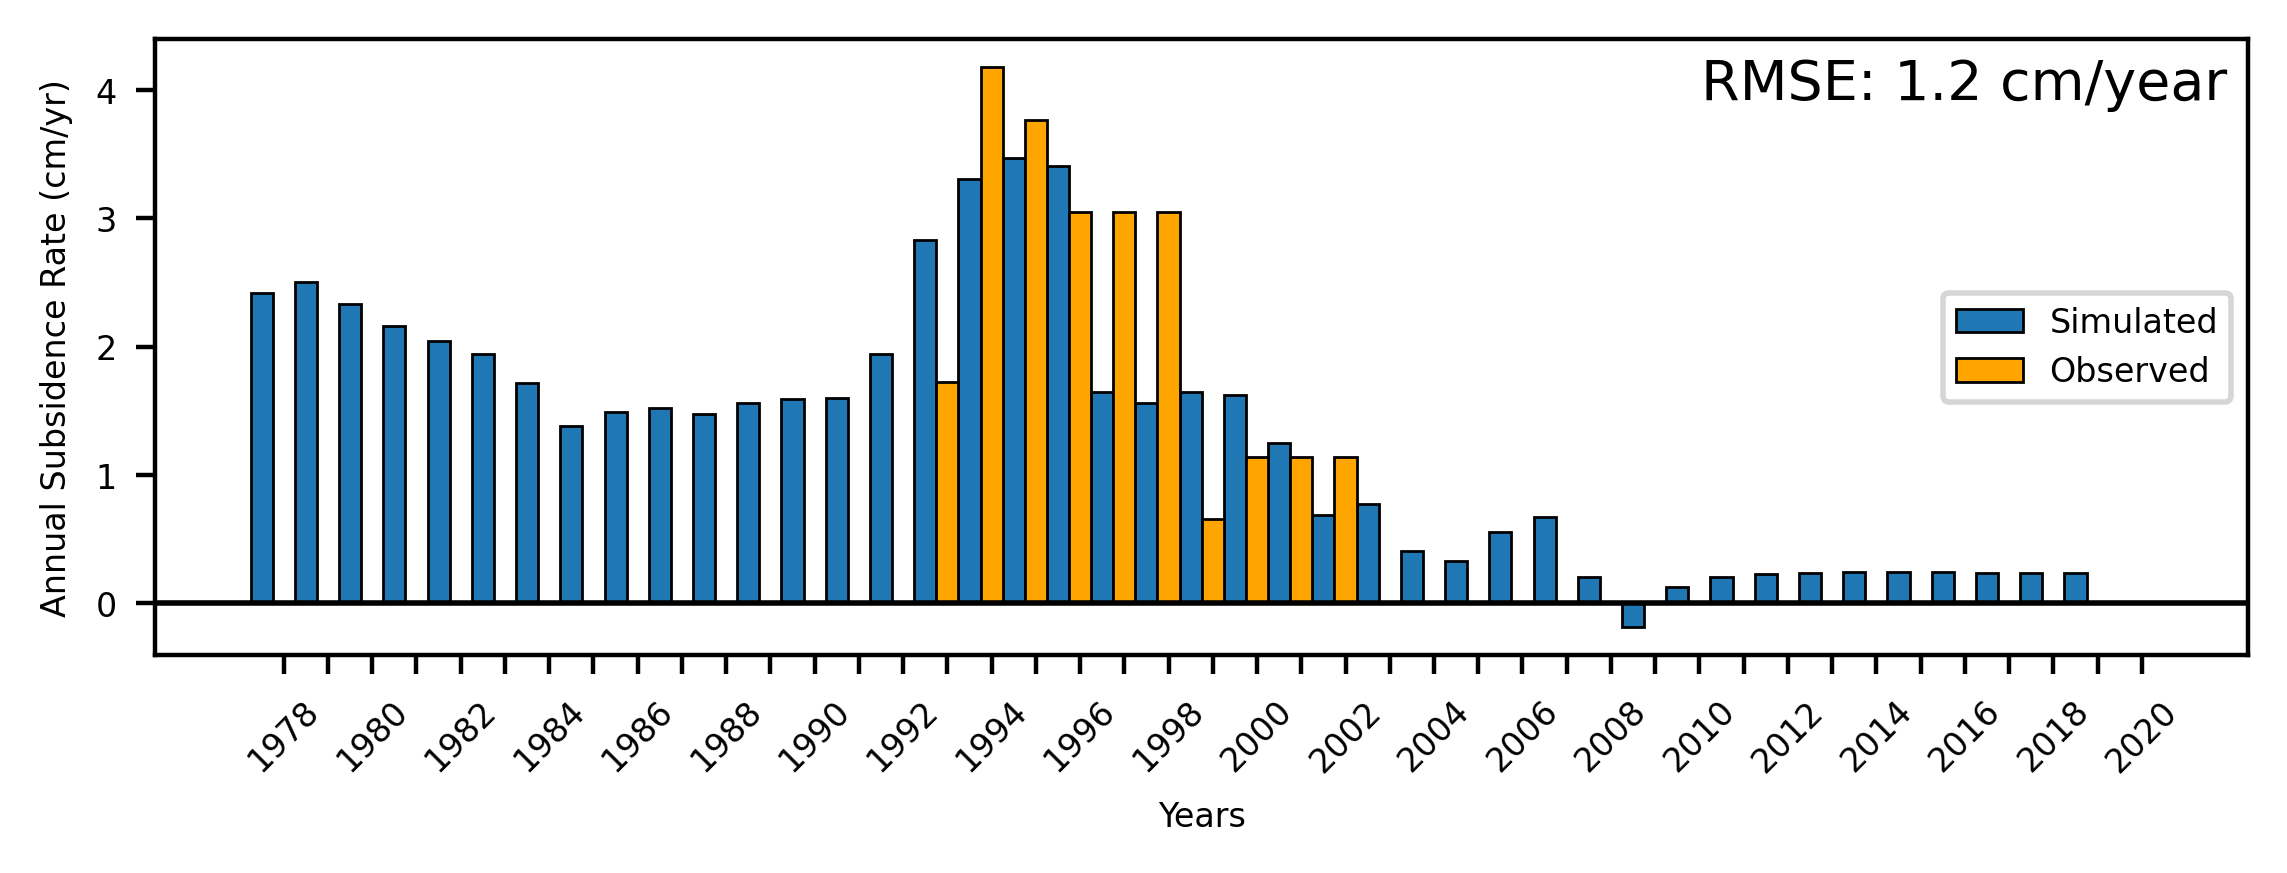

In [3]:
# For well nest BKK013 (in paper) = LCBKK013
wellnestlist = ["LCBKK013"]
tmin = "1978"
tmax = "2020"

# Reading in thickness and storage data
path = os.path.join(os.path.abspath("inputs"), "SUBParameters.xlsx")
Thick_data = pd.read_excel(path, sheet_name="Thickness",
                           index_col=0)  # Thickness
Sskv_data = pd.read_excel(path,
                          sheet_name="Sskv",
                          index_col=0)  # Sskv
Sske_data = pd.read_excel(path,
                          sheet_name="Sske",
                          index_col=0)  # Ssk
K_data = pd.read_excel(path,
                       sheet_name="K",
                       index_col=0)  # K

# Mode can be "raw" as in raw groundwater data vs "Pastas" for importing Pastas
# simulated groundwater in the aquifers
mode = "Pastas"

# If mode is Pastas, need model path
if mode == "Pastas":

    mpath = os.path.abspath("models")

# Pumping flag, for PASTAS, if changing pumping scenario
pumpflag = 1
# If changing pumping scenario, need pumping sheet/path
if pumpflag == 1:

    ppath = os.path.join(os.path.abspath("inputs"), "BasinPumping.xlsx")
    psheet = "EstTotalPump_54-60_Int50"

# Convergence criteria
CC = 1 * 10**-5

# Number of nodes in clay
node_num = 10

# Using available heads as proxy for missing
proxyflag = 1

# Calculates subsidence
all_results, sub_total, subv_total = bkk_sub_gw.\
    bkk_sub.bkk_subsidence(wellnestlist,
                           mode, tmin,
                           tmax,
                           Thick_data,
                           K_data,
                           Sskv_data,
                           Sske_data,
                           CC=CC,
                           Nz=node_num,
                           ic_run=True,
                           proxyflag=proxyflag,
                           pumpflag=pumpflag,
                           pump_path=ppath,
                           pump_sheet=psheet,
                           model_path=mpath)

# Post process data
sub_total, subv_total, ann_sub, \
    avgsub = bkk_sub_gw.bkk_sub.bkk_postproc(wellnestlist,
                                             sub_total,
                                             subv_total,
                                             all_results)

# Plotting
# path to save figures
path = os.path.abspath("figures")

###############################################################################
# Plots Results: Bar graph for main paper for BKK013
##############################################################################

bkk_sub_gw.bkk_plotting.sub_bar(path, wellnestlist, all_results,
                                sub_total, subv_total, ann_sub,
                                tmin=tmin, tmax=tmax, save=0,
                                benchflag=1)

## Bar graphs of annual subsidence (cm) for each well nest during 1978-2020
(Shown in supplemental information)

In [4]:
# %%###########################################################################
# Runs the functions to calculate subsidence at point locations in BKK 
# Graphs in supplemental information 1.5
##############################################################################

# For each well nest
wellnestlist = ["LCBKK003",
                "LCBKK005",
                "LCBKK006",
                "LCBKK007",
                "LCBKK009",
                "LCBKK011",
                "LCBKK012",
                "LCBKK013",
                "LCBKK014",
                "LCBKK015",
                "LCBKK016",
                "LCBKK018",
                "LCBKK020",
                "LCBKK021",
                "LCBKK026",
                "LCBKK027",
                "LCBKK036",
                "LCBKK038",
                "LCBKK041",
                "LCNBI003",
                "LCNBI007",
                "LCSPK007",
                "LCSPK009"]
tmin = "1978"
tmax = "2020"

# Reading in thickness and storage data
path = os.path.join(os.path.abspath("inputs"), "SUBParameters.xlsx")
Thick_data = pd.read_excel(path, sheet_name="Thickness",
                           index_col=0)  # Thickness
Sskv_data = pd.read_excel(path,
                          sheet_name="Sskv",
                          index_col=0)  # Sskv
Sske_data = pd.read_excel(path,
                          sheet_name="Sske",
                          index_col=0)  # Ssk
K_data = pd.read_excel(path,
                       sheet_name="K",
                       index_col=0)  # K

# Mode can be "raw" as in raw groundwater data vs "Pastas" for importing Pastas
# simulated groundwater in the aquifers
mode = "Pastas"

# If mode is Pastas, need model path
if mode == "Pastas":

    mpath = os.path.abspath("models")

# Pumping flag, for PASTAS, if changing pumping scenario
pumpflag = 1
# If changing pumping scenario, need pumping sheet/path
if pumpflag == 1:

    ppath = os.path.join(os.path.abspath("inputs"), "BasinPumping.xlsx")
    psheet = "EstTotalPump_54-60_Int50"

# Convergence criteria
CC = 1 * 10**-5

# Number of nodes in clay
node_num = 10

# Using available heads as proxy for missing
proxyflag = 1

# Calculates subsidence
all_results, sub_total, subv_total = bkk_sub_gw.\
    bkk_sub.bkk_subsidence(wellnestlist,
                           mode, tmin,
                           tmax,
                           Thick_data,
                           K_data,
                           Sskv_data,
                           Sske_data,
                           CC=CC,
                           Nz=node_num,
                           ic_run=True,
                           proxyflag=proxyflag,
                           pumpflag=pumpflag,
                           pump_path=ppath,
                           pump_sheet=psheet,
                           model_path=mpath)

# Post process data
sub_total, subv_total, ann_sub, \
    avgsub = bkk_sub_gw.bkk_sub.bkk_postproc(wellnestlist,
                                             sub_total,
                                             subv_total,
                                             all_results)

# Average perc of each clay layer to total for all well nest
BKClayavg = np.average([i[2] for i in avgsub[0::4]])*100
PDClayavg = np.average([i[2] for i in avgsub[1::4]])*100
NLClayavg = np.average([i[2] for i in avgsub[2::4]])*100
NBClayavg = np.average([i[2] for i in avgsub[3::4]])*100

# Plotting
# path to save figures
path = os.path.abspath("figures")

INFO: Time Series Head: 13 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK003_BK2_GW_1986_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 39 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK003_PD17_GW_1986_2011_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 43 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_after '

LCBKK003  Clay 1
LCBKK003  Clay 1 Initial Condition

LCBKK003  Clay 2
LCBKK003  Clay 2 Initial Condition

LCBKK003  Clay 3
LCBKK003  Clay 3 Initial Condition

LCBKK003  Clay 4


INFO: Time Series Head: 38 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK005_PD21_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK003  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 32 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK005_NL36_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 30 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK005_NB28_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK005  Clay 1
LCBKK005  Clay 1 Initial Condition

LCBKK005  Clay 2
LCBKK005  Clay 2 Initial Condition

LCBKK005  Clay 3
LCBKK005  Clay 3 Initial Condition

LCBKK005  Clay 4


INFO: Time Series Head: 18 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK006_BK_JS_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK005  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 18 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK006_PD20_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 15 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK006_NL35_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to

LCBKK006  Clay 1
LCBKK006  Clay 1 Initial Condition

LCBKK006  Clay 2
LCBKK006  Clay 2 Initial Condition

LCBKK006  Clay 3
LCBKK006  Clay 3 Initial Condition

LCBKK006  Clay 4


INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK007_PD25_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK006  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 8 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK007_NL39_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 8 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK007_NB32_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK007  Clay 1
LCBKK007  Clay 1 Initial Condition

LCBKK007  Clay 2
LCBKK007  Clay 2 Initial Condition

LCBKK007  Clay 3
LCBKK007  Clay 3 Initial Condition

LCBKK007  Clay 4


INFO: Time Series Head: 29 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK009_PD26_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK007  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK009_NB36_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK009  Clay 1
LCBKK009  Clay 1 Initial Condition

LCBKK009  Clay 2
LCBKK009  Clay 2 Initial Condition

LCBKK009  Clay 3
LCBKK009  Clay 3 Initial Condition

LCBKK009  Clay 4


INFO: Time Series Head: 130 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK011_BK3_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK009  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 134 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK011_PD27_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 95 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK011_NL42_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthorn

LCBKK011  Clay 1
LCBKK011  Clay 1 Initial Condition

LCBKK011  Clay 2
LCBKK011  Clay 2 Initial Condition

LCBKK011  Clay 3
LCBKK011  Clay 3 Initial Condition

LCBKK011  Clay 4


INFO: Time Series Head: 16 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK012_PD23_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK011  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 19 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK012_NL38_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 18 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK012_NB33_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK012  Clay 1
LCBKK012  Clay 1 Initial Condition

LCBKK012  Clay 2
LCBKK012  Clay 2 Initial Condition

LCBKK012  Clay 3
LCBKK012  Clay 3 Initial Condition

LCBKK012  Clay 4


INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK012  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NB38_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4


INFO: Time Series Head: 43 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK014_PD84_GW_1992_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK013  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 3 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK014_NL54_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 3 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK014_NB47_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK014  Clay 1
LCBKK014  Clay 1 Initial Condition

LCBKK014  Clay 2
LCBKK014  Clay 2 Initial Condition

LCBKK014  Clay 3
LCBKK014  Clay 3 Initial Condition

LCBKK014  Clay 4


INFO: Time Series Head: 20 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK015_PD34_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK014  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 13 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK015_NL48_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 11 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK015_NB42_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK015  Clay 1
LCBKK015  Clay 1 Initial Condition

LCBKK015  Clay 2
LCBKK015  Clay 2 Initial Condition

LCBKK015  Clay 3
LCBKK015  Clay 3 Initial Condition

LCBKK015  Clay 4


INFO: Time Series Head: 9 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK016_NL58_GW_1989_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK015  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK016_NB54_GW_1989_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK016  Clay 1
LCBKK016  Clay 1 Initial Condition

LCBKK016  Clay 2
LCBKK016  Clay 2 Initial Condition

LCBKK016  Clay 3
LCBKK016  Clay 3 Initial Condition

LCBKK016  Clay 4


INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK018_PD82_GW_1992_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK016  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK018  Clay 1
LCBKK018  Clay 1 Initial Condition

LCBKK018  Clay 2
LCBKK018  Clay 2 Initial Condition

LCBKK018  Clay 3
LCBKK018  Clay 3 Initial Condition

LCBKK018  Clay 4


INFO: Time Series Head: 9 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK020_PD41_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK018  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 6 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK020_NL56_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK020_NB51_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK020  Clay 1
LCBKK020  Clay 1 Initial Condition

LCBKK020  Clay 2
LCBKK020  Clay 2 Initial Condition

LCBKK020  Clay 3
LCBKK020  Clay 3 Initial Condition

LCBKK020  Clay 4


INFO: Time Series Head: 14 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK021_PD36_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK020  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK021_NL52_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 9 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK021_NB45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK021  Clay 1
LCBKK021  Clay 1 Initial Condition

LCBKK021  Clay 2
LCBKK021  Clay 2 Initial Condition

LCBKK021  Clay 3
LCBKK021  Clay 3 Initial Condition

LCBKK021  Clay 4


INFO: Time Series Head: 144 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK026_PD62_GW_1991_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK021  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 33 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Pump was extended in the past to 1950-09-09 00:00:00 by adding 0.0 values.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK026_NL18_GW_1980_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 173 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK026_NB66_GW_1994_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in th

LCBKK026  Clay 1
LCBKK026  Clay 1 Initial Condition

LCBKK026  Clay 2
LCBKK026  Clay 2 Initial Condition

LCBKK026  Clay 3
LCBKK026  Clay 3 Initial Condition

LCBKK026  Clay 4


INFO: Time Series Head: 13 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK027_PD57_GW_1991_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK026  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 8 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK027_NL70_GW_1991_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK027_NB62_GW_1991_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK027  Clay 1
LCBKK027  Clay 1 Initial Condition

LCBKK027  Clay 2
LCBKK027  Clay 2 Initial Condition

LCBKK027  Clay 3
LCBKK027  Clay 3 Initial Condition

LCBKK027  Clay 4


INFO: Time Series Head: 55 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK036_BK_JICA8_GW_1997_2019_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK027  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 51 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK036_PD_JICA7_GW_1997_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 50 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK036_NL_JICA6_GW_1997_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the

LCBKK036  Clay 1
LCBKK036  Clay 1 Initial Condition

LCBKK036  Clay 2
LCBKK036  Clay 2 Initial Condition

LCBKK036  Clay 3
LCBKK036  Clay 3 Initial Condition

LCBKK036  Clay 4


INFO: Time Series Head: 139 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK038_BK1_GW_1994_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK036  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 117 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK038_PD26_009_GW_1989_2018_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 81 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK038_NL31_GW_19

LCBKK038  Clay 1
LCBKK038  Clay 1 Initial Condition

LCBKK038  Clay 2
LCBKK038  Clay 2 Initial Condition

LCBKK038  Clay 3
LCBKK038  Clay 3 Initial Condition

LCBKK038  Clay 4


INFO: Time Series Head: 175 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Pump was extended in the past to 1948-12-08 00:00:00 by adding 0.0 values.


LCBKK038  Clay 4 Initial Condition



INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK041_PD138_GW_1978_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 122 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Pump was extended in the past to 1948-12-08 00:00:00 by adding 0.0 values.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK041_NL140_GW_1978_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 114 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Pump was extended in the past to 1948-12-08 00:00:00 by adding 0.0 values.
INFO: Pastas Model from file C

LCBKK041  Clay 1
LCBKK041  Clay 1 Initial Condition

LCBKK041  Clay 2
LCBKK041  Clay 2 Initial Condition

LCBKK041  Clay 3
LCBKK041  Clay 3 Initial Condition

LCBKK041  Clay 4


INFO: Time Series Head: 37 nan-value(s) was/were found and filled with: drop.


LCBKK041  Clay 4 Initial Condition



INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCNBI003_NL41_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 3 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCNBI003_NB24_GW_1986_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCNBI003  Clay 1
LCNBI003  Clay 1 Initial Condition

LCNBI003  Clay 2
LCNBI003  Clay 2 Initial Condition

LCNBI003  Clay 3
LCNBI003  Clay 3 Initial Condition

LCNBI003  Clay 4


INFO: Time Series Head: 19 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCNBI007_PD56_GW_1991_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCNBI003  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 2 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCNBI007_NB63_GW_1990_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCNBI007  Clay 1
LCNBI007  Clay 1 Initial Condition

LCNBI007  Clay 2
LCNBI007  Clay 2 Initial Condition

LCNBI007  Clay 3
LCNBI007  Clay 3 Initial Condition

LCNBI007  Clay 4


INFO: Time Series Head: 12 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCSPK007_PD22_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCNBI007  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 3 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCSPK007_NB30_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCSPK007  Clay 1
LCSPK007  Clay 1 Initial Condition

LCSPK007  Clay 2
LCSPK007  Clay 2 Initial Condition

LCSPK007  Clay 3
LCSPK007  Clay 3 Initial Condition

LCSPK007  Clay 4


INFO: Time Series Head: 615 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCSPK009_NL67_GW_1989_2011_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCSPK007  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 614 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCSPK009_NB53_GW_1989_2011_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCSPK009  Clay 1
LCSPK009  Clay 1 Initial Condition

LCSPK009  Clay 2
LCSPK009  Clay 2 Initial Condition

LCSPK009  Clay 3
LCSPK009  Clay 3 Initial Condition

LCSPK009  Clay 4
LCSPK009  Clay 4 Initial Condition



### Plots Results: Bar graph of annual rates of simulated and observed subsidence

C:\Users\jtsoonthornran\BKKSubPastasModels\bkk_sub_gw\bkk_plotting.py:231: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=45)
C:\Users\jtsoonthornran\BKKSubPastasModels\bkk_sub_gw\bkk_plotting.py:231: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=45)
C:\Users\jtsoonthornran\BKKSubPastasModels\bkk_sub_gw\bkk_plotting.py:231: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=45)
C:\Users\jtsoonthornran\BKKSubPastasModels\bkk_sub_gw\bkk_plotting.py:231: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=45)
C:\Users\jtsoonthornran\BKKSubPastasModels\bkk_sub_gw\bkk_plotting.py:231: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation

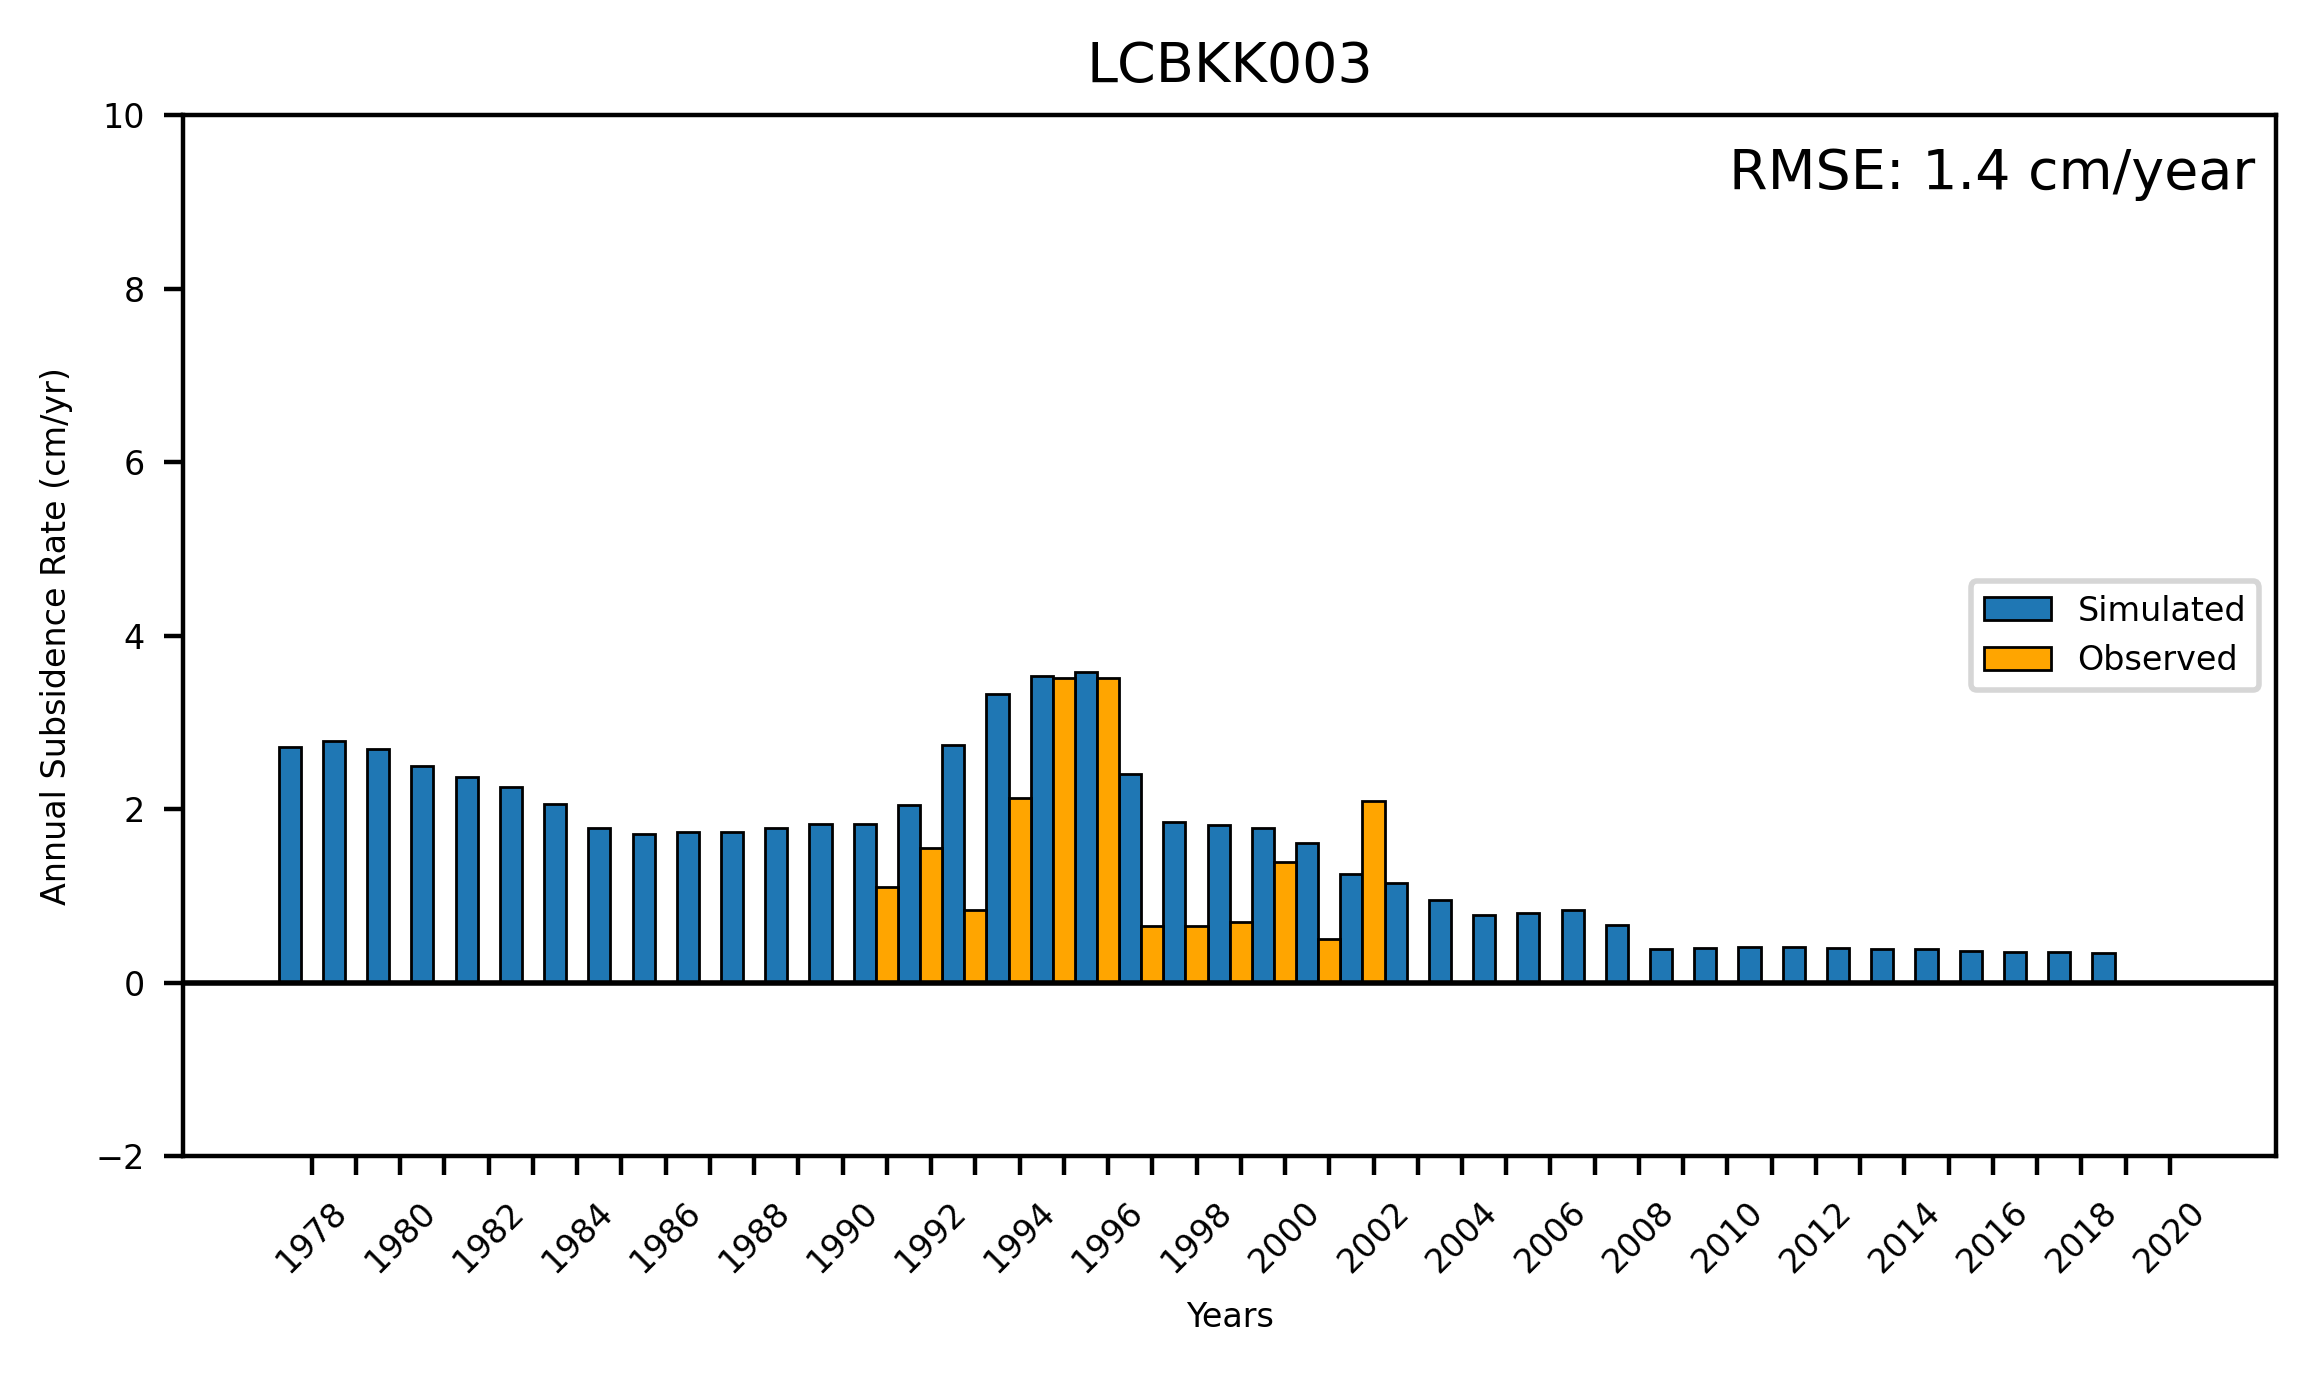

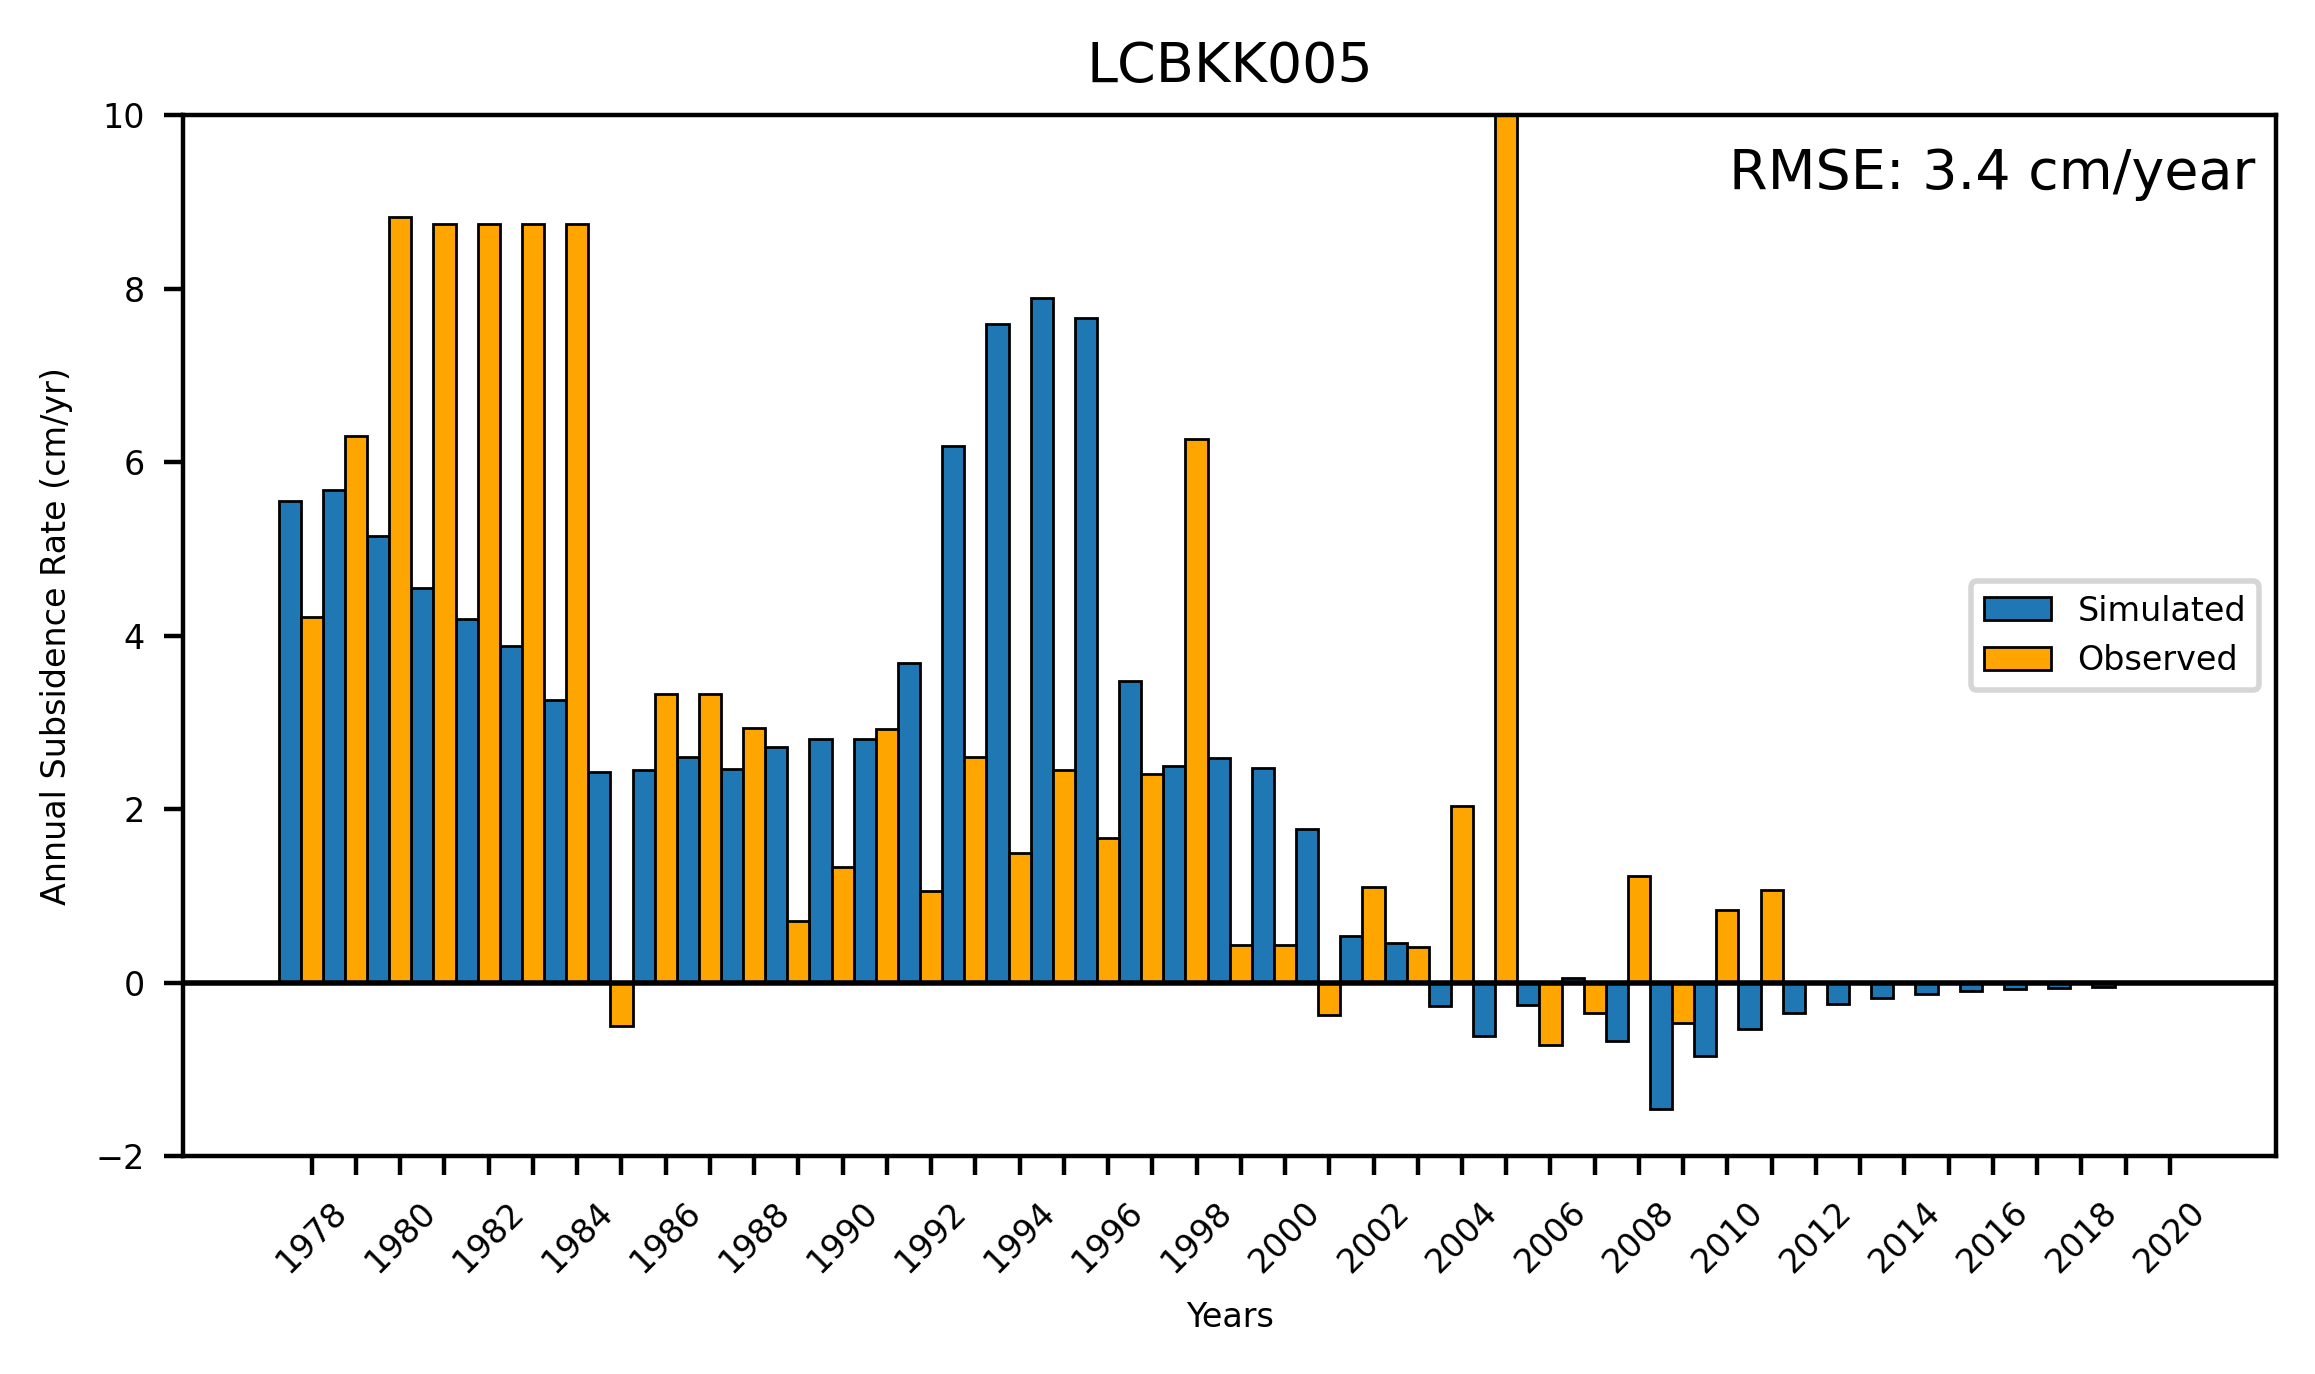

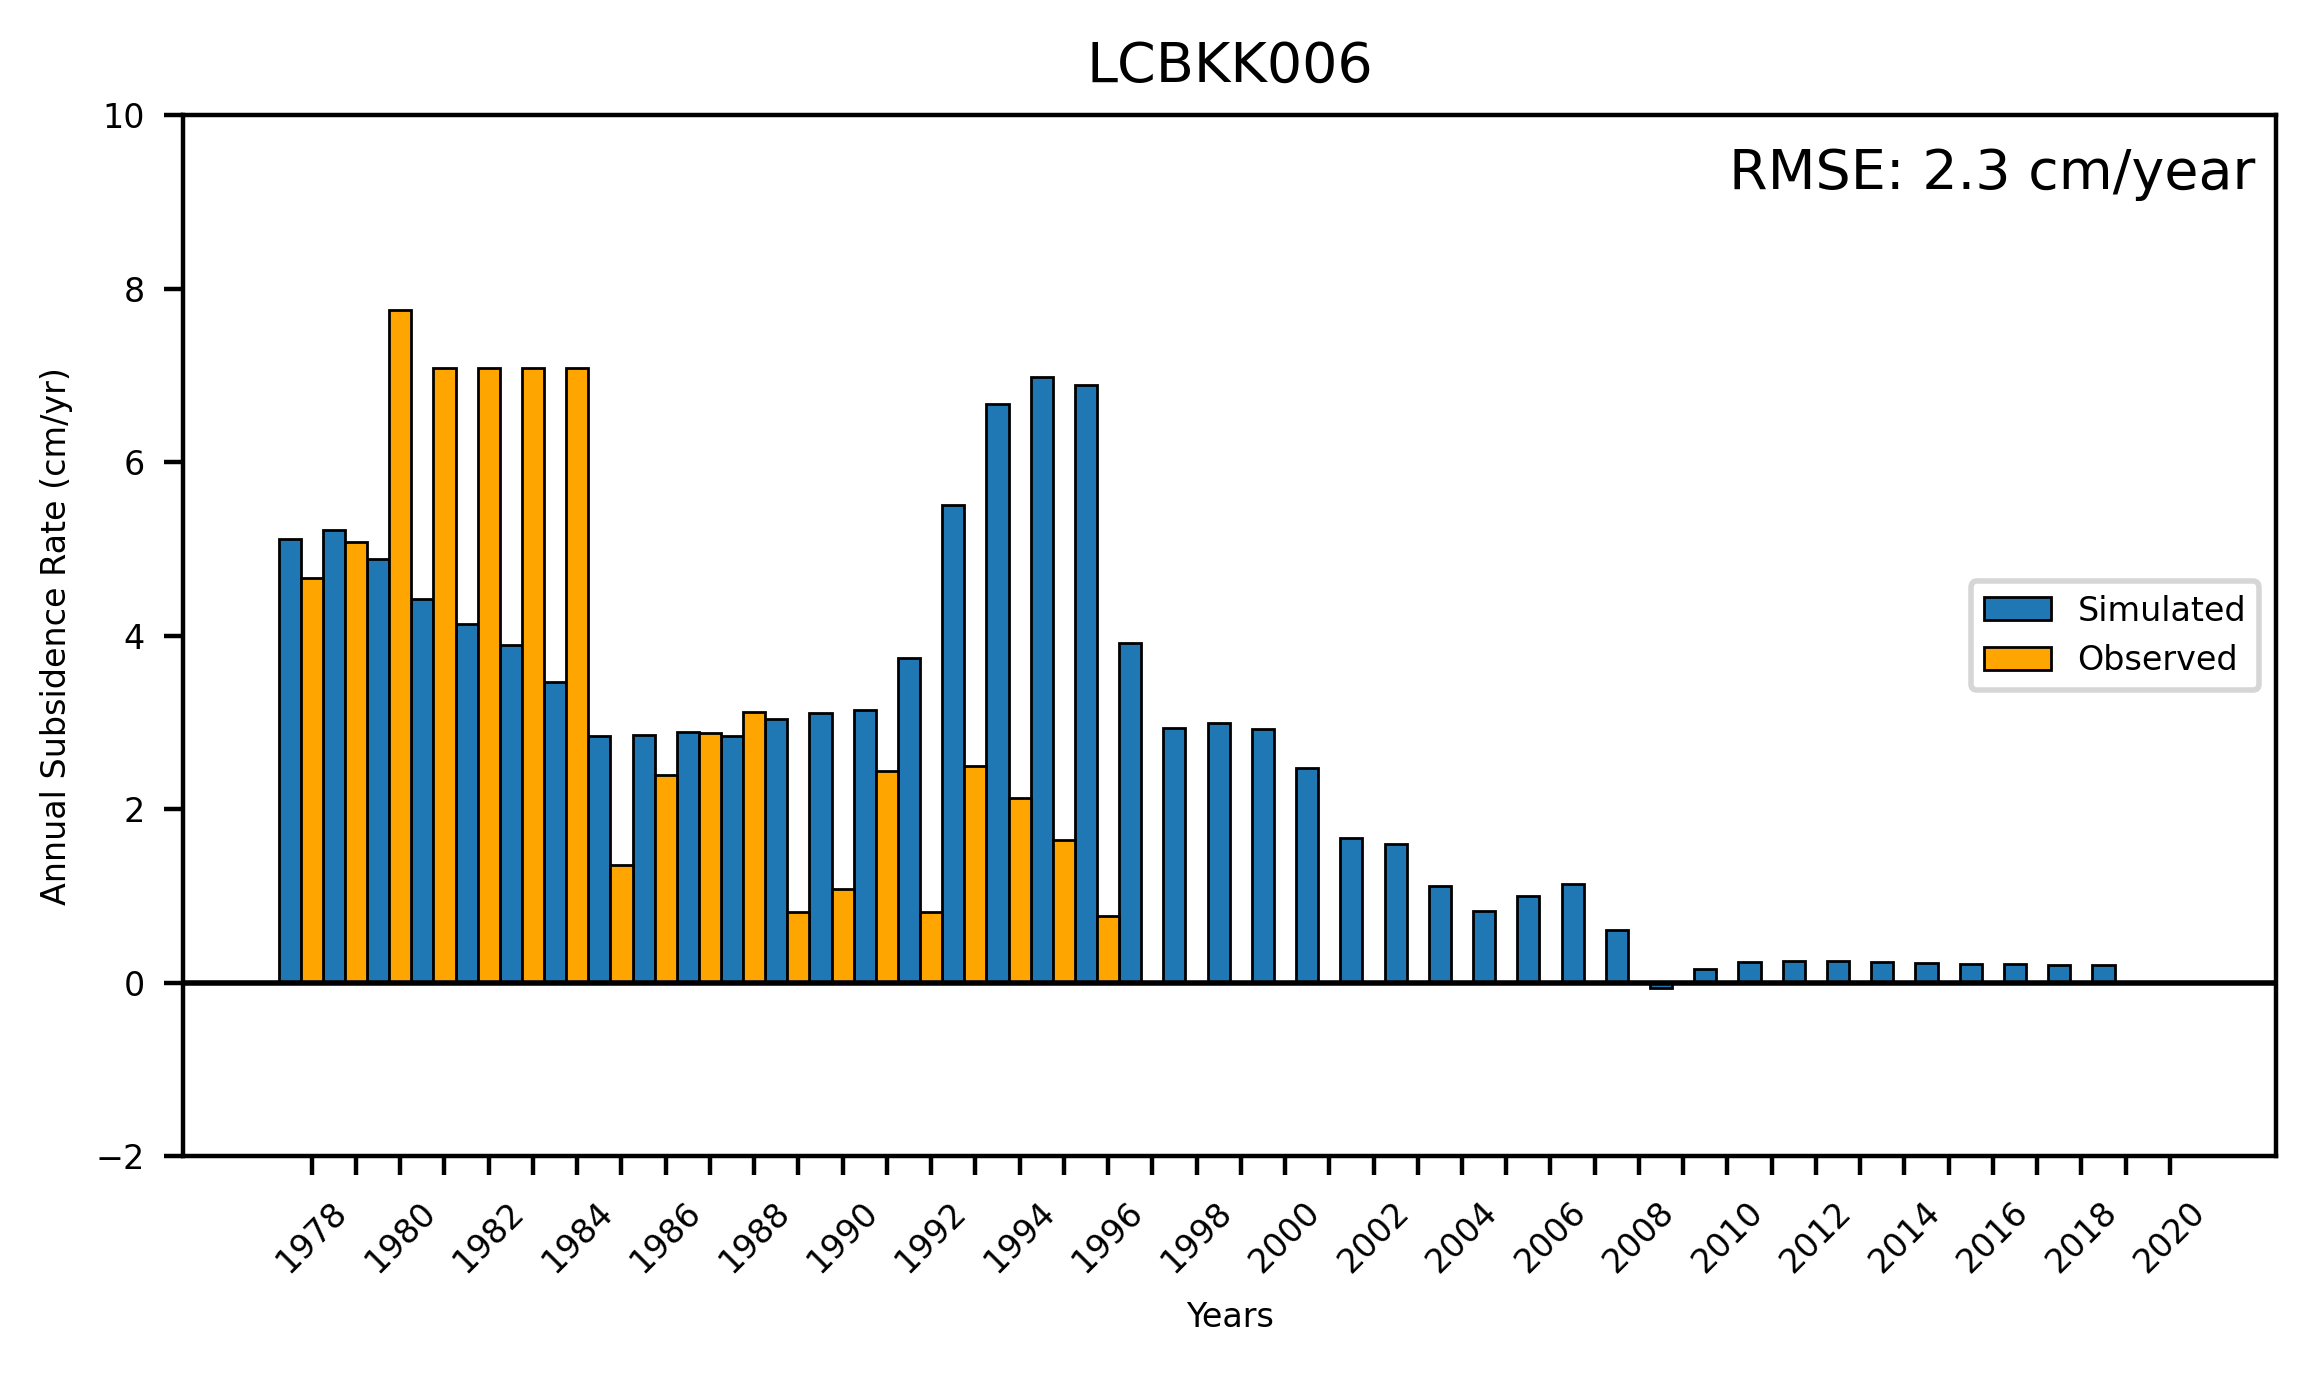

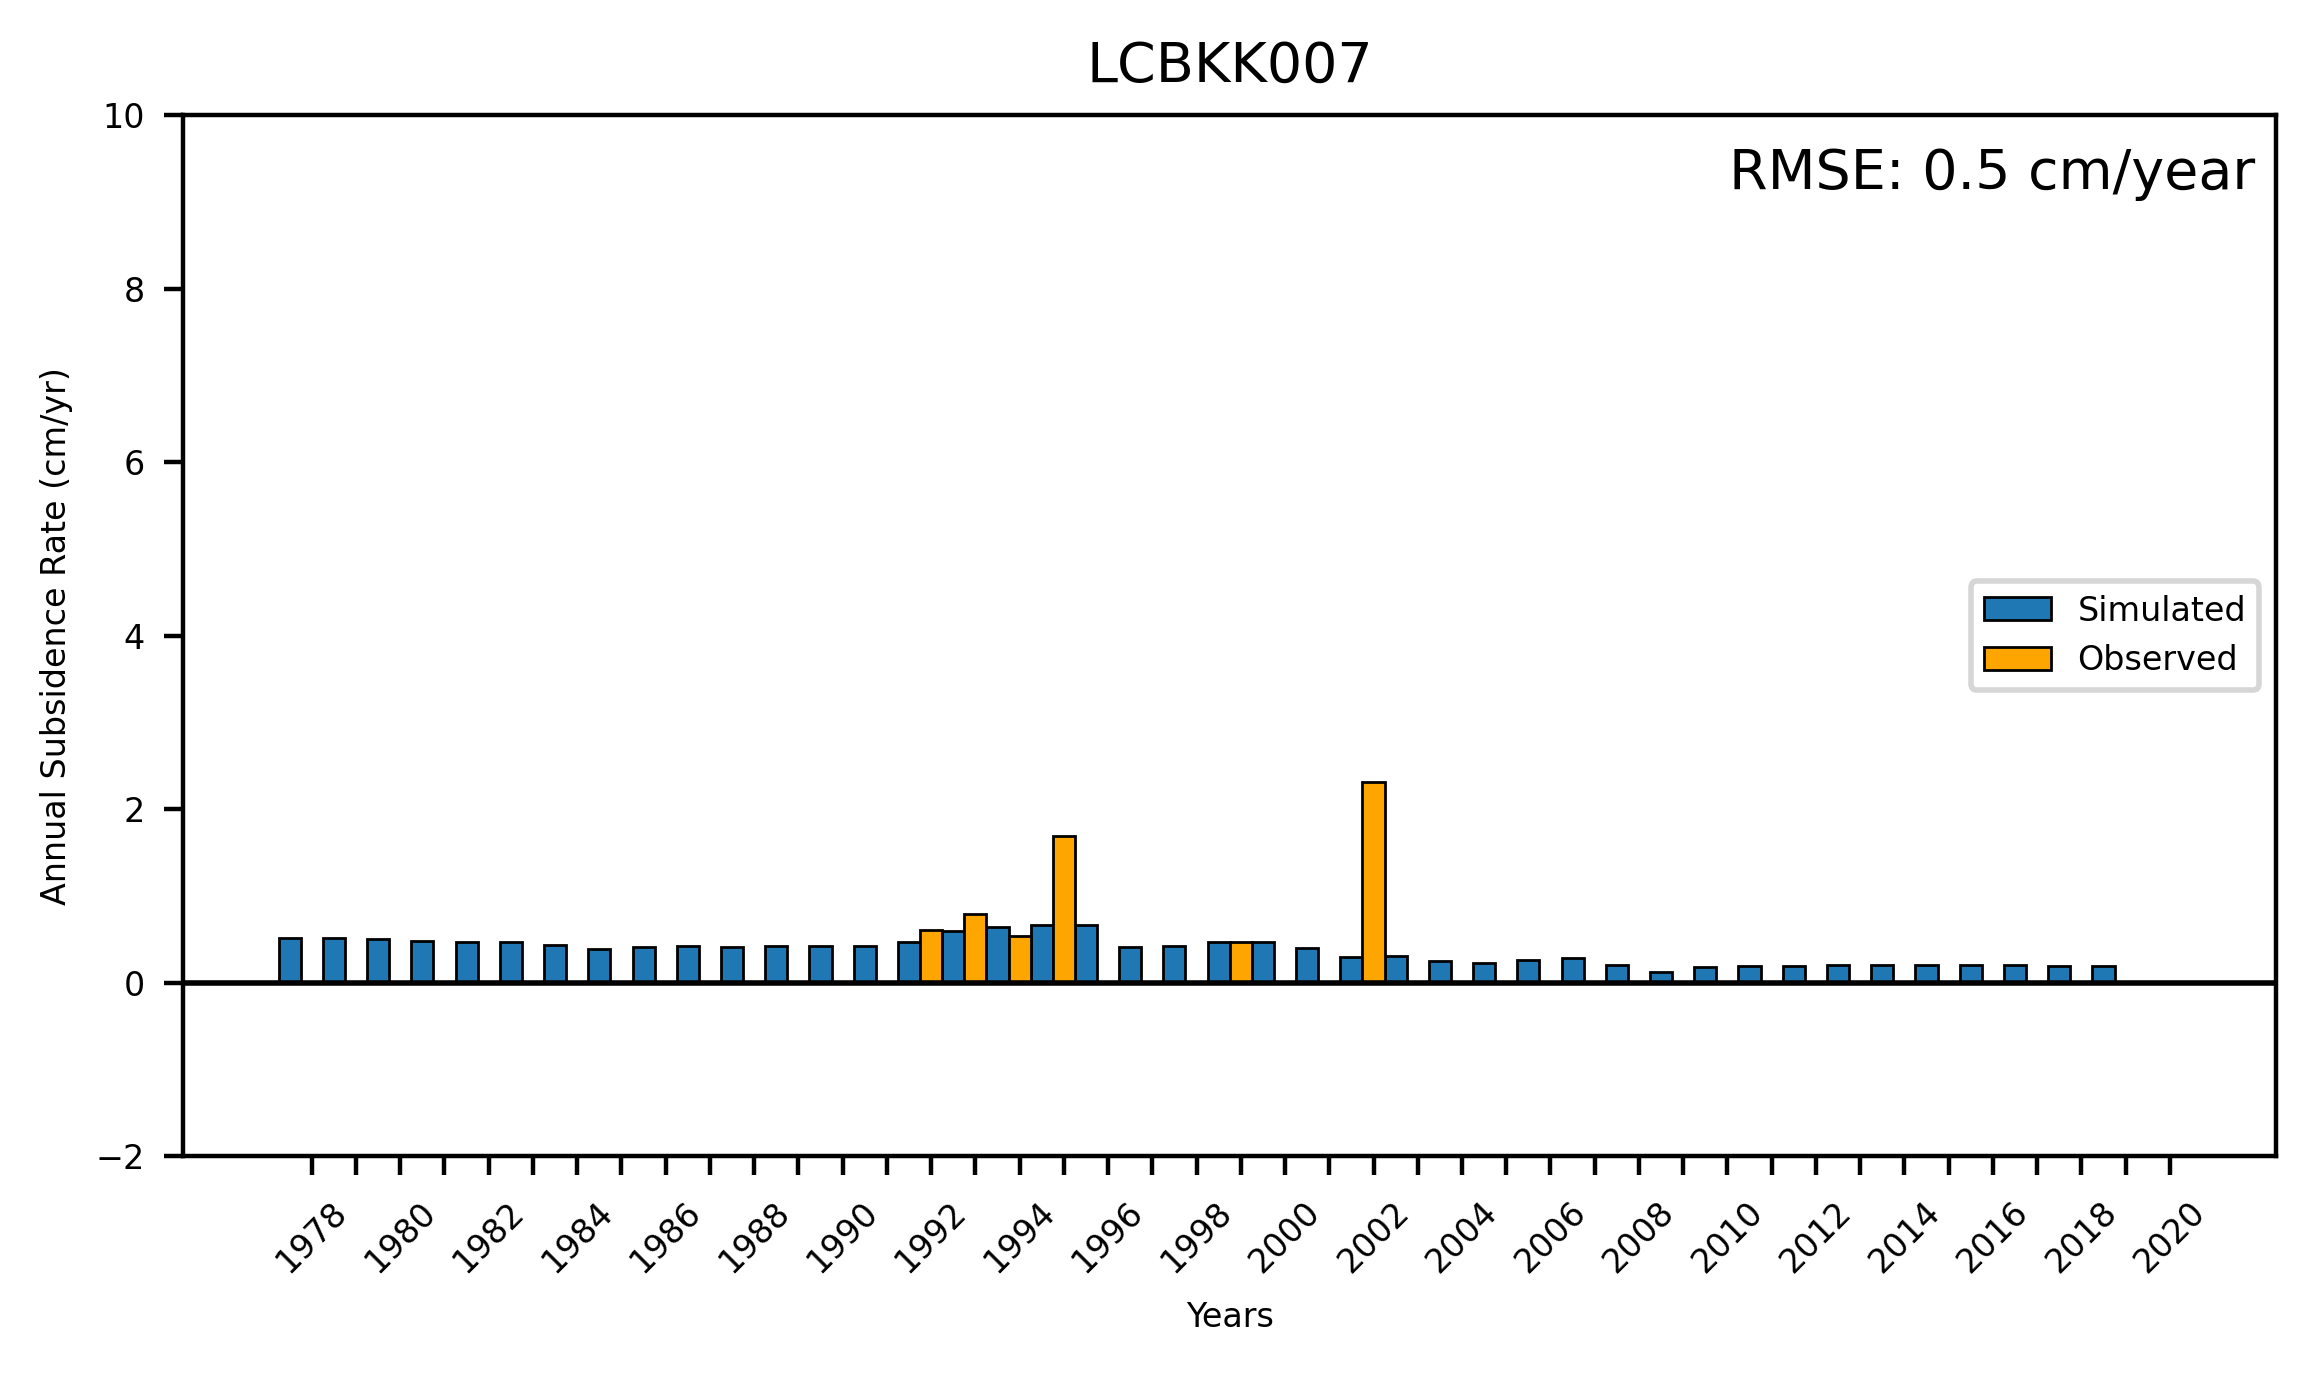

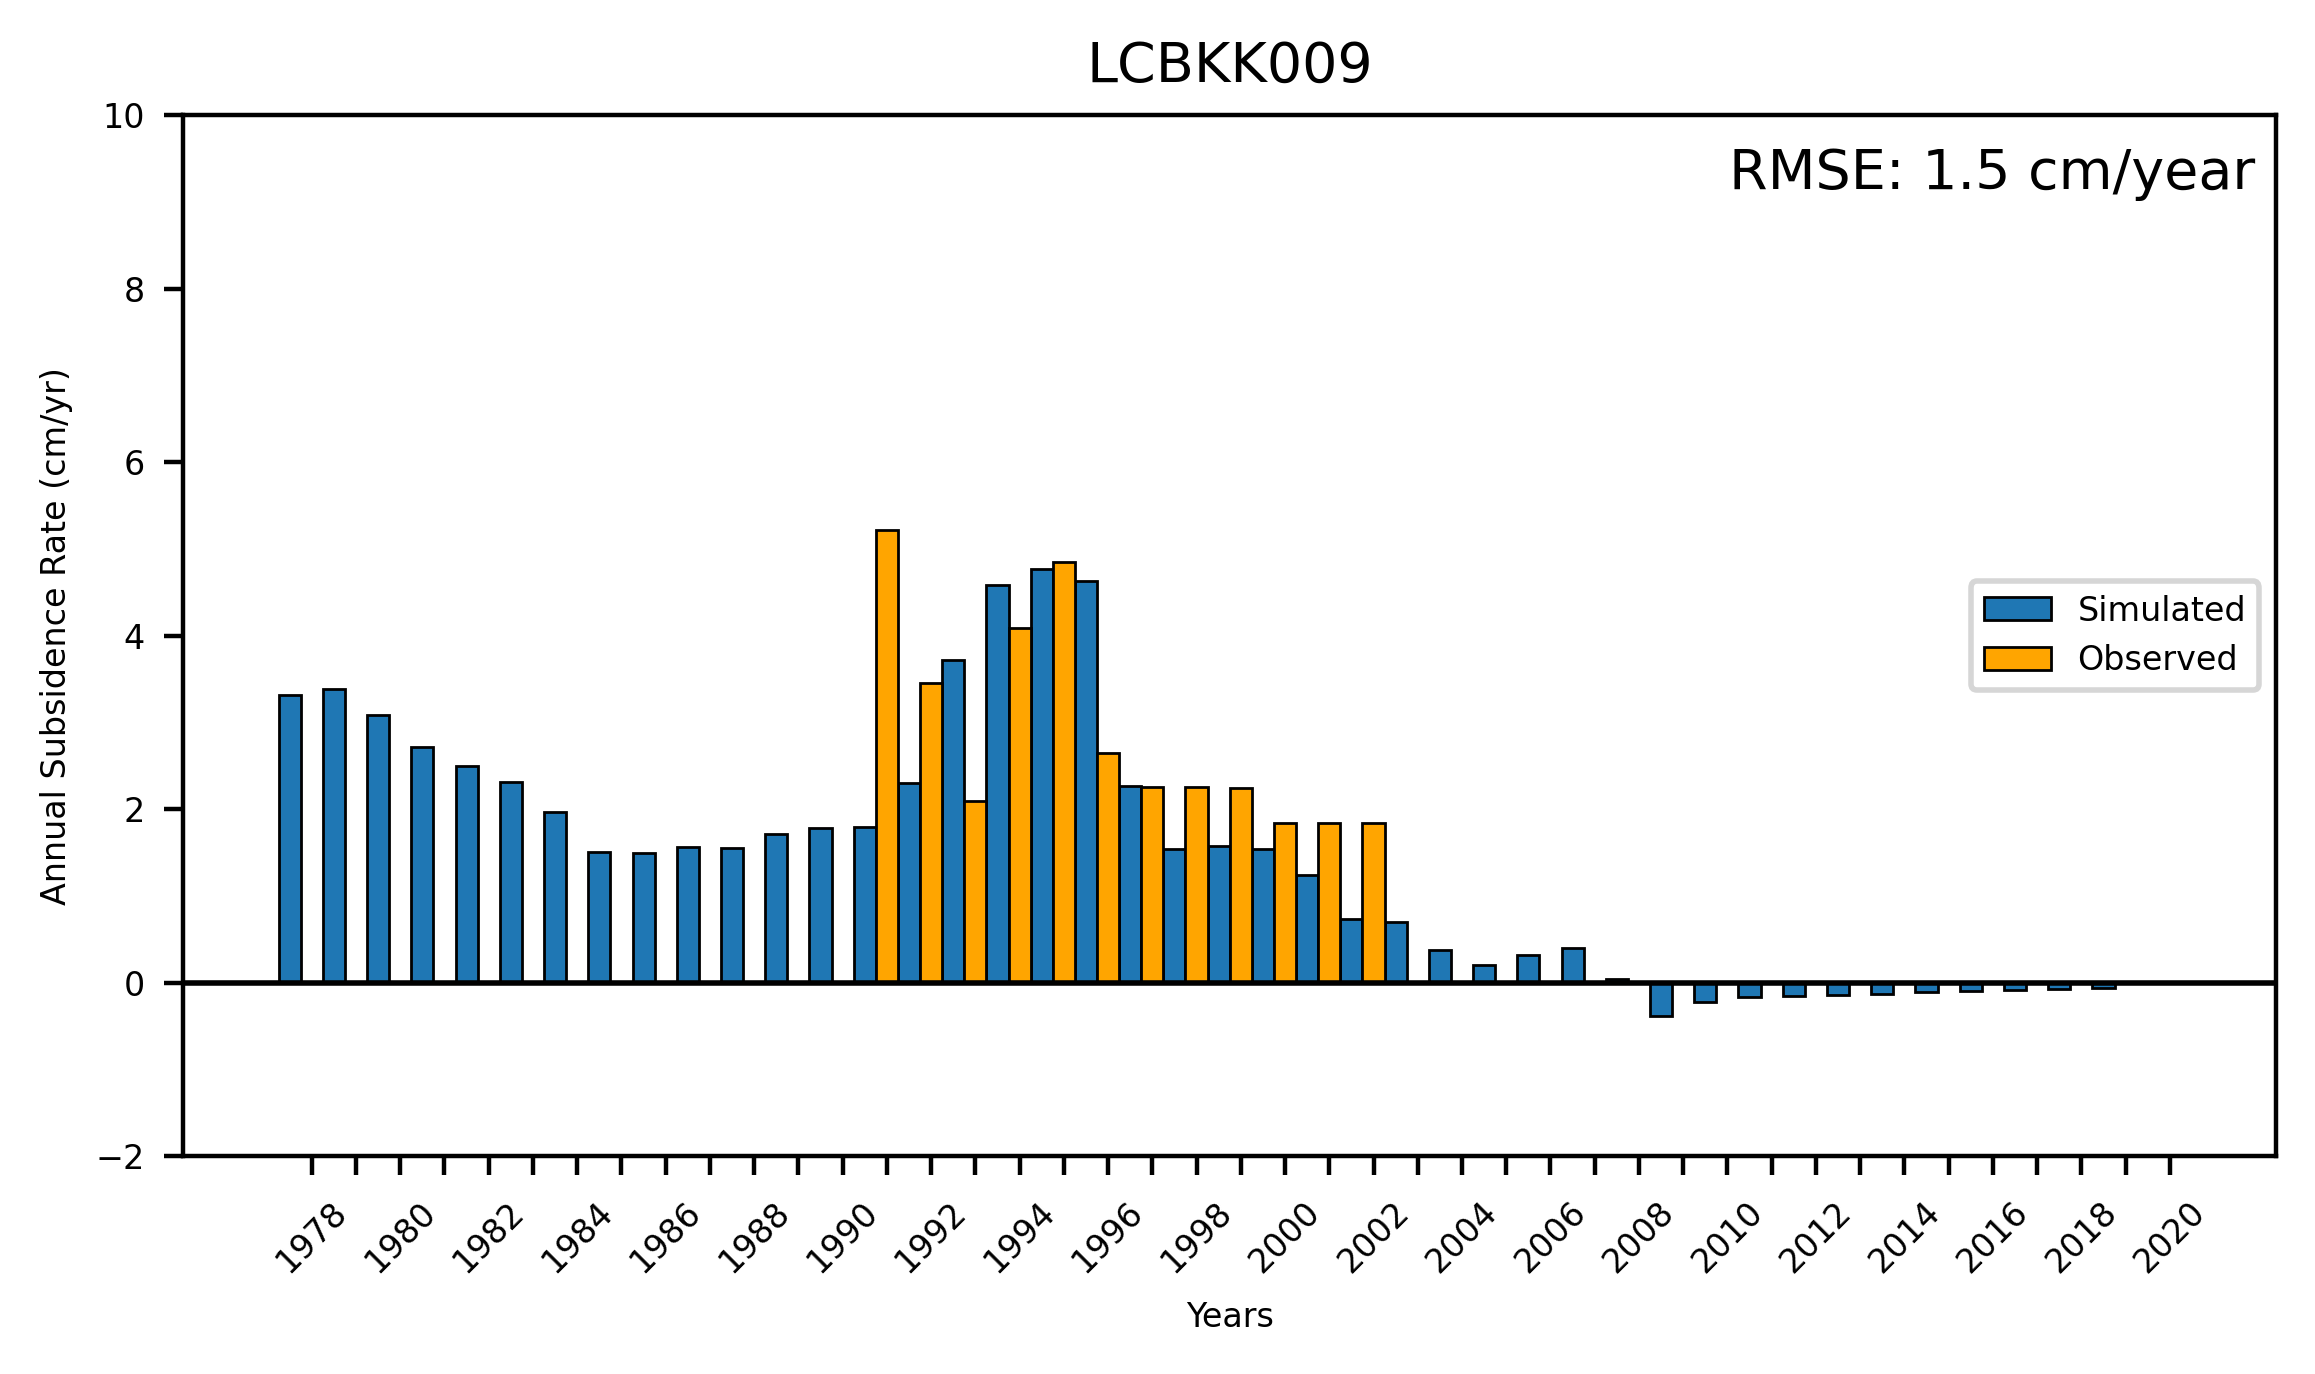

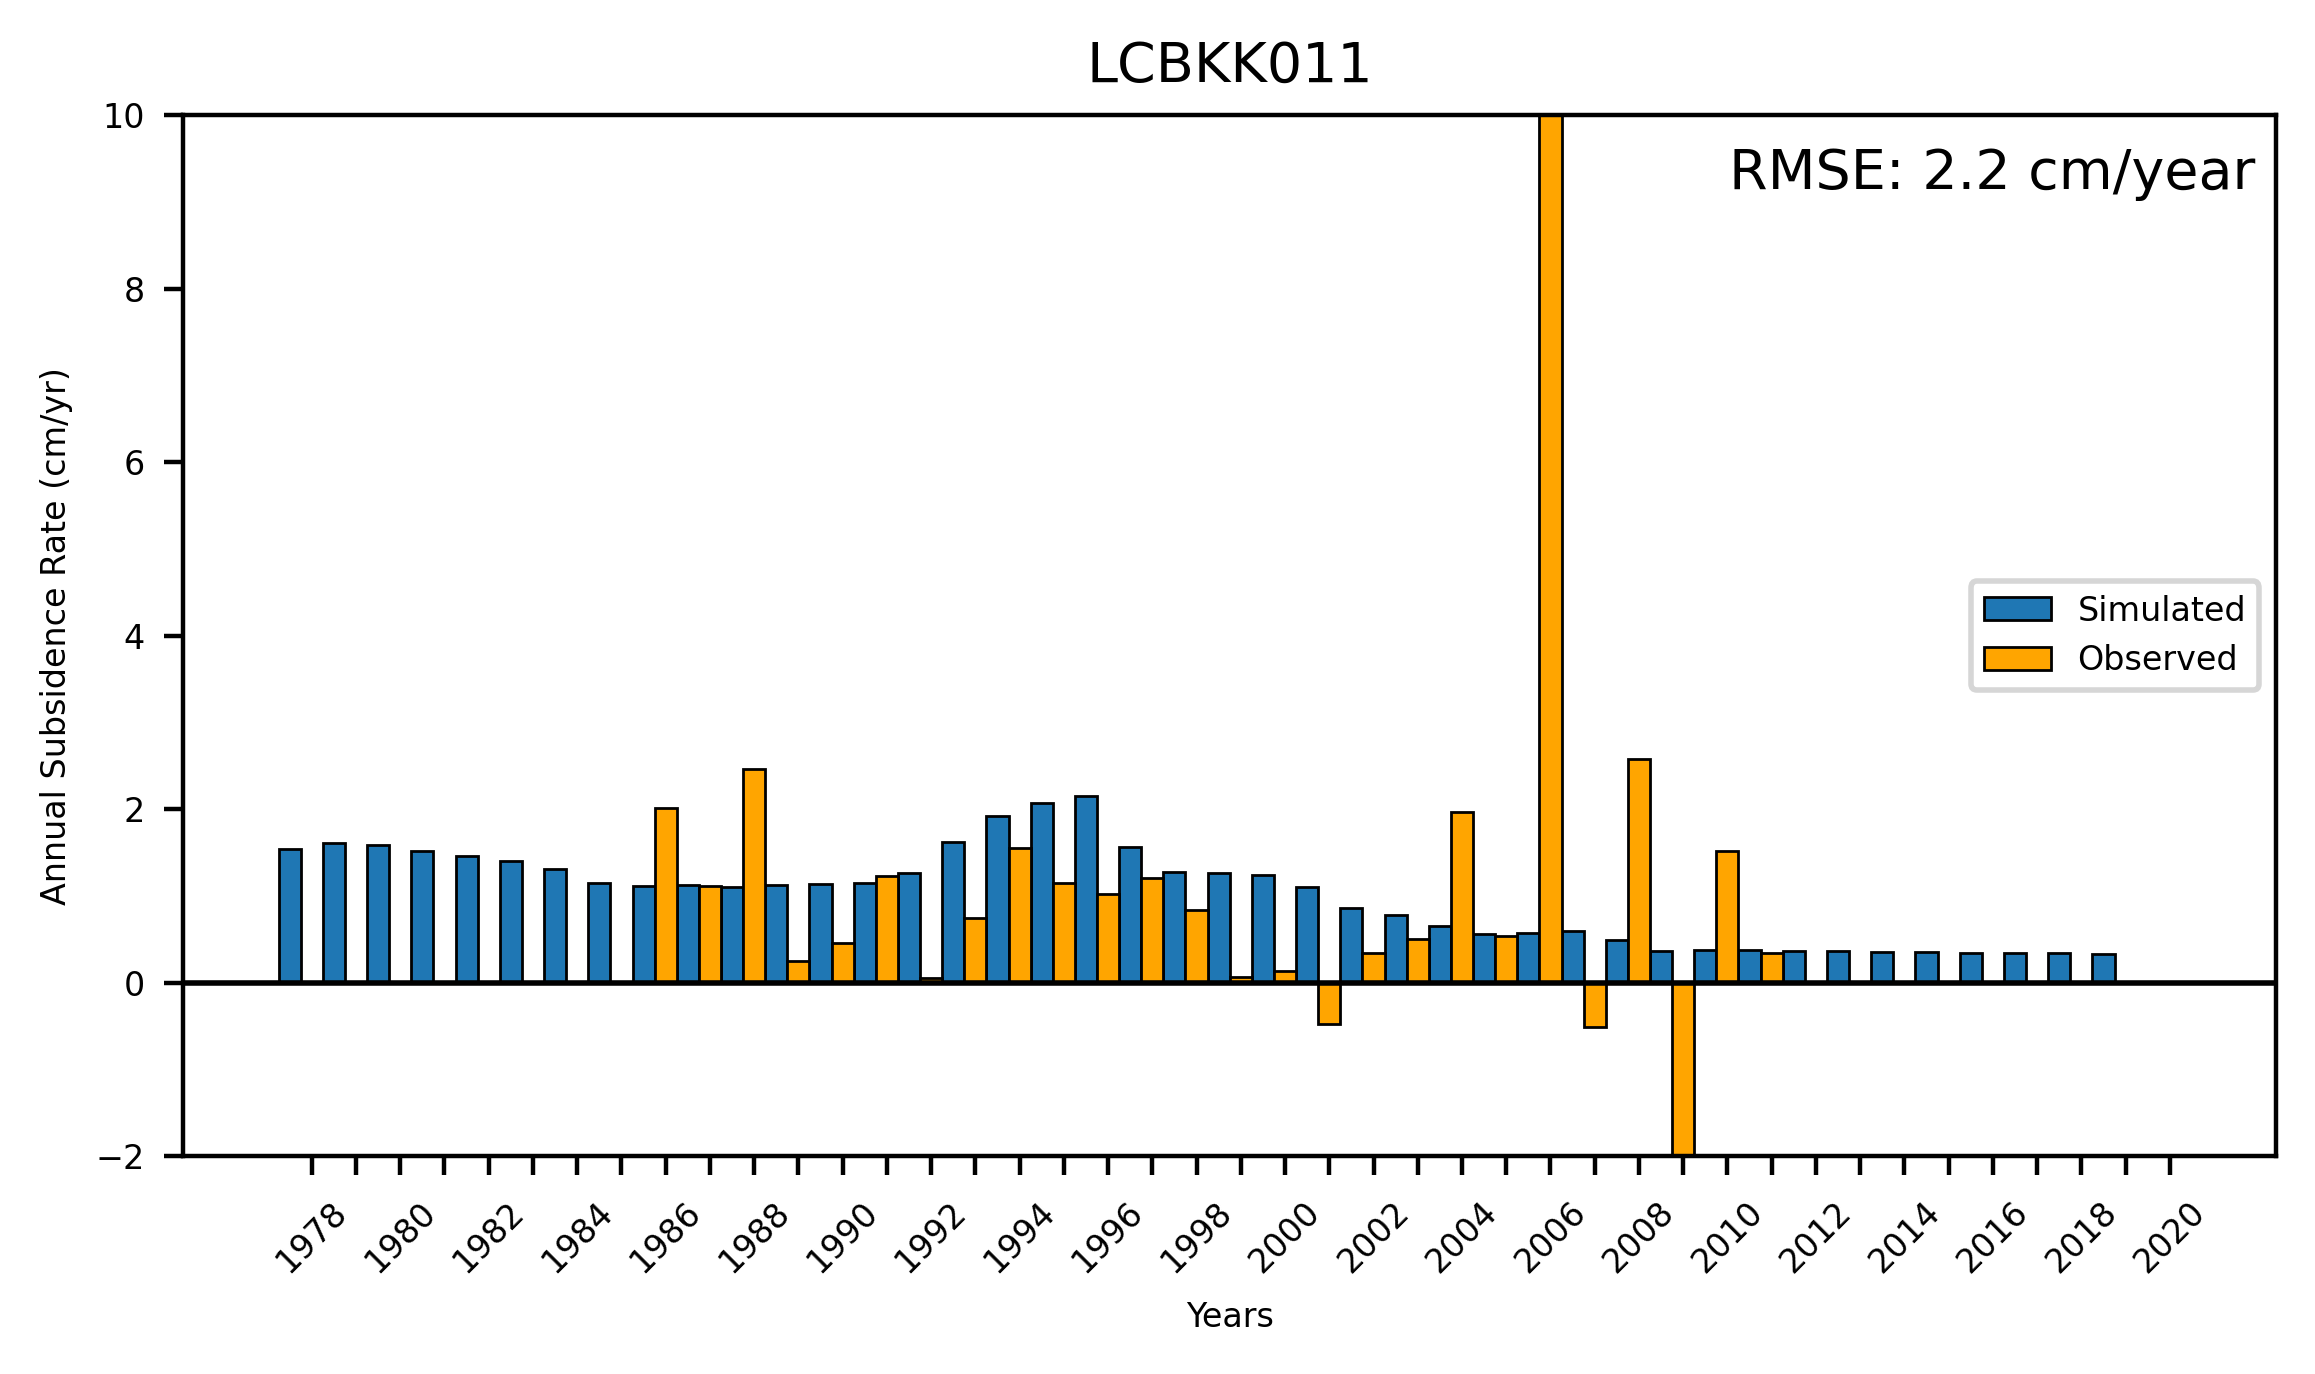

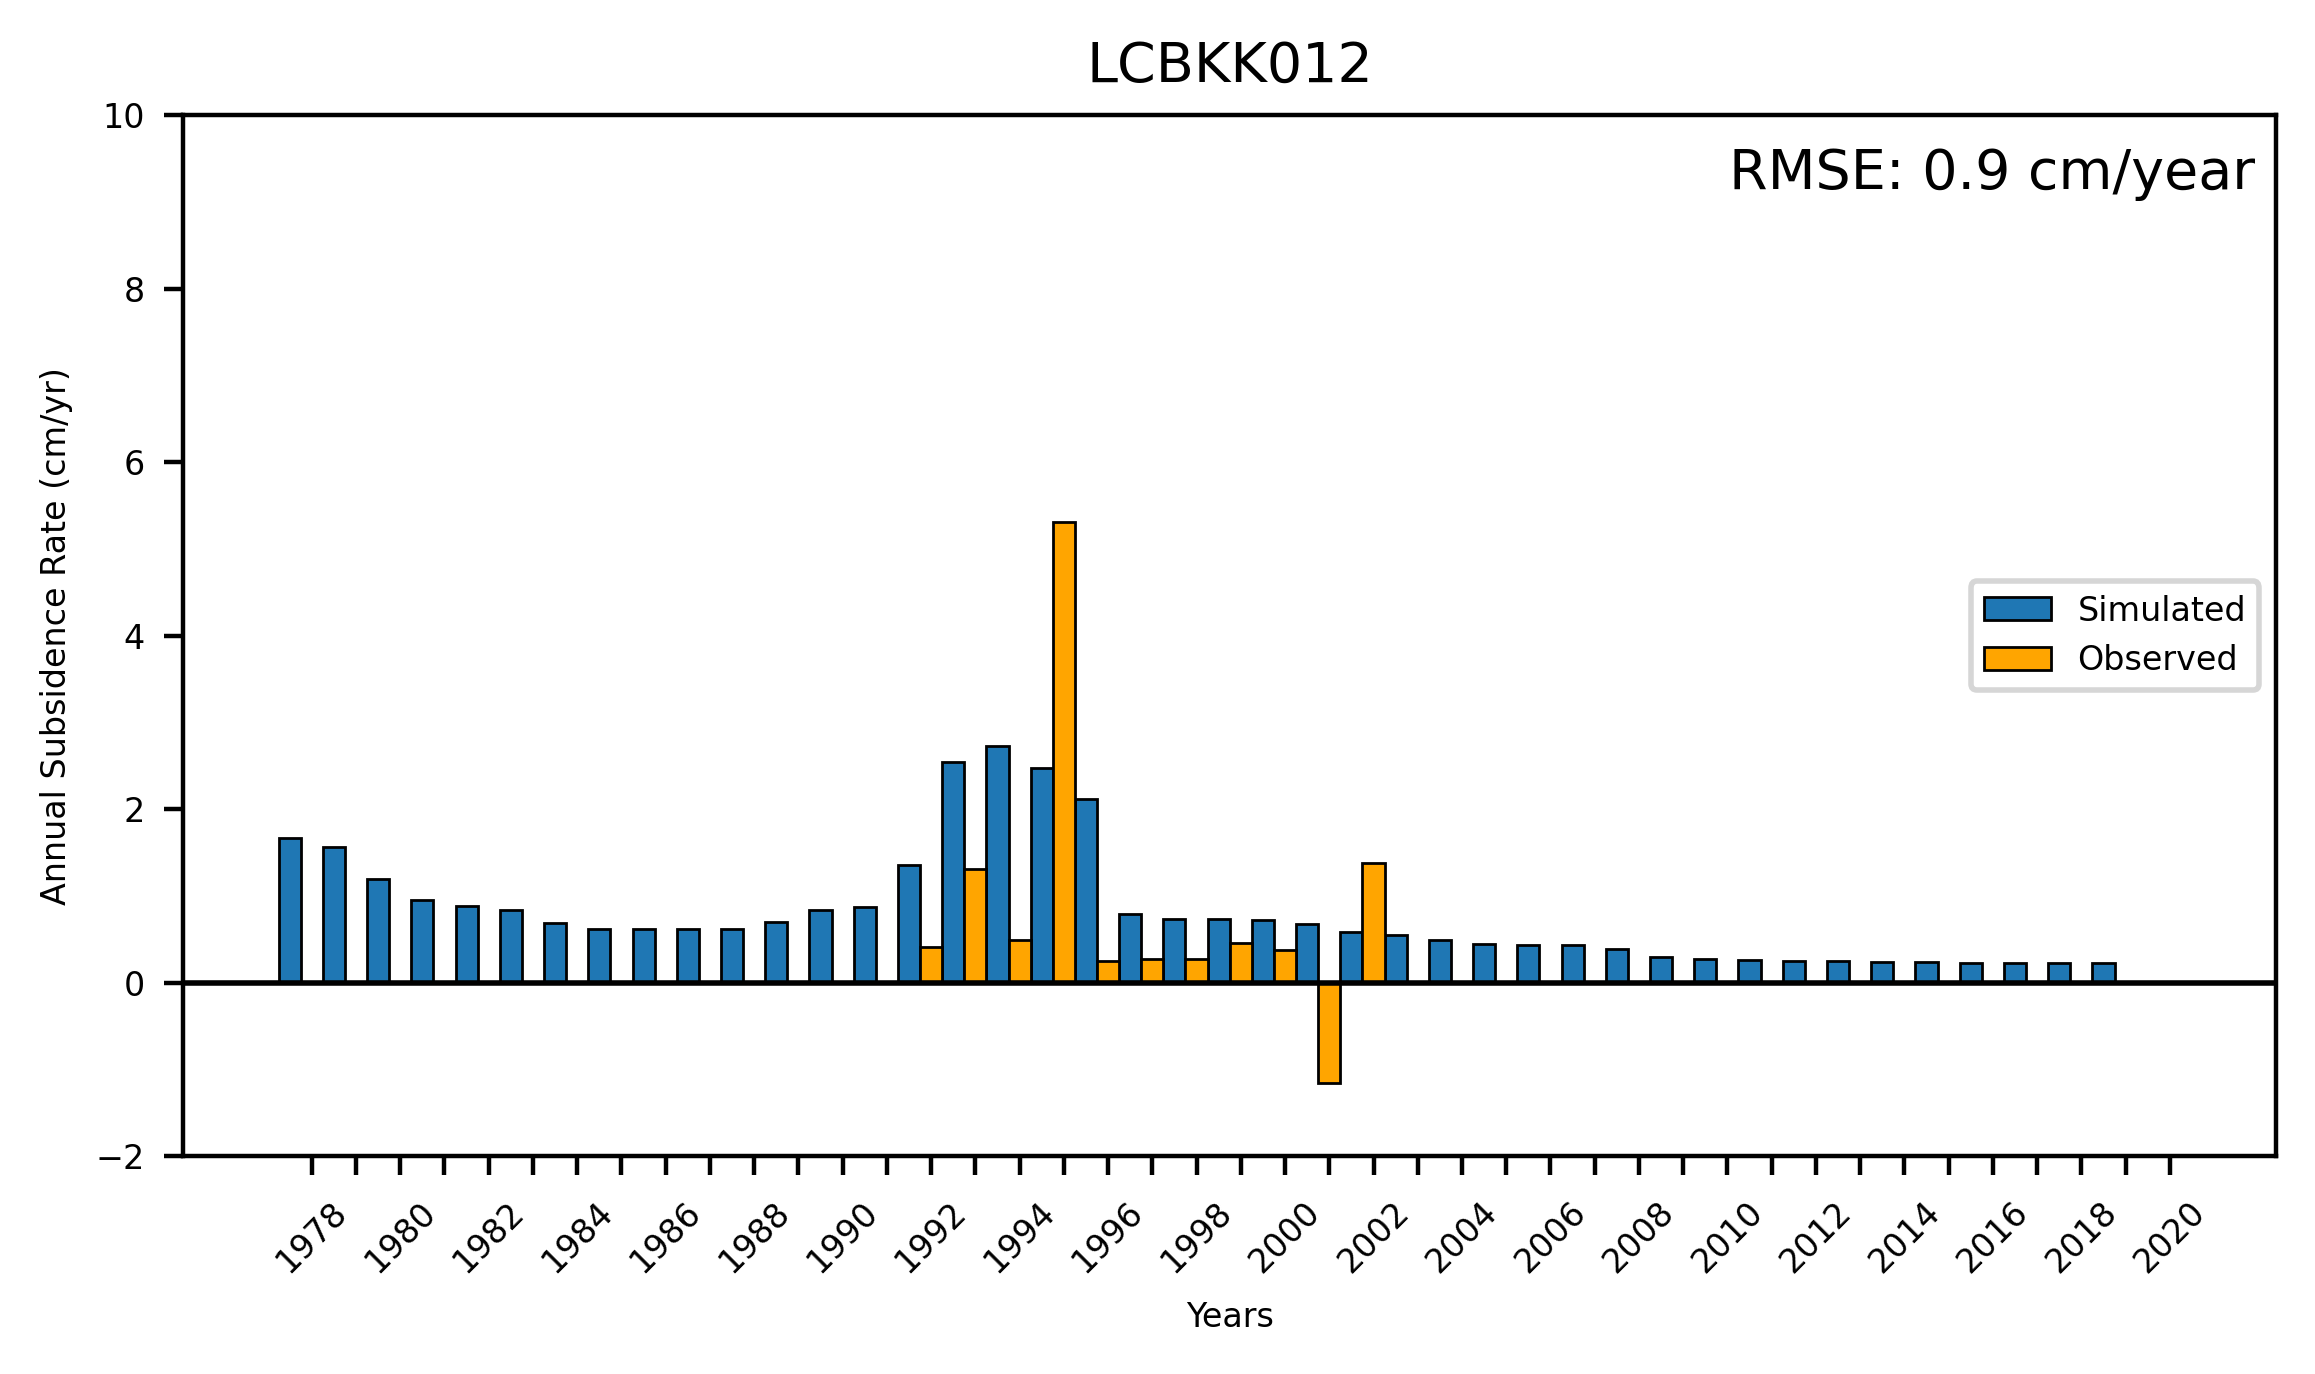

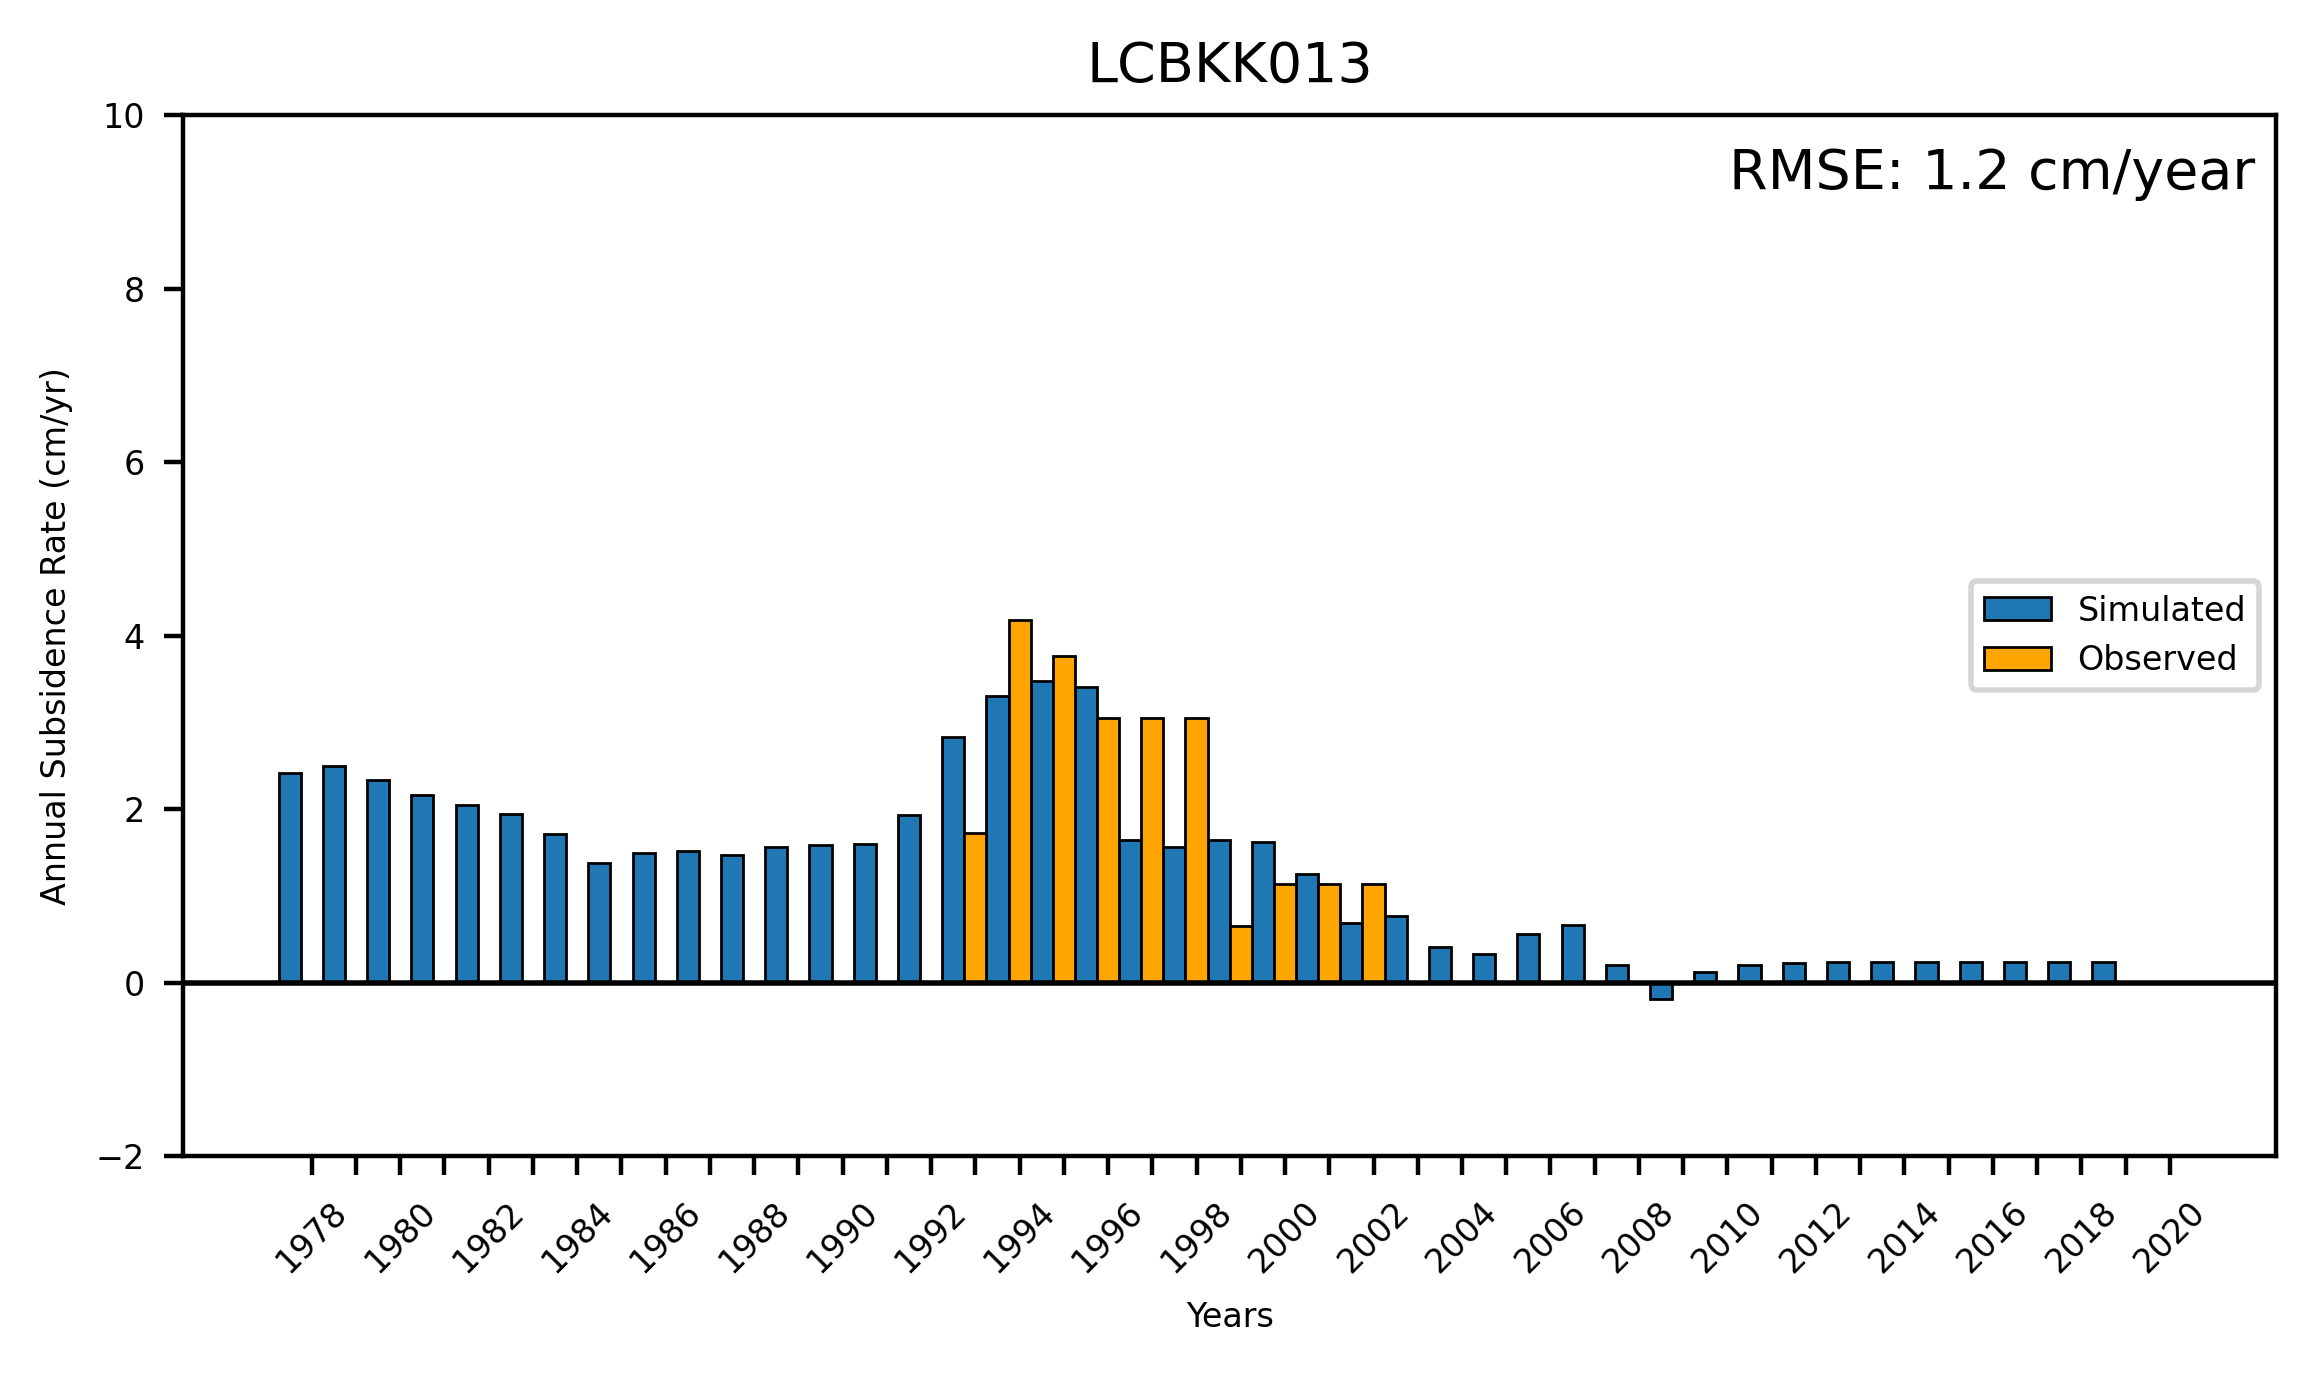

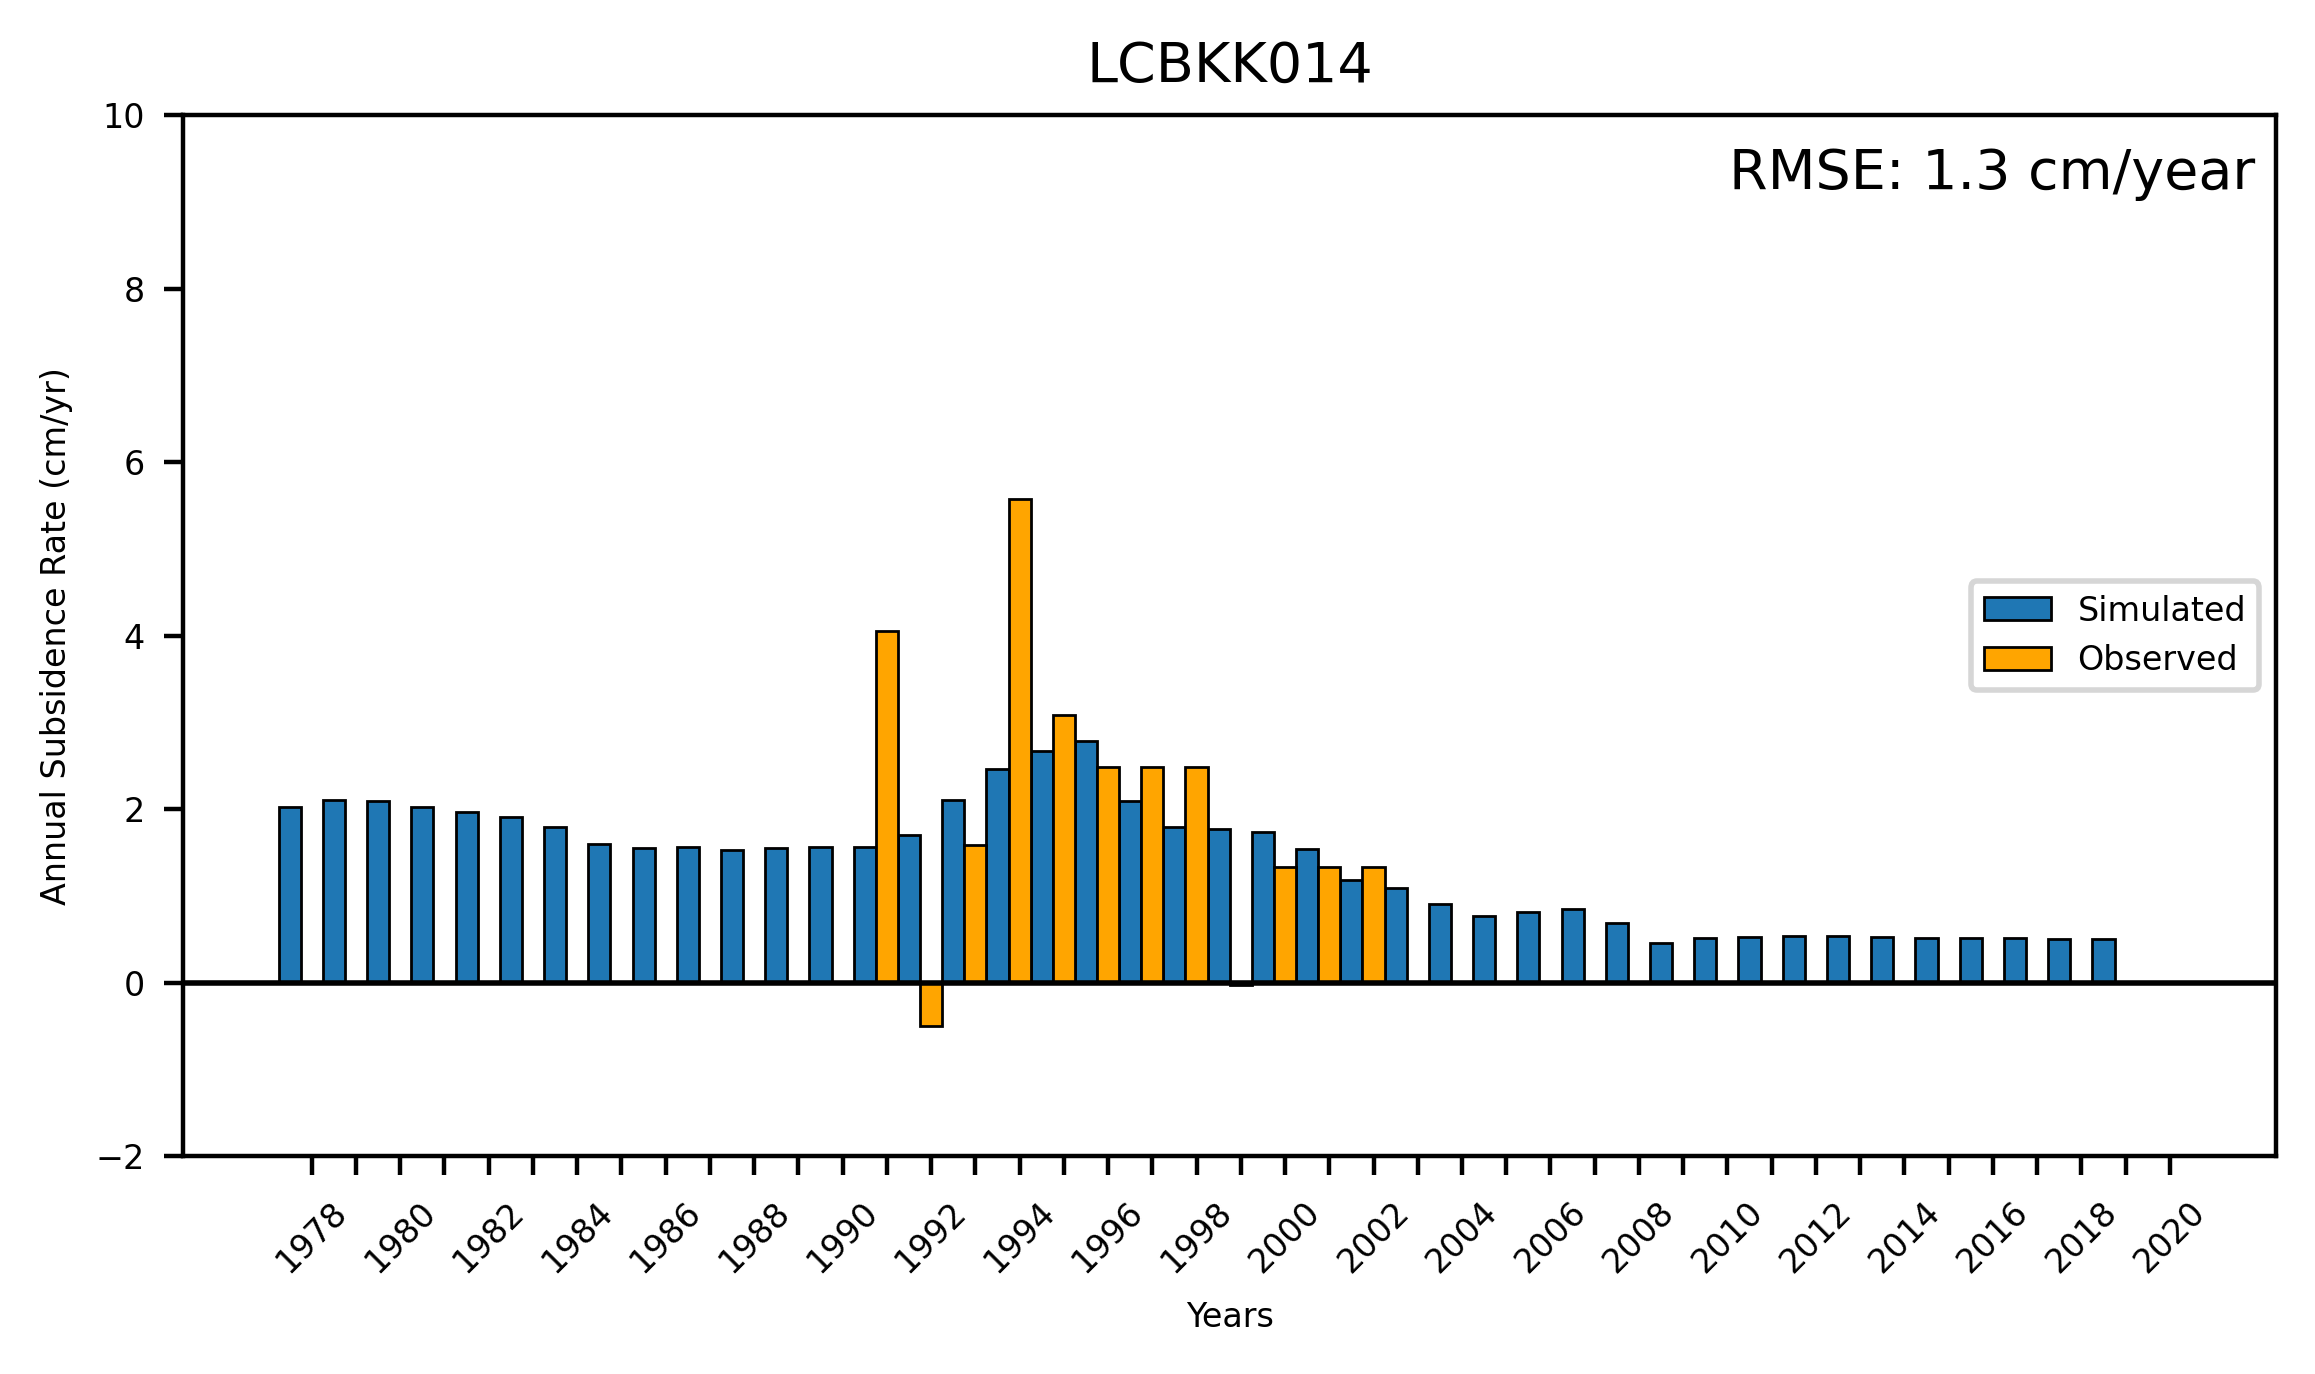

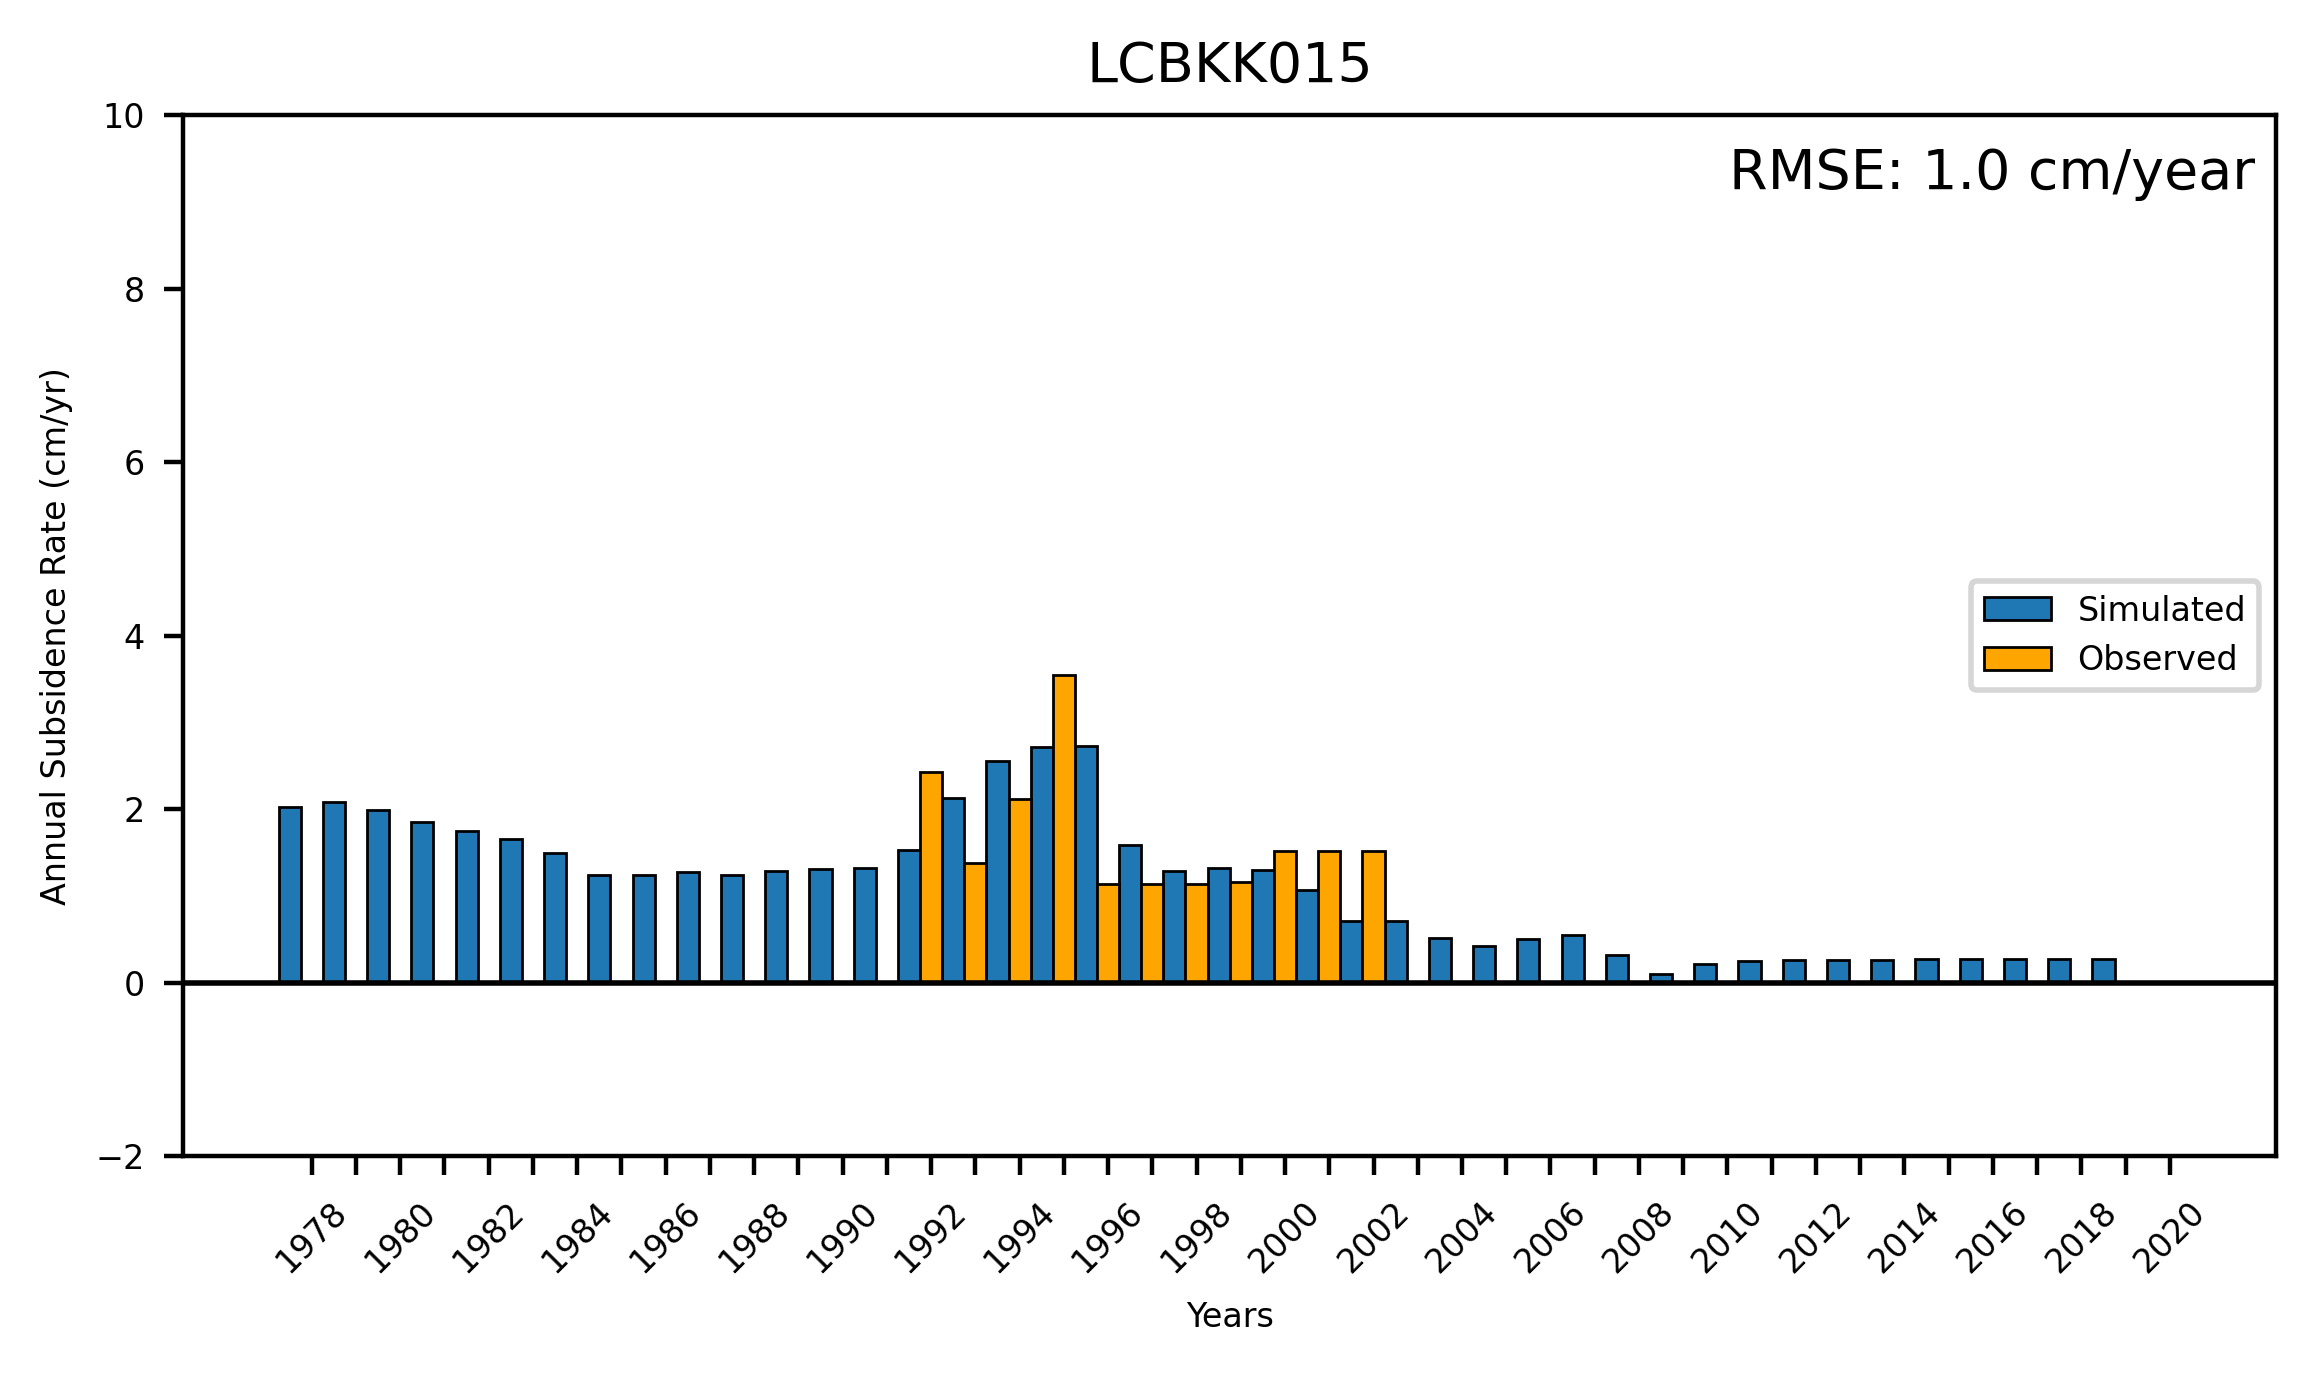

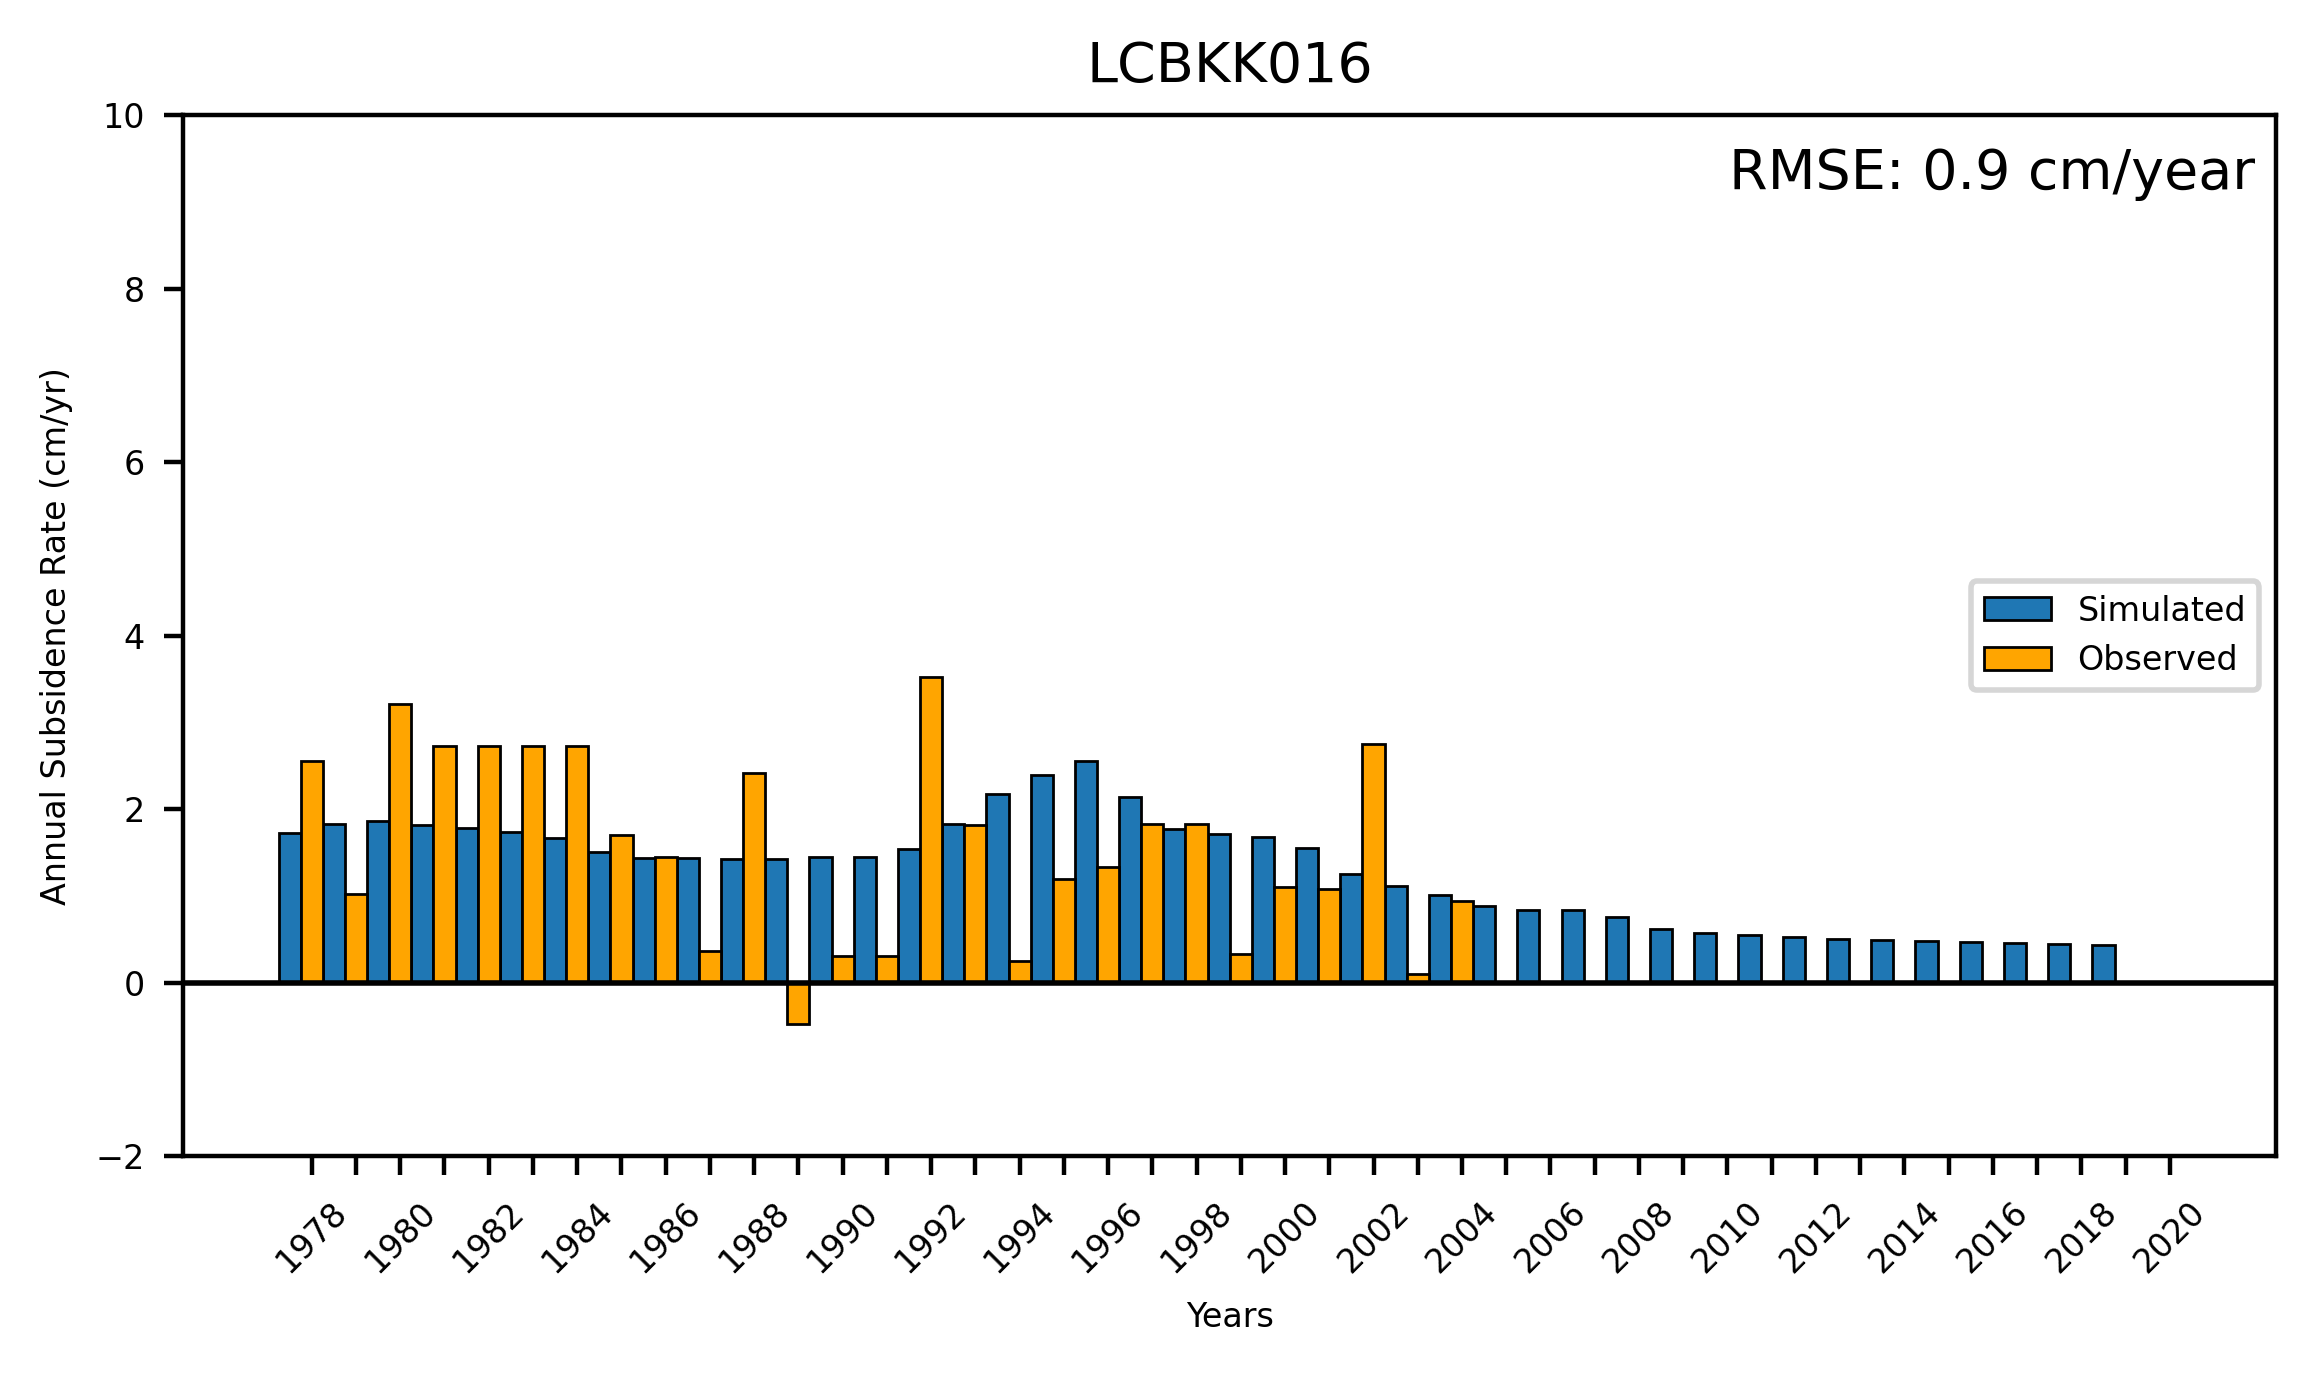

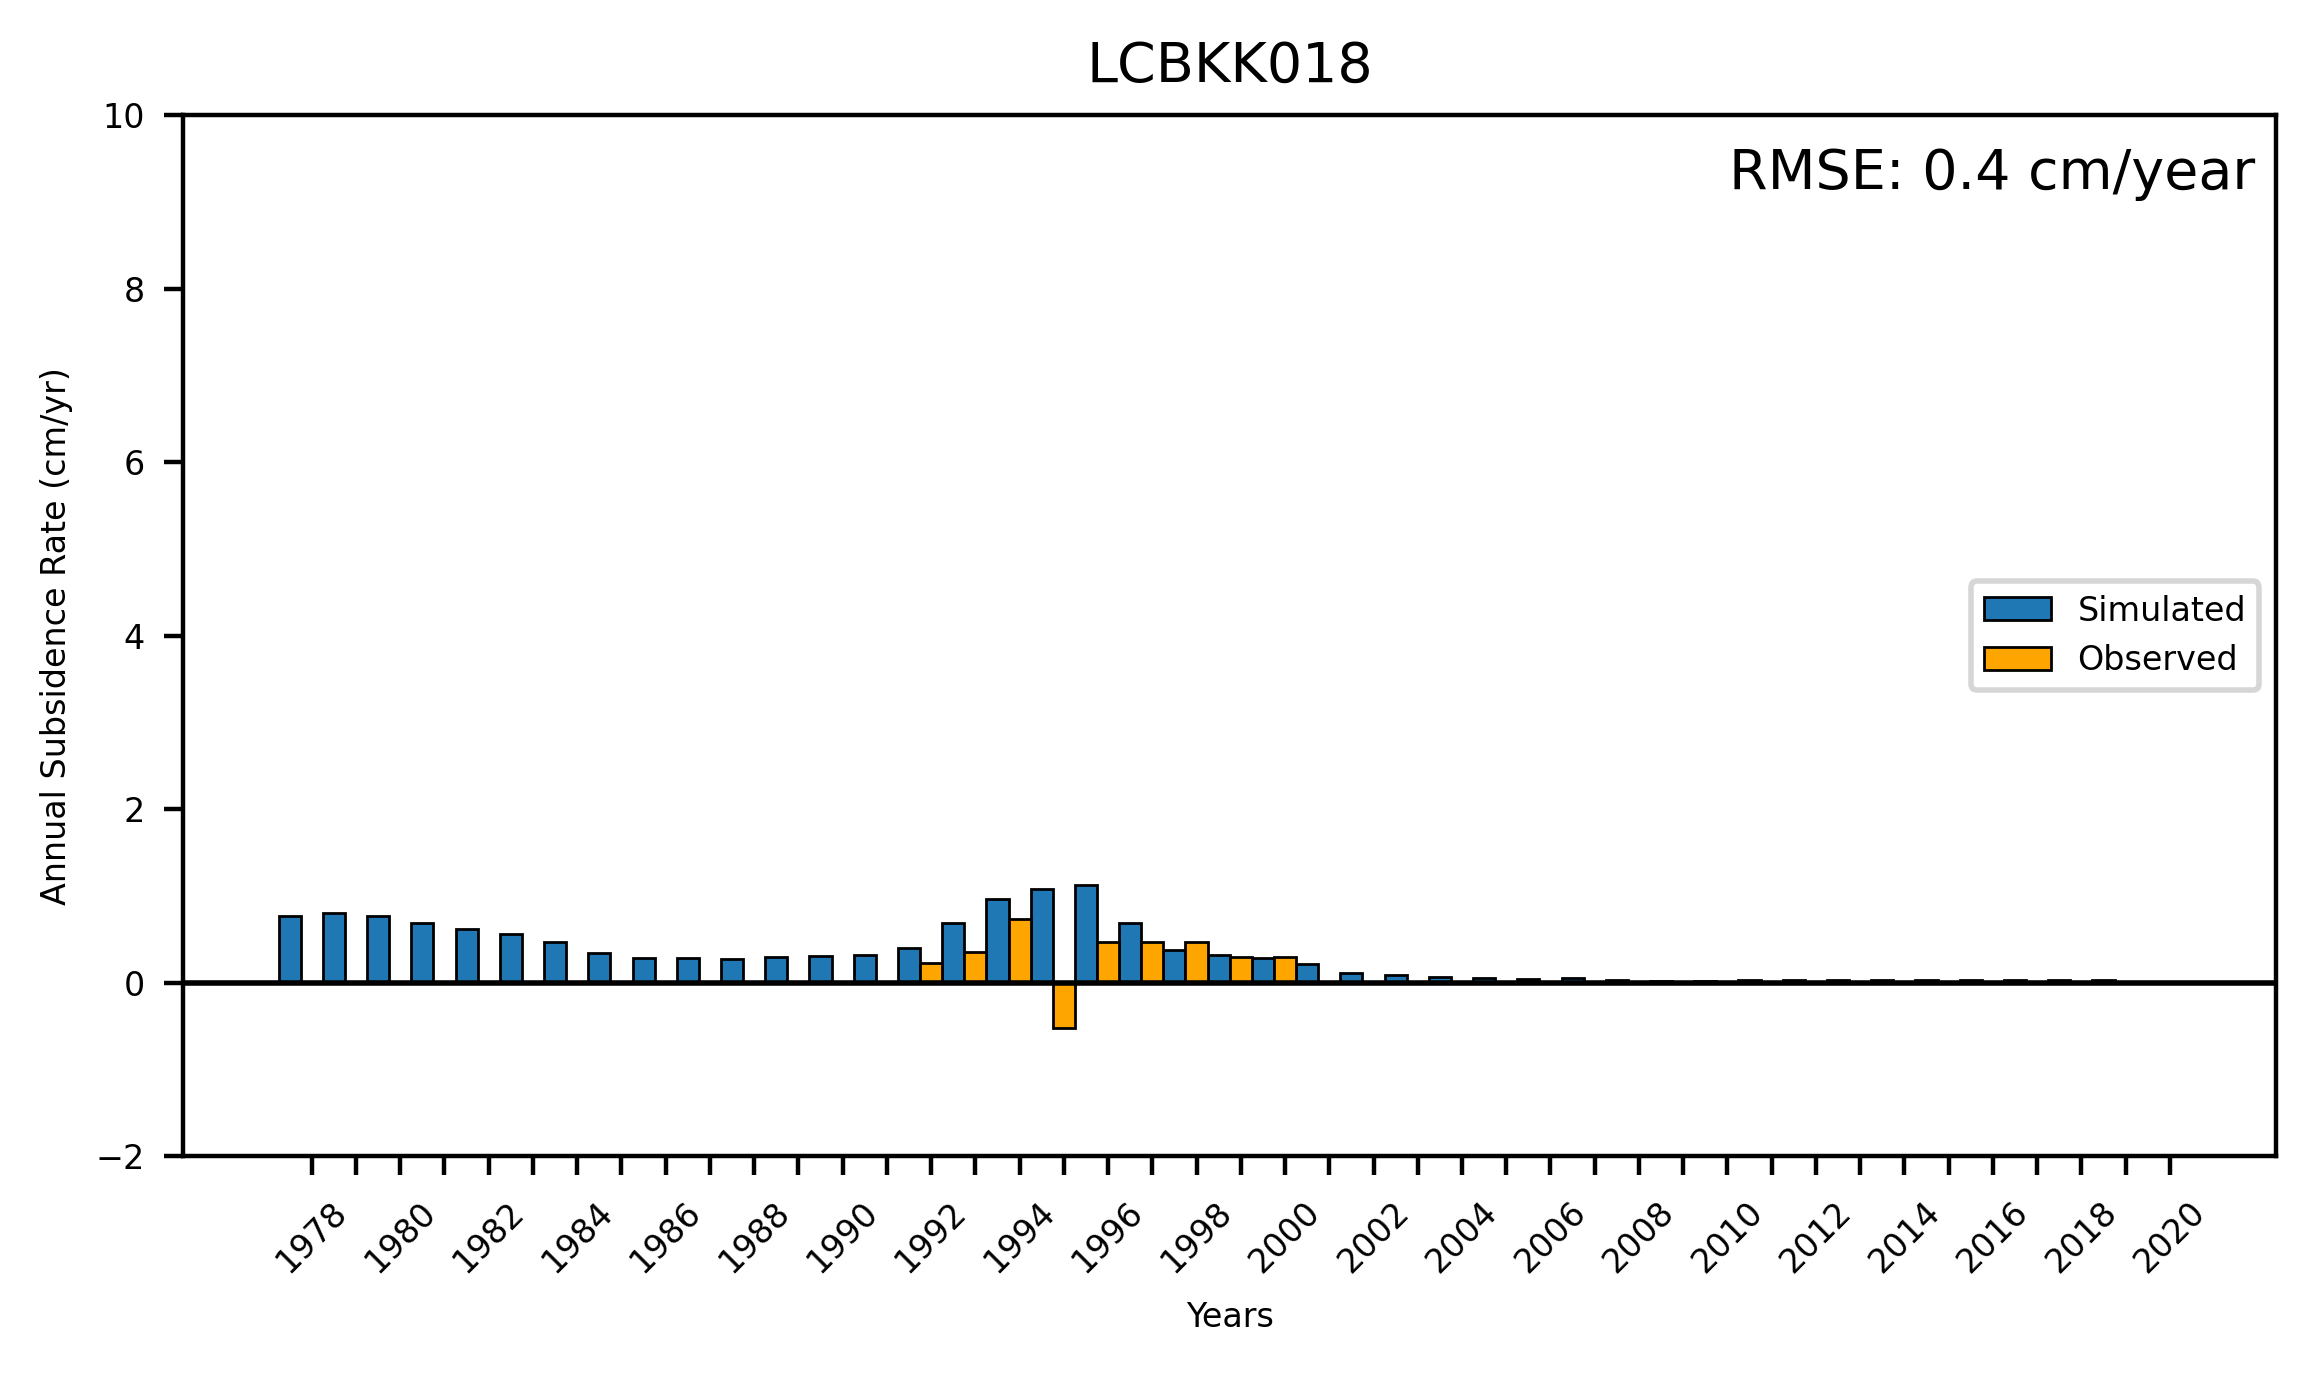

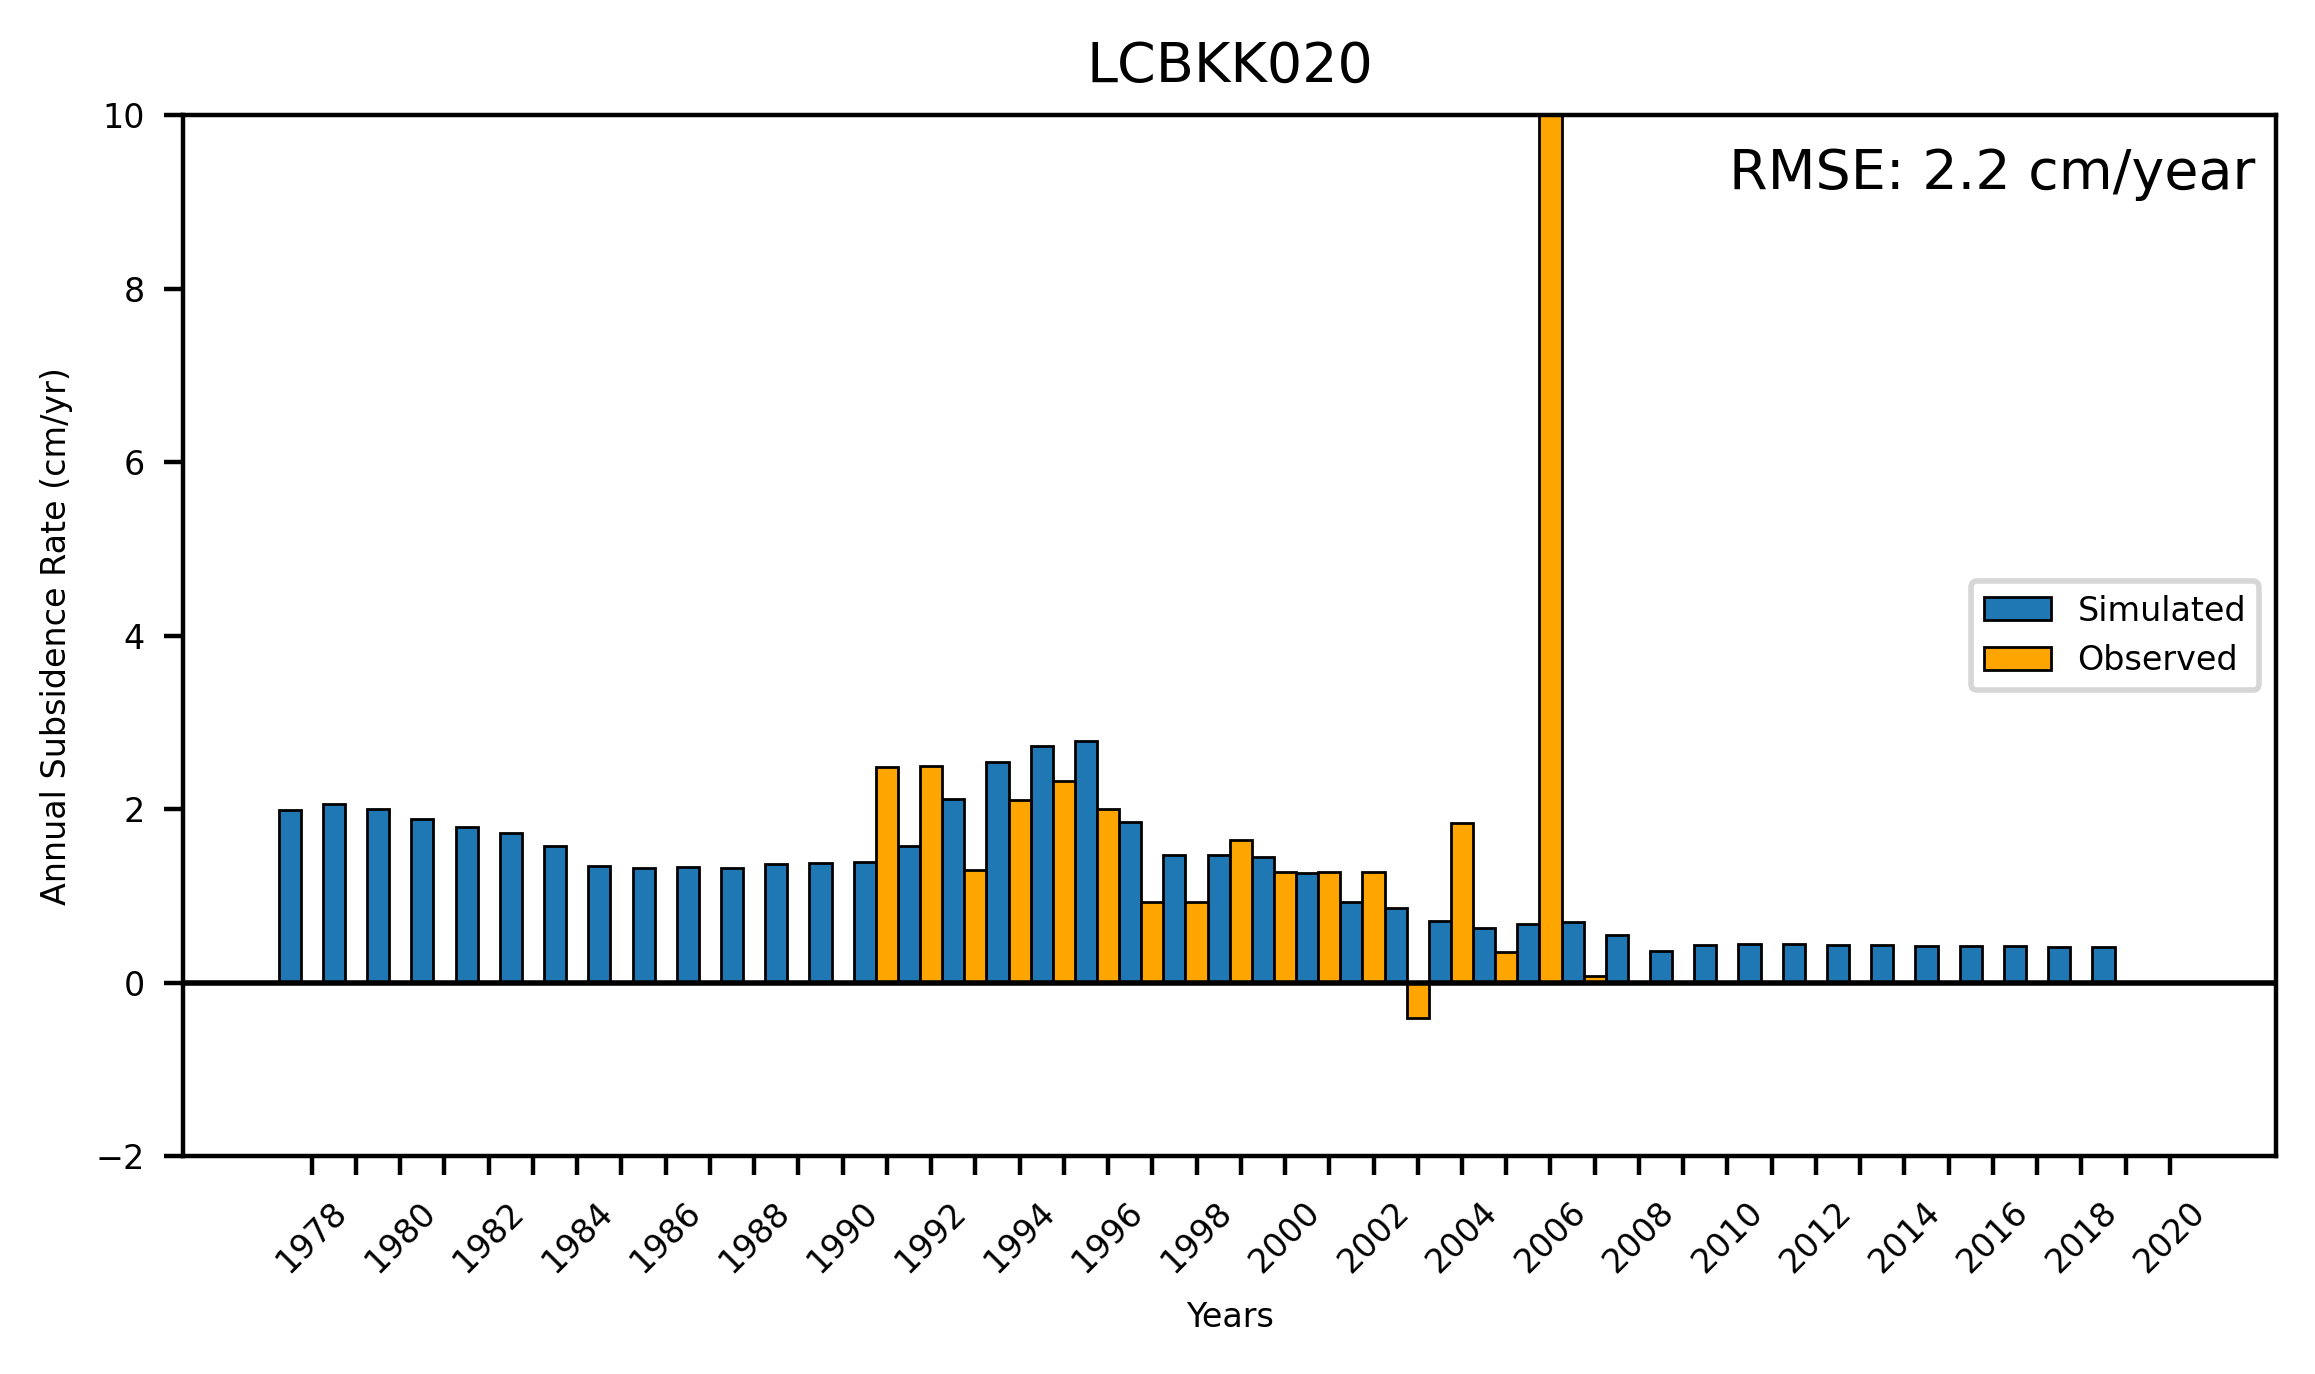

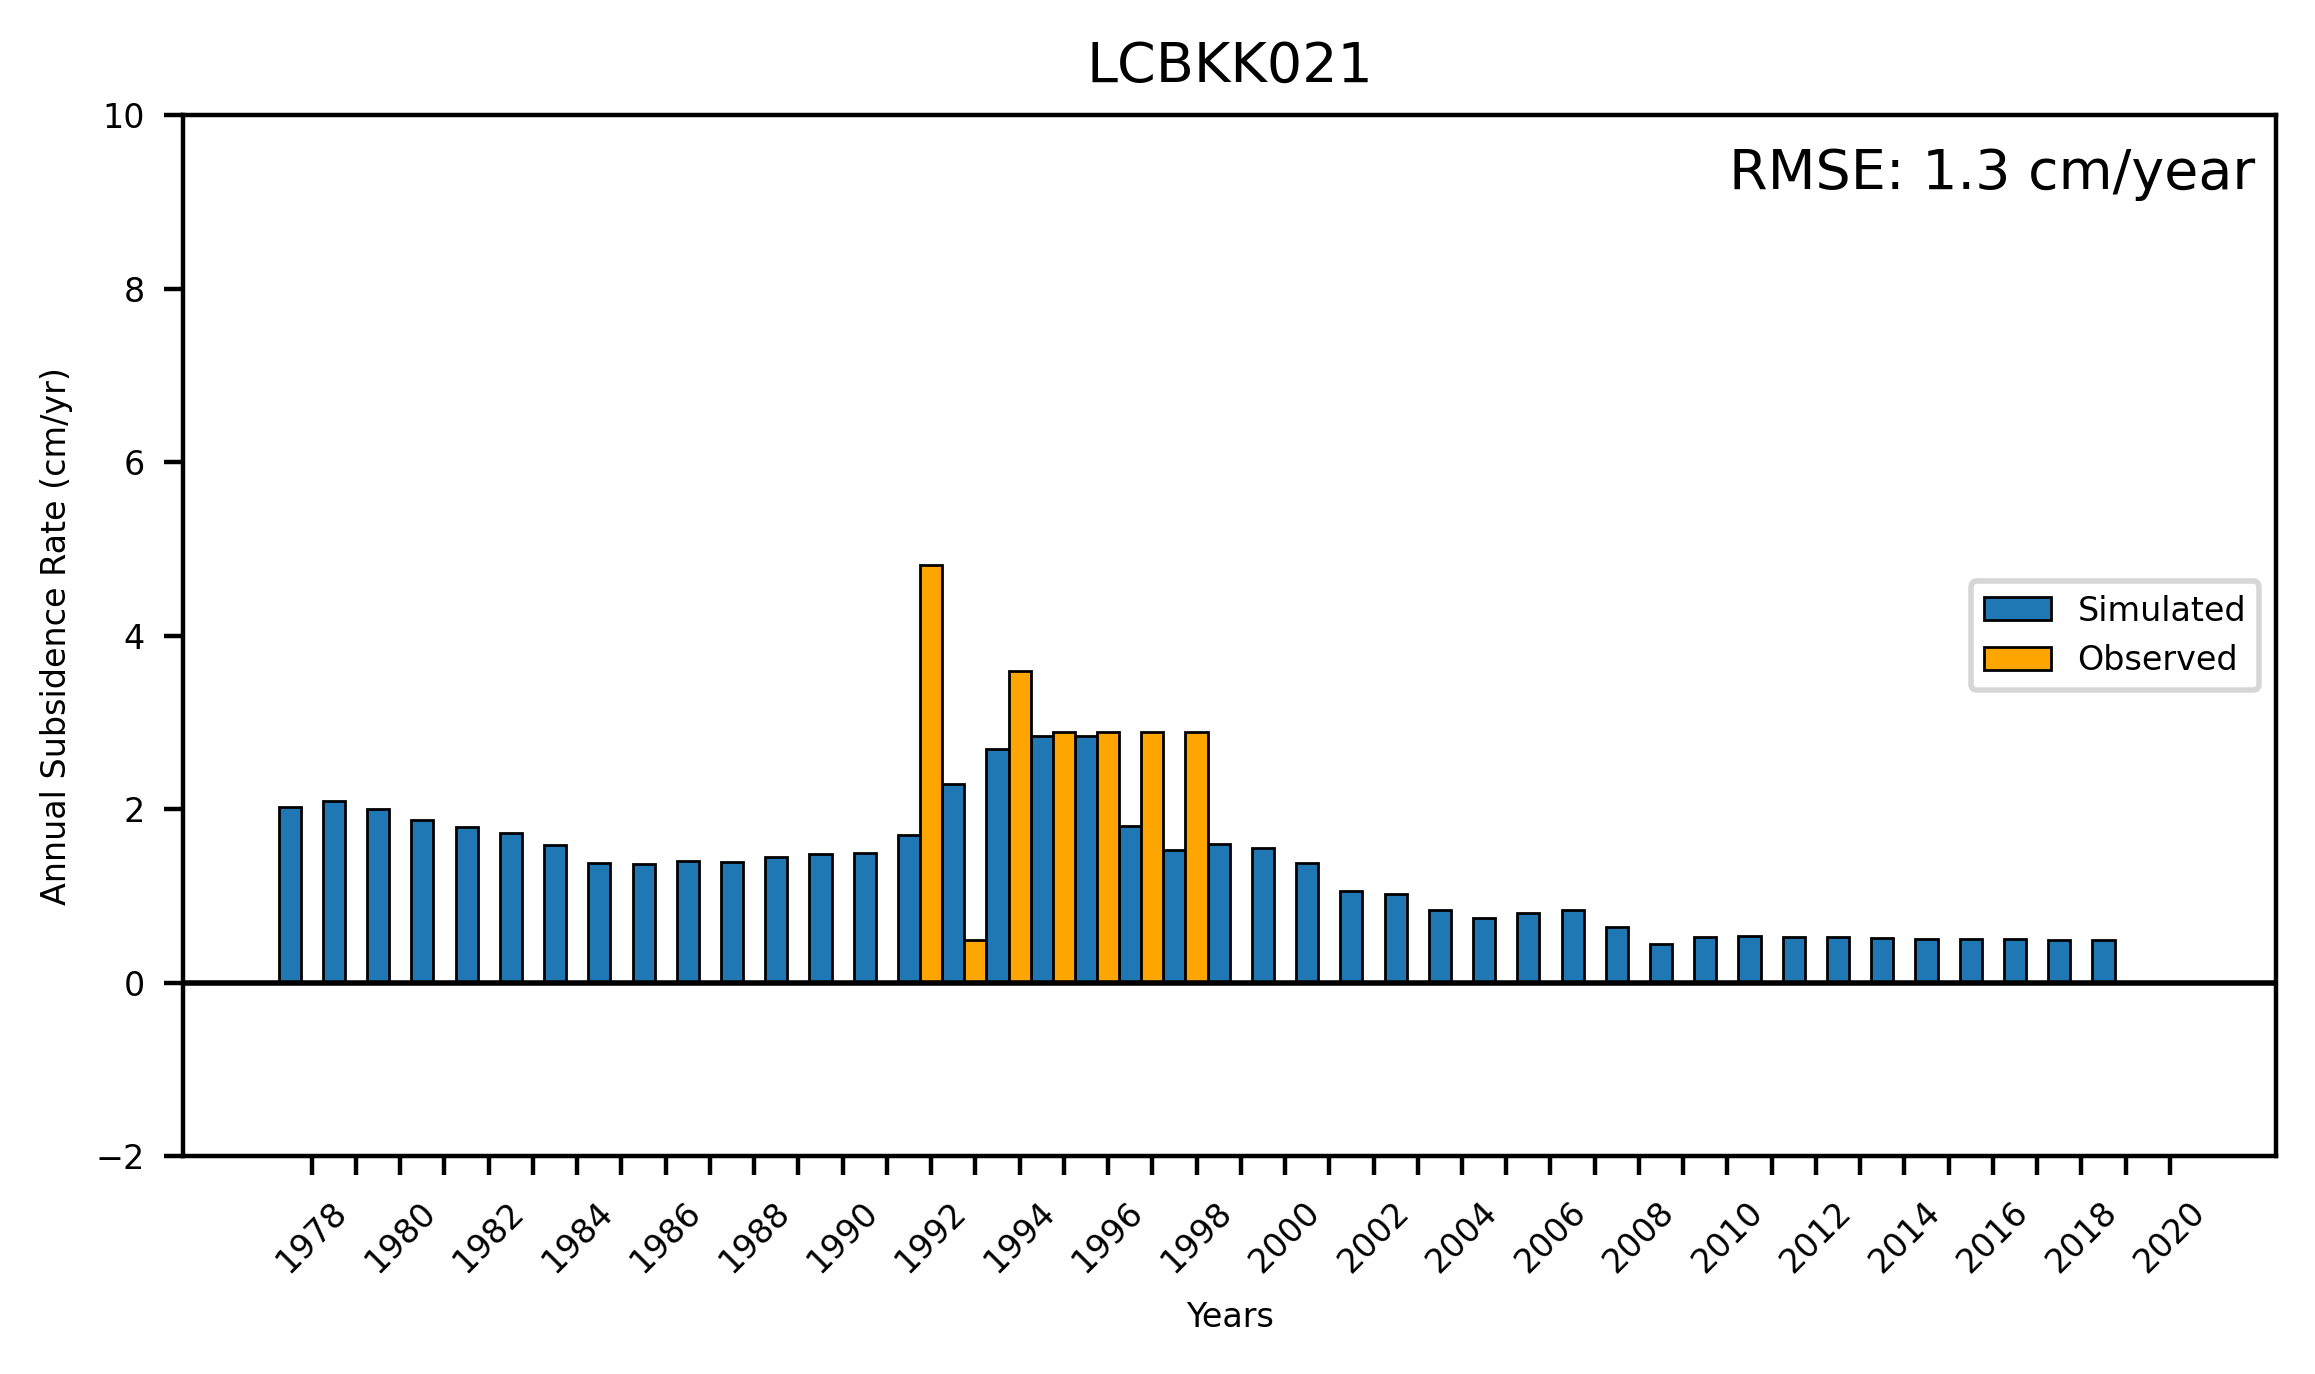

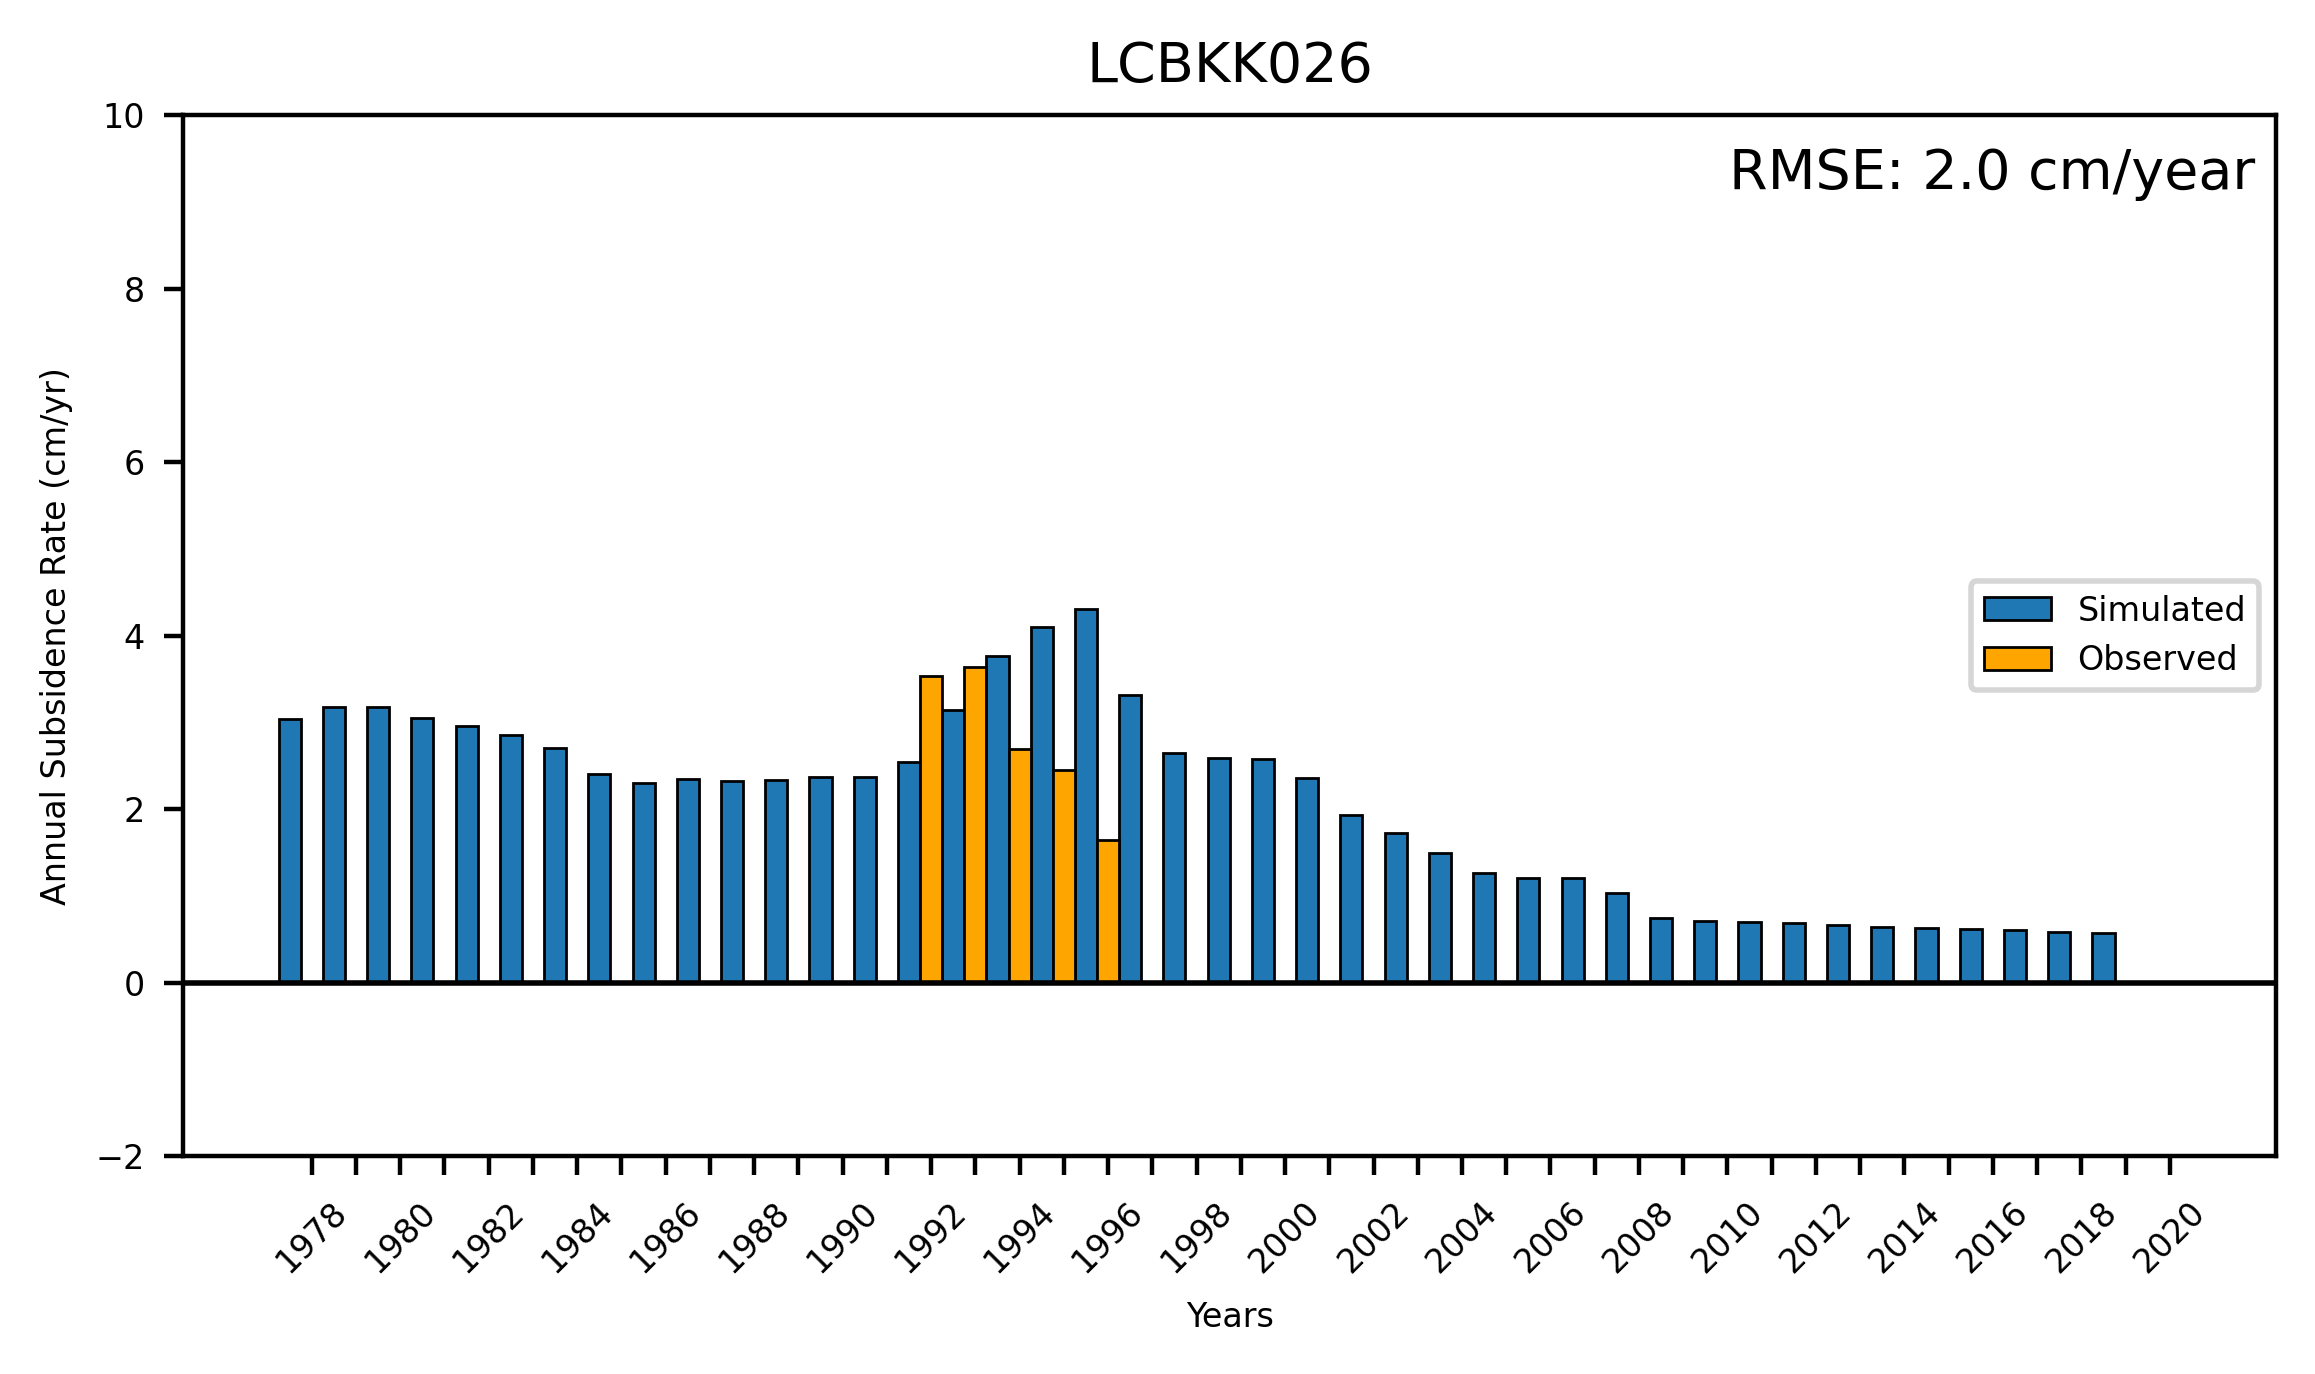

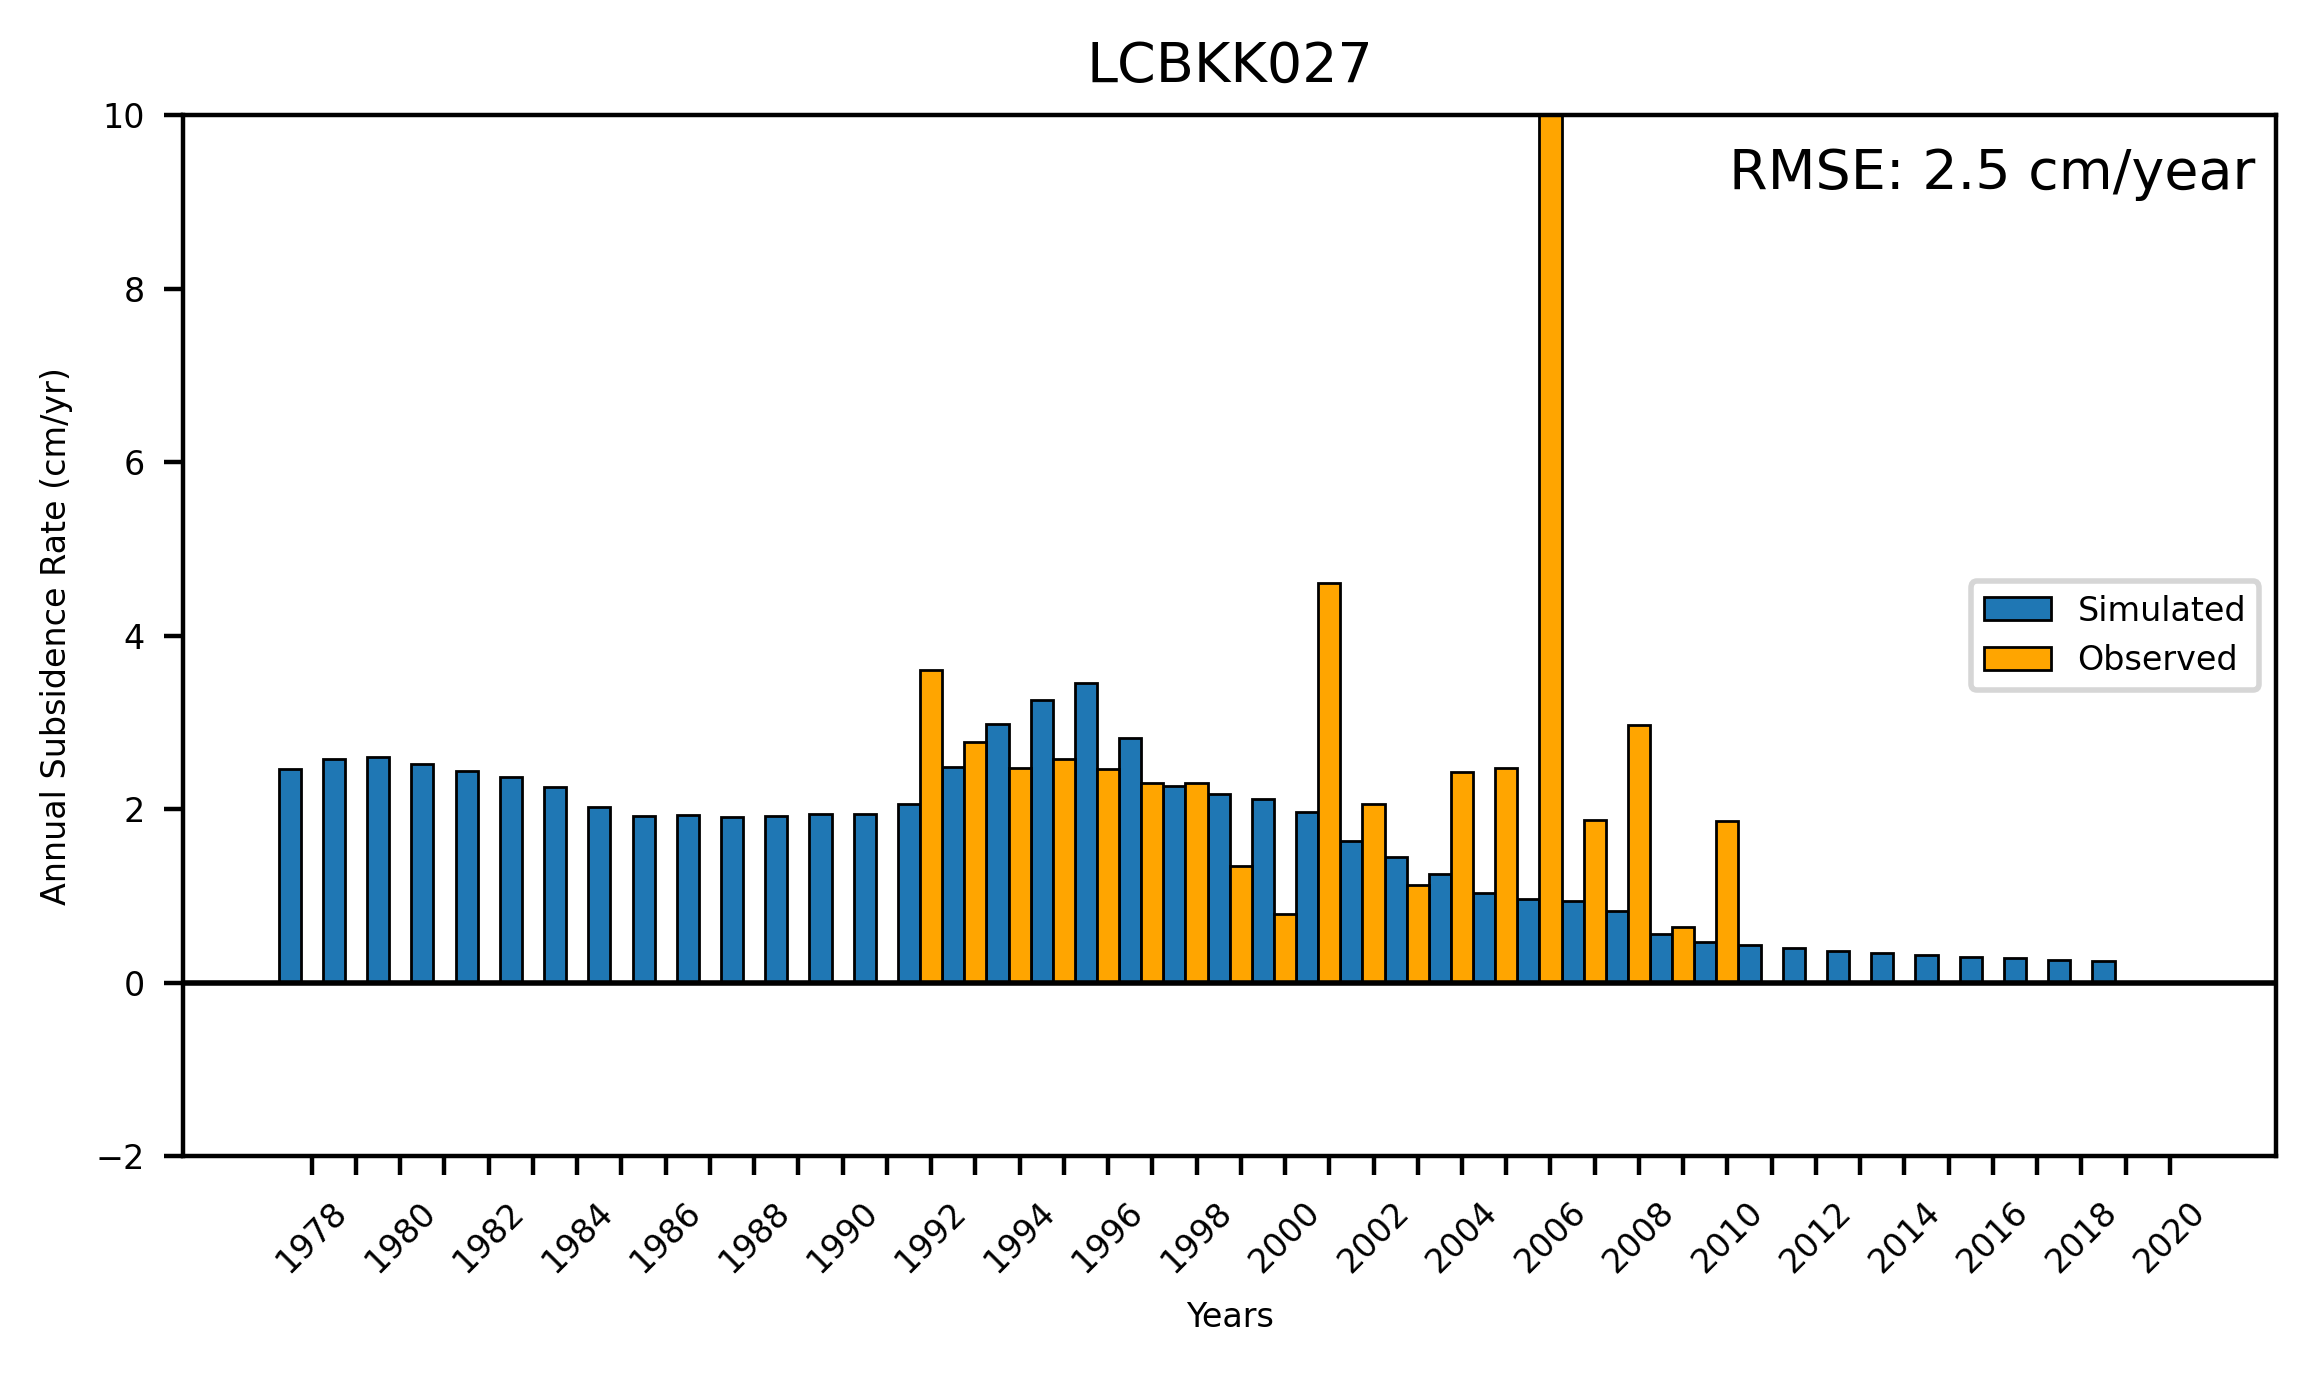

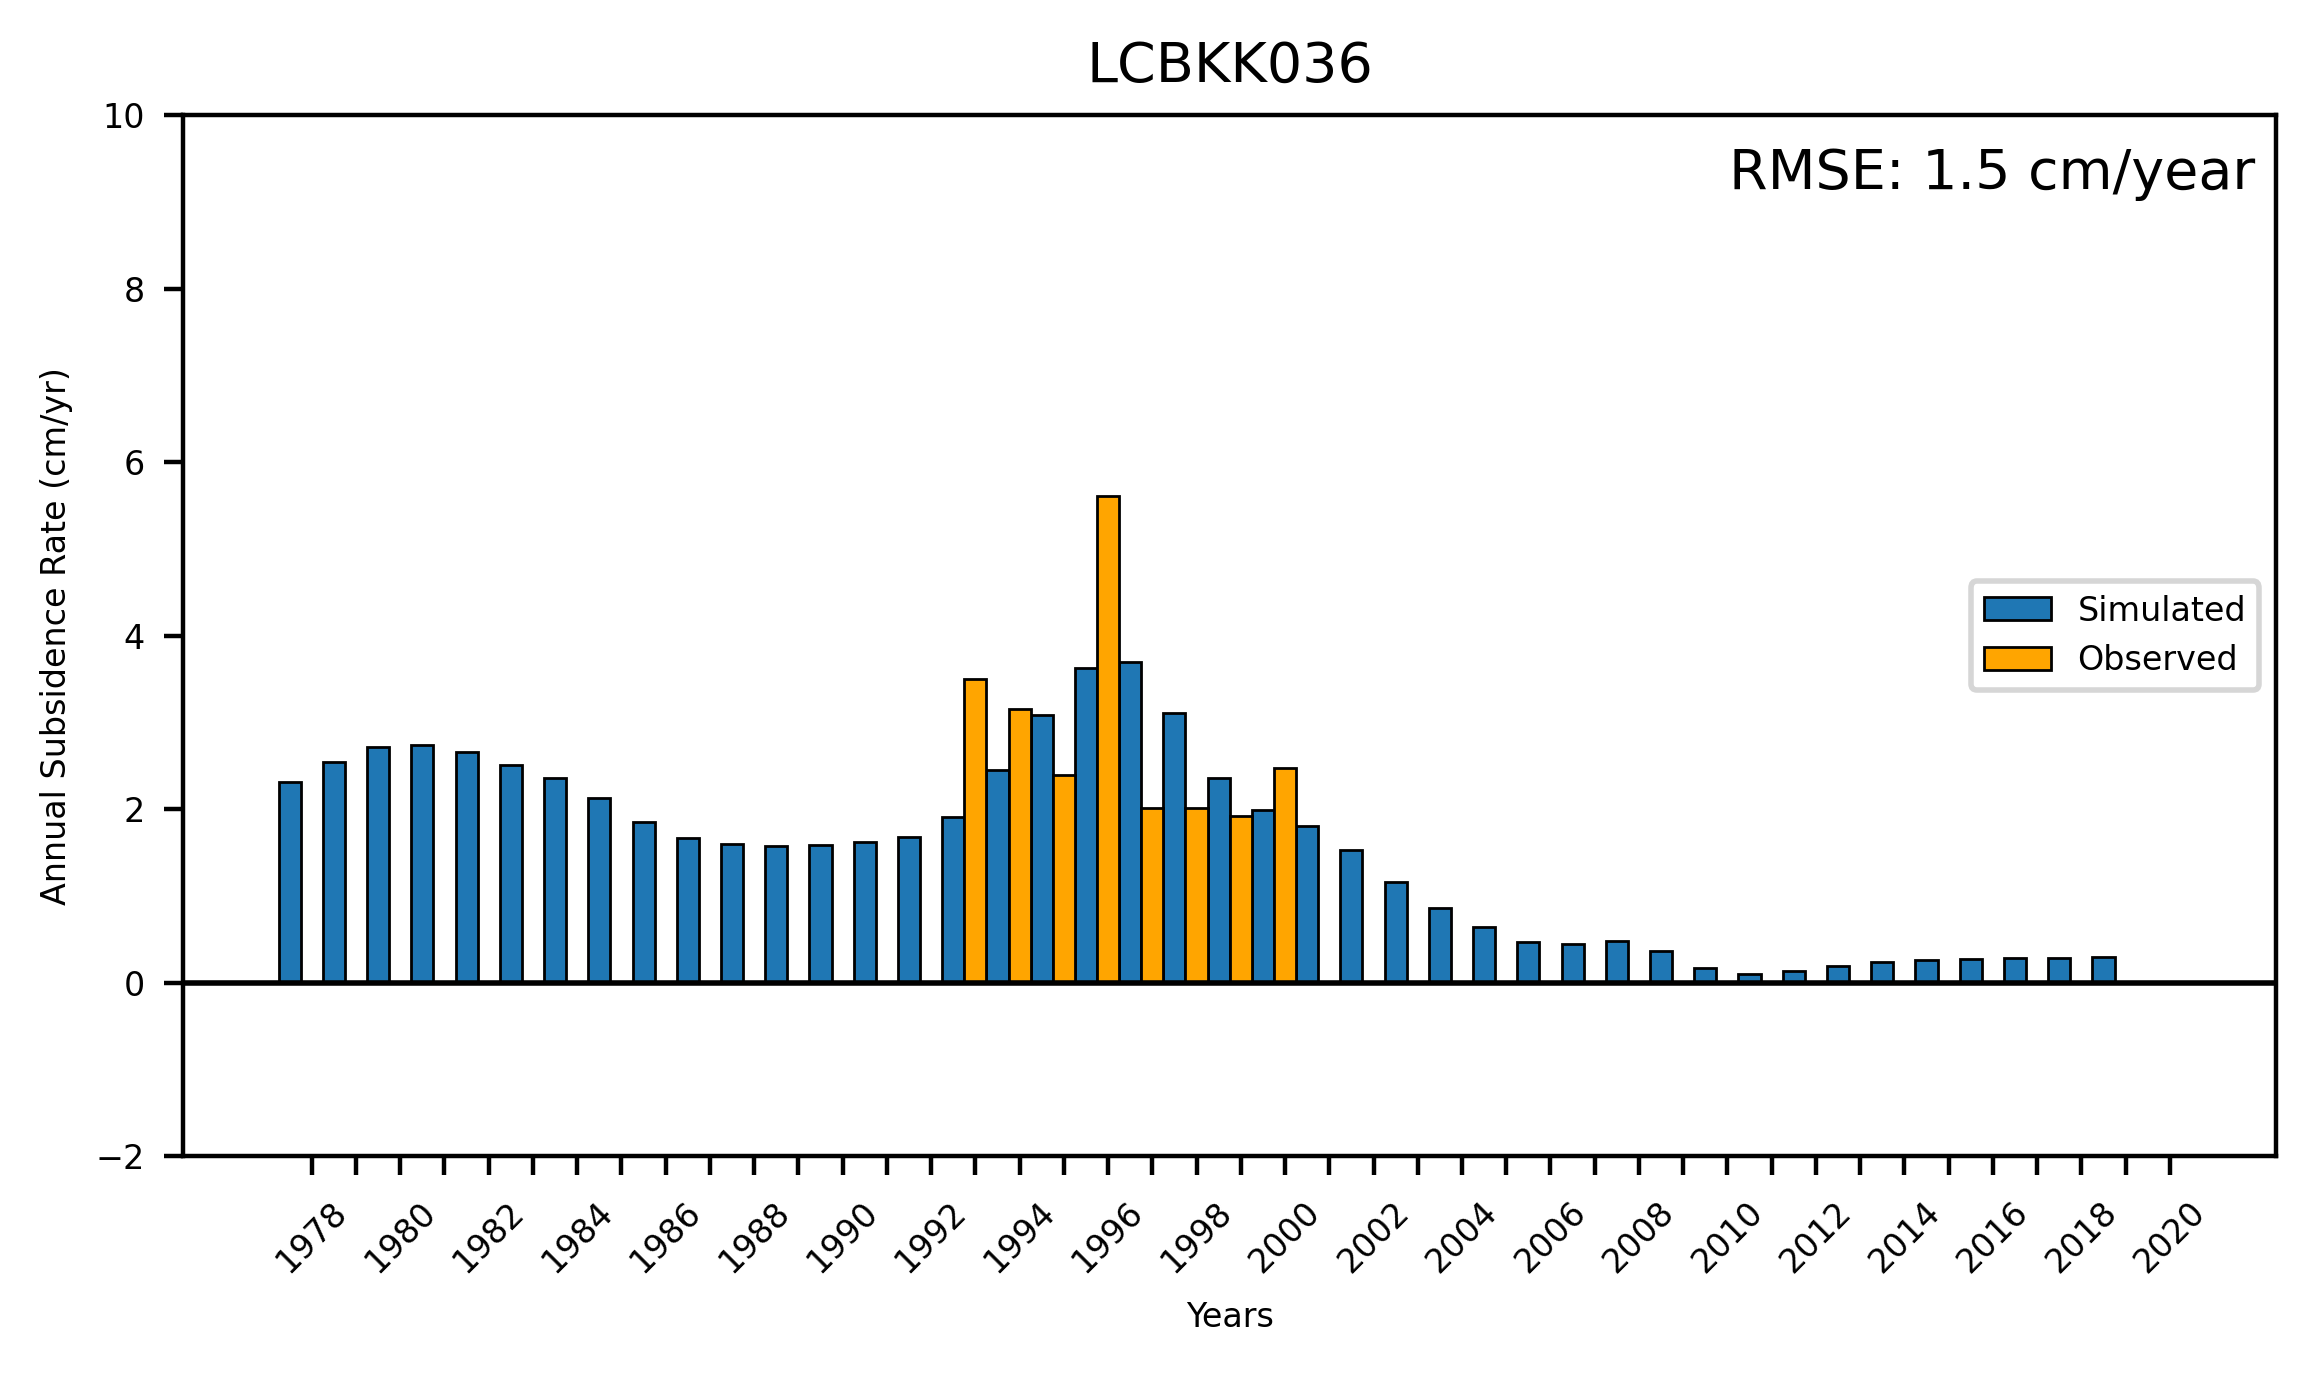

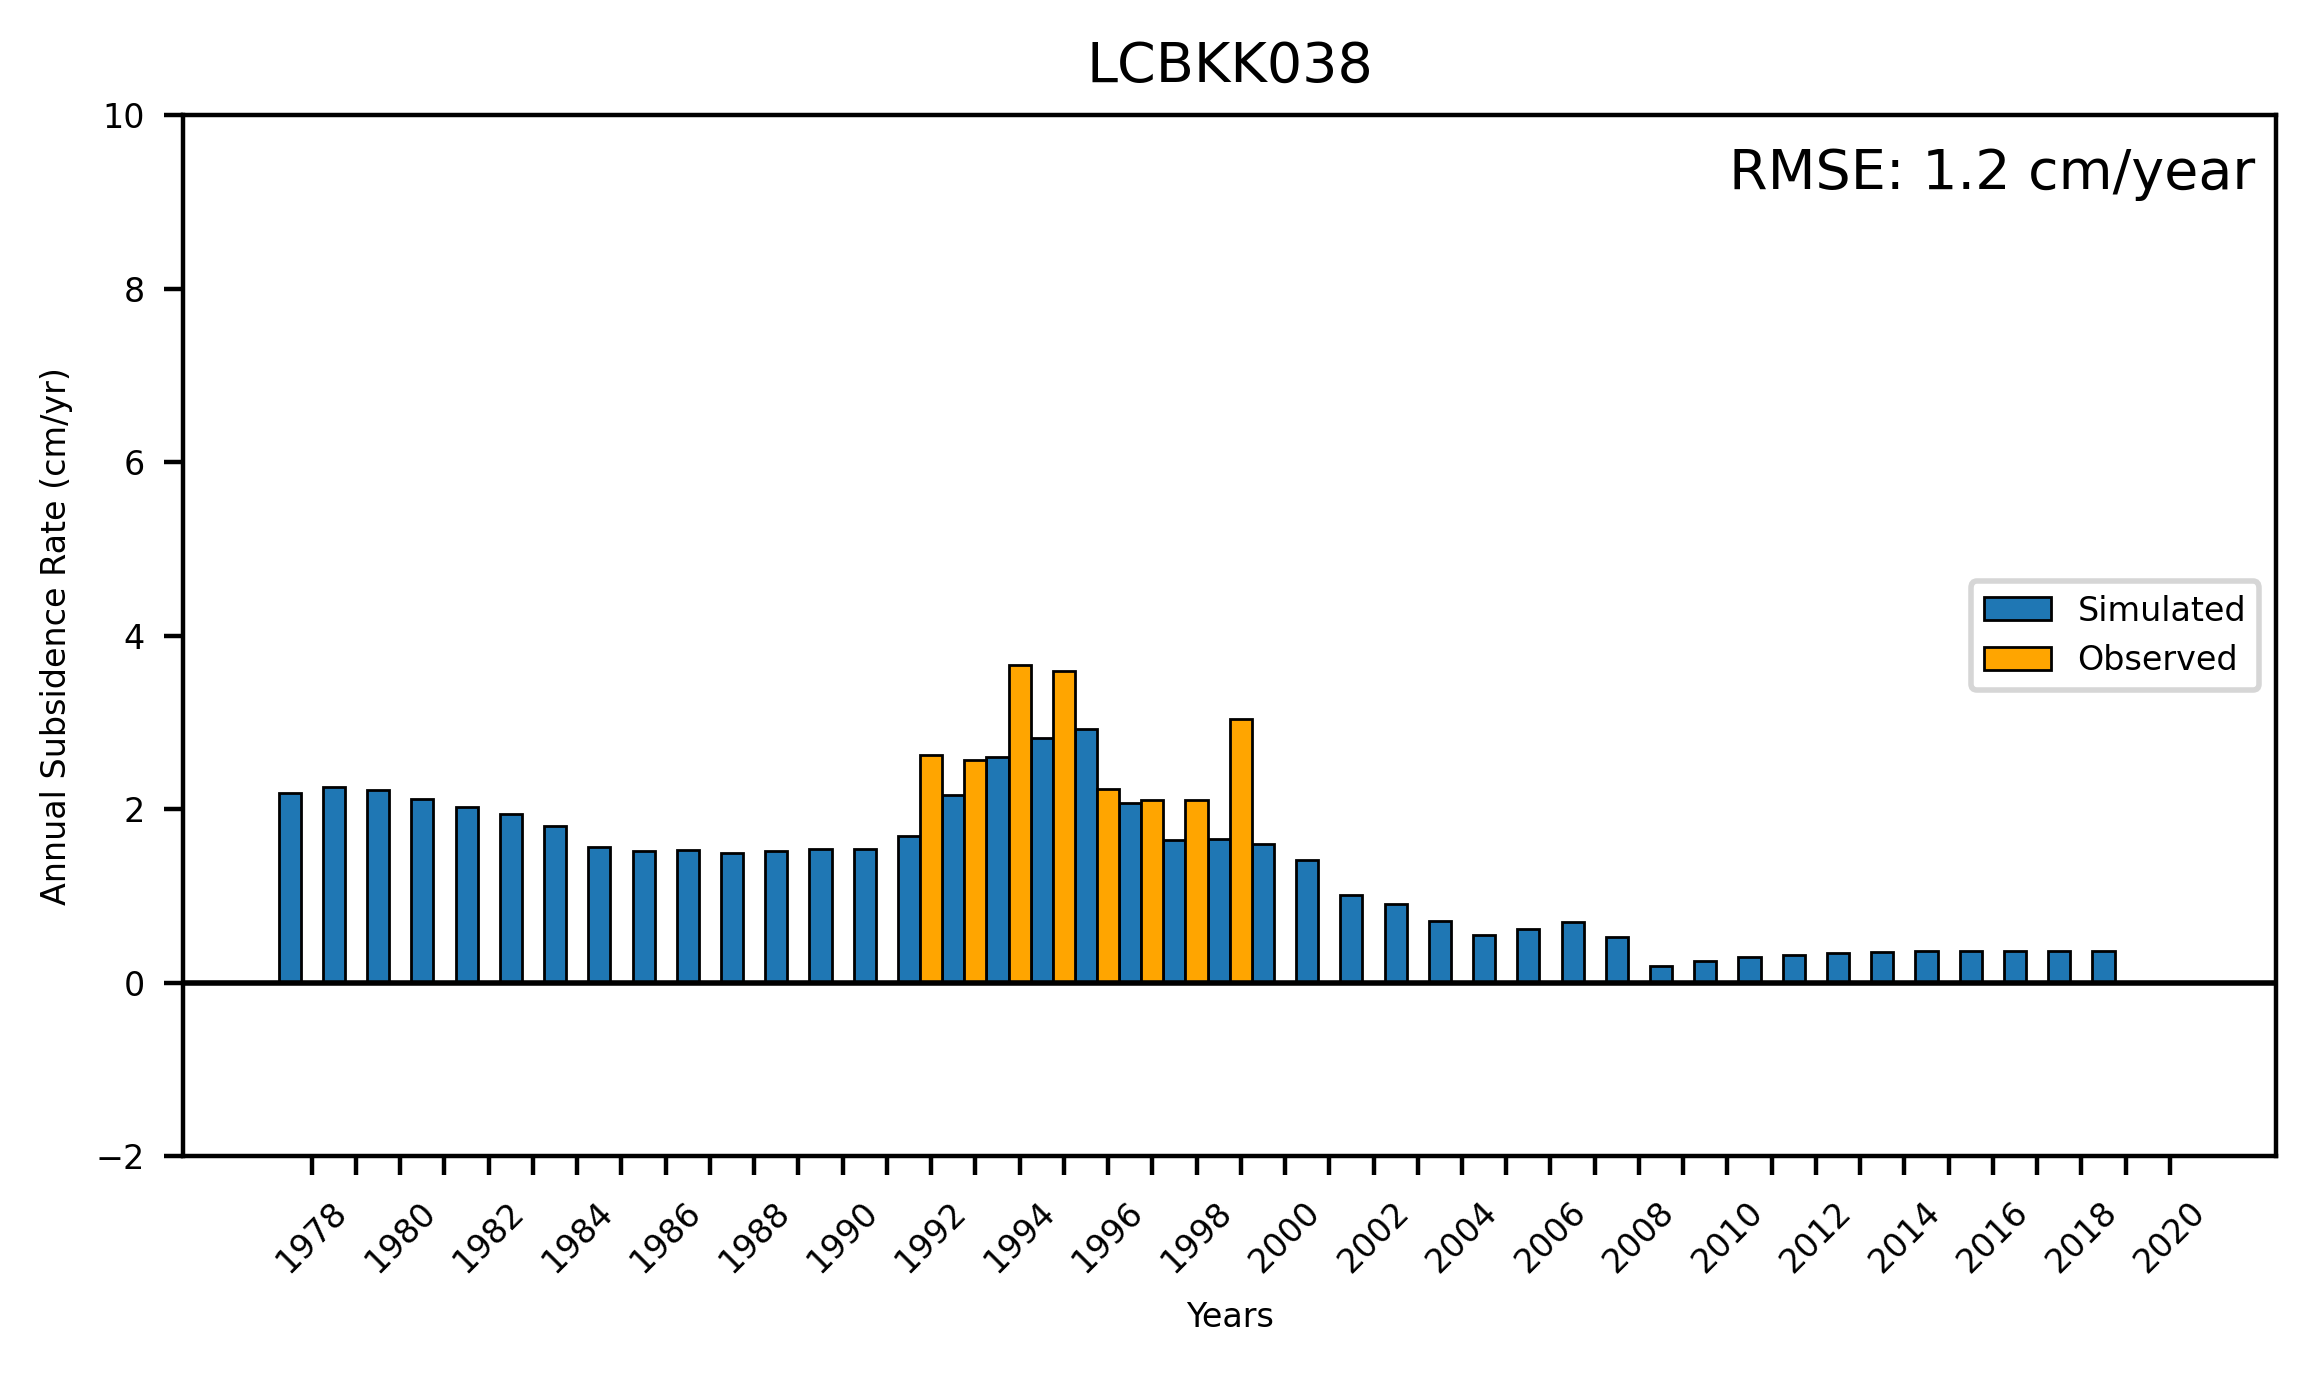

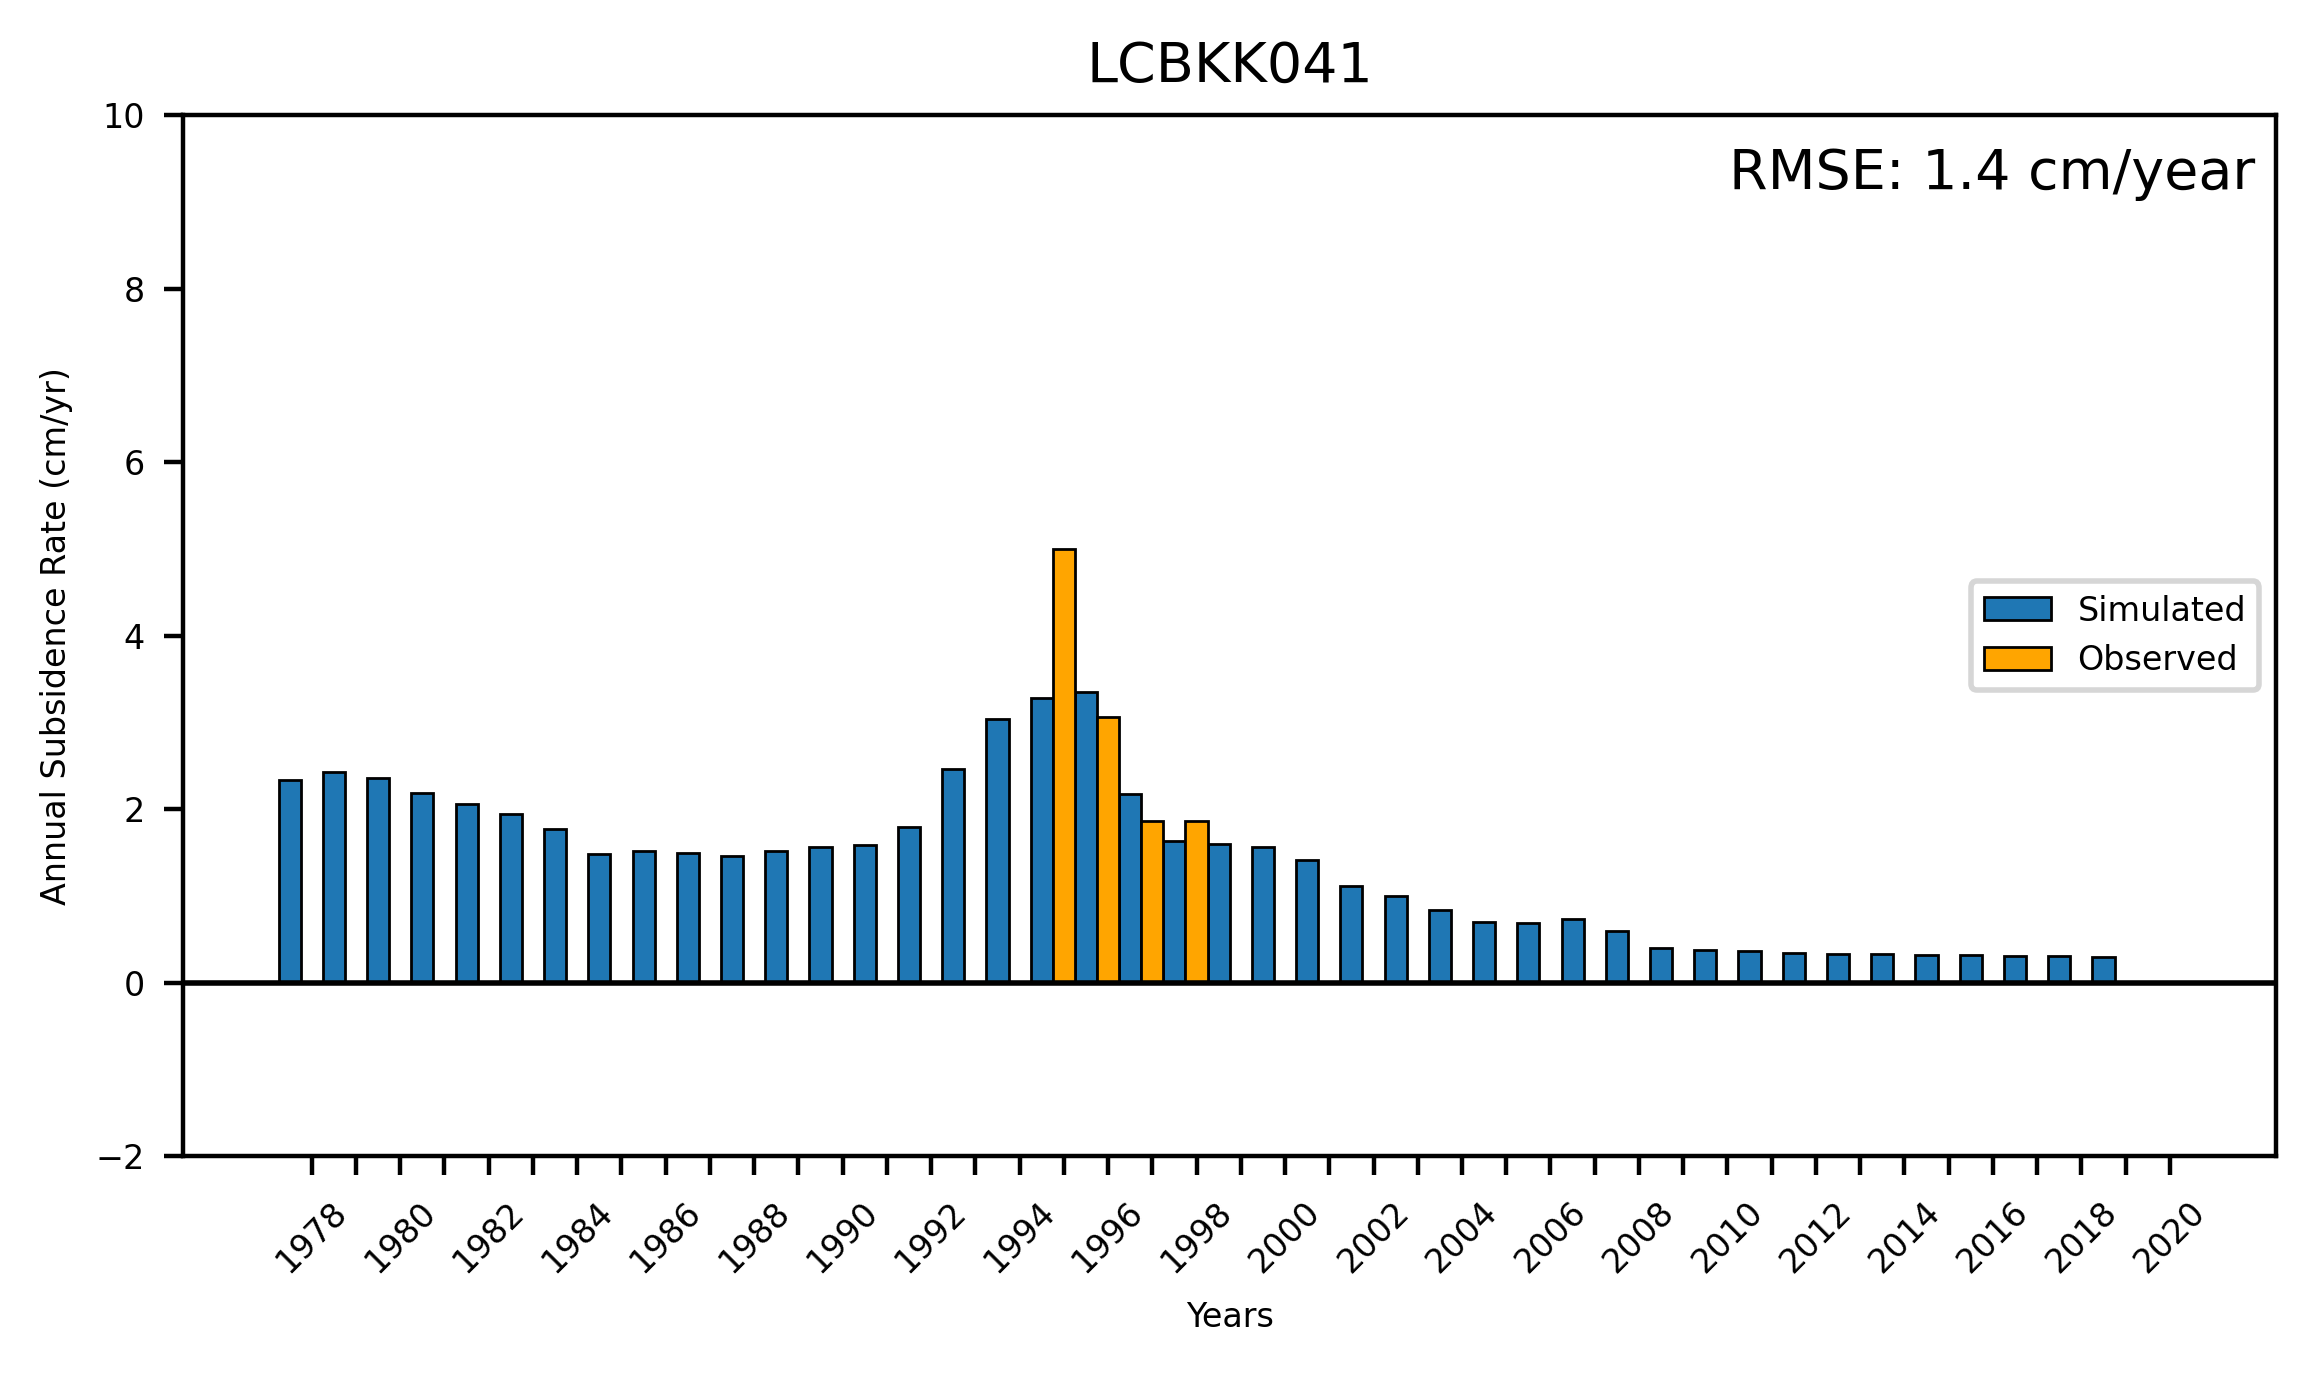

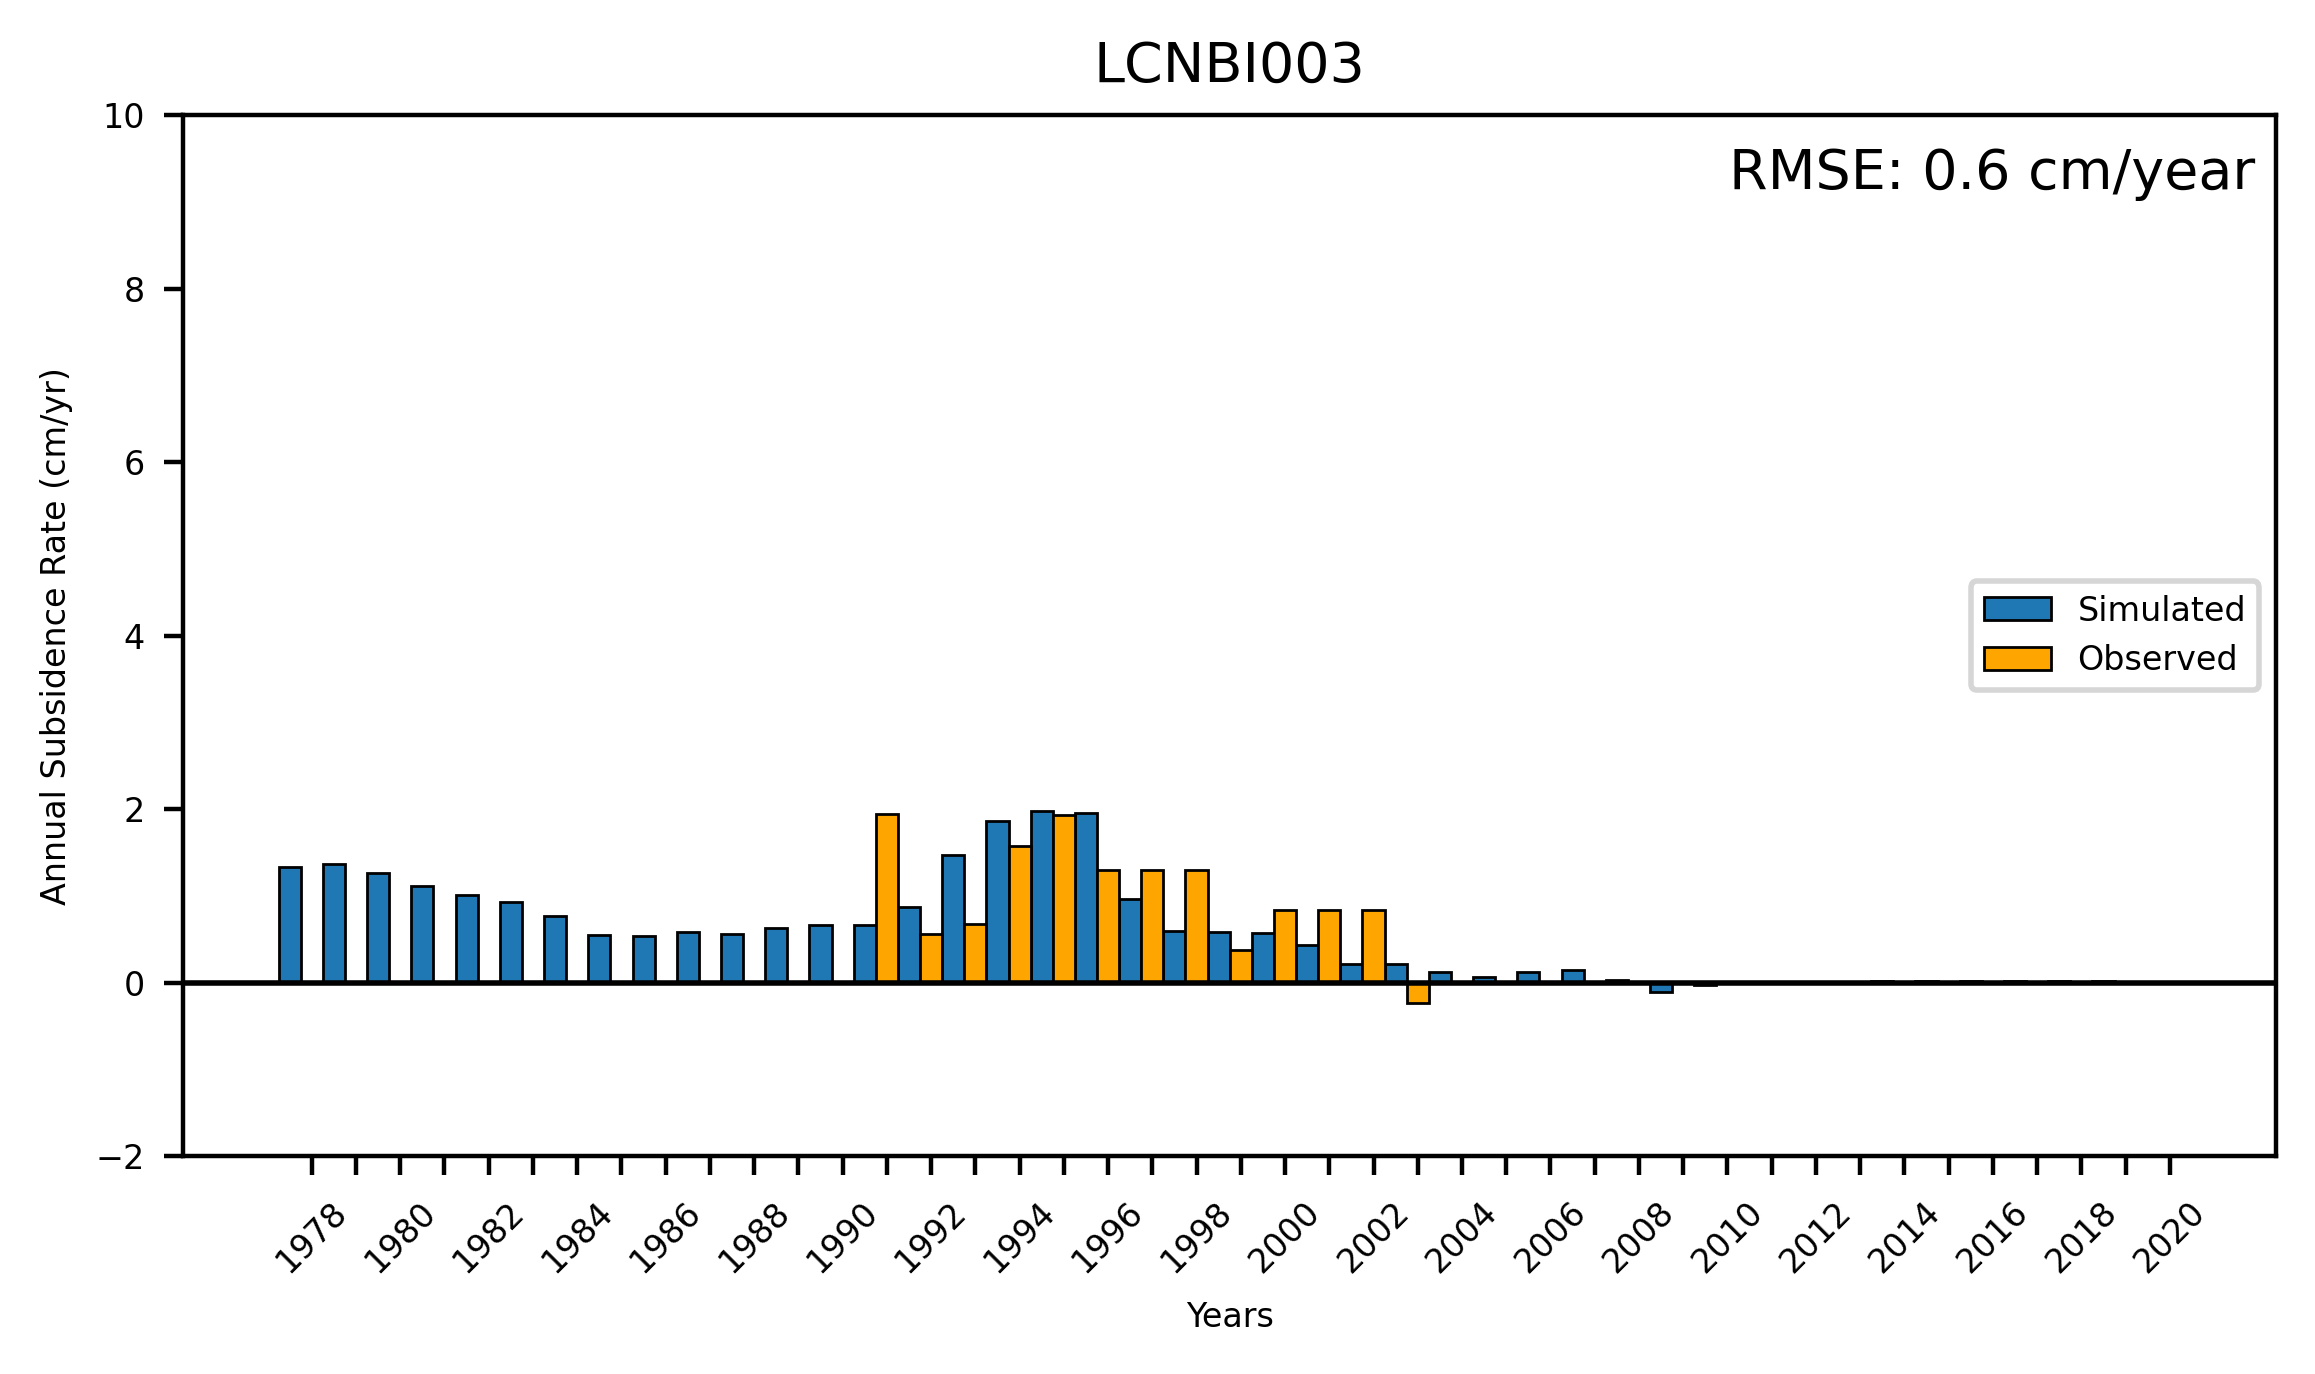

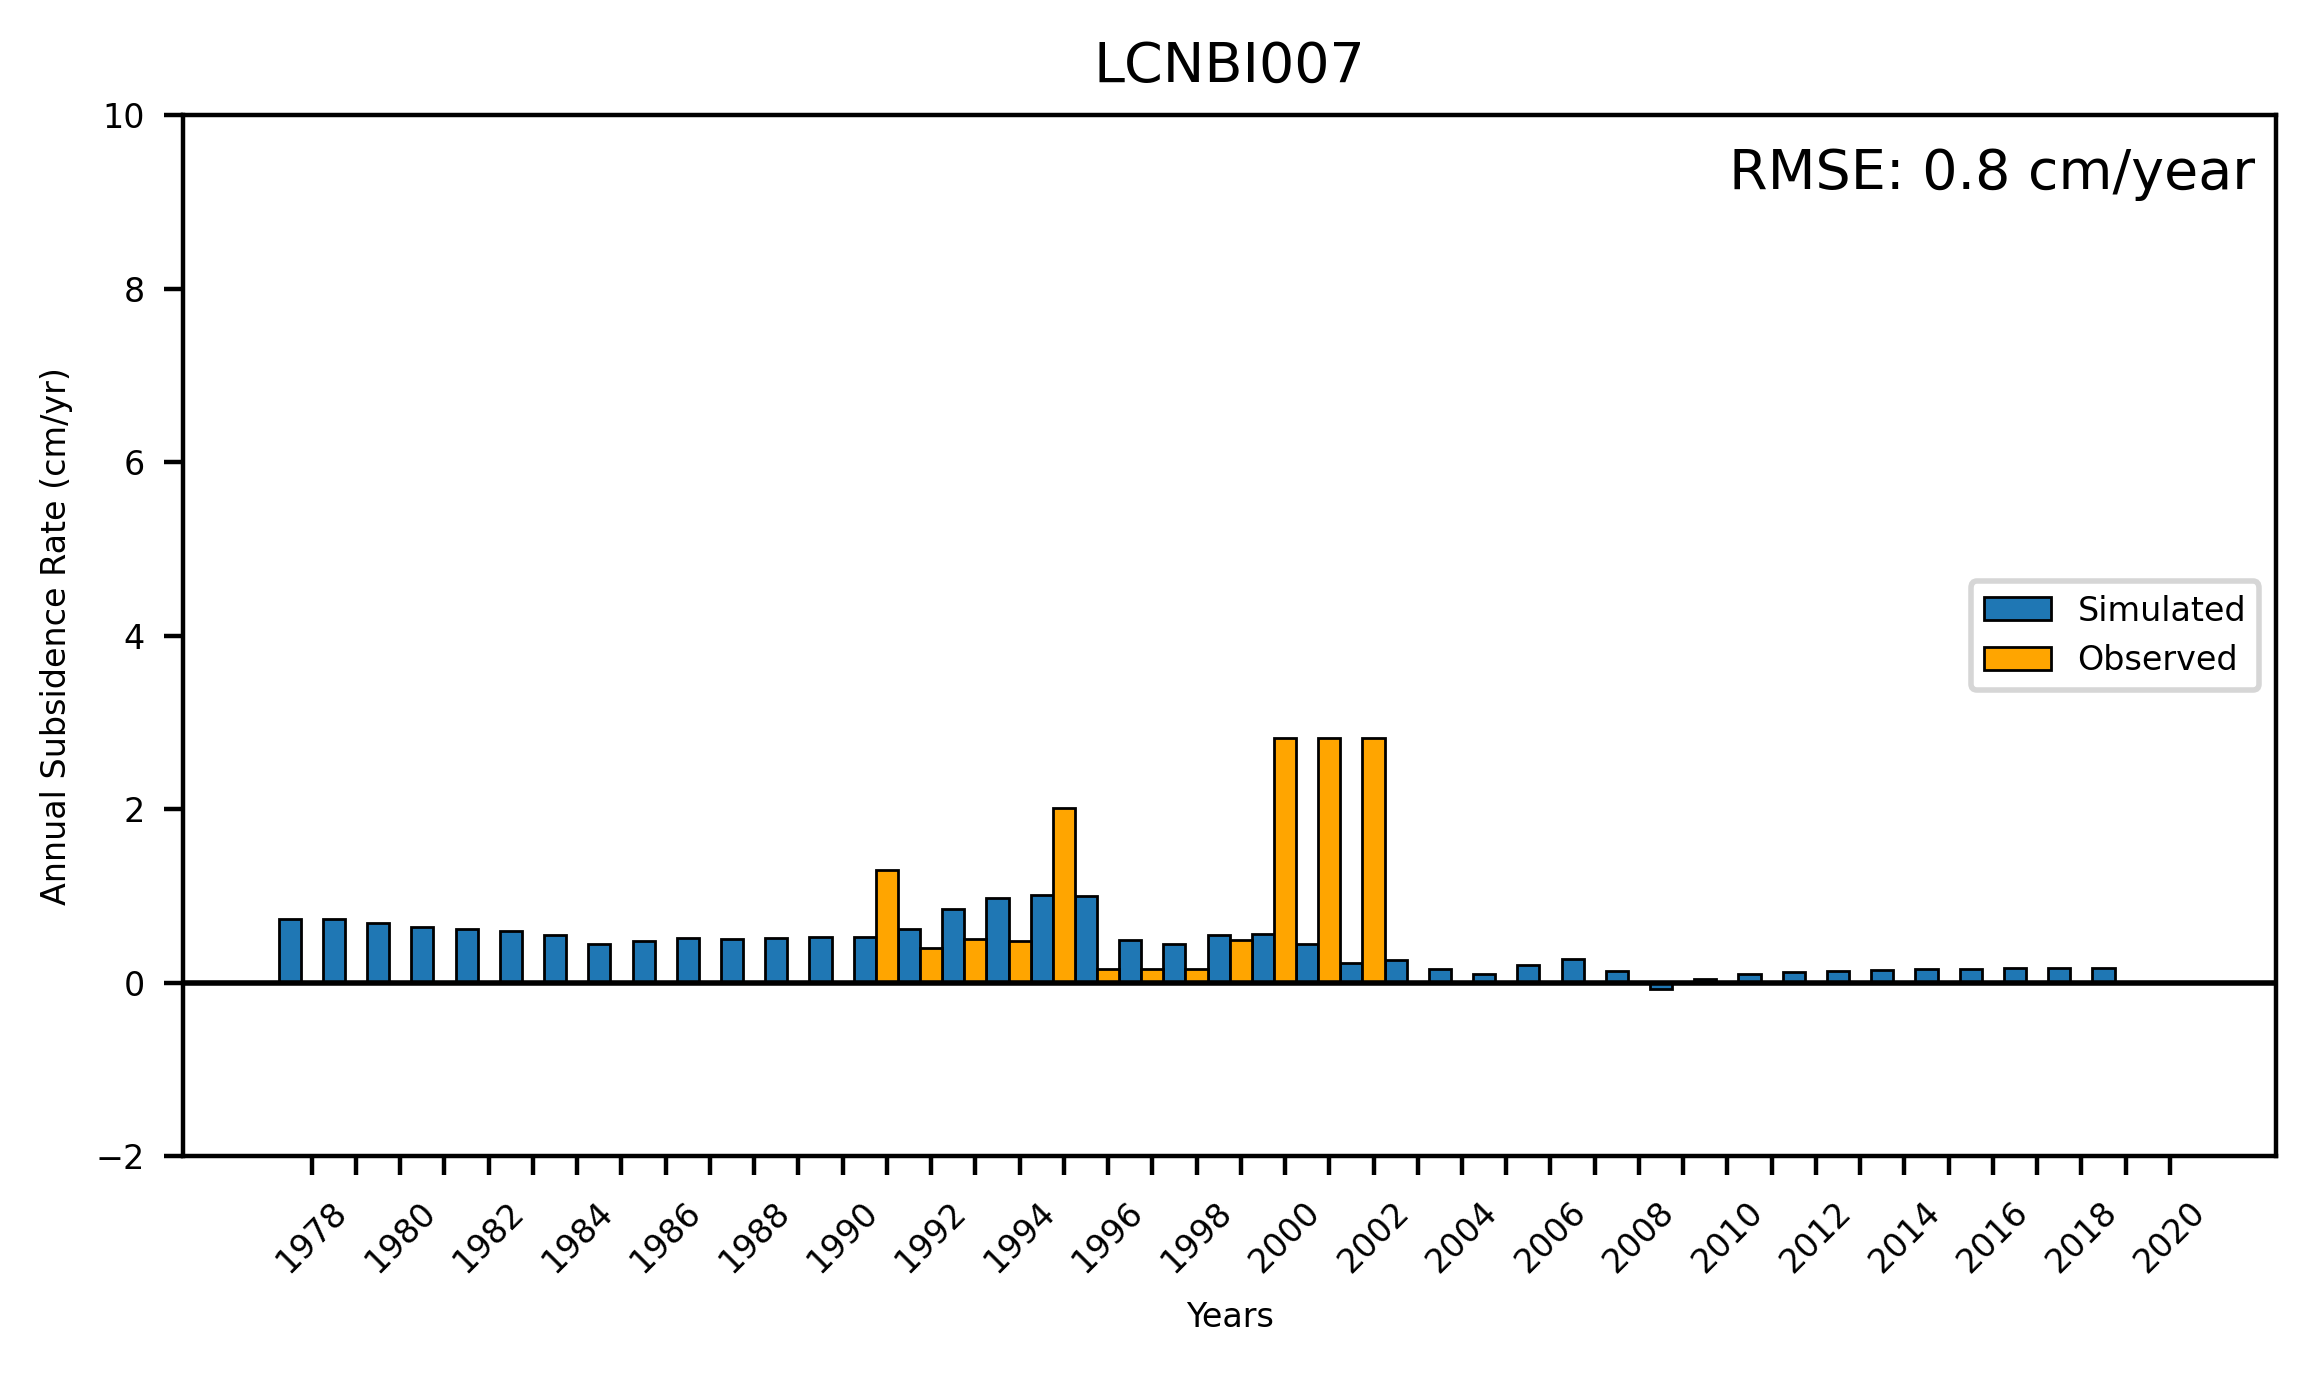

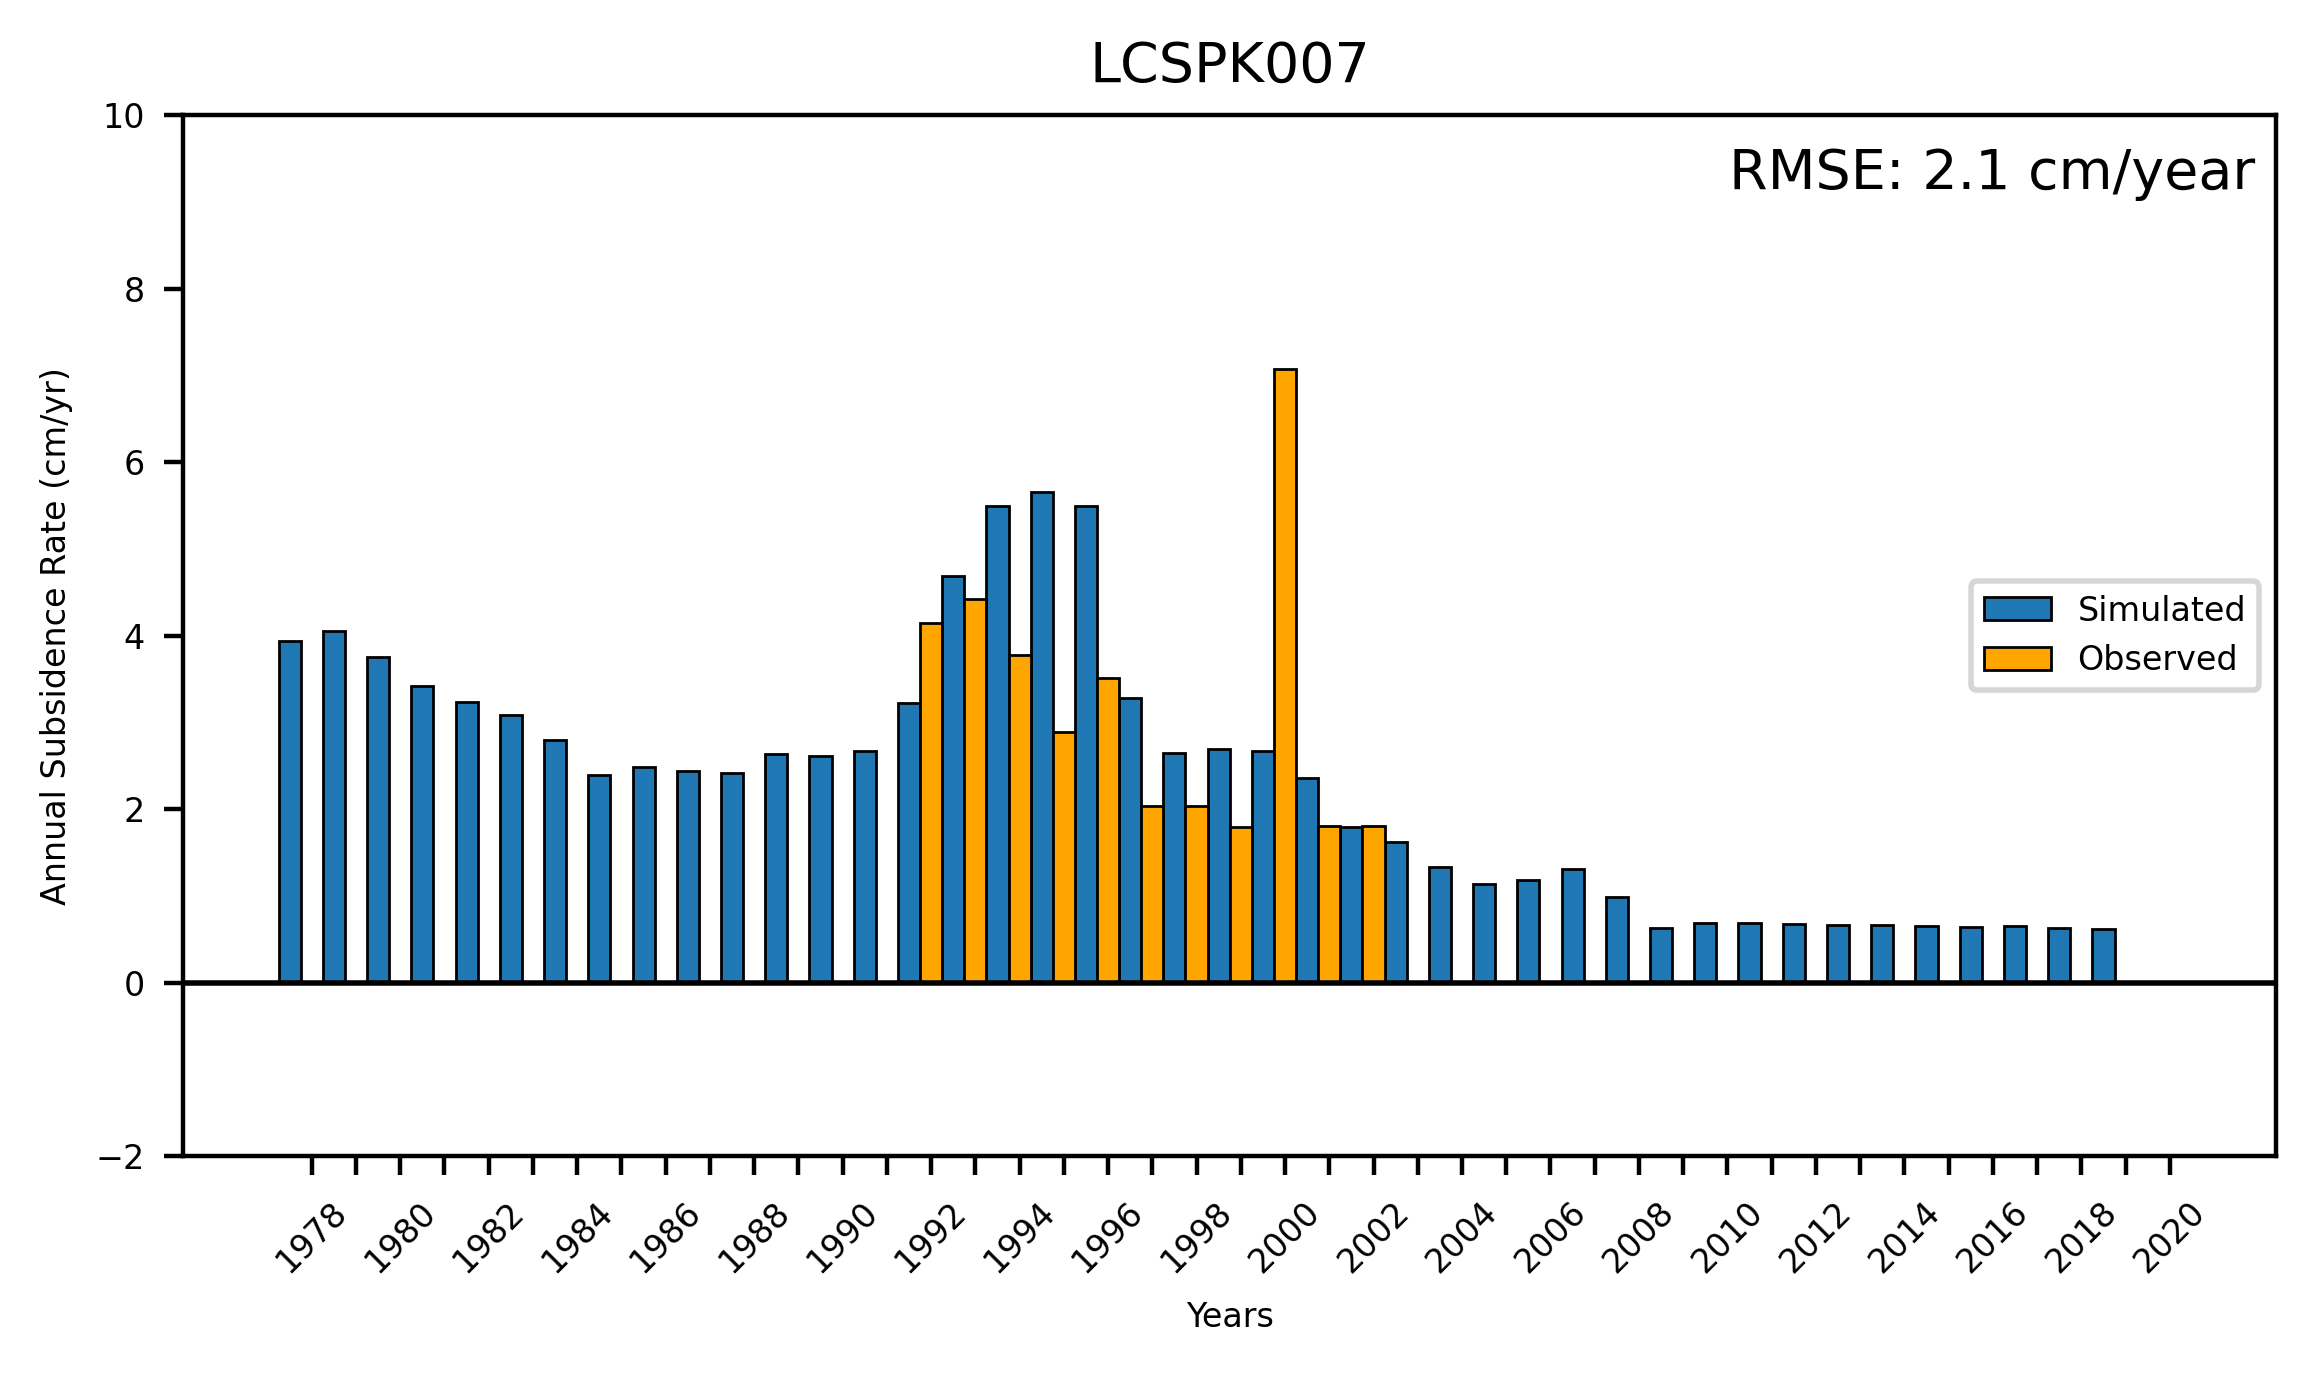

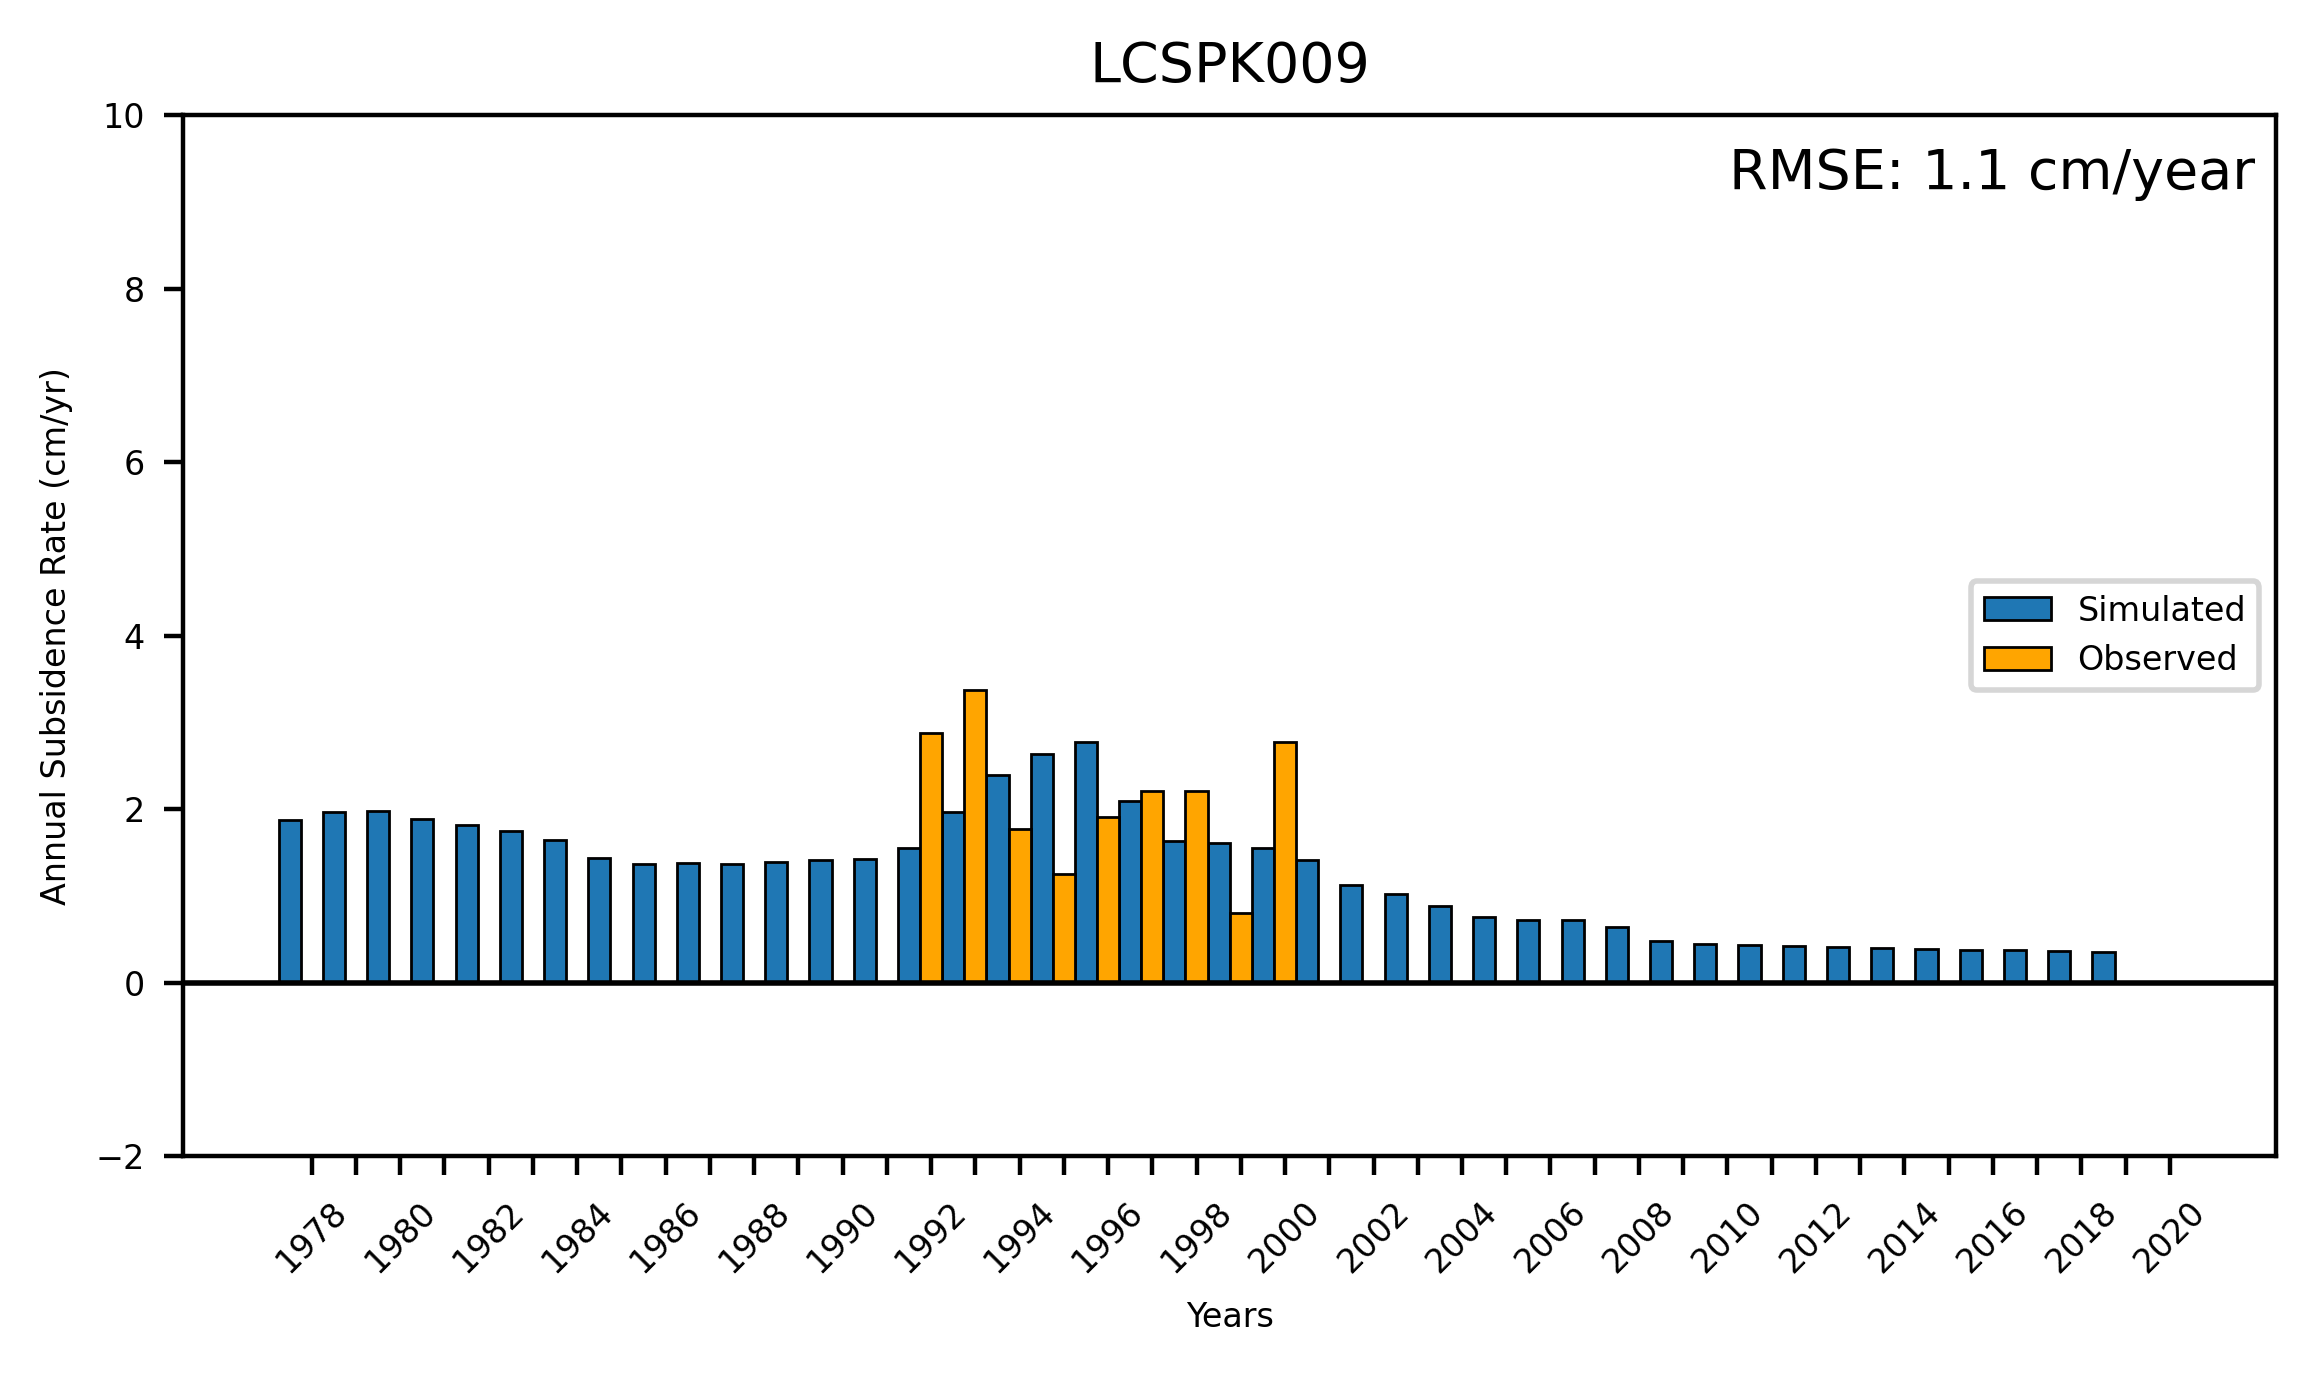

In [5]:
bkk_sub_gw.bkk_plotting.sub_bar(path, wellnestlist, all_results,
                                sub_total, subv_total, ann_sub,
                                tmin=tmin, tmax=tmax, save=0,
                                benchflag=1)

## Plots Results: Subsidence RMSE spatial map
Figure 11 in main paper

C:\Users\jtsoonthornran\BKKSubPastasModels\bkk_sub_gw\bkk_plotting.py:1154: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  map.scatter(x[cluster == 2], y[[cluster == 2]], zorder=3, marker="^",


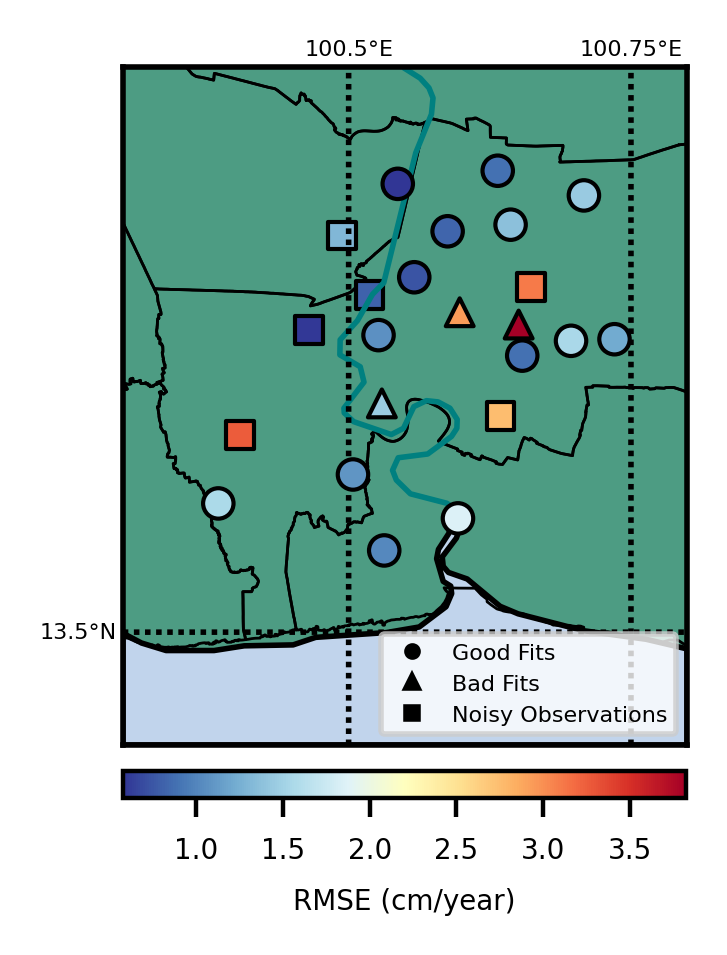

Avg: 1.57 cm/yr
Max: 3.82 cm/yr


In [6]:
bkk_sub_gw.bkk_plotting.sub_rmse_map(path, wellnestlist, all_results,
                                     sub_total, subv_total,
                                     ann_sub, tmin=tmin, tmax=tmax, save=0)

## Plots Results: Forecasts of cumulative subsidence (cm) for pumping scenarios
Supplemental Information 1.5

INFO: Time Series Head: 13 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK003_BK2_GW_1986_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 39 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK003_PD17_GW_1986_2011_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 43 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_after '

LCBKK003  Clay 1
LCBKK003  Clay 1 Initial Condition

LCBKK003  Clay 2
LCBKK003  Clay 2 Initial Condition

LCBKK003  Clay 3
LCBKK003  Clay 3 Initial Condition

LCBKK003  Clay 4


INFO: Time Series Head: 38 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK005_PD21_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK003  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 32 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK005_NL36_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 30 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK005_NB28_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK005  Clay 1
LCBKK005  Clay 1 Initial Condition

LCBKK005  Clay 2
LCBKK005  Clay 2 Initial Condition

LCBKK005  Clay 3
LCBKK005  Clay 3 Initial Condition

LCBKK005  Clay 4


INFO: Time Series Head: 18 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK006_BK_JS_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK005  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 18 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK006_PD20_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 15 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK006_NL35_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to

LCBKK006  Clay 1
LCBKK006  Clay 1 Initial Condition

LCBKK006  Clay 2
LCBKK006  Clay 2 Initial Condition

LCBKK006  Clay 3
LCBKK006  Clay 3 Initial Condition

LCBKK006  Clay 4


INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK007_PD25_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK006  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 8 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK007_NL39_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 8 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK007_NB32_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK007  Clay 1
LCBKK007  Clay 1 Initial Condition

LCBKK007  Clay 2
LCBKK007  Clay 2 Initial Condition

LCBKK007  Clay 3
LCBKK007  Clay 3 Initial Condition

LCBKK007  Clay 4
LCBKK007  Clay 4 Initial Condition



INFO: Time Series Head: 29 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK009_PD26_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK009_NB36_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK009  Clay 1
LCBKK009  Clay 1 Initial Condition

LCBKK009  Clay 2
LCBKK009  Clay 2 Initial Condition

LCBKK009  Clay 3
LCBKK009  Clay 3 Initial Condition

LCBKK009  Clay 4


INFO: Time Series Head: 130 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK011_BK3_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK009  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 134 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK011_PD27_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 95 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK011_NL42_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthorn

LCBKK011  Clay 1
LCBKK011  Clay 1 Initial Condition

LCBKK011  Clay 2
LCBKK011  Clay 2 Initial Condition

LCBKK011  Clay 3
LCBKK011  Clay 3 Initial Condition

LCBKK011  Clay 4


INFO: Time Series Head: 16 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK012_PD23_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK011  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 19 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK012_NL38_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 18 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK012_NB33_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK012  Clay 1
LCBKK012  Clay 1 Initial Condition

LCBKK012  Clay 2
LCBKK012  Clay 2 Initial Condition

LCBKK012  Clay 3
LCBKK012  Clay 3 Initial Condition

LCBKK012  Clay 4


INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK012  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NB38_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4


INFO: Time Series Head: 43 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.


LCBKK013  Clay 4 Initial Condition



INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK014_PD84_GW_1992_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 3 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK014_NL54_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 3 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK014_NB47_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INF

LCBKK014  Clay 1
LCBKK014  Clay 1 Initial Condition

LCBKK014  Clay 2
LCBKK014  Clay 2 Initial Condition

LCBKK014  Clay 3
LCBKK014  Clay 3 Initial Condition

LCBKK014  Clay 4


INFO: Time Series Head: 20 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK015_PD34_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK014  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 13 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK015_NL48_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 11 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK015_NB42_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK015  Clay 1
LCBKK015  Clay 1 Initial Condition

LCBKK015  Clay 2
LCBKK015  Clay 2 Initial Condition

LCBKK015  Clay 3
LCBKK015  Clay 3 Initial Condition

LCBKK015  Clay 4


INFO: Time Series Head: 9 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK016_NL58_GW_1989_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK015  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK016_NB54_GW_1989_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK016  Clay 1
LCBKK016  Clay 1 Initial Condition

LCBKK016  Clay 2
LCBKK016  Clay 2 Initial Condition

LCBKK016  Clay 3
LCBKK016  Clay 3 Initial Condition

LCBKK016  Clay 4


INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK018_PD82_GW_1992_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK016  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK018  Clay 1
LCBKK018  Clay 1 Initial Condition

LCBKK018  Clay 2
LCBKK018  Clay 2 Initial Condition

LCBKK018  Clay 3
LCBKK018  Clay 3 Initial Condition

LCBKK018  Clay 4


INFO: Time Series Head: 9 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK020_PD41_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK018  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 6 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK020_NL56_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK020_NB51_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK020  Clay 1
LCBKK020  Clay 1 Initial Condition

LCBKK020  Clay 2
LCBKK020  Clay 2 Initial Condition

LCBKK020  Clay 3
LCBKK020  Clay 3 Initial Condition

LCBKK020  Clay 4


INFO: Time Series Head: 14 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK021_PD36_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK020  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK021_NL52_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 9 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK021_NB45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK021  Clay 1
LCBKK021  Clay 1 Initial Condition

LCBKK021  Clay 2
LCBKK021  Clay 2 Initial Condition

LCBKK021  Clay 3
LCBKK021  Clay 3 Initial Condition

LCBKK021  Clay 4


INFO: Time Series Head: 144 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK026_PD62_GW_1991_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK021  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 33 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Pump was extended in the past to 1950-09-09 00:00:00 by adding 0.0 values.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK026_NL18_GW_1980_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 173 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK026_NB66_GW_1994_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in th

LCBKK026  Clay 1
LCBKK026  Clay 1 Initial Condition

LCBKK026  Clay 2
LCBKK026  Clay 2 Initial Condition

LCBKK026  Clay 3
LCBKK026  Clay 3 Initial Condition

LCBKK026  Clay 4


INFO: Time Series Head: 13 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK027_PD57_GW_1991_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK026  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 8 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK027_NL70_GW_1991_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK027_NB62_GW_1991_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK027  Clay 1
LCBKK027  Clay 1 Initial Condition

LCBKK027  Clay 2
LCBKK027  Clay 2 Initial Condition

LCBKK027  Clay 3
LCBKK027  Clay 3 Initial Condition

LCBKK027  Clay 4


INFO: Time Series Head: 55 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK036_BK_JICA8_GW_1997_2019_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK027  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 51 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK036_PD_JICA7_GW_1997_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 50 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK036_NL_JICA6_GW_1997_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the

LCBKK036  Clay 1
LCBKK036  Clay 1 Initial Condition

LCBKK036  Clay 2
LCBKK036  Clay 2 Initial Condition

LCBKK036  Clay 3
LCBKK036  Clay 3 Initial Condition

LCBKK036  Clay 4


INFO: Time Series Head: 139 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK038_BK1_GW_1994_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK036  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 117 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK038_PD26_009_GW_1989_2018_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 81 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK038_NL31_GW_19

LCBKK038  Clay 1
LCBKK038  Clay 1 Initial Condition

LCBKK038  Clay 2
LCBKK038  Clay 2 Initial Condition

LCBKK038  Clay 3
LCBKK038  Clay 3 Initial Condition

LCBKK038  Clay 4


INFO: Time Series Head: 175 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Pump was extended in the past to 1948-12-08 00:00:00 by adding 0.0 values.


LCBKK038  Clay 4 Initial Condition



INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK041_PD138_GW_1978_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 122 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Pump was extended in the past to 1948-12-08 00:00:00 by adding 0.0 values.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK041_NL140_GW_1978_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 114 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Pump was extended in the past to 1948-12-08 00:00:00 by adding 0.0 values.
INFO: Pastas Model from file C

LCBKK041  Clay 1
LCBKK041  Clay 1 Initial Condition

LCBKK041  Clay 2
LCBKK041  Clay 2 Initial Condition

LCBKK041  Clay 3
LCBKK041  Clay 3 Initial Condition

LCBKK041  Clay 4


INFO: Time Series Head: 37 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCNBI003_NL41_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK041  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 3 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCNBI003_NB24_GW_1986_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCNBI003  Clay 1
LCNBI003  Clay 1 Initial Condition

LCNBI003  Clay 2
LCNBI003  Clay 2 Initial Condition

LCNBI003  Clay 3
LCNBI003  Clay 3 Initial Condition

LCNBI003  Clay 4


INFO: Time Series Head: 19 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.


LCNBI003  Clay 4 Initial Condition



INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCNBI007_PD56_GW_1991_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 2 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCNBI007_NB63_GW_1990_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCNBI007  Clay 1
LCNBI007  Clay 1 Initial Condition

LCNBI007  Clay 2
LCNBI007  Clay 2 Initial Condition

LCNBI007  Clay 3
LCNBI007  Clay 3 Initial Condition

LCNBI007  Clay 4


INFO: Time Series Head: 12 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCSPK007_PD22_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCNBI007  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 3 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCSPK007_NB30_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCSPK007  Clay 1
LCSPK007  Clay 1 Initial Condition

LCSPK007  Clay 2
LCSPK007  Clay 2 Initial Condition

LCSPK007  Clay 3
LCSPK007  Clay 3 Initial Condition

LCSPK007  Clay 4


INFO: Time Series Head: 615 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCSPK009_NL67_GW_1989_2011_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCSPK007  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 614 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCSPK009_NB53_GW_1989_2011_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCSPK009  Clay 1
LCSPK009  Clay 1 Initial Condition

LCSPK009  Clay 2
LCSPK009  Clay 2 Initial Condition

LCSPK009  Clay 3
LCSPK009  Clay 3 Initial Condition

LCSPK009  Clay 4
LCSPK009  Clay 4 Initial Condition



INFO: Time Series Head: 13 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK003_BK2_GW_1986_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 39 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK003_PD17_GW_1986_2011_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 43 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_after '

LCBKK003  Clay 1
LCBKK003  Clay 1 Initial Condition

LCBKK003  Clay 2
LCBKK003  Clay 2 Initial Condition

LCBKK003  Clay 3
LCBKK003  Clay 3 Initial Condition

LCBKK003  Clay 4


INFO: Time Series Head: 38 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK005_PD21_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK003  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 32 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK005_NL36_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 30 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK005_NB28_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK005  Clay 1
LCBKK005  Clay 1 Initial Condition

LCBKK005  Clay 2
LCBKK005  Clay 2 Initial Condition

LCBKK005  Clay 3
LCBKK005  Clay 3 Initial Condition

LCBKK005  Clay 4


INFO: Time Series Head: 18 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK006_BK_JS_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK005  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 18 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK006_PD20_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 15 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK006_NL35_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to

LCBKK006  Clay 1
LCBKK006  Clay 1 Initial Condition

LCBKK006  Clay 2
LCBKK006  Clay 2 Initial Condition

LCBKK006  Clay 3
LCBKK006  Clay 3 Initial Condition

LCBKK006  Clay 4


INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK007_PD25_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK006  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 8 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK007_NL39_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 8 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK007_NB32_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK007  Clay 1
LCBKK007  Clay 1 Initial Condition

LCBKK007  Clay 2
LCBKK007  Clay 2 Initial Condition

LCBKK007  Clay 3
LCBKK007  Clay 3 Initial Condition

LCBKK007  Clay 4


INFO: Time Series Head: 29 nan-value(s) was/were found and filled with: drop.


LCBKK007  Clay 4 Initial Condition



INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK009_PD26_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK009_NB36_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK009  Clay 1
LCBKK009  Clay 1 Initial Condition

LCBKK009  Clay 2
LCBKK009  Clay 2 Initial Condition

LCBKK009  Clay 3
LCBKK009  Clay 3 Initial Condition

LCBKK009  Clay 4


INFO: Time Series Head: 130 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK011_BK3_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK009  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 134 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK011_PD27_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 95 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK011_NL42_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthorn

LCBKK011  Clay 1
LCBKK011  Clay 1 Initial Condition

LCBKK011  Clay 2
LCBKK011  Clay 2 Initial Condition

LCBKK011  Clay 3
LCBKK011  Clay 3 Initial Condition

LCBKK011  Clay 4


INFO: Time Series Head: 16 nan-value(s) was/were found and filled with: drop.


LCBKK011  Clay 4 Initial Condition



INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK012_PD23_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 19 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK012_NL38_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 18 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK012_NB33_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
I

LCBKK012  Clay 1
LCBKK012  Clay 1 Initial Condition

LCBKK012  Clay 2
LCBKK012  Clay 2 Initial Condition

LCBKK012  Clay 3
LCBKK012  Clay 3 Initial Condition

LCBKK012  Clay 4


INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK012  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NB38_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4


INFO: Time Series Head: 43 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK014_PD84_GW_1992_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK013  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 3 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK014_NL54_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 3 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK014_NB47_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK014  Clay 1
LCBKK014  Clay 1 Initial Condition

LCBKK014  Clay 2
LCBKK014  Clay 2 Initial Condition

LCBKK014  Clay 3
LCBKK014  Clay 3 Initial Condition

LCBKK014  Clay 4


INFO: Time Series Head: 20 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK015_PD34_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK014  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 13 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK015_NL48_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 11 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK015_NB42_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK015  Clay 1
LCBKK015  Clay 1 Initial Condition

LCBKK015  Clay 2
LCBKK015  Clay 2 Initial Condition

LCBKK015  Clay 3
LCBKK015  Clay 3 Initial Condition

LCBKK015  Clay 4


INFO: Time Series Head: 9 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK016_NL58_GW_1989_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK015  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK016_NB54_GW_1989_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK016  Clay 1
LCBKK016  Clay 1 Initial Condition

LCBKK016  Clay 2
LCBKK016  Clay 2 Initial Condition

LCBKK016  Clay 3
LCBKK016  Clay 3 Initial Condition

LCBKK016  Clay 4


INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK018_PD82_GW_1992_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK016  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK018  Clay 1
LCBKK018  Clay 1 Initial Condition

LCBKK018  Clay 2
LCBKK018  Clay 2 Initial Condition

LCBKK018  Clay 3
LCBKK018  Clay 3 Initial Condition

LCBKK018  Clay 4


INFO: Time Series Head: 9 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK020_PD41_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK018  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 6 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK020_NL56_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK020_NB51_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK020  Clay 1
LCBKK020  Clay 1 Initial Condition

LCBKK020  Clay 2
LCBKK020  Clay 2 Initial Condition

LCBKK020  Clay 3
LCBKK020  Clay 3 Initial Condition

LCBKK020  Clay 4


INFO: Time Series Head: 14 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK021_PD36_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK020  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK021_NL52_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 9 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK021_NB45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK021  Clay 1
LCBKK021  Clay 1 Initial Condition

LCBKK021  Clay 2
LCBKK021  Clay 2 Initial Condition

LCBKK021  Clay 3
LCBKK021  Clay 3 Initial Condition

LCBKK021  Clay 4


INFO: Time Series Head: 144 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.


LCBKK021  Clay 4 Initial Condition



INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK026_PD62_GW_1991_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 33 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Pump was extended in the past to 1950-09-09 00:00:00 by adding 0.0 values.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK026_NL18_GW_1980_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 173 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jts

LCBKK026  Clay 1
LCBKK026  Clay 1 Initial Condition

LCBKK026  Clay 2
LCBKK026  Clay 2 Initial Condition

LCBKK026  Clay 3
LCBKK026  Clay 3 Initial Condition

LCBKK026  Clay 4


INFO: Time Series Head: 13 nan-value(s) was/were found and filled with: drop.


LCBKK026  Clay 4 Initial Condition



INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK027_PD57_GW_1991_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 8 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK027_NL70_GW_1991_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK027_NB62_GW_1991_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INF

LCBKK027  Clay 1
LCBKK027  Clay 1 Initial Condition

LCBKK027  Clay 2
LCBKK027  Clay 2 Initial Condition

LCBKK027  Clay 3
LCBKK027  Clay 3 Initial Condition

LCBKK027  Clay 4


INFO: Time Series Head: 55 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported


LCBKK027  Clay 4 Initial Condition



INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK036_BK_JICA8_GW_1997_2019_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 51 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK036_PD_JICA7_GW_1997_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 50 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtso

LCBKK036  Clay 1
LCBKK036  Clay 1 Initial Condition

LCBKK036  Clay 2
LCBKK036  Clay 2 Initial Condition

LCBKK036  Clay 3
LCBKK036  Clay 3 Initial Condition

LCBKK036  Clay 4


INFO: Time Series Head: 139 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.


LCBKK036  Clay 4 Initial Condition



INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK038_BK1_GW_1994_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 117 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK038_PD26_009_GW_1989_2018_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 81 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for 

LCBKK038  Clay 1
LCBKK038  Clay 1 Initial Condition

LCBKK038  Clay 2
LCBKK038  Clay 2 Initial Condition

LCBKK038  Clay 3
LCBKK038  Clay 3 Initial Condition

LCBKK038  Clay 4


INFO: Time Series Head: 175 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Pump was extended in the past to 1948-12-08 00:00:00 by adding 0.0 values.


LCBKK038  Clay 4 Initial Condition



INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK041_PD138_GW_1978_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 122 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Pump was extended in the past to 1948-12-08 00:00:00 by adding 0.0 values.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK041_NL140_GW_1978_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 114 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Pump was extended in the past to 1948-12-08 00:00:00 by adding 0.0 values.
INFO: Pastas Model from file C

LCBKK041  Clay 1
LCBKK041  Clay 1 Initial Condition

LCBKK041  Clay 2
LCBKK041  Clay 2 Initial Condition

LCBKK041  Clay 3
LCBKK041  Clay 3 Initial Condition

LCBKK041  Clay 4


INFO: Time Series Head: 37 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.


LCBKK041  Clay 4 Initial Condition



INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCNBI003_NL41_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 3 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCNBI003_NB24_GW_1986_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCNBI003  Clay 1
LCNBI003  Clay 1 Initial Condition

LCNBI003  Clay 2
LCNBI003  Clay 2 Initial Condition

LCNBI003  Clay 3
LCNBI003  Clay 3 Initial Condition

LCNBI003  Clay 4


INFO: Time Series Head: 19 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCNBI007_PD56_GW_1991_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCNBI003  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 2 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCNBI007_NB63_GW_1990_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCNBI007  Clay 1
LCNBI007  Clay 1 Initial Condition

LCNBI007  Clay 2
LCNBI007  Clay 2 Initial Condition

LCNBI007  Clay 3
LCNBI007  Clay 3 Initial Condition

LCNBI007  Clay 4
LCNBI007  Clay 4 Initial Condition



INFO: Time Series Head: 12 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCSPK007_PD22_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 3 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCSPK007_NB30_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCSPK007  Clay 1
LCSPK007  Clay 1 Initial Condition

LCSPK007  Clay 2
LCSPK007  Clay 2 Initial Condition

LCSPK007  Clay 3
LCSPK007  Clay 3 Initial Condition

LCSPK007  Clay 4


INFO: Time Series Head: 615 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCSPK009_NL67_GW_1989_2011_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCSPK007  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 614 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCSPK009_NB53_GW_1989_2011_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCSPK009  Clay 1
LCSPK009  Clay 1 Initial Condition

LCSPK009  Clay 2
LCSPK009  Clay 2 Initial Condition

LCSPK009  Clay 3
LCSPK009  Clay 3 Initial Condition

LCSPK009  Clay 4
LCSPK009  Clay 4 Initial Condition



INFO: Time Series Head: 13 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK003_BK2_GW_1986_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 39 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK003_PD17_GW_1986_2011_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 43 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_after '

LCBKK003  Clay 1
LCBKK003  Clay 1 Initial Condition

LCBKK003  Clay 2
LCBKK003  Clay 2 Initial Condition

LCBKK003  Clay 3
LCBKK003  Clay 3 Initial Condition

LCBKK003  Clay 4


INFO: Time Series Head: 38 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK005_PD21_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK003  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 32 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK005_NL36_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 30 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK005_NB28_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK005  Clay 1
LCBKK005  Clay 1 Initial Condition

LCBKK005  Clay 2
LCBKK005  Clay 2 Initial Condition

LCBKK005  Clay 3
LCBKK005  Clay 3 Initial Condition

LCBKK005  Clay 4


INFO: Time Series Head: 18 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.


LCBKK005  Clay 4 Initial Condition



INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK006_BK_JS_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 18 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK006_PD20_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 15 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthorn

LCBKK006  Clay 1
LCBKK006  Clay 1 Initial Condition

LCBKK006  Clay 2
LCBKK006  Clay 2 Initial Condition

LCBKK006  Clay 3
LCBKK006  Clay 3 Initial Condition

LCBKK006  Clay 4


INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK007_PD25_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK006  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 8 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK007_NL39_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 8 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK007_NB32_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK007  Clay 1
LCBKK007  Clay 1 Initial Condition

LCBKK007  Clay 2
LCBKK007  Clay 2 Initial Condition

LCBKK007  Clay 3
LCBKK007  Clay 3 Initial Condition

LCBKK007  Clay 4


INFO: Time Series Head: 29 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK009_PD26_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK007  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK009_NB36_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK009  Clay 1
LCBKK009  Clay 1 Initial Condition

LCBKK009  Clay 2
LCBKK009  Clay 2 Initial Condition

LCBKK009  Clay 3
LCBKK009  Clay 3 Initial Condition

LCBKK009  Clay 4


INFO: Time Series Head: 130 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK011_BK3_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK009  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 134 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK011_PD27_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 95 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK011_NL42_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthorn

LCBKK011  Clay 1
LCBKK011  Clay 1 Initial Condition

LCBKK011  Clay 2
LCBKK011  Clay 2 Initial Condition

LCBKK011  Clay 3
LCBKK011  Clay 3 Initial Condition

LCBKK011  Clay 4


INFO: Time Series Head: 16 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK012_PD23_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK011  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 19 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK012_NL38_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 18 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK012_NB33_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK012  Clay 1
LCBKK012  Clay 1 Initial Condition

LCBKK012  Clay 2
LCBKK012  Clay 2 Initial Condition

LCBKK012  Clay 3
LCBKK012  Clay 3 Initial Condition

LCBKK012  Clay 4


INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK012  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NB38_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4


INFO: Time Series Head: 43 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK014_PD84_GW_1992_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK013  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 3 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK014_NL54_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 3 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK014_NB47_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK014  Clay 1
LCBKK014  Clay 1 Initial Condition

LCBKK014  Clay 2
LCBKK014  Clay 2 Initial Condition

LCBKK014  Clay 3
LCBKK014  Clay 3 Initial Condition

LCBKK014  Clay 4


INFO: Time Series Head: 20 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.


LCBKK014  Clay 4 Initial Condition



INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK015_PD34_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 13 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK015_NL48_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 11 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK015_NB42_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
I

LCBKK015  Clay 1
LCBKK015  Clay 1 Initial Condition

LCBKK015  Clay 2
LCBKK015  Clay 2 Initial Condition

LCBKK015  Clay 3
LCBKK015  Clay 3 Initial Condition

LCBKK015  Clay 4


INFO: Time Series Head: 9 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK016_NL58_GW_1989_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK015  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK016_NB54_GW_1989_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK016  Clay 1
LCBKK016  Clay 1 Initial Condition

LCBKK016  Clay 2
LCBKK016  Clay 2 Initial Condition

LCBKK016  Clay 3
LCBKK016  Clay 3 Initial Condition

LCBKK016  Clay 4


INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK018_PD82_GW_1992_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK016  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK018  Clay 1
LCBKK018  Clay 1 Initial Condition

LCBKK018  Clay 2
LCBKK018  Clay 2 Initial Condition

LCBKK018  Clay 3
LCBKK018  Clay 3 Initial Condition

LCBKK018  Clay 4


INFO: Time Series Head: 9 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK020_PD41_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK018  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 6 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK020_NL56_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK020_NB51_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK020  Clay 1
LCBKK020  Clay 1 Initial Condition

LCBKK020  Clay 2
LCBKK020  Clay 2 Initial Condition

LCBKK020  Clay 3
LCBKK020  Clay 3 Initial Condition

LCBKK020  Clay 4


INFO: Time Series Head: 14 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK021_PD36_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK020  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK021_NL52_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 9 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK021_NB45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK021  Clay 1
LCBKK021  Clay 1 Initial Condition

LCBKK021  Clay 2
LCBKK021  Clay 2 Initial Condition

LCBKK021  Clay 3
LCBKK021  Clay 3 Initial Condition

LCBKK021  Clay 4


INFO: Time Series Head: 144 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK026_PD62_GW_1991_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK021  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 33 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Pump was extended in the past to 1950-09-09 00:00:00 by adding 0.0 values.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK026_NL18_GW_1980_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 173 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK026_NB66_GW_1994_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in th

LCBKK026  Clay 1
LCBKK026  Clay 1 Initial Condition

LCBKK026  Clay 2
LCBKK026  Clay 2 Initial Condition

LCBKK026  Clay 3
LCBKK026  Clay 3 Initial Condition

LCBKK026  Clay 4


INFO: Time Series Head: 13 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK027_PD57_GW_1991_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK026  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 8 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK027_NL70_GW_1991_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK027_NB62_GW_1991_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK027  Clay 1
LCBKK027  Clay 1 Initial Condition

LCBKK027  Clay 2
LCBKK027  Clay 2 Initial Condition

LCBKK027  Clay 3
LCBKK027  Clay 3 Initial Condition

LCBKK027  Clay 4


INFO: Time Series Head: 55 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported


LCBKK027  Clay 4 Initial Condition



INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK036_BK_JICA8_GW_1997_2019_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 51 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK036_PD_JICA7_GW_1997_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 50 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtso

LCBKK036  Clay 1
LCBKK036  Clay 1 Initial Condition

LCBKK036  Clay 2
LCBKK036  Clay 2 Initial Condition

LCBKK036  Clay 3
LCBKK036  Clay 3 Initial Condition

LCBKK036  Clay 4


INFO: Time Series Head: 139 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK038_BK1_GW_1994_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK036  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 117 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK038_PD26_009_GW_1989_2018_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 81 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK038_NL31_GW_19

LCBKK038  Clay 1
LCBKK038  Clay 1 Initial Condition

LCBKK038  Clay 2
LCBKK038  Clay 2 Initial Condition

LCBKK038  Clay 3
LCBKK038  Clay 3 Initial Condition

LCBKK038  Clay 4


INFO: Time Series Head: 175 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Pump was extended in the past to 1948-12-08 00:00:00 by adding 0.0 values.


LCBKK038  Clay 4 Initial Condition



INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK041_PD138_GW_1978_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 122 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Pump was extended in the past to 1948-12-08 00:00:00 by adding 0.0 values.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK041_NL140_GW_1978_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 114 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Pump was extended in the past to 1948-12-08 00:00:00 by adding 0.0 values.
INFO: Pastas Model from file C

LCBKK041  Clay 1
LCBKK041  Clay 1 Initial Condition

LCBKK041  Clay 2
LCBKK041  Clay 2 Initial Condition

LCBKK041  Clay 3
LCBKK041  Clay 3 Initial Condition

LCBKK041  Clay 4


INFO: Time Series Head: 37 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.


LCBKK041  Clay 4 Initial Condition



INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCNBI003_NL41_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 3 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCNBI003_NB24_GW_1986_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCNBI003  Clay 1
LCNBI003  Clay 1 Initial Condition

LCNBI003  Clay 2
LCNBI003  Clay 2 Initial Condition

LCNBI003  Clay 3
LCNBI003  Clay 3 Initial Condition

LCNBI003  Clay 4


INFO: Time Series Head: 19 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.


LCNBI003  Clay 4 Initial Condition



INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCNBI007_PD56_GW_1991_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 2 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCNBI007_NB63_GW_1990_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCNBI007  Clay 1
LCNBI007  Clay 1 Initial Condition

LCNBI007  Clay 2
LCNBI007  Clay 2 Initial Condition

LCNBI007  Clay 3
LCNBI007  Clay 3 Initial Condition

LCNBI007  Clay 4


INFO: Time Series Head: 12 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCSPK007_PD22_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCNBI007  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 3 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCSPK007_NB30_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCSPK007  Clay 1
LCSPK007  Clay 1 Initial Condition

LCSPK007  Clay 2
LCSPK007  Clay 2 Initial Condition

LCSPK007  Clay 3
LCSPK007  Clay 3 Initial Condition

LCSPK007  Clay 4


INFO: Time Series Head: 615 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCSPK009_NL67_GW_1989_2011_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCSPK007  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 614 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCSPK009_NB53_GW_1989_2011_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCSPK009  Clay 1
LCSPK009  Clay 1 Initial Condition

LCSPK009  Clay 2
LCSPK009  Clay 2 Initial Condition

LCSPK009  Clay 3
LCSPK009  Clay 3 Initial Condition

LCSPK009  Clay 4
LCSPK009  Clay 4 Initial Condition



INFO: Time Series Head: 13 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK003_BK2_GW_1986_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 39 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK003_PD17_GW_1986_2011_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 43 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_after '

LCBKK003  Clay 1
LCBKK003  Clay 1 Initial Condition

LCBKK003  Clay 2
LCBKK003  Clay 2 Initial Condition

LCBKK003  Clay 3
LCBKK003  Clay 3 Initial Condition

LCBKK003  Clay 4


INFO: Time Series Head: 38 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK005_PD21_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK003  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 32 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK005_NL36_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 30 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK005_NB28_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK005  Clay 1
LCBKK005  Clay 1 Initial Condition

LCBKK005  Clay 2
LCBKK005  Clay 2 Initial Condition

LCBKK005  Clay 3
LCBKK005  Clay 3 Initial Condition

LCBKK005  Clay 4


INFO: Time Series Head: 18 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK006_BK_JS_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK005  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 18 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK006_PD20_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 15 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK006_NL35_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to

LCBKK006  Clay 1
LCBKK006  Clay 1 Initial Condition

LCBKK006  Clay 2
LCBKK006  Clay 2 Initial Condition

LCBKK006  Clay 3
LCBKK006  Clay 3 Initial Condition

LCBKK006  Clay 4


INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK007_PD25_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK006  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 8 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK007_NL39_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 8 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK007_NB32_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK007  Clay 1
LCBKK007  Clay 1 Initial Condition

LCBKK007  Clay 2
LCBKK007  Clay 2 Initial Condition

LCBKK007  Clay 3
LCBKK007  Clay 3 Initial Condition

LCBKK007  Clay 4


INFO: Time Series Head: 29 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK009_PD26_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK007  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK009_NB36_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK009  Clay 1
LCBKK009  Clay 1 Initial Condition

LCBKK009  Clay 2
LCBKK009  Clay 2 Initial Condition

LCBKK009  Clay 3
LCBKK009  Clay 3 Initial Condition

LCBKK009  Clay 4


INFO: Time Series Head: 130 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK011_BK3_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK009  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 134 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK011_PD27_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 95 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK011_NL42_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthorn

LCBKK011  Clay 1
LCBKK011  Clay 1 Initial Condition

LCBKK011  Clay 2
LCBKK011  Clay 2 Initial Condition

LCBKK011  Clay 3
LCBKK011  Clay 3 Initial Condition

LCBKK011  Clay 4


INFO: Time Series Head: 16 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK012_PD23_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK011  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 19 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK012_NL38_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 18 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK012_NB33_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK012  Clay 1
LCBKK012  Clay 1 Initial Condition

LCBKK012  Clay 2
LCBKK012  Clay 2 Initial Condition

LCBKK012  Clay 3
LCBKK012  Clay 3 Initial Condition

LCBKK012  Clay 4


INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK012  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NB38_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4


INFO: Time Series Head: 43 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK014_PD84_GW_1992_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK013  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 3 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK014_NL54_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 3 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK014_NB47_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK014  Clay 1
LCBKK014  Clay 1 Initial Condition

LCBKK014  Clay 2
LCBKK014  Clay 2 Initial Condition

LCBKK014  Clay 3
LCBKK014  Clay 3 Initial Condition

LCBKK014  Clay 4


INFO: Time Series Head: 20 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK015_PD34_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK014  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 13 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK015_NL48_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 11 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK015_NB42_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK015  Clay 1
LCBKK015  Clay 1 Initial Condition

LCBKK015  Clay 2
LCBKK015  Clay 2 Initial Condition

LCBKK015  Clay 3
LCBKK015  Clay 3 Initial Condition

LCBKK015  Clay 4


INFO: Time Series Head: 9 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK016_NL58_GW_1989_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK015  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK016_NB54_GW_1989_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK016  Clay 1
LCBKK016  Clay 1 Initial Condition

LCBKK016  Clay 2
LCBKK016  Clay 2 Initial Condition

LCBKK016  Clay 3
LCBKK016  Clay 3 Initial Condition

LCBKK016  Clay 4


INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK018_PD82_GW_1992_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK016  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK018  Clay 1
LCBKK018  Clay 1 Initial Condition

LCBKK018  Clay 2
LCBKK018  Clay 2 Initial Condition

LCBKK018  Clay 3
LCBKK018  Clay 3 Initial Condition

LCBKK018  Clay 4


INFO: Time Series Head: 9 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK020_PD41_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK018  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 6 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK020_NL56_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK020_NB51_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK020  Clay 1
LCBKK020  Clay 1 Initial Condition

LCBKK020  Clay 2
LCBKK020  Clay 2 Initial Condition

LCBKK020  Clay 3
LCBKK020  Clay 3 Initial Condition

LCBKK020  Clay 4


INFO: Time Series Head: 14 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK021_PD36_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK020  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK021_NL52_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 9 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK021_NB45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK021  Clay 1
LCBKK021  Clay 1 Initial Condition

LCBKK021  Clay 2
LCBKK021  Clay 2 Initial Condition

LCBKK021  Clay 3
LCBKK021  Clay 3 Initial Condition

LCBKK021  Clay 4


INFO: Time Series Head: 144 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK026_PD62_GW_1991_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK021  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 33 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Pump was extended in the past to 1950-09-09 00:00:00 by adding 0.0 values.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK026_NL18_GW_1980_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 173 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK026_NB66_GW_1994_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in th

LCBKK026  Clay 1
LCBKK026  Clay 1 Initial Condition

LCBKK026  Clay 2
LCBKK026  Clay 2 Initial Condition

LCBKK026  Clay 3
LCBKK026  Clay 3 Initial Condition

LCBKK026  Clay 4


INFO: Time Series Head: 13 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK027_PD57_GW_1991_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK026  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 8 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK027_NL70_GW_1991_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK027_NB62_GW_1991_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK027  Clay 1
LCBKK027  Clay 1 Initial Condition

LCBKK027  Clay 2
LCBKK027  Clay 2 Initial Condition

LCBKK027  Clay 3
LCBKK027  Clay 3 Initial Condition

LCBKK027  Clay 4


INFO: Time Series Head: 55 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported


LCBKK027  Clay 4 Initial Condition



INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK036_BK_JICA8_GW_1997_2019_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 51 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK036_PD_JICA7_GW_1997_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 50 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtso

LCBKK036  Clay 1
LCBKK036  Clay 1 Initial Condition

LCBKK036  Clay 2
LCBKK036  Clay 2 Initial Condition

LCBKK036  Clay 3
LCBKK036  Clay 3 Initial Condition

LCBKK036  Clay 4


INFO: Time Series Head: 139 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK038_BK1_GW_1994_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK036  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 117 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK038_PD26_009_GW_1989_2018_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 81 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK038_NL31_GW_19

LCBKK038  Clay 1
LCBKK038  Clay 1 Initial Condition

LCBKK038  Clay 2
LCBKK038  Clay 2 Initial Condition

LCBKK038  Clay 3
LCBKK038  Clay 3 Initial Condition

LCBKK038  Clay 4


INFO: Time Series Head: 175 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Pump was extended in the past to 1948-12-08 00:00:00 by adding 0.0 values.


LCBKK038  Clay 4 Initial Condition



INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK041_PD138_GW_1978_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 122 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Pump was extended in the past to 1948-12-08 00:00:00 by adding 0.0 values.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK041_NL140_GW_1978_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 114 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Pump was extended in the past to 1948-12-08 00:00:00 by adding 0.0 values.
INFO: Pastas Model from file C

LCBKK041  Clay 1
LCBKK041  Clay 1 Initial Condition

LCBKK041  Clay 2
LCBKK041  Clay 2 Initial Condition

LCBKK041  Clay 3
LCBKK041  Clay 3 Initial Condition

LCBKK041  Clay 4


INFO: Time Series Head: 37 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCNBI003_NL41_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK041  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 3 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCNBI003_NB24_GW_1986_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCNBI003  Clay 1
LCNBI003  Clay 1 Initial Condition

LCNBI003  Clay 2
LCNBI003  Clay 2 Initial Condition

LCNBI003  Clay 3
LCNBI003  Clay 3 Initial Condition

LCNBI003  Clay 4


INFO: Time Series Head: 19 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCNBI007_PD56_GW_1991_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCNBI003  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 2 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCNBI007_NB63_GW_1990_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCNBI007  Clay 1
LCNBI007  Clay 1 Initial Condition

LCNBI007  Clay 2
LCNBI007  Clay 2 Initial Condition

LCNBI007  Clay 3
LCNBI007  Clay 3 Initial Condition

LCNBI007  Clay 4


INFO: Time Series Head: 12 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCSPK007_PD22_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCNBI007  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 3 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCSPK007_NB30_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCSPK007  Clay 1
LCSPK007  Clay 1 Initial Condition

LCSPK007  Clay 2
LCSPK007  Clay 2 Initial Condition

LCSPK007  Clay 3
LCSPK007  Clay 3 Initial Condition

LCSPK007  Clay 4


INFO: Time Series Head: 615 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported


LCSPK007  Clay 4 Initial Condition



INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCSPK009_NL67_GW_1989_2011_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 614 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCSPK009_NB53_GW_1989_2011_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCSPK009  Clay 1
LCSPK009  Clay 1 Initial Condition

LCSPK009  Clay 2
LCSPK009  Clay 2 Initial Condition

LCSPK009  Clay 3
LCSPK009  Clay 3 Initial Condition

LCSPK009  Clay 4
LCSPK009  Clay 4 Initial Condition



INFO: Time Series Head: 13 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK003_BK2_GW_1986_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 39 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK003_PD17_GW_1986_2011_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 43 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_after '

LCBKK003  Clay 1
LCBKK003  Clay 1 Initial Condition

LCBKK003  Clay 2
LCBKK003  Clay 2 Initial Condition

LCBKK003  Clay 3
LCBKK003  Clay 3 Initial Condition

LCBKK003  Clay 4


INFO: Time Series Head: 38 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK005_PD21_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK003  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 32 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK005_NL36_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 30 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK005_NB28_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK005  Clay 1
LCBKK005  Clay 1 Initial Condition

LCBKK005  Clay 2
LCBKK005  Clay 2 Initial Condition

LCBKK005  Clay 3
LCBKK005  Clay 3 Initial Condition

LCBKK005  Clay 4


INFO: Time Series Head: 18 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK006_BK_JS_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK005  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 18 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK006_PD20_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 15 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK006_NL35_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to

LCBKK006  Clay 1
LCBKK006  Clay 1 Initial Condition

LCBKK006  Clay 2
LCBKK006  Clay 2 Initial Condition

LCBKK006  Clay 3
LCBKK006  Clay 3 Initial Condition

LCBKK006  Clay 4


INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK007_PD25_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK006  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 8 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK007_NL39_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 8 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK007_NB32_GW_1988_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK007  Clay 1
LCBKK007  Clay 1 Initial Condition

LCBKK007  Clay 2
LCBKK007  Clay 2 Initial Condition

LCBKK007  Clay 3
LCBKK007  Clay 3 Initial Condition

LCBKK007  Clay 4


INFO: Time Series Head: 29 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK009_PD26_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK007  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK009_NB36_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK009  Clay 1
LCBKK009  Clay 1 Initial Condition

LCBKK009  Clay 2
LCBKK009  Clay 2 Initial Condition

LCBKK009  Clay 3
LCBKK009  Clay 3 Initial Condition

LCBKK009  Clay 4


INFO: Time Series Head: 130 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK011_BK3_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK009  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 134 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK011_PD27_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 95 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK011_NL42_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthorn

LCBKK011  Clay 1
LCBKK011  Clay 1 Initial Condition

LCBKK011  Clay 2
LCBKK011  Clay 2 Initial Condition

LCBKK011  Clay 3
LCBKK011  Clay 3 Initial Condition

LCBKK011  Clay 4


INFO: Time Series Head: 16 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK012_PD23_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK011  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 19 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK012_NL38_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 18 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK012_NB33_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK012  Clay 1
LCBKK012  Clay 1 Initial Condition

LCBKK012  Clay 2
LCBKK012  Clay 2 Initial Condition

LCBKK012  Clay 3
LCBKK012  Clay 3 Initial Condition

LCBKK012  Clay 4


INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK012  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NB38_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4


INFO: Time Series Head: 43 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK014_PD84_GW_1992_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK013  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 3 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK014_NL54_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 3 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK014_NB47_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK014  Clay 1
LCBKK014  Clay 1 Initial Condition

LCBKK014  Clay 2
LCBKK014  Clay 2 Initial Condition

LCBKK014  Clay 3
LCBKK014  Clay 3 Initial Condition

LCBKK014  Clay 4


INFO: Time Series Head: 20 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK015_PD34_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK014  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 13 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK015_NL48_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 11 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK015_NB42_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK015  Clay 1
LCBKK015  Clay 1 Initial Condition

LCBKK015  Clay 2
LCBKK015  Clay 2 Initial Condition

LCBKK015  Clay 3
LCBKK015  Clay 3 Initial Condition

LCBKK015  Clay 4


INFO: Time Series Head: 9 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK016_NL58_GW_1989_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK015  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK016_NB54_GW_1989_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK016  Clay 1
LCBKK016  Clay 1 Initial Condition

LCBKK016  Clay 2
LCBKK016  Clay 2 Initial Condition

LCBKK016  Clay 3
LCBKK016  Clay 3 Initial Condition

LCBKK016  Clay 4


INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK018_PD82_GW_1992_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK016  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK018  Clay 1
LCBKK018  Clay 1 Initial Condition

LCBKK018  Clay 2
LCBKK018  Clay 2 Initial Condition

LCBKK018  Clay 3
LCBKK018  Clay 3 Initial Condition

LCBKK018  Clay 4


INFO: Time Series Head: 9 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK020_PD41_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK018  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 6 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK020_NL56_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK020_NB51_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK020  Clay 1
LCBKK020  Clay 1 Initial Condition

LCBKK020  Clay 2
LCBKK020  Clay 2 Initial Condition

LCBKK020  Clay 3
LCBKK020  Clay 3 Initial Condition

LCBKK020  Clay 4


INFO: Time Series Head: 14 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK021_PD36_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK020  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK021_NL52_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 9 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK021_NB45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK021  Clay 1
LCBKK021  Clay 1 Initial Condition

LCBKK021  Clay 2
LCBKK021  Clay 2 Initial Condition

LCBKK021  Clay 3
LCBKK021  Clay 3 Initial Condition

LCBKK021  Clay 4


INFO: Time Series Head: 144 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK026_PD62_GW_1991_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK021  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 33 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Pump was extended in the past to 1950-09-09 00:00:00 by adding 0.0 values.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK026_NL18_GW_1980_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 173 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK026_NB66_GW_1994_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in th

LCBKK026  Clay 1
LCBKK026  Clay 1 Initial Condition

LCBKK026  Clay 2
LCBKK026  Clay 2 Initial Condition

LCBKK026  Clay 3
LCBKK026  Clay 3 Initial Condition

LCBKK026  Clay 4


INFO: Time Series Head: 13 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK027_PD57_GW_1991_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK026  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 8 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK027_NL70_GW_1991_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK027_NB62_GW_1991_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCBKK027  Clay 1
LCBKK027  Clay 1 Initial Condition

LCBKK027  Clay 2
LCBKK027  Clay 2 Initial Condition

LCBKK027  Clay 3
LCBKK027  Clay 3 Initial Condition

LCBKK027  Clay 4


INFO: Time Series Head: 55 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK036_BK_JICA8_GW_1997_2019_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK027  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 51 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK036_PD_JICA7_GW_1997_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 50 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK036_NL_JICA6_GW_1997_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the

LCBKK036  Clay 1
LCBKK036  Clay 1 Initial Condition

LCBKK036  Clay 2
LCBKK036  Clay 2 Initial Condition

LCBKK036  Clay 3
LCBKK036  Clay 3 Initial Condition

LCBKK036  Clay 4


INFO: Time Series Head: 139 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK038_BK1_GW_1994_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK036  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 117 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK038_PD26_009_GW_1989_2018_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 81 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK038_NL31_GW_19

LCBKK038  Clay 1
LCBKK038  Clay 1 Initial Condition

LCBKK038  Clay 2
LCBKK038  Clay 2 Initial Condition

LCBKK038  Clay 3
LCBKK038  Clay 3 Initial Condition

LCBKK038  Clay 4


INFO: Time Series Head: 175 nan-value(s) was/were found and filled with: drop.


LCBKK038  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1948-12-08 00:00:00 by adding 0.0 values.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK041_PD138_GW_1978_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 122 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Pump was extended in the past to 1948-12-08 00:00:00 by adding 0.0 values.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK041_NL140_GW_1978_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 114 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Pump was ext

LCBKK041  Clay 1
LCBKK041  Clay 1 Initial Condition

LCBKK041  Clay 2
LCBKK041  Clay 2 Initial Condition

LCBKK041  Clay 3
LCBKK041  Clay 3 Initial Condition

LCBKK041  Clay 4


INFO: Time Series Head: 37 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCNBI003_NL41_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCBKK041  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 3 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCNBI003_NB24_GW_1986_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCNBI003  Clay 1
LCNBI003  Clay 1 Initial Condition

LCNBI003  Clay 2
LCNBI003  Clay 2 Initial Condition

LCNBI003  Clay 3
LCNBI003  Clay 3 Initial Condition

LCNBI003  Clay 4


INFO: Time Series Head: 19 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCNBI007_PD56_GW_1991_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCNBI003  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 2 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCNBI007_NB63_GW_1990_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCNBI007  Clay 1
LCNBI007  Clay 1 Initial Condition

LCNBI007  Clay 2
LCNBI007  Clay 2 Initial Condition

LCNBI007  Clay 3
LCNBI007  Clay 3 Initial Condition

LCNBI007  Clay 4


INFO: Time Series Head: 12 nan-value(s) was/were found and filled with: drop.


LCNBI007  Clay 4 Initial Condition



INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCSPK007_PD22_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 3 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCSPK007_NB30_GW_1988_2021_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCSPK007  Clay 1
LCSPK007  Clay 1 Initial Condition

LCSPK007  Clay 2
LCSPK007  Clay 2 Initial Condition

LCSPK007  Clay 3
LCSPK007  Clay 3 Initial Condition

LCSPK007  Clay 4


INFO: Time Series Head: 615 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCSPK009_NL67_GW_1989_2011_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1


LCSPK007  Clay 4 Initial Condition



INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 614 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_after 'None' is not supported
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCSPK009_NB53_GW_1989_2011_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.


LCSPK009  Clay 1
LCSPK009  Clay 1 Initial Condition

LCSPK009  Clay 2
LCSPK009  Clay 2 Initial Condition

LCSPK009  Clay 3
LCSPK009  Clay 3 Initial Condition

LCSPK009  Clay 4
LCSPK009  Clay 4 Initial Condition



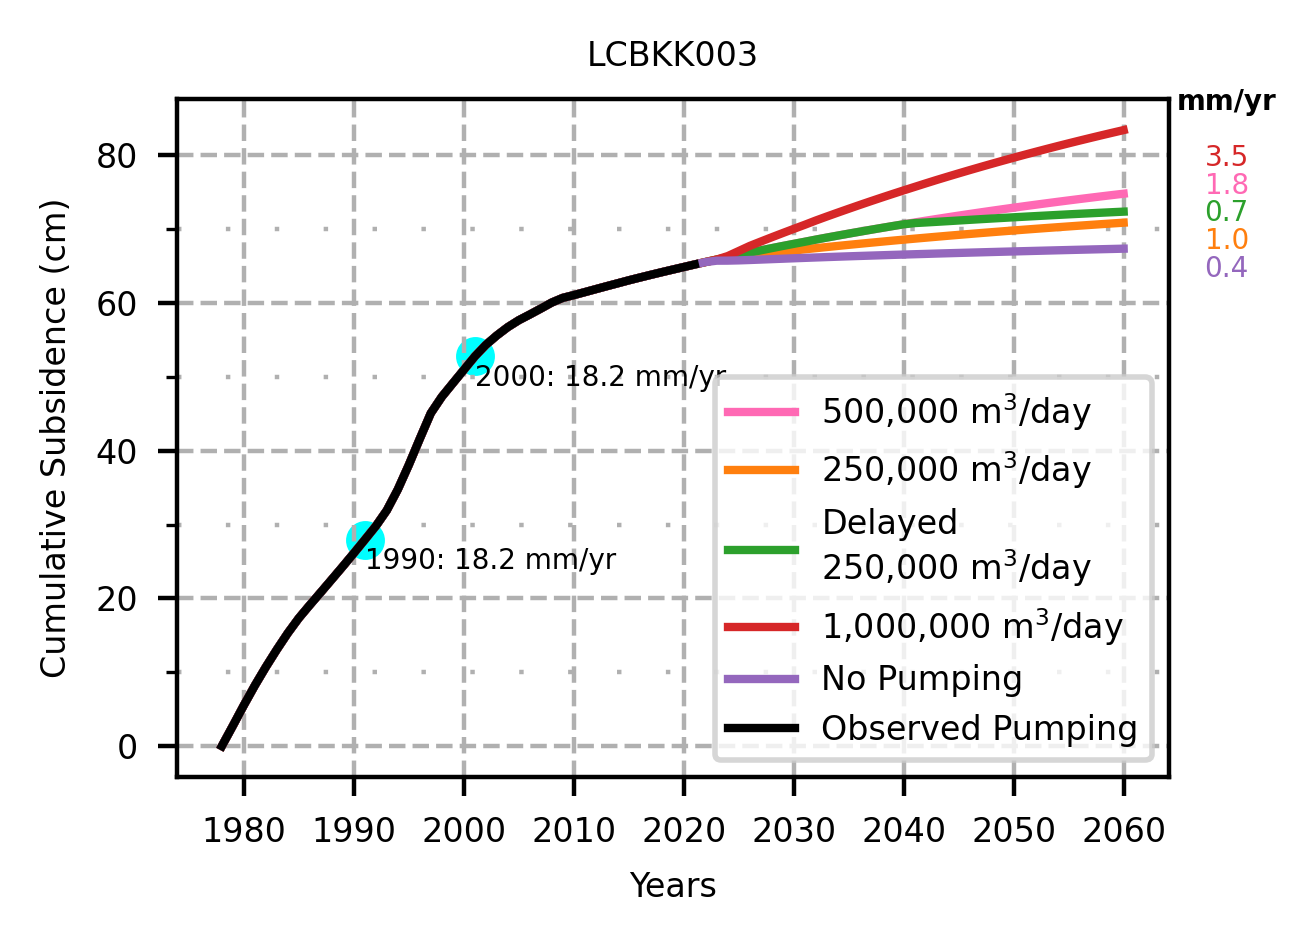

<Figure size 640x480 with 0 Axes>

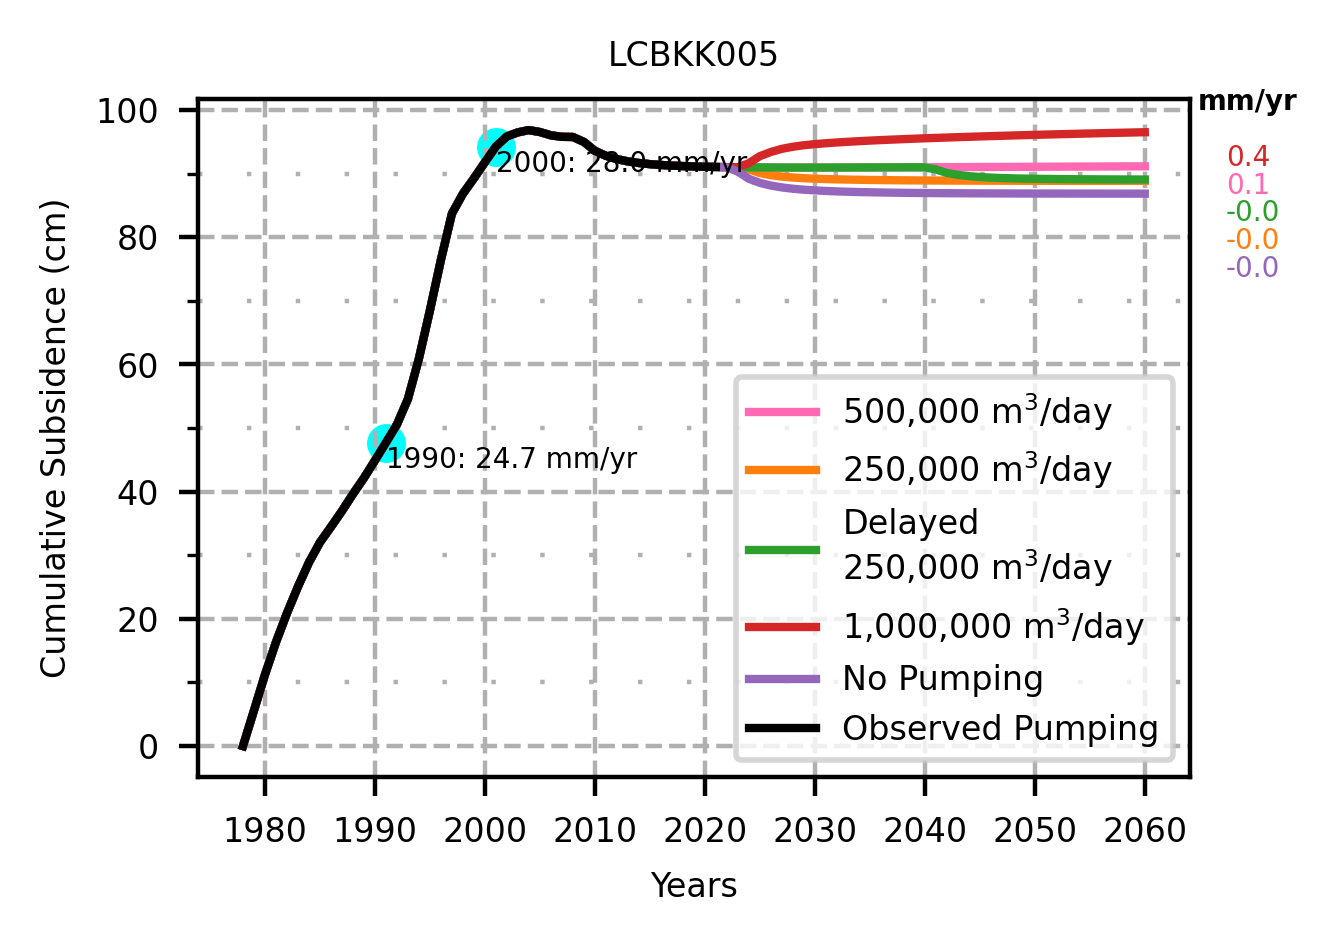

<Figure size 640x480 with 0 Axes>

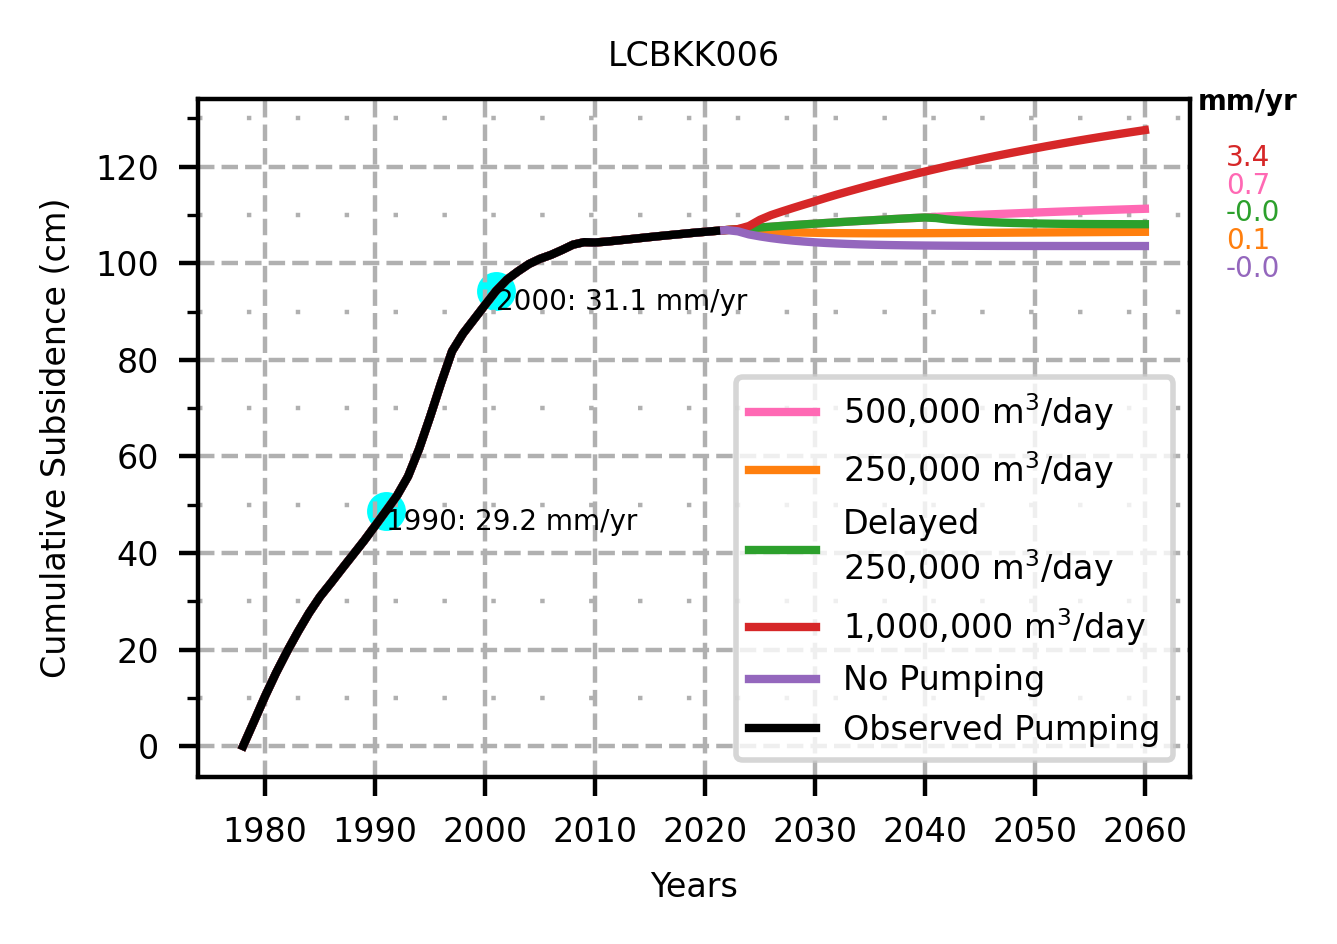

<Figure size 640x480 with 0 Axes>

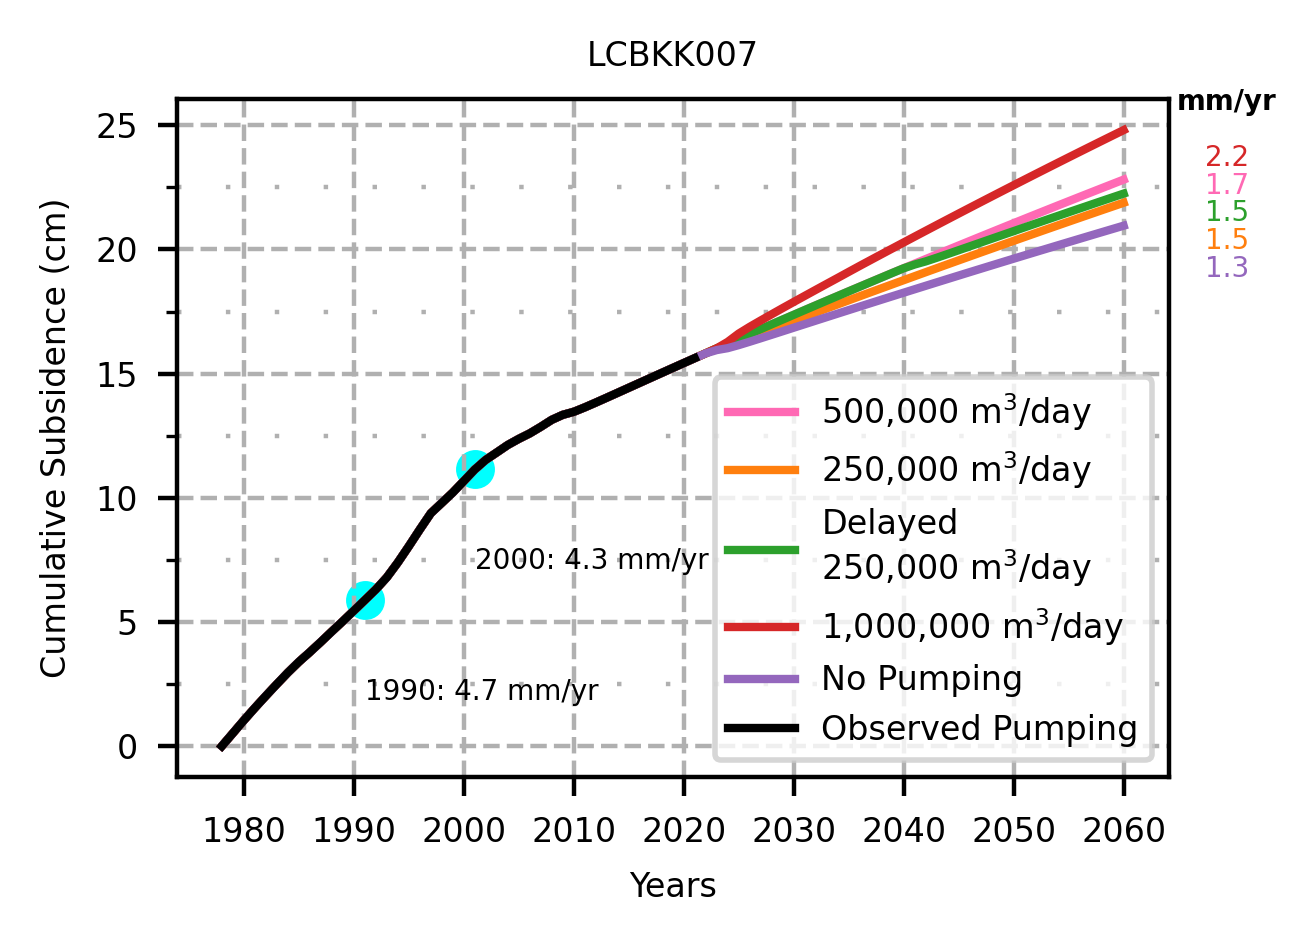

<Figure size 640x480 with 0 Axes>

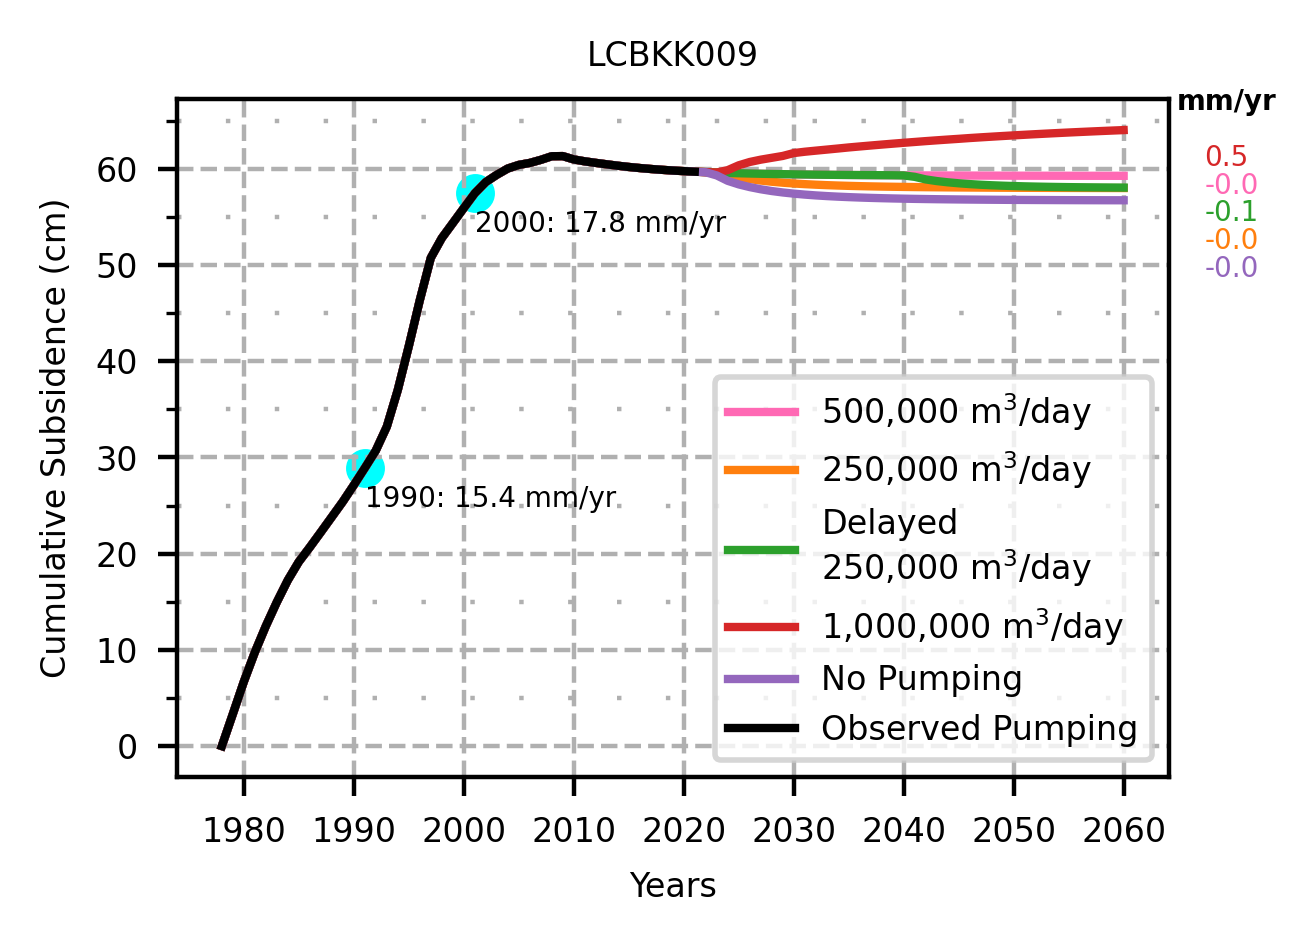

<Figure size 640x480 with 0 Axes>

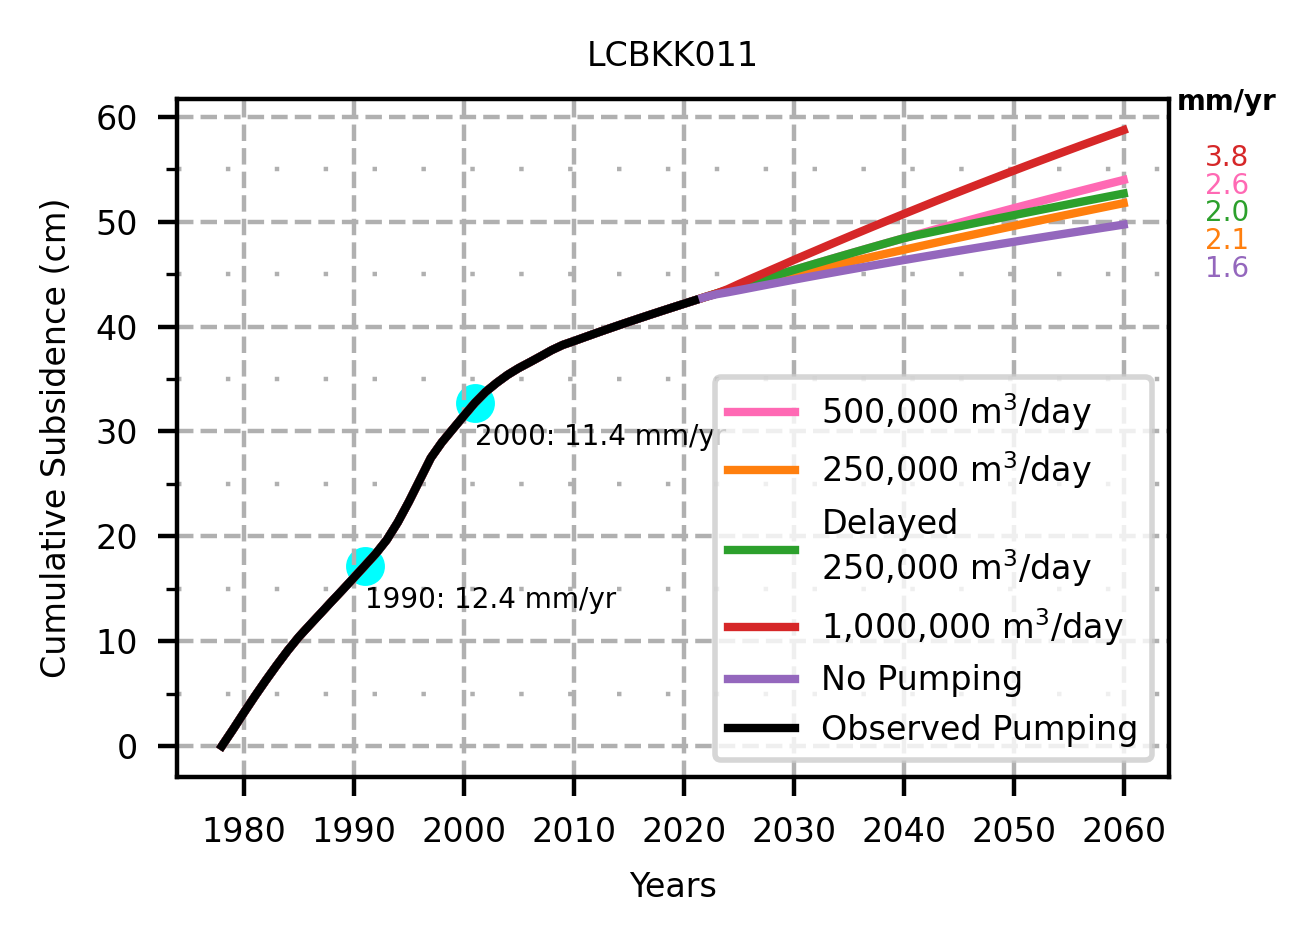

<Figure size 640x480 with 0 Axes>

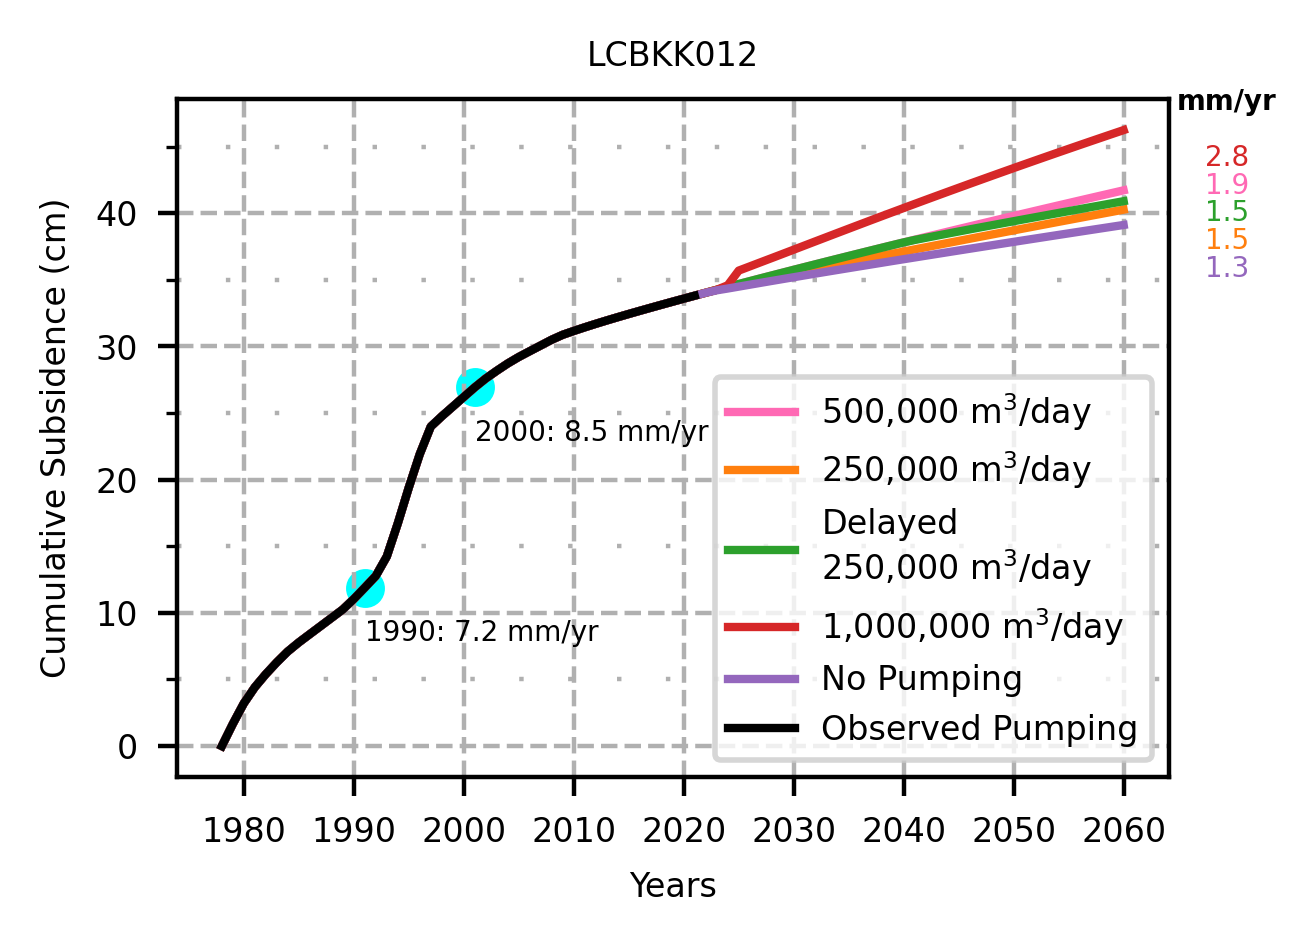

<Figure size 640x480 with 0 Axes>

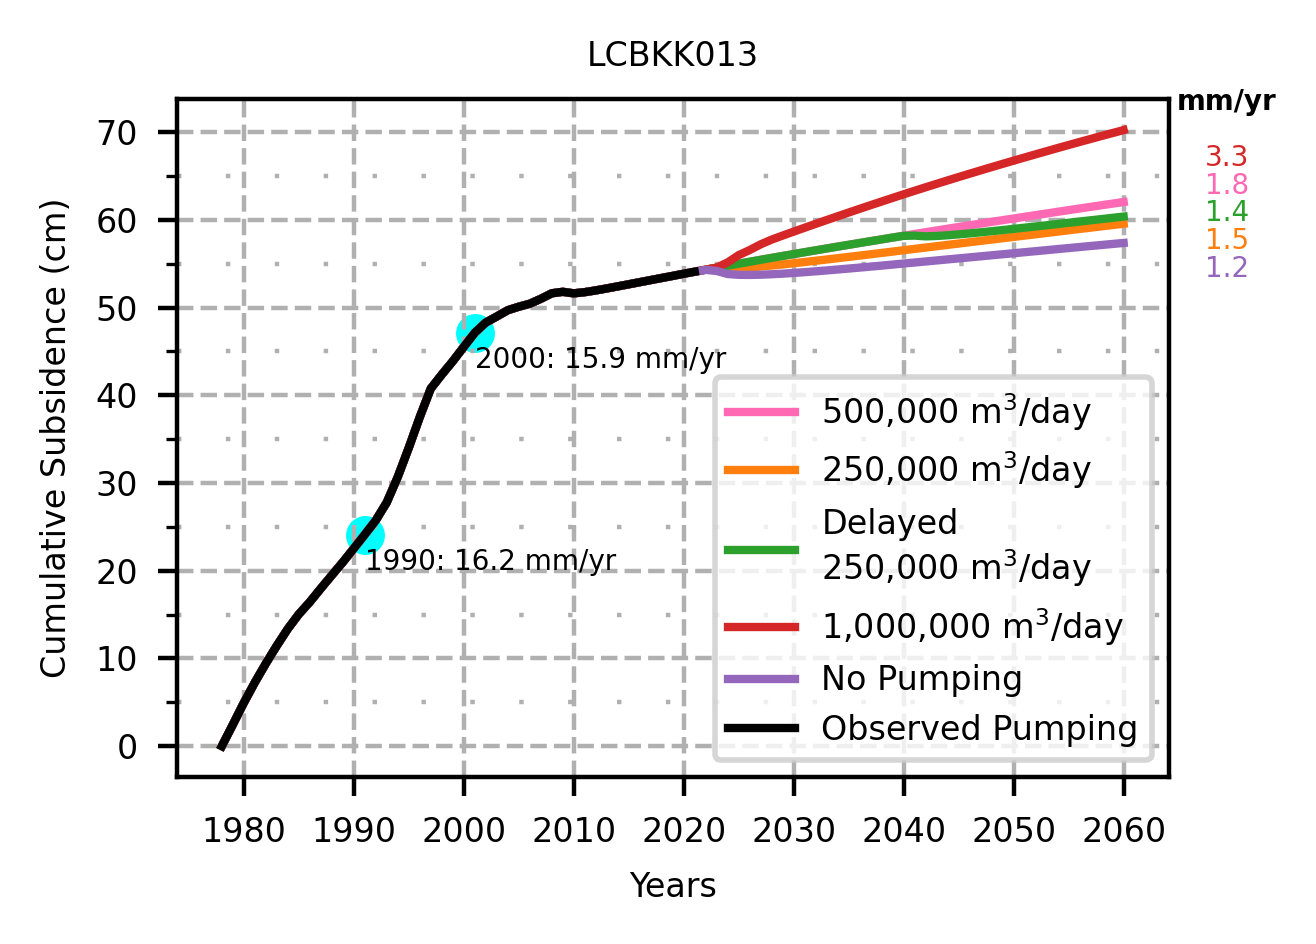

<Figure size 640x480 with 0 Axes>

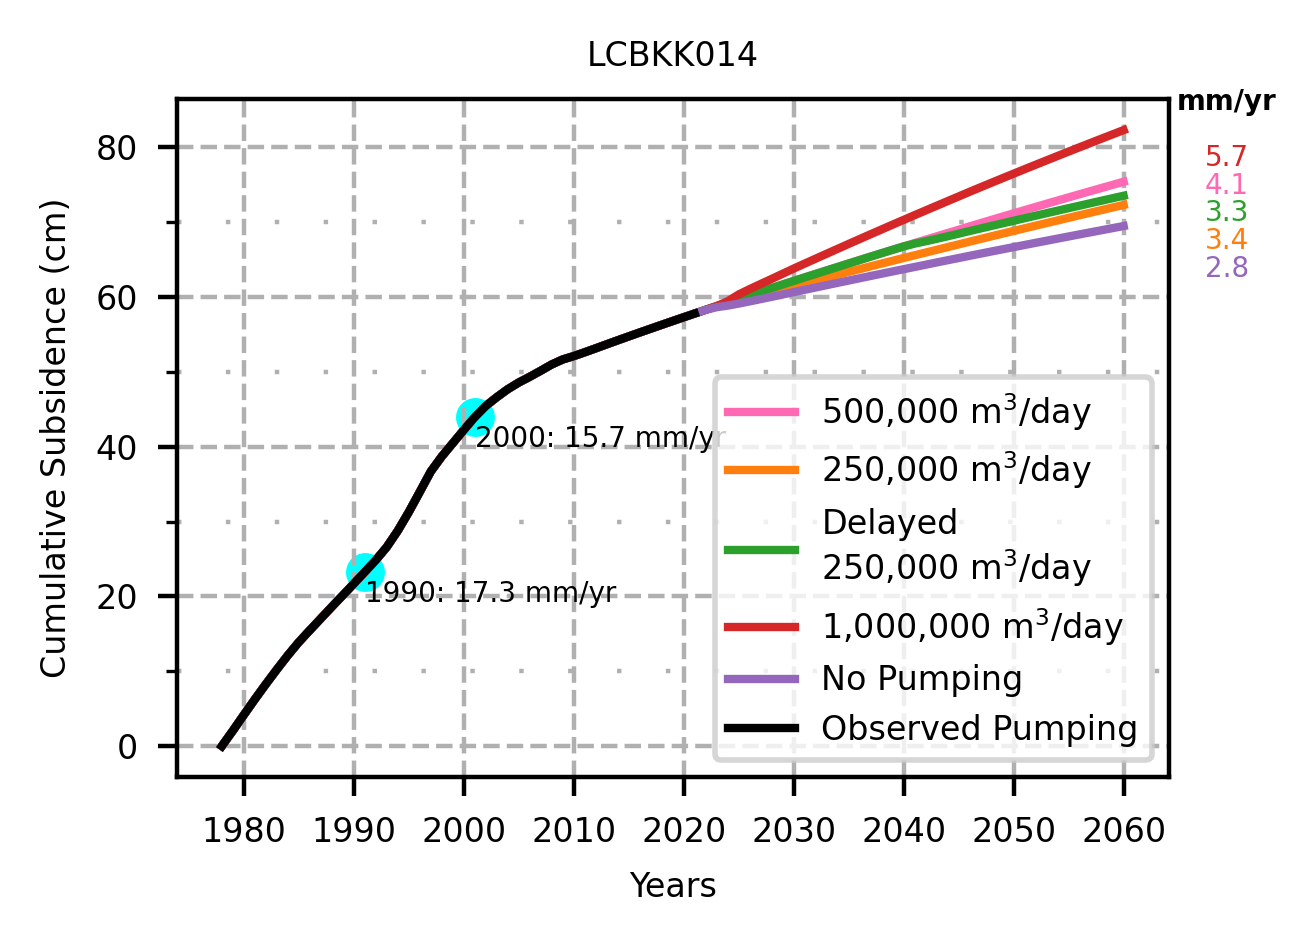

<Figure size 640x480 with 0 Axes>

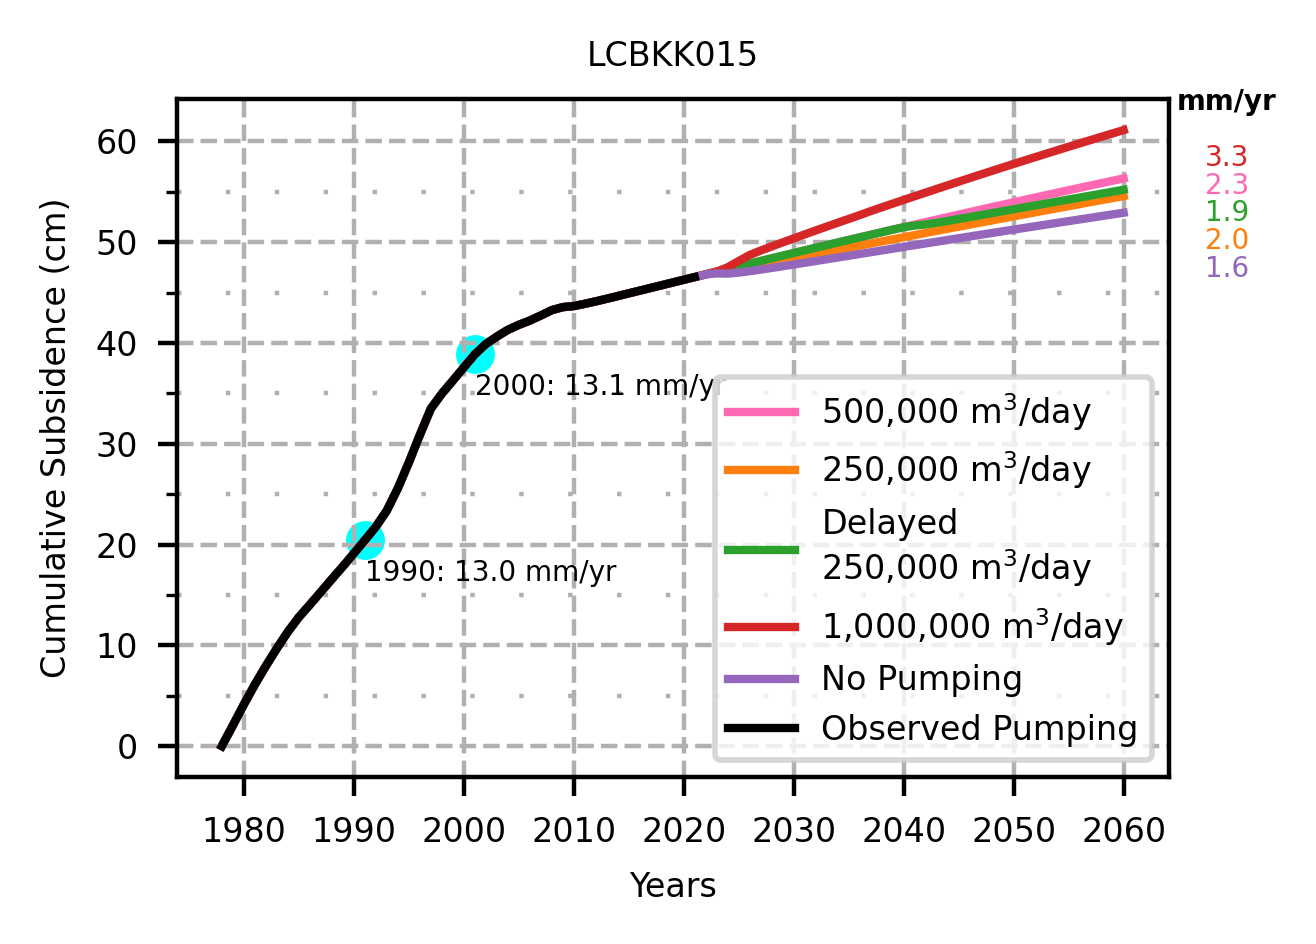

<Figure size 640x480 with 0 Axes>

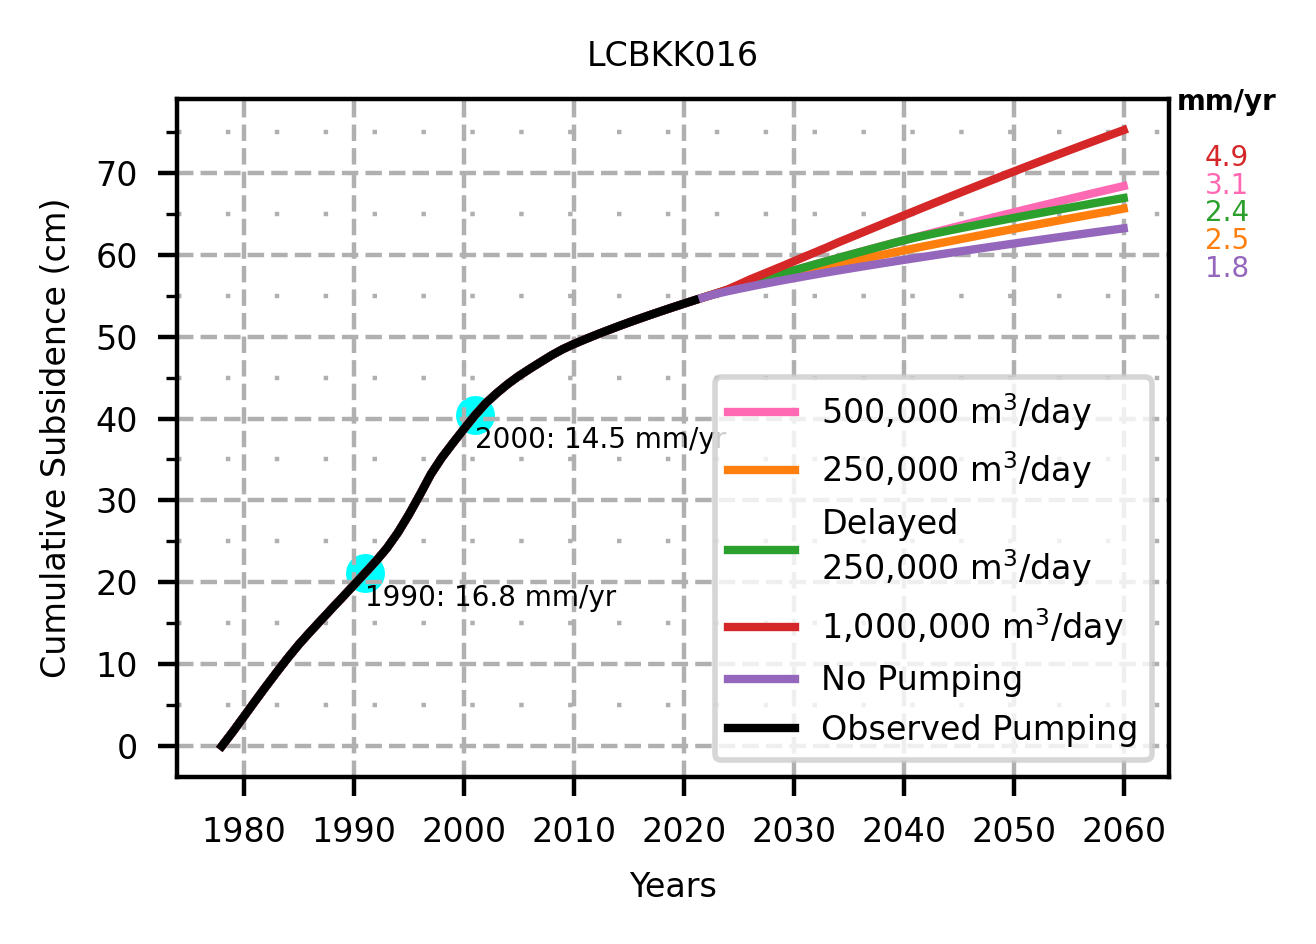

<Figure size 640x480 with 0 Axes>

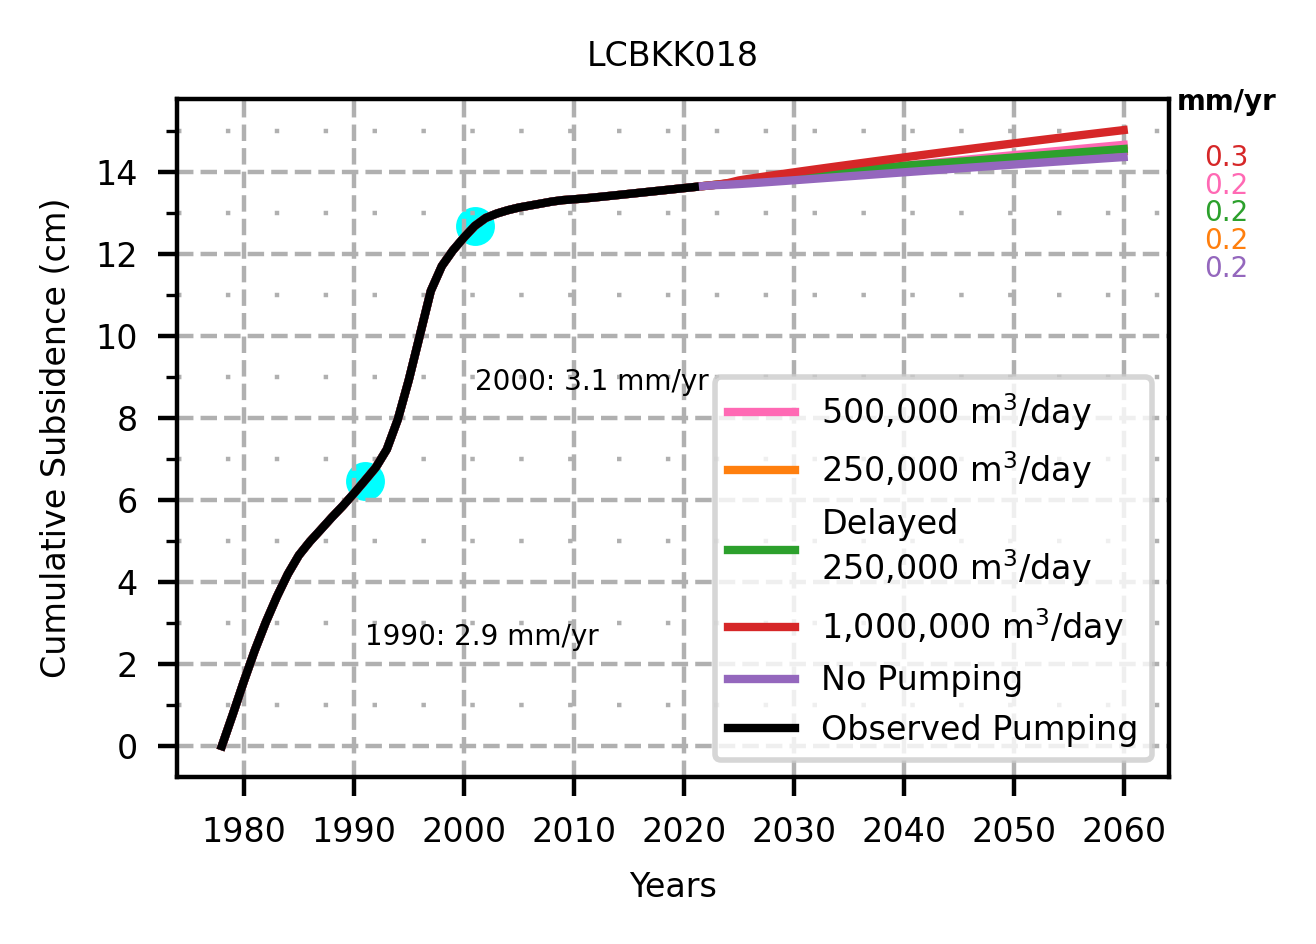

<Figure size 640x480 with 0 Axes>

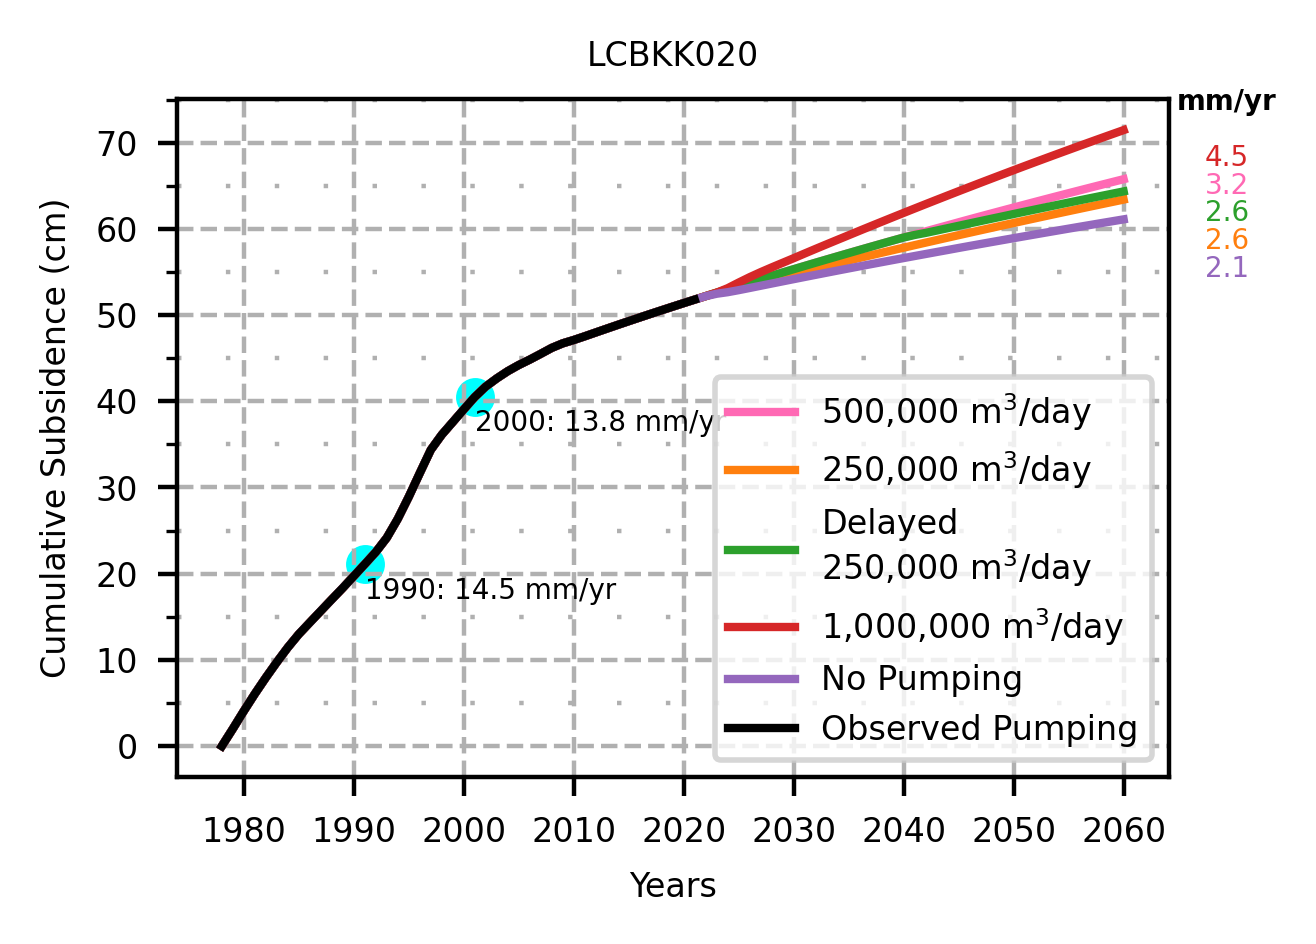

<Figure size 640x480 with 0 Axes>

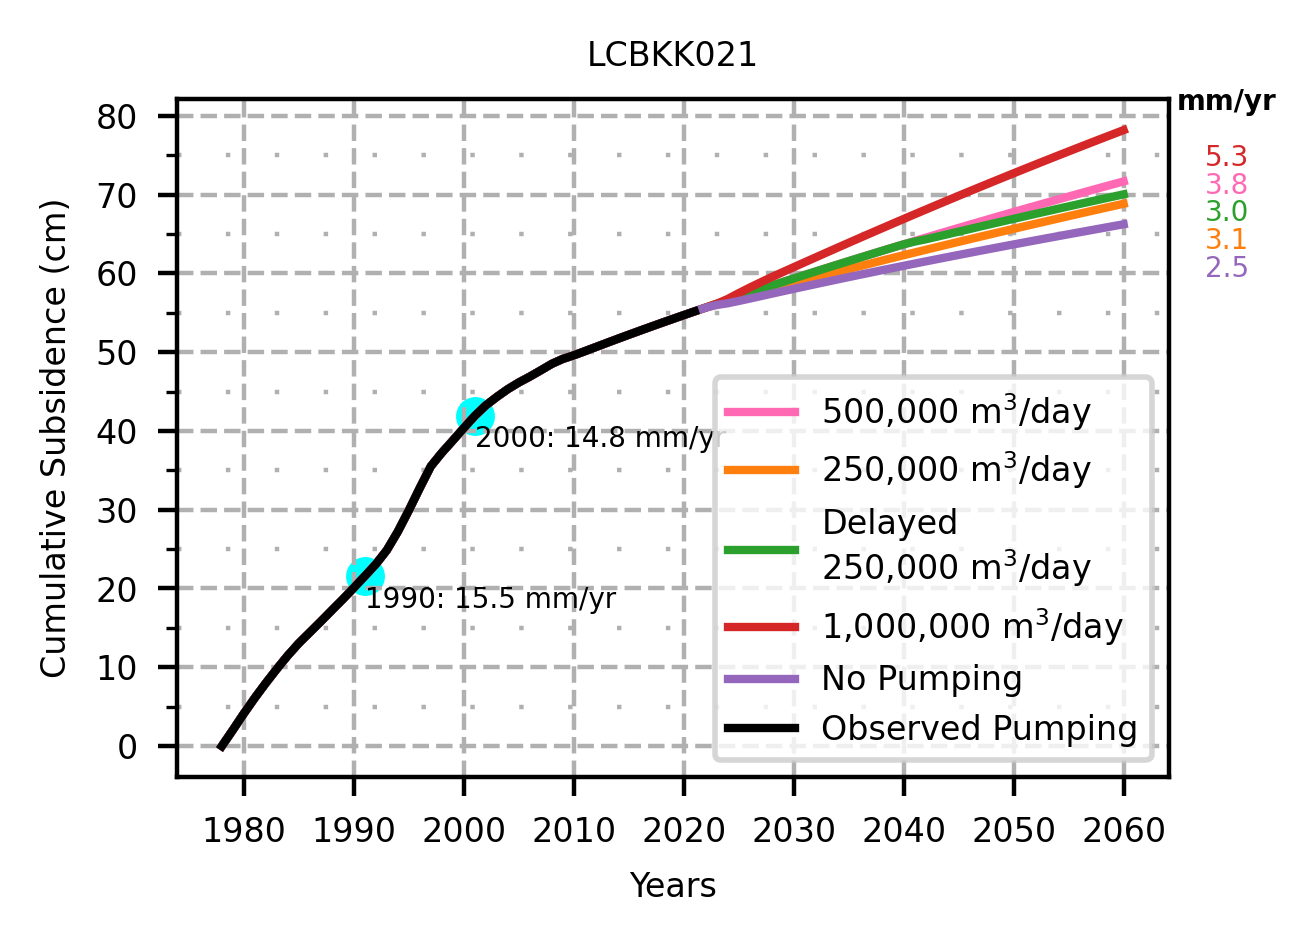

<Figure size 640x480 with 0 Axes>

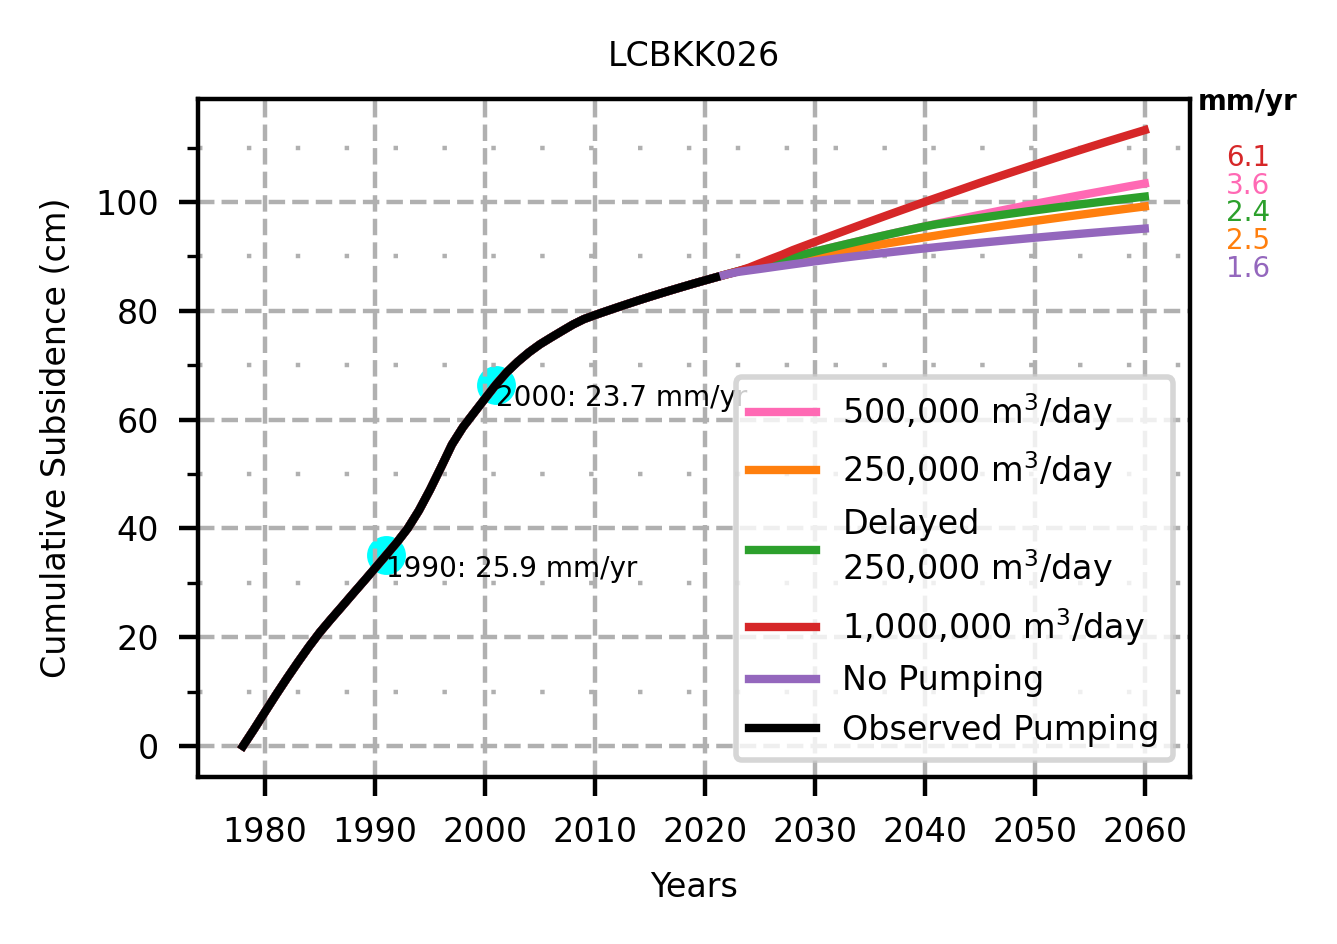

<Figure size 640x480 with 0 Axes>

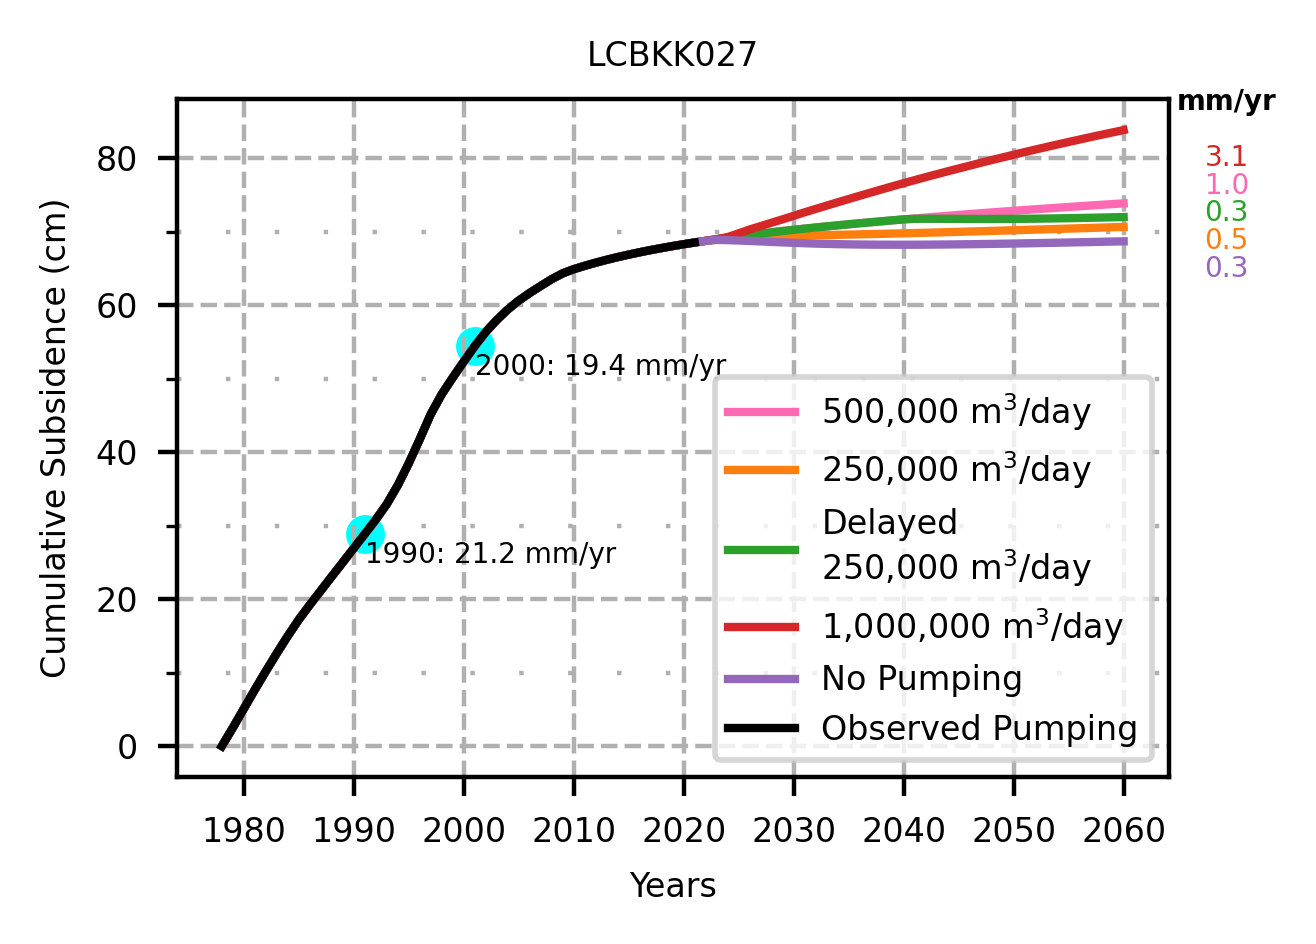

<Figure size 640x480 with 0 Axes>

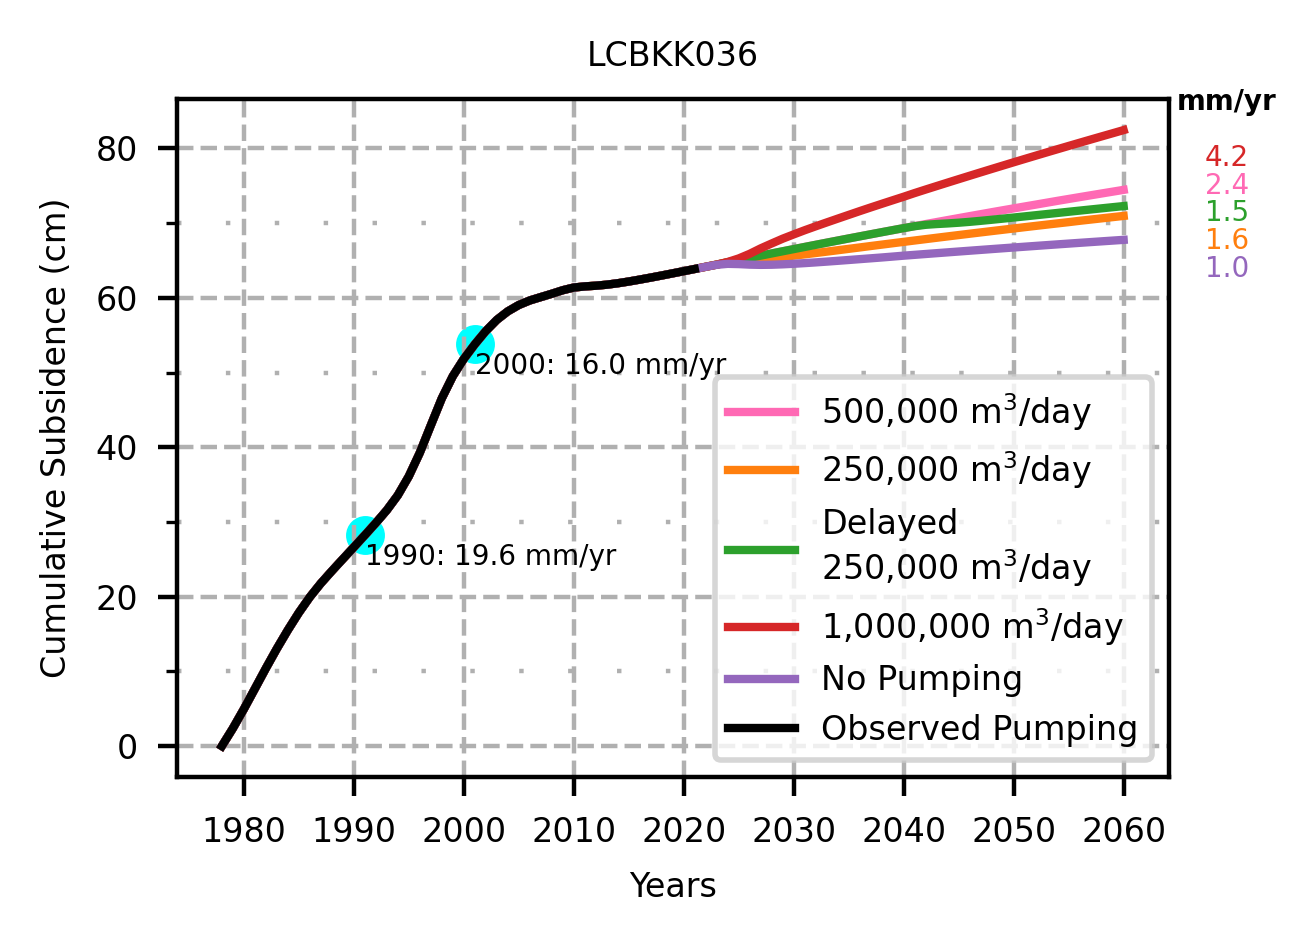

<Figure size 640x480 with 0 Axes>

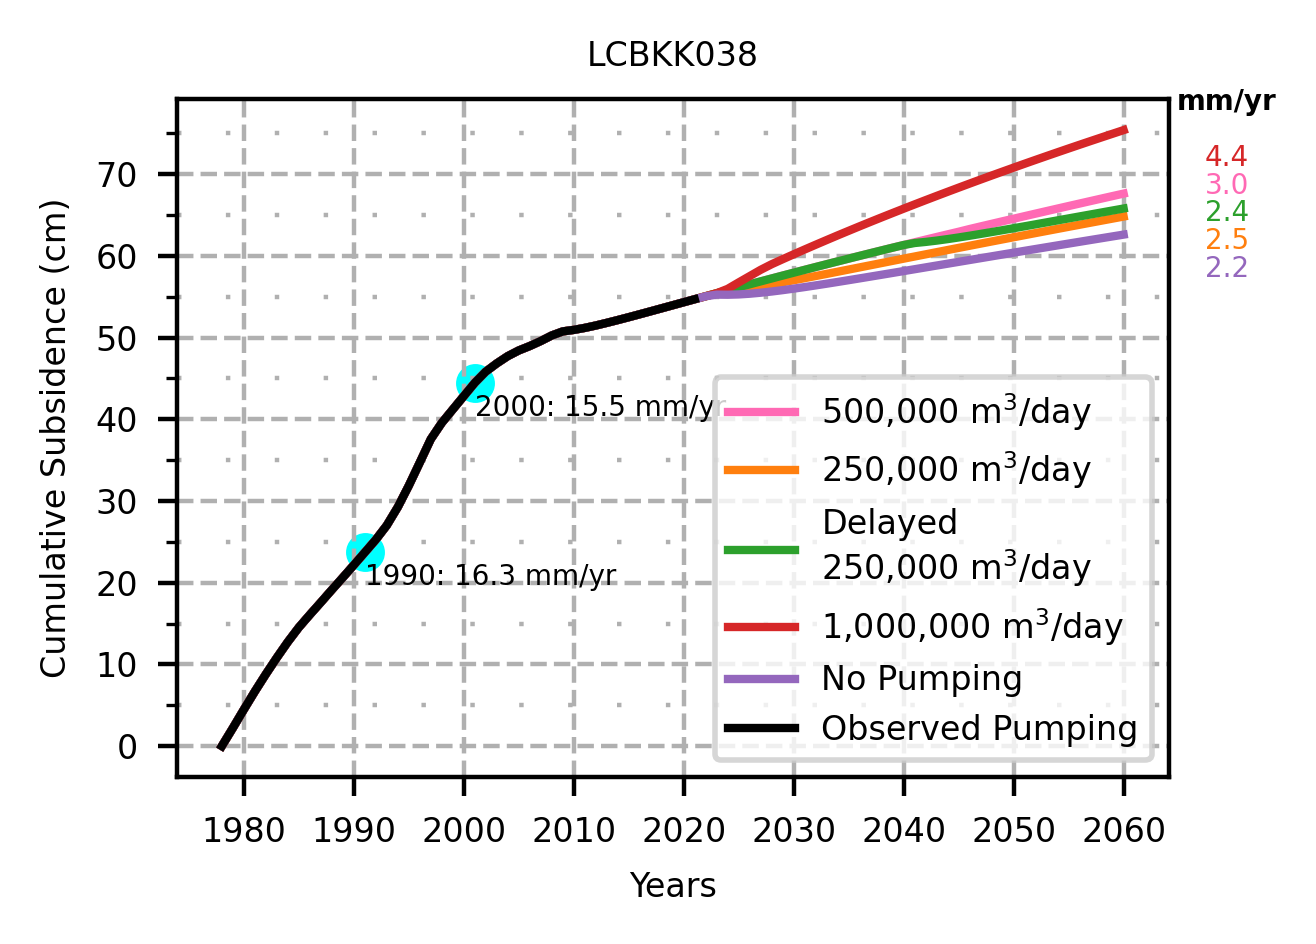

<Figure size 640x480 with 0 Axes>

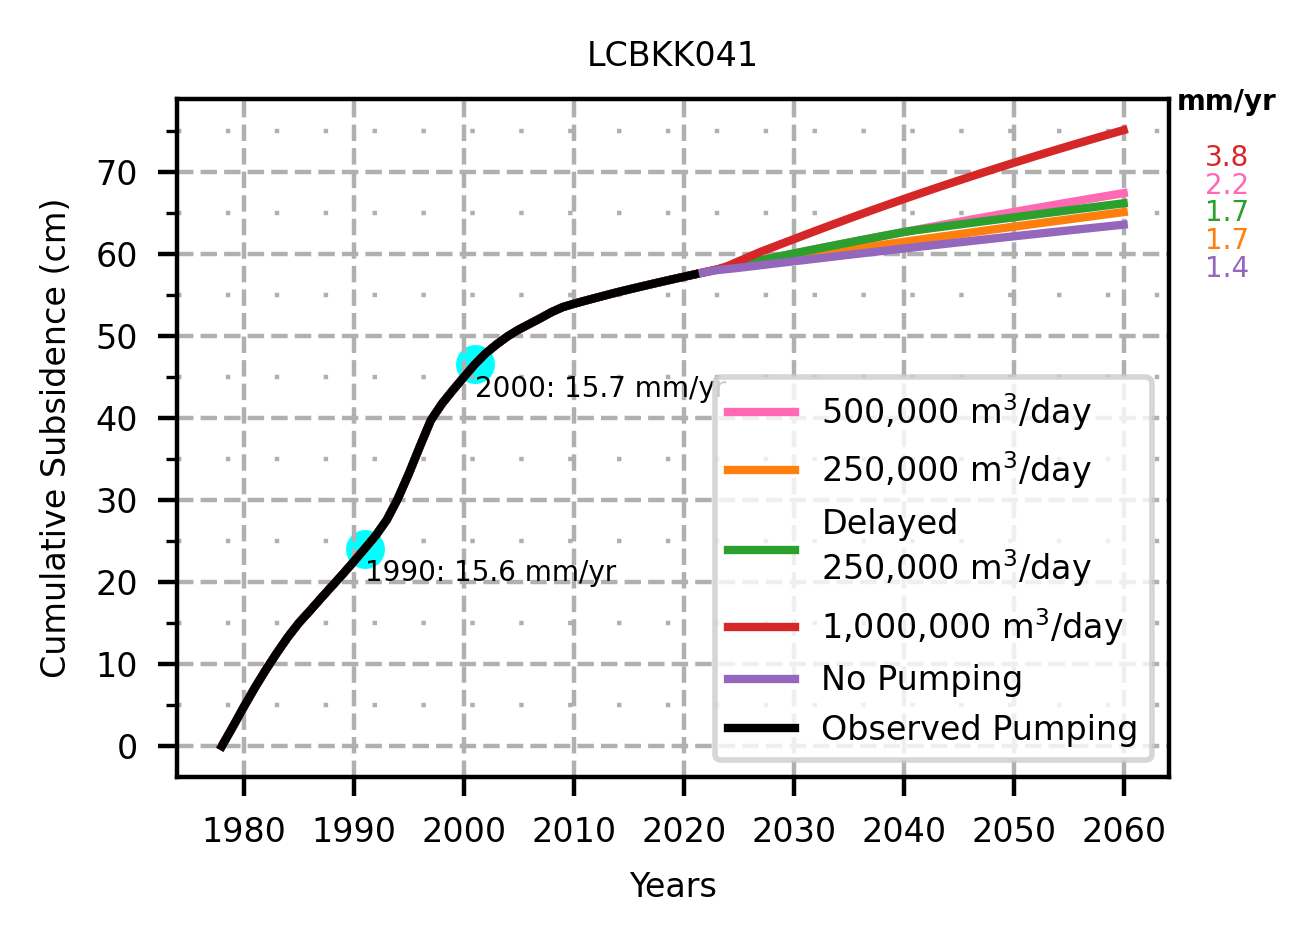

<Figure size 640x480 with 0 Axes>

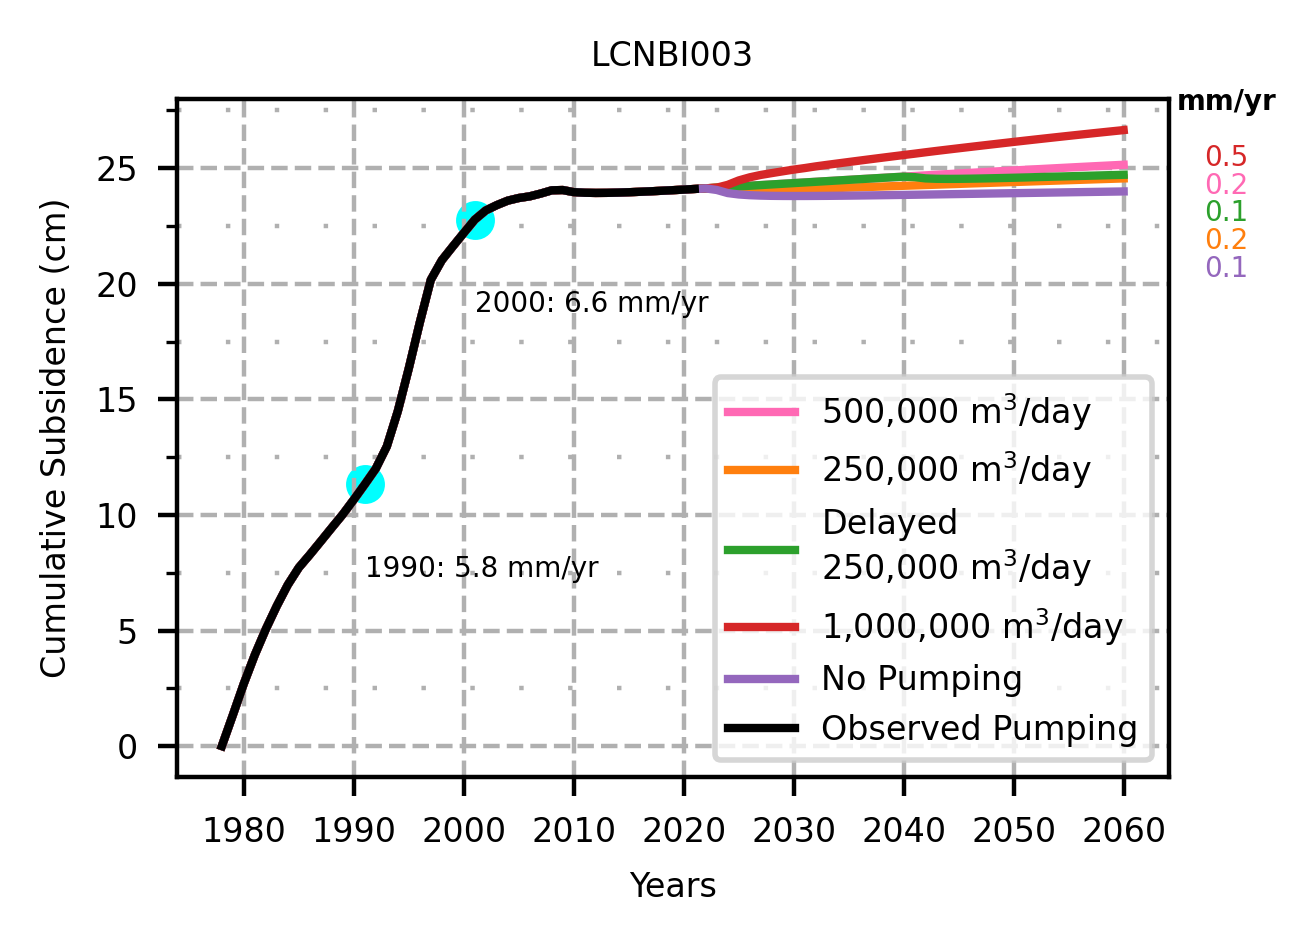

<Figure size 640x480 with 0 Axes>

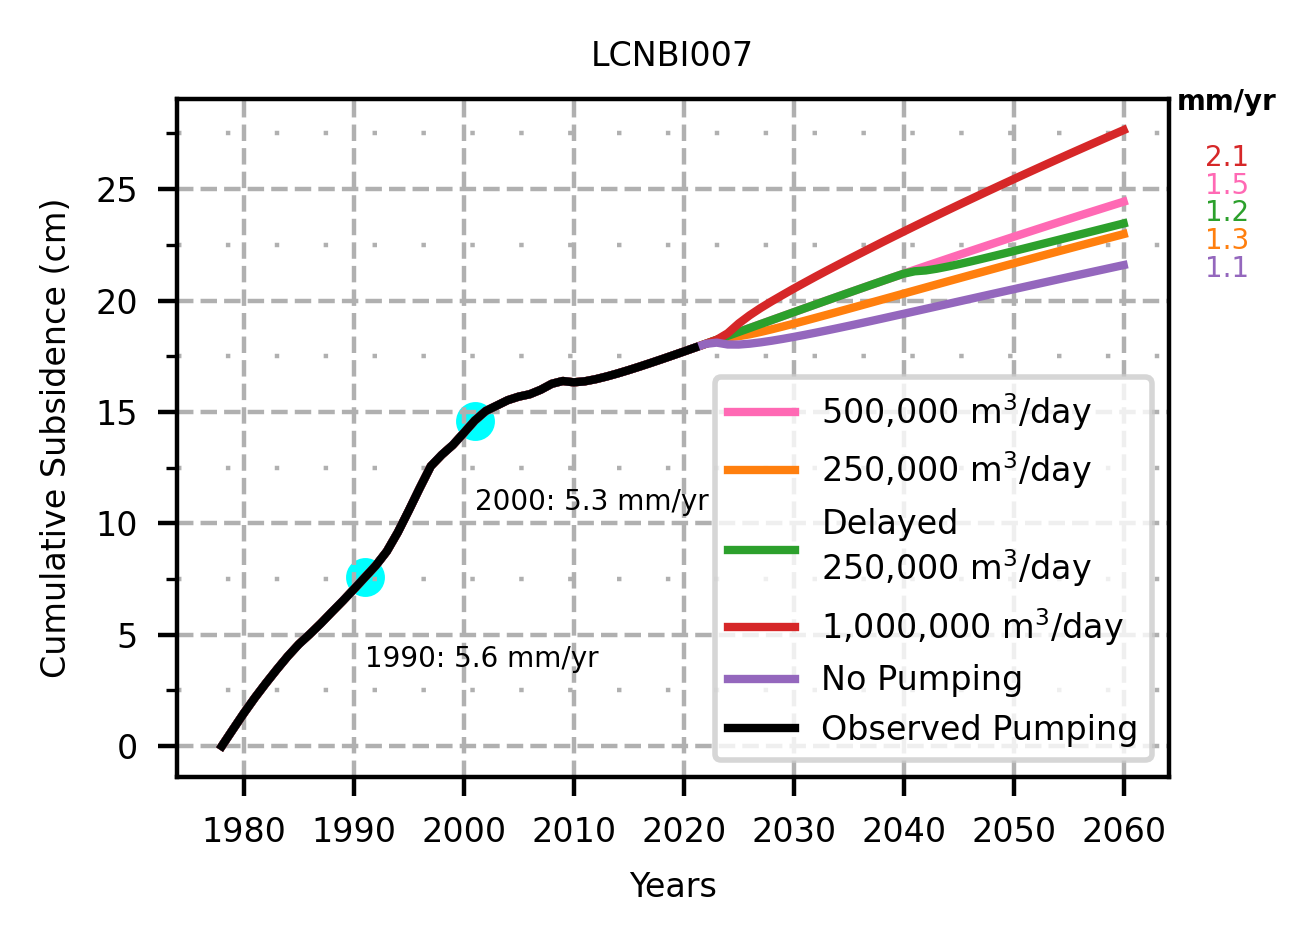

<Figure size 640x480 with 0 Axes>

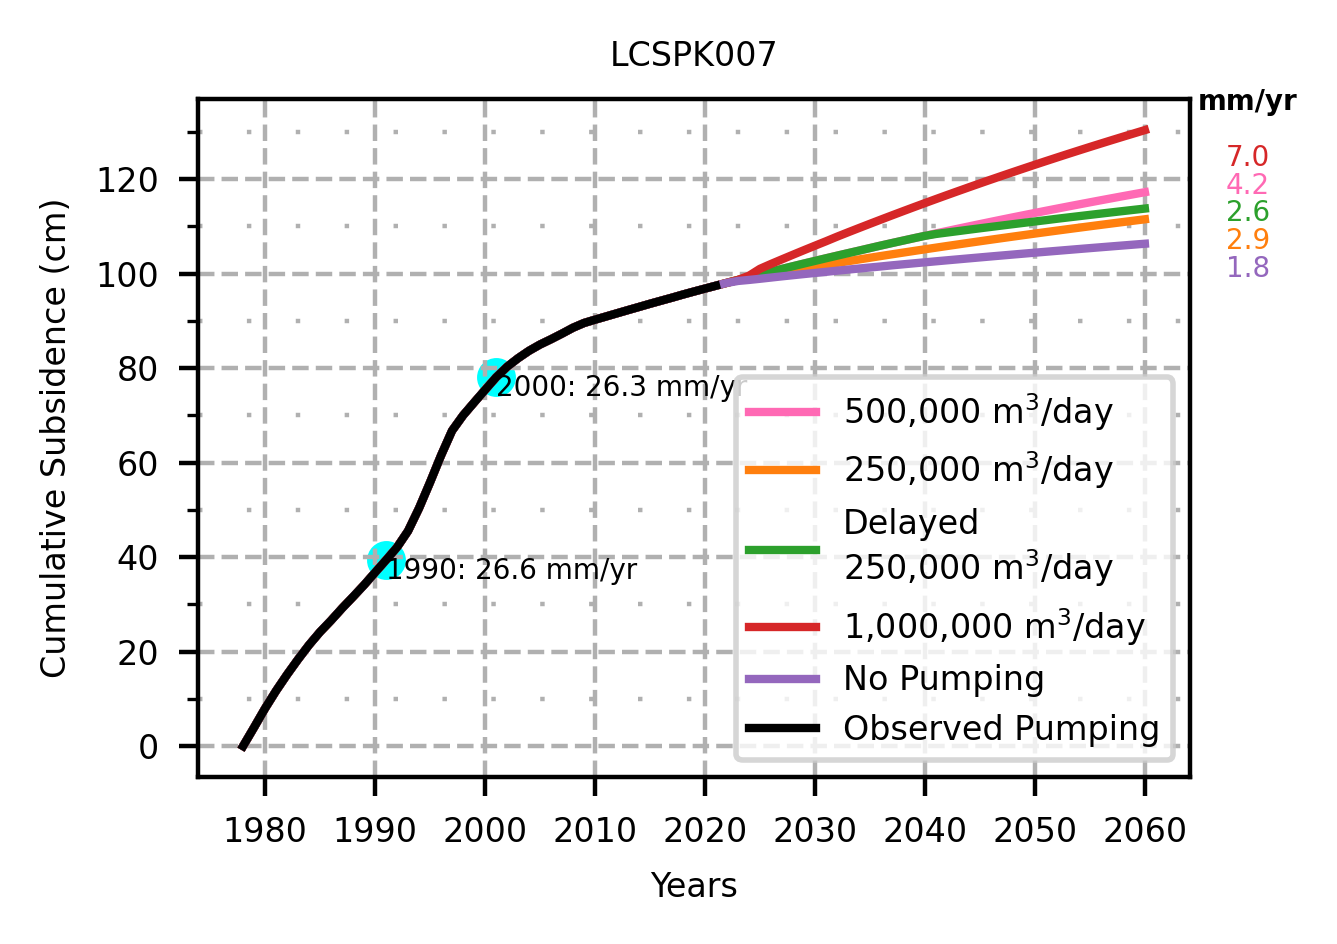

<Figure size 640x480 with 0 Axes>

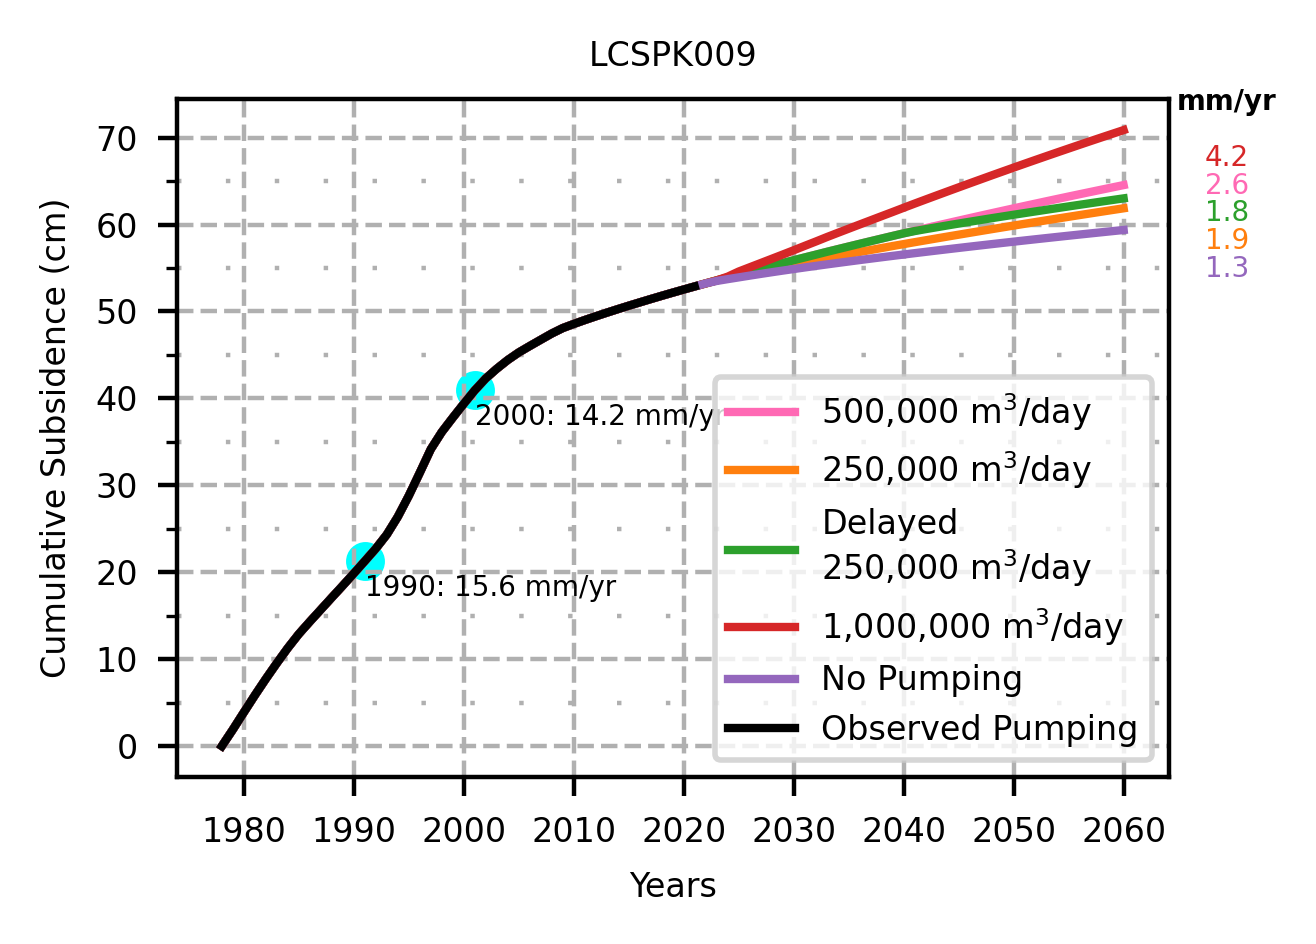


500,000 scenario min, avg, max, med 2060 rate mm/yr: -0.0067, 2.0962, 4.2111, 2.2347

250,000 scenario min, avg, max, med 2060 rate mm/yr: -0.0158, 1.5974, 3.4127, 1.6196

Delayed250,000 scenario min, avg, max, med 2060 rate mm/yr: -0.0728, 1.4983, 3.2924, 1.5046

1,000,000 scenario min, avg, max, med 2060 rate mm/yr: 0.3164, 3.4497, 7.0018, 3.4623

No pumping scenario min, avg, max, med 2060 rate mm/yr: -0.0232, 1.1915, 2.7605, 1.2930


<Figure size 640x480 with 0 Axes>

In [7]:
# For each well nest
wellnestlist = ["LCBKK003",
                "LCBKK005",
                "LCBKK006",
                "LCBKK007",
                "LCBKK009",
                "LCBKK011",
                "LCBKK012",
                "LCBKK013",
                "LCBKK014",
                "LCBKK015",
                "LCBKK016",
                "LCBKK018",
                "LCBKK020",
                "LCBKK021",
                "LCBKK026",
                "LCBKK027",
                "LCBKK036",
                "LCBKK038",
                "LCBKK041",
                "LCNBI003",
                "LCNBI007",
                "LCSPK007",
                "LCSPK009"]
tmin = "1978"
tmax = "2060"

# Reading in thickness and storage data
path = os.path.join(os.path.abspath("inputs"), "SUBParameters.xlsx")
Thick_data = pd.read_excel(path, sheet_name="Thickness",
                           index_col=0)  # Thickness
Sskv_data = pd.read_excel(path,
                          sheet_name="Sskv",
                          index_col=0)  # Sskv
Sske_data = pd.read_excel(path,
                          sheet_name="Sske",
                          index_col=0)  # Ssk
K_data = pd.read_excel(path,
                       sheet_name="K",
                       index_col=0)  # K

# Mode can be "raw" as in raw groundwater data vs "Pastas" for importing Pastas
# simulated groundwater in the aquifers
mode = "Pastas"

# If mode is Pastas, need model path
if mode == "Pastas":

    mpath = os.path.abspath("models")

# Pumping flag, for PASTAS, if changing pumping scenario
pumpflag = 1
# If changing pumping scenario, need pumping sheet/path
if pumpflag == 1:

    ppath = os.path.join(os.path.abspath("inputs"), "BasinPumping.xlsx")

    # Pumping sheets
    pumpsheets = ["EstTotalPump_54-60_Int50",
                  "EstTotalPump_54-60_IntF25",
                  "EstTotalPump_54-60_IntF100",
                  "EstTotalPump_54-60_IntF50_25",
                  "EstTotalPump_54-60_IntF0"]

# Convergence criteria
CC = 1 * 10**-5

# Number of nodes in clay
node_num = 10

# Using available heads as proxy for missing
proxyflag = 1

# All ann subs
all_ann_subs = []

# For each pumping scenario
for pumpsheet in pumpsheets:

    # Calculates subsidence
    all_results, sub_total, subv_total = bkk_sub_gw.\
        bkk_sub.bkk_subsidence(wellnestlist,
                               mode, tmin,
                               tmax,
                               Thick_data,
                               K_data,
                               Sskv_data,
                               Sske_data,
                               CC=CC,
                               Nz=node_num,
                               ic_run=True,
                               proxyflag=proxyflag,
                               pumpflag=pumpflag,
                               pump_path=ppath,
                               pump_sheet=pumpsheet,
                               model_path=mpath)

    # Post process data
    sub_total, subv_total, ann_sub, \
        _ = bkk_sub_gw.bkk_sub.bkk_postproc(wellnestlist,
                                            sub_total,
                                            subv_total,
                                            all_results)

    all_ann_subs.append(ann_sub)

# Plotting
# path to save figures
path = os.path.abspath("figures")

# Line graphs of cumulative sub forecast for whole time period
bkk_sub_gw.bkk_plotting.sub_forecast(path, wellnestlist, all_ann_subs,
                                     save=1)

## Plots Results: Maps of cumulative subsidence (cm) for pumping scenarios for new tmin and tmax
Figure 13 in main paper

<Figure size 640x480 with 0 Axes>

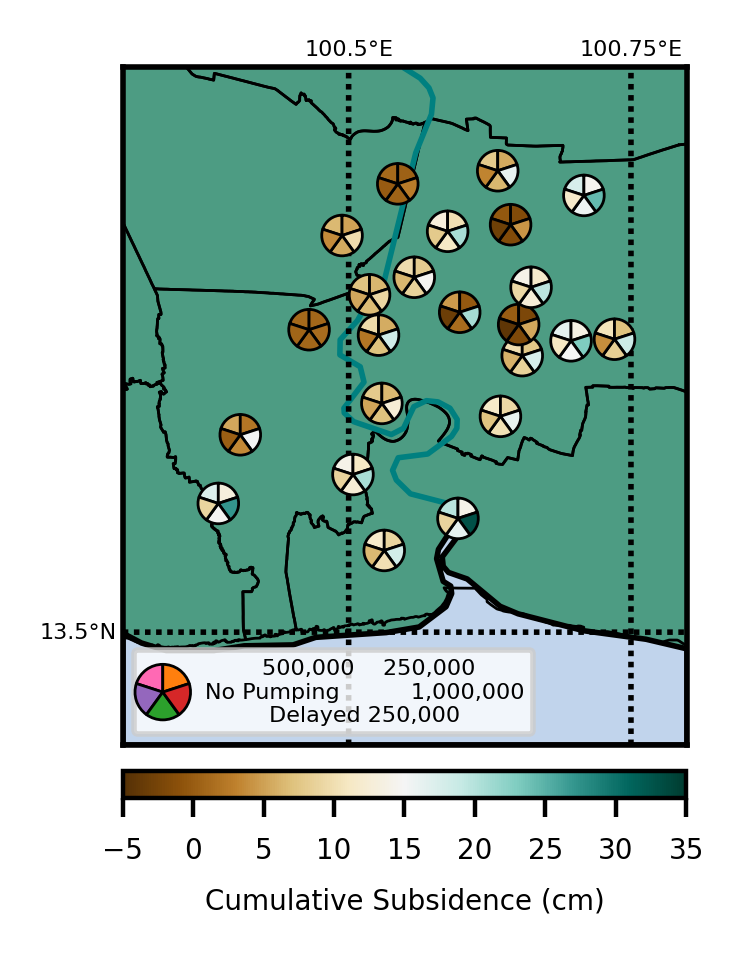

<Figure size 640x480 with 0 Axes>

In [10]:
tmin = "2020"
tmax = "2060"
plt.set_cmap("BrBG")
bkk_sub_gw.bkk_plotting.sub_forecast_map(path, wellnestlist,
                                         all_ann_subs, tmin, tmax,
                                         save=1)

## Runs and plots results: Sensitivity Analysis
Supplemental information 1.6

INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition

Cum sub in time period relative to total sub (%): -3.332645127895979


INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition

Cum sub in time period relative to total sub (%): -75.74673972732825


INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition

Cum sub in time period relative to total sub (%): -54.99322492995459


INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition



INFO: Time Series Head: 4 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_PD32_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 7 nan-value(s) was/were found and filled with: drop.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubPastasModels\models/LCBKK013_NL45_GW_1989_2020_model.pas successfully loaded. This file was created with Pastas 1.0.1. Your current version of Pastas is: 1.0.1
INFO: Time Series Pump was extended in the past to 1920-01-09 00:00:00 by adding 0.0 values.
INFO: Time Series Head: 5 nan-value(s) was/were found and filled with: drop.
INFO: Time Series Head: User-defined option for fill_before 'None' is not supported.
INFO: Pastas Model from file C:\Users\jtsoonthornran\BKKSubP

LCBKK013  Clay 1
LCBKK013  Clay 1 Initial Condition

LCBKK013  Clay 2
LCBKK013  Clay 2 Initial Condition

LCBKK013  Clay 3
LCBKK013  Clay 3 Initial Condition

LCBKK013  Clay 4
LCBKK013  Clay 4 Initial Condition

Cum sub in time period relative to total sub (%): -79.43106985285435


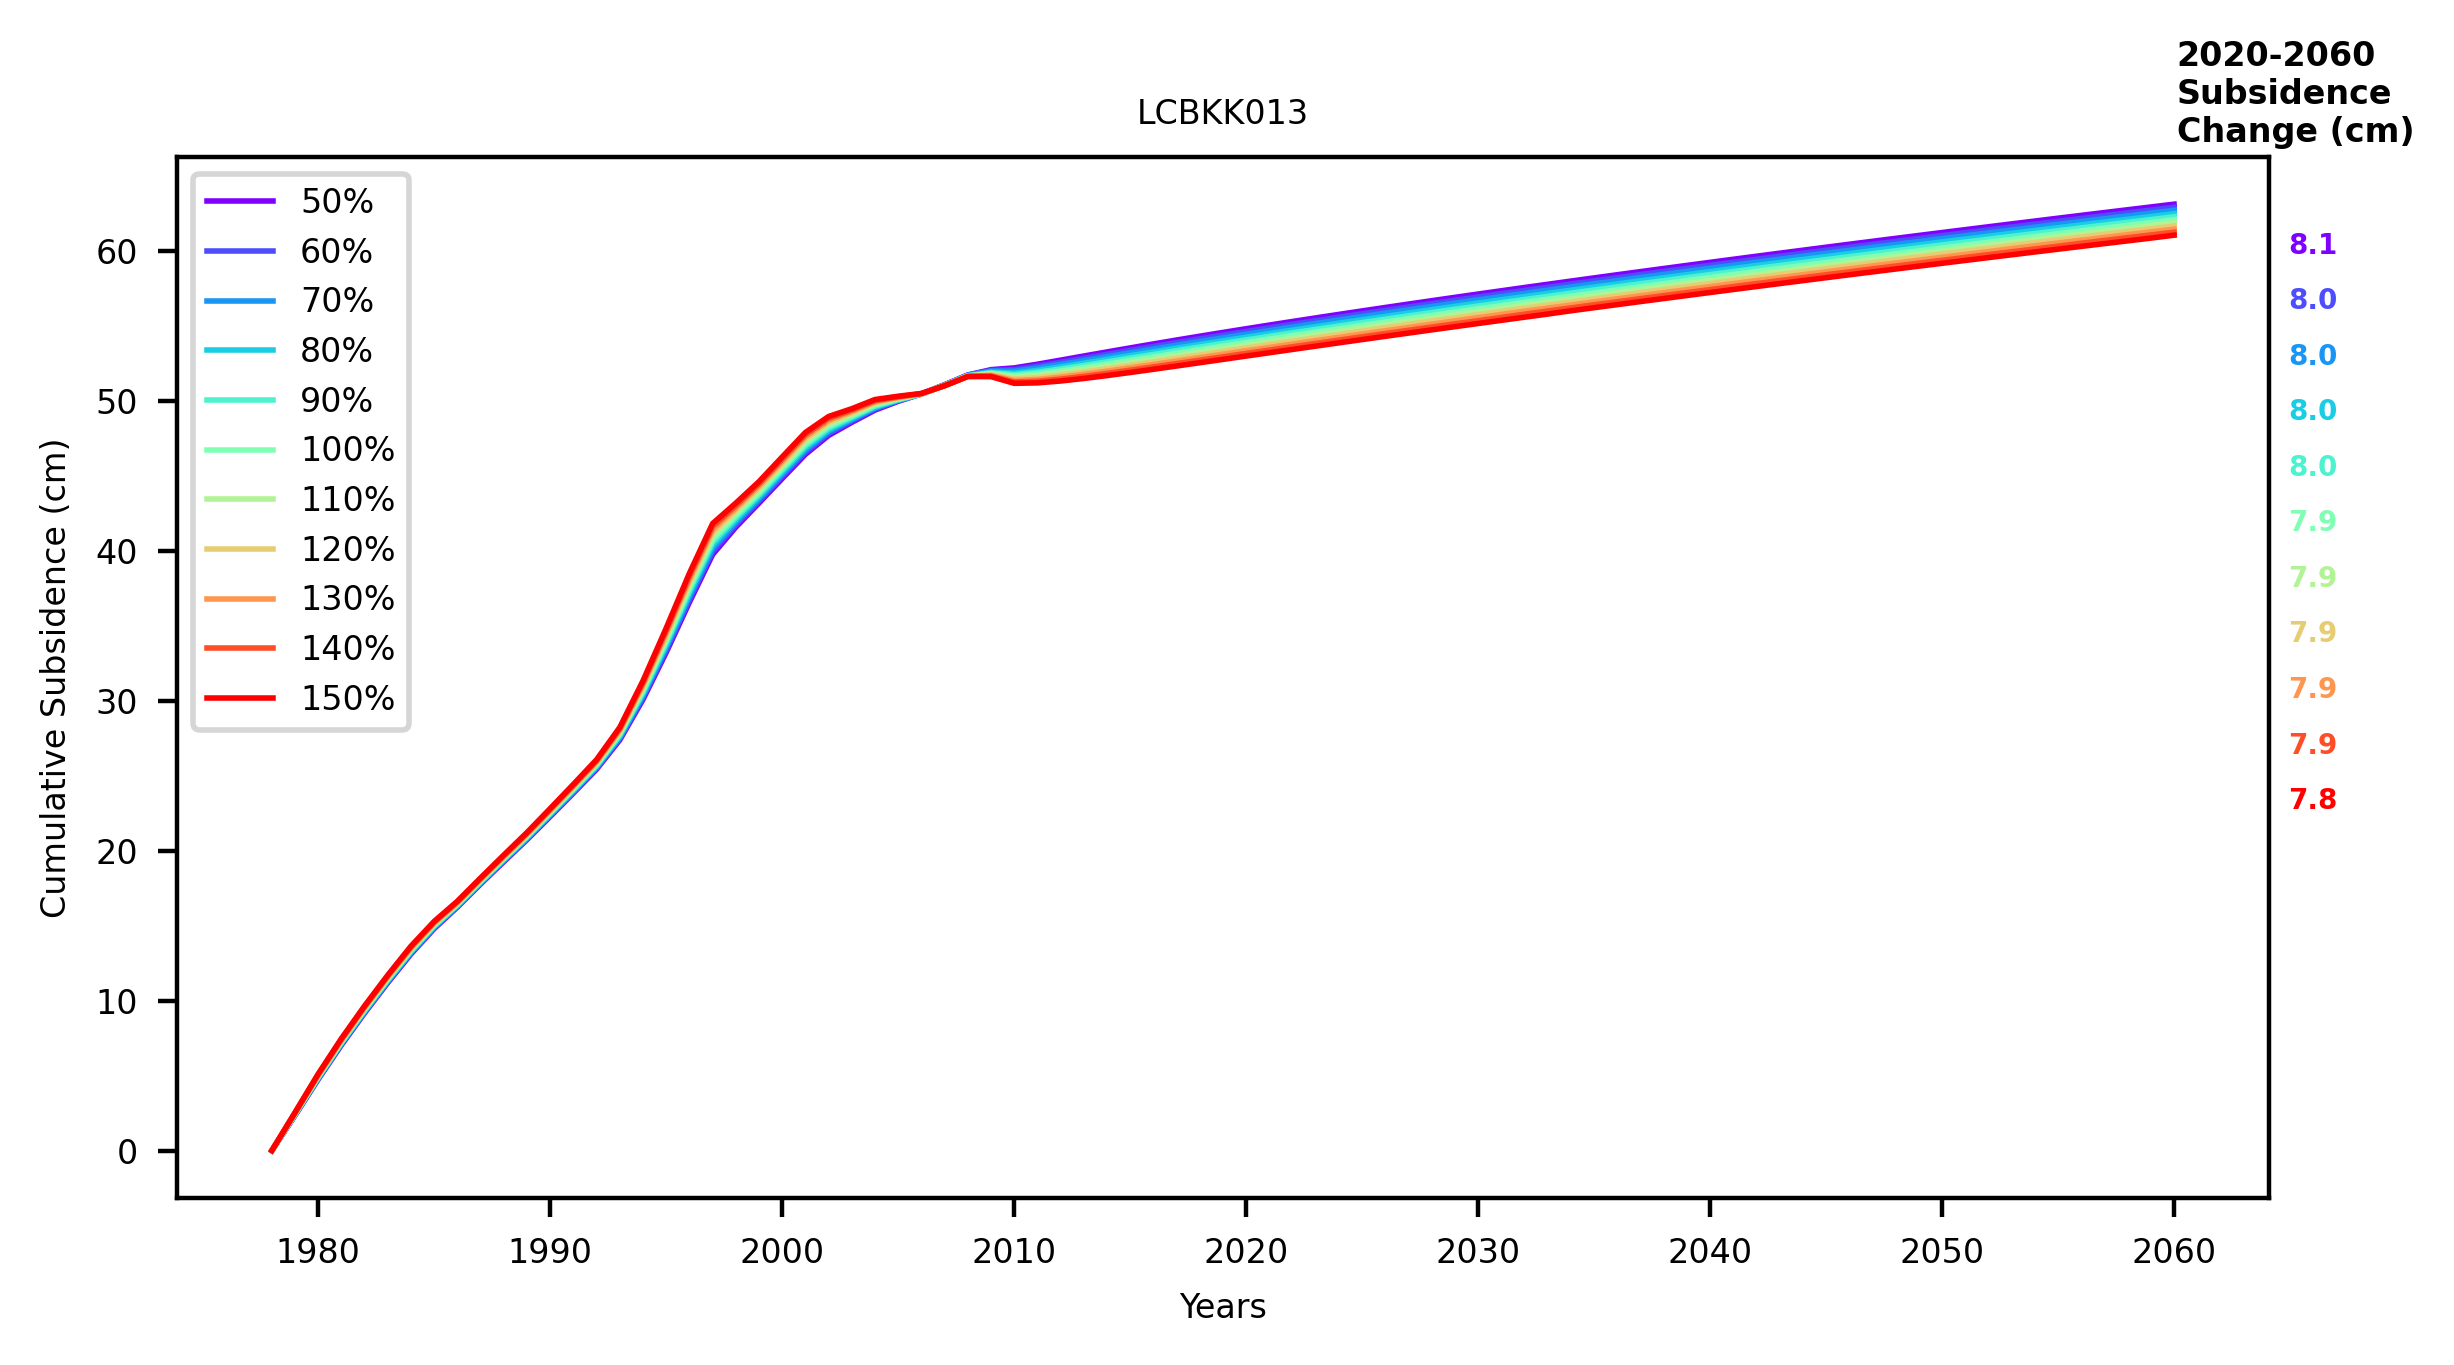

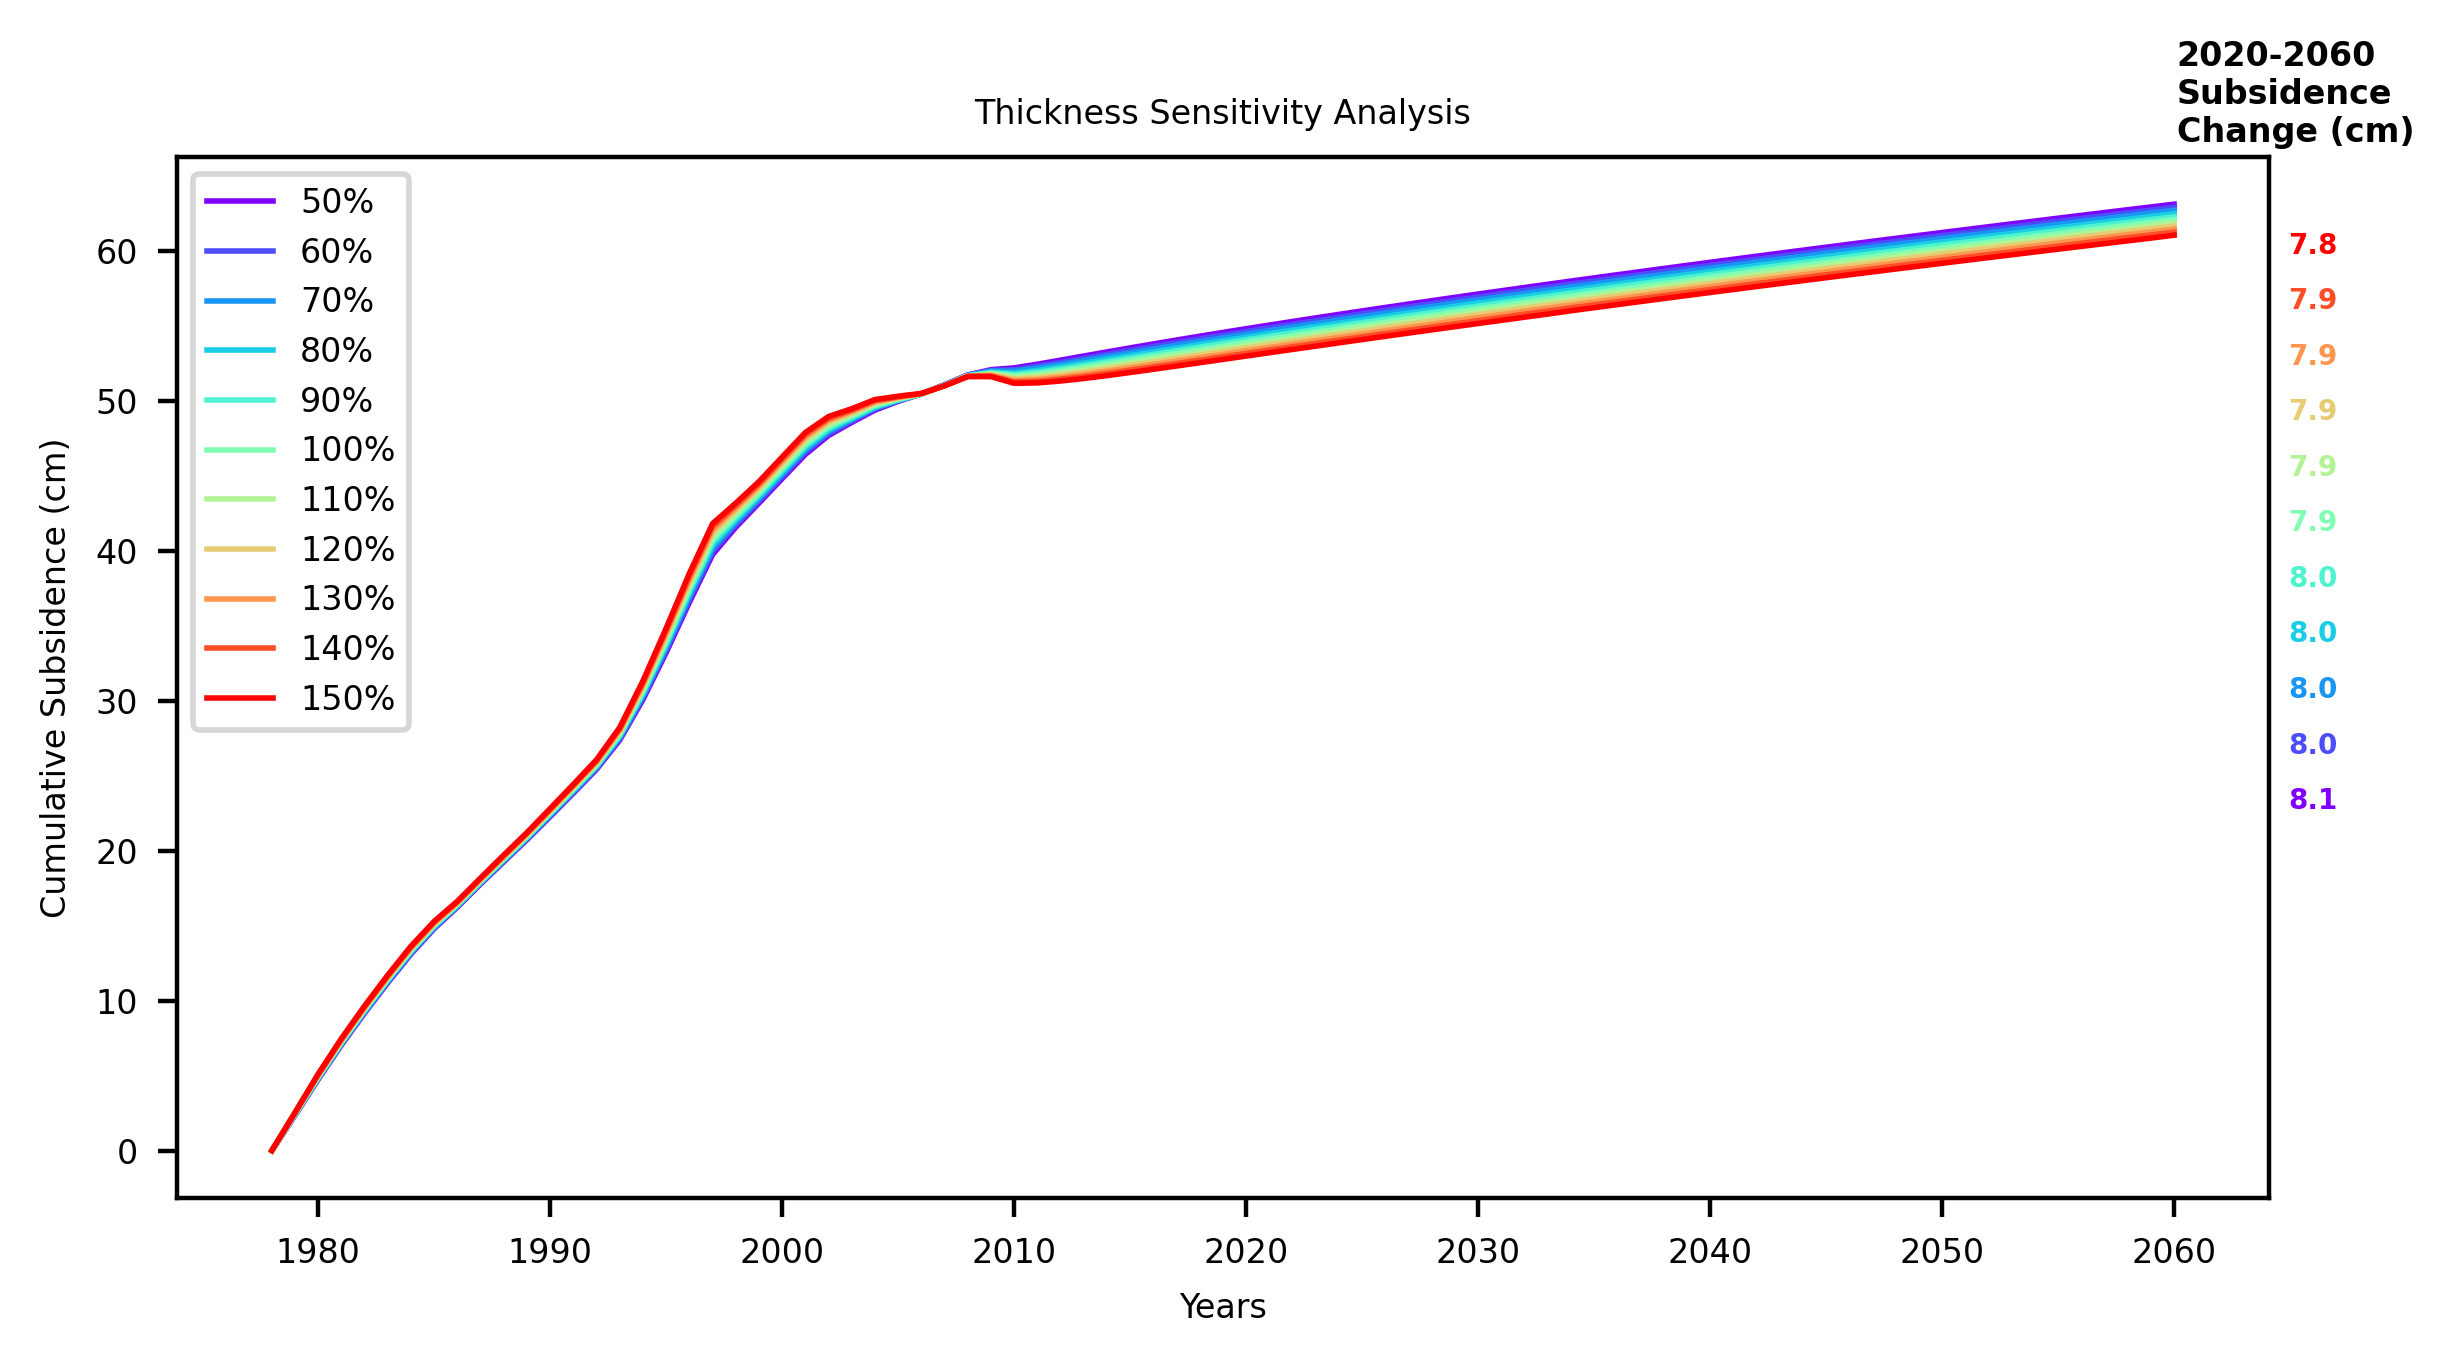

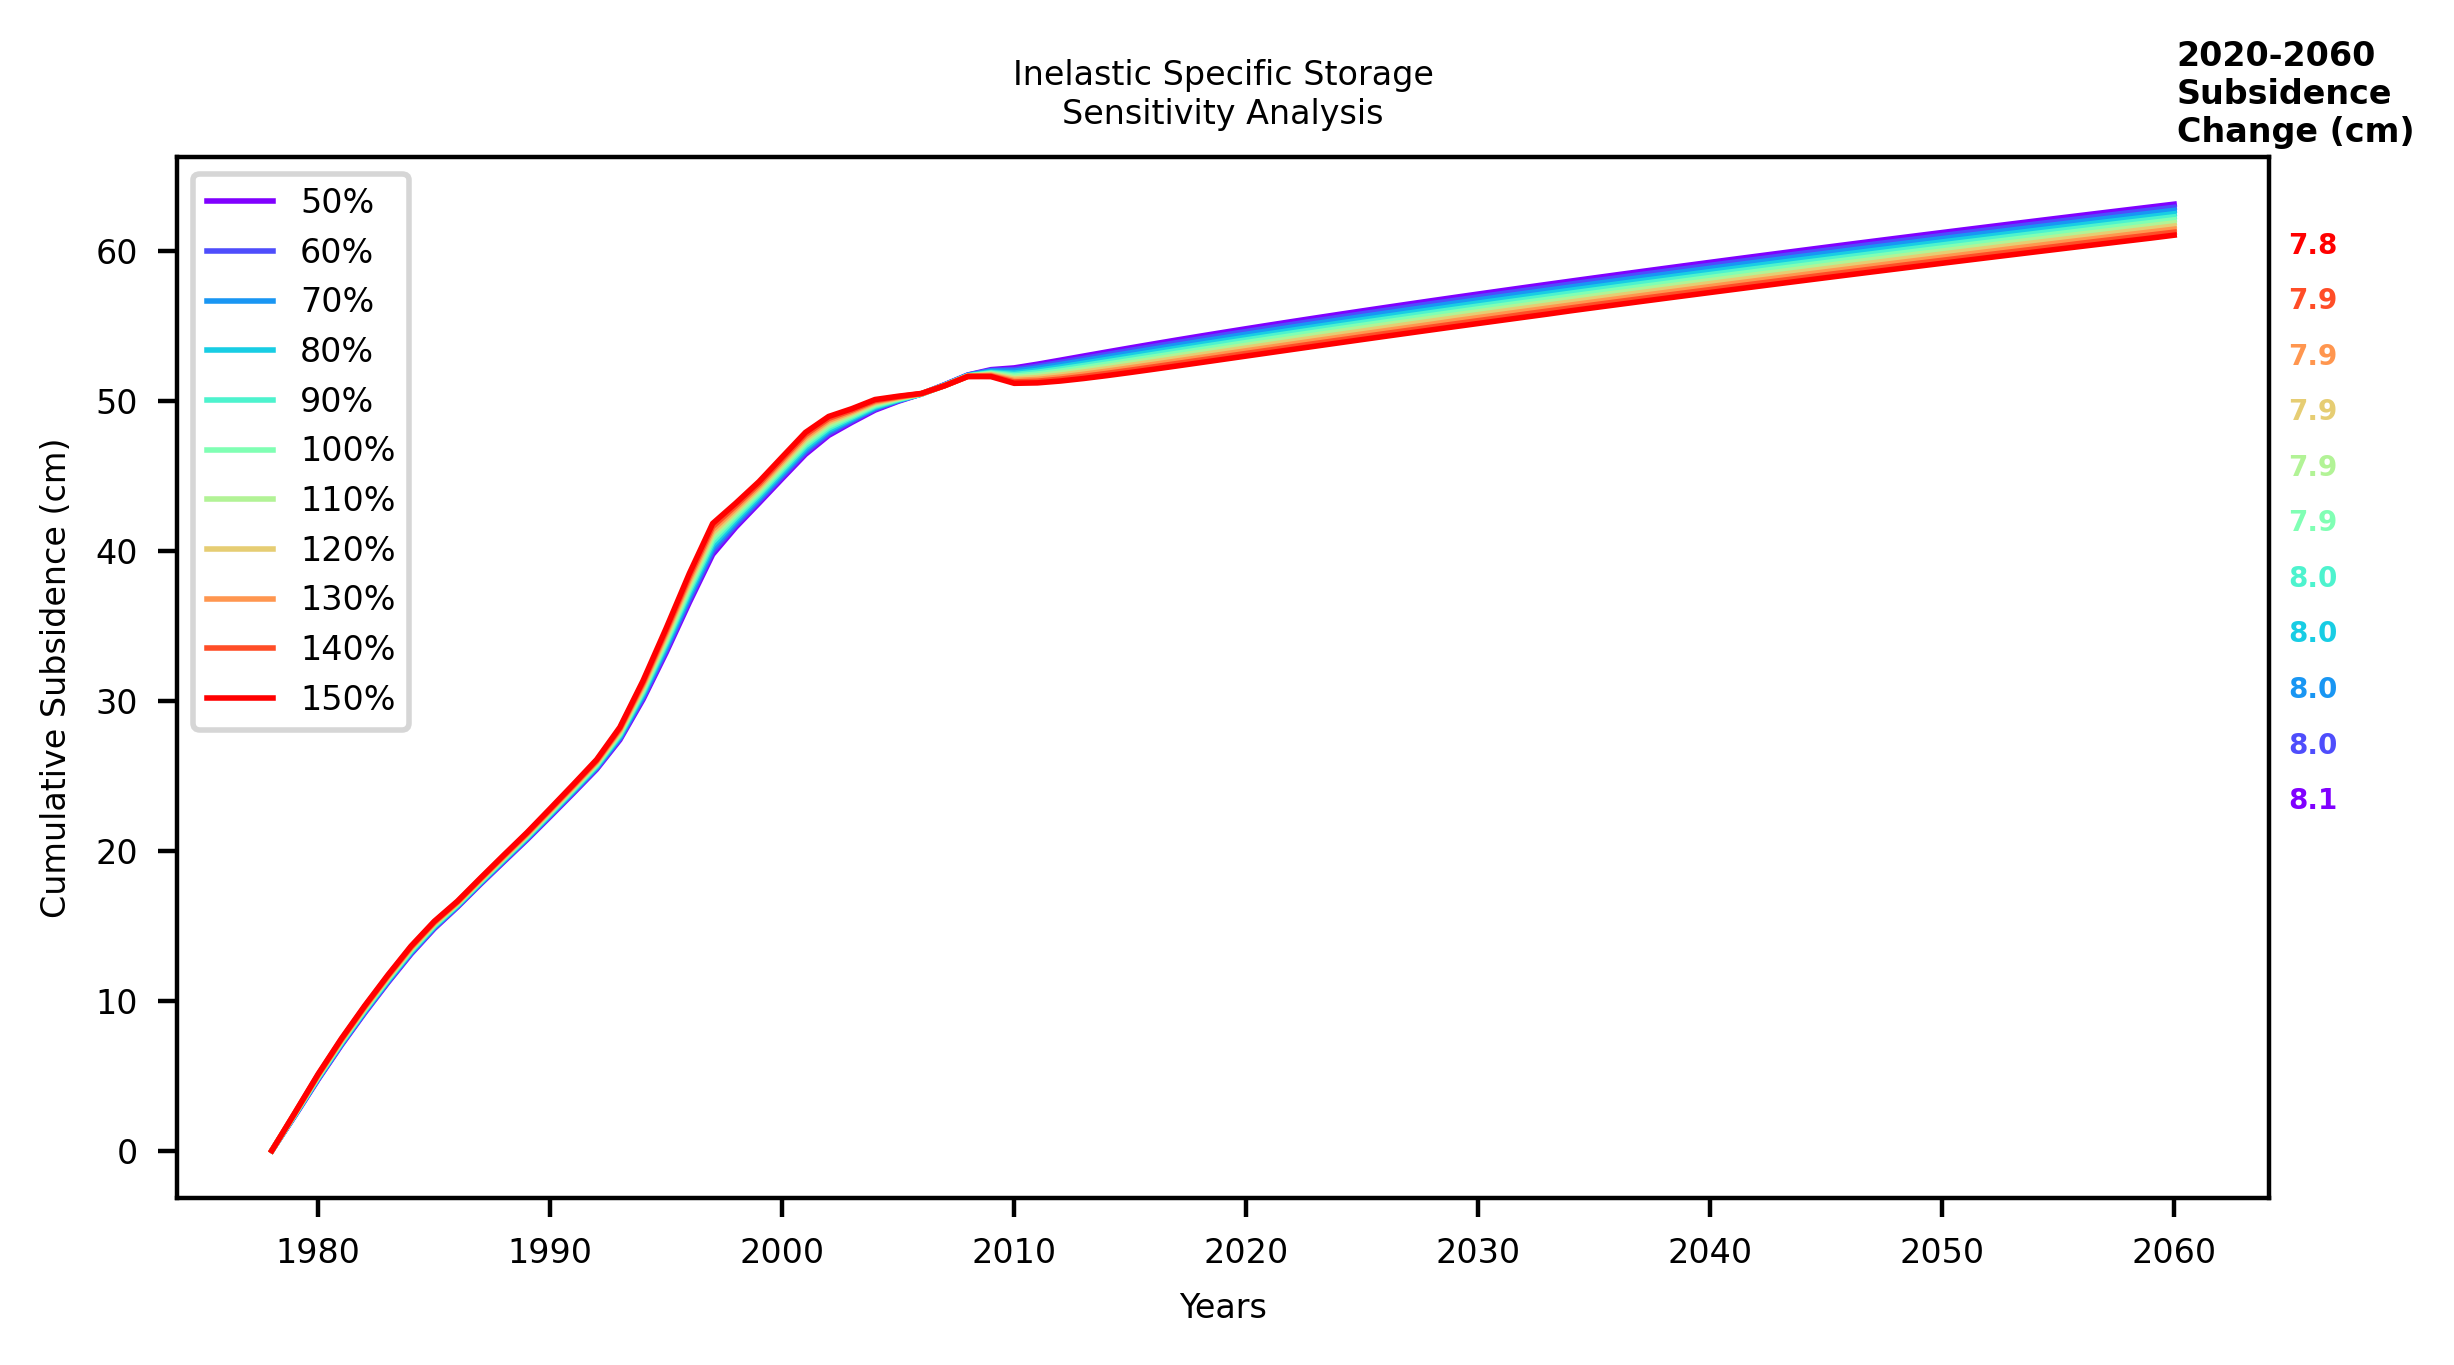

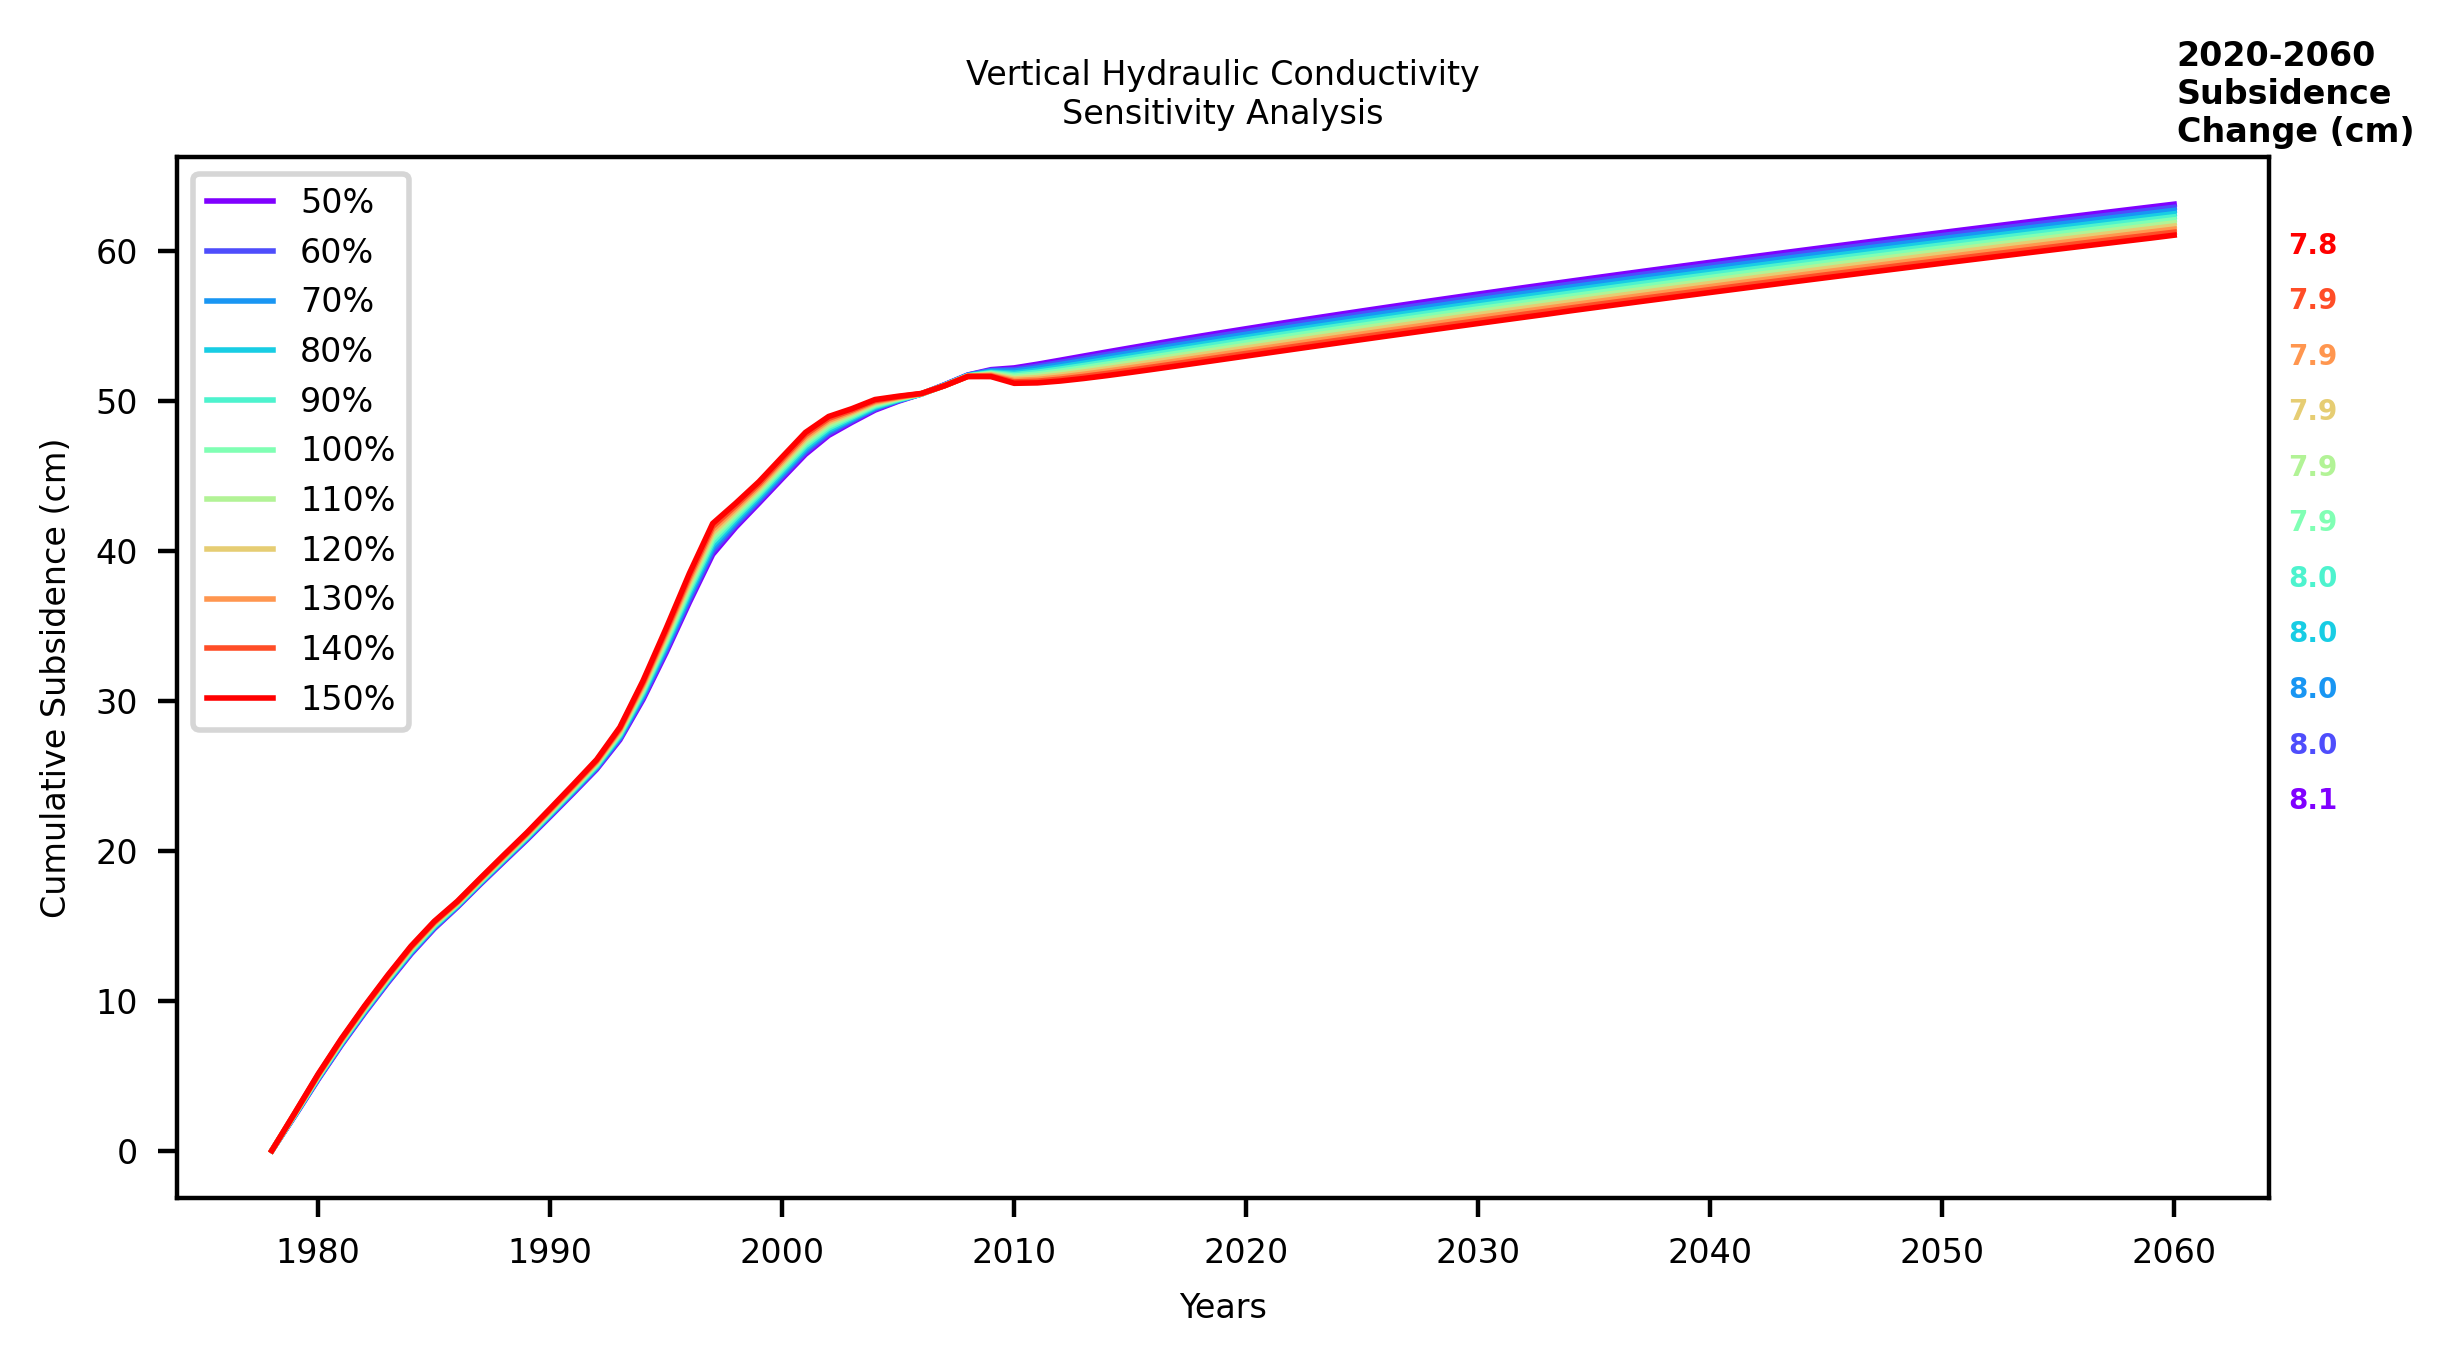

In [11]:
tmin = "1978"
tmax = "2060"

# Mode can be "raw" as in raw groundwater data vs "Pastas" for importing Pastas
# simulated groundwater in the aquifers
mode = "Pastas"

# If mode is Pastas, need model path
if mode == "Pastas":

    mpath = os.path.abspath("models")

# Pumping flag, for PASTAS, if changing pumping scenario
pumpflag = 1
# If changing pumping scenario, need pumping sheet/path
if pumpflag == 1:

    ppath = os.path.join(os.path.abspath("inputs"), "BasinPumping.xlsx")
    psheet = "EstTotalPump_54-60_Int50"

# Convergence criteria
CC = 1 * 10**-5

# Number of nodes in clay
node_num = 10

# Using available heads as proxy for missing
proxyflag = 1

# Recommended looking at results from sensitivity analysis for only one well nest
# Well nest to run sensitivity analysis
wellnest_sens = ["LCBKK013"]

# Sensitivity analysis
# Increasing by 10%
coeff = .5
num = 11  # Num of increases in percentage
sens_modes = ["Sske", "thick", "Sskv", "K"]

# Preallocation
# All results from every sensitivity
sens_results = []
sens_sub = []
sens_subv = []
sens_ann = []

# For each sensitivity parameter set
for sens_mode in sens_modes:

    # For each parameter increase
    for i in range(num):

        # Reading in thickness and storage data
        path = os.path.join(os.path.abspath("inputs"), "SUBParameters.xlsx")
        Thick_data = pd.read_excel(path, sheet_name="Thickness",
                                   index_col=0)  # Thickness
        Sskv_data = pd.read_excel(path,
                                  sheet_name="Sskv",
                                  index_col=0)  # Sskv
        Sske_data = pd.read_excel(path,
                                  sheet_name="Sske",
                                  index_col=0)  # Ssk
        K_data = pd.read_excel(path,
                               sheet_name="K",
                               index_col=0)  # K

        # Sensitivity analyses depending on parameter
        # Inelastic specific storage
        if sens_mode == "Sskv":

            Sskv_data = Sskv_data.iloc[:, :9] * coeff

        # Elastic specific storage
        elif sens_mode == "Sske":

            Sske_data = Sske_data.iloc[:, :9] * coeff

        # Vertical hydraulic conductivity
        elif sens_mode == "K":

            K_data = K_data.iloc[:, :9] * coeff

        # Thickness
        elif sens_mode == "thick":

            Thick_data = Thick_data.iloc[:, :9] * coeff

        # Running subsidence model for every analysis value
        all_, sub_, subv_ = bkk_sub_gw.\
            bkk_sub.bkk_subsidence(wellnest_sens,
                                   mode, tmin,
                                   tmax,
                                   Thick_data,
                                   K_data,
                                   Sskv_data,
                                   Sske_data,
                                   CC=CC,
                                   Nz=node_num,
                                   ic_run=True,
                                   proxyflag=proxyflag,
                                   pumpflag=pumpflag,
                                   pump_path=ppath,
                                   pump_sheet=psheet,
                                   model_path=mpath)

        sub_, subv_, ann_, _ = bkk_sub_gw.bkk_sub.bkk_postproc(wellnest_sens,
                                                               sub_,
                                                               subv_,
                                                               all_)

        # Saving results
        sens_results.append(all_)
        sens_sub.append(sub_)
        sens_subv.append(subv_)
        sens_ann.append(ann_)

        # Shifting parameter value
        coeff += .1

    # Plotting
    # path to save figures
    path = os.path.abspath("figures")

    # Plots results
    # New tmin for subsidence change
    tmin = "2020"
    tmax = "2060"
    bkk_sub_gw.bkk_plotting.sub_sens_line(path, wellnest_sens, sens_results,
                                          sens_sub, sens_subv, sens_ann,
                                          tmin=tmin, tmax=tmax, mode=sens_mode,
                                          num=num, save=0)